# Setup

In [1]:
# import packages
import os
import subprocess
import numpy as np
import pandas as pd
import seaborn as sns
import base64
import matplotlib.pyplot as plt
from IPython.display import HTML
from datetime import timedelta
from scipy.stats import chi2_contingency
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold

In [2]:
# function to create download links
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# Drug Exposures: Warfarin

## Drug Exposures

In [3]:
## autogenerated code for warfarin from concept set/dataset 

# import pandas
# import os

# # This query represents dataset "Warfarin Drug Exposures" for domain "drug" and was generated for All of Us Dataset v4
# dataset_99466482_drug_sql = """
#     SELECT
#         d_exposure.SIG,
#         d_exposure.VERBATIM_END_DATE,
#         d_exposure.ROUTE_SOURCE_VALUE,
#         d_exposure.ROUTE_CONCEPT_ID,
#         d_exposure.DRUG_CONCEPT_ID,
#         d_exposure.DRUG_EXPOSURE_START_DATETIME,
#         d_exposure.DRUG_TYPE_CONCEPT_ID,
#         d_exposure.VISIT_OCCURRENCE_ID,
#         d_exposure.DRUG_SOURCE_VALUE,
#         d_exposure.DAYS_SUPPLY,
#         d_exposure.QUANTITY,
#         d_exposure.REFILLS,
#         d_exposure.DOSE_UNIT_SOURCE_VALUE,
#         d_exposure.LOT_NUMBER,
#         d_exposure.DRUG_EXPOSURE_END_DATETIME,
#         d_exposure.PERSON_ID,
#         d_exposure.DRUG_SOURCE_CONCEPT_ID,
#         d_exposure.STOP_REASON,
#         d_route.concept_name as ROUTE_CONCEPT_NAME,
#         d_type.concept_name as DRUG_TYPE_CONCEPT_NAME,
#         d_standard_concept.concept_code as STANDARD_CONCEPT_CODE,
#         d_standard_concept.vocabulary_id as STANDARD_VOCABULARY,
#         d_standard_concept.concept_name as STANDARD_CONCEPT_NAME,
#         d_source_concept.concept_code as SOURCE_CONCEPT_CODE,
#         d_source_concept.concept_name as SOURCE_CONCEPT_NAME,
#         d_source_concept.vocabulary_id as SOURCE_VOCABULARY,
#         d_visit.concept_name as VISIT_OCCURRENCE_CONCEPT_NAME 
#     from
#         ( SELECT
#             * 
#         from
#             `{os.environ["WORKSPACE_CDR"]}.drug_exposure` d_exposure 
#         WHERE
#             (
#                 drug_concept_id in  (
#                     select
#                         distinct ca.descendant_id 
#                     from
#                         `{os.environ["WORKSPACE_CDR"]}.cb_criteria_ancestor` ca 
#                     join
#                         (
#                             select
#                                 distinct c.concept_id 
#                             from
#                                 `{os.environ["WORKSPACE_CDR"]}.cb_criteria` c 
#                             join
#                                 (
#                                     select
#                                         cast(cr.id as string) as id 
#                                     from
#                                         `{os.environ["WORKSPACE_CDR"]}.cb_criteria` cr 
#                                     where
#                                         domain_id = 'DRUG' 
#                                         and is_standard = 1 
#                                         and concept_id in (
#                                             1310149
#                                         ) 
#                                         and is_selectable = 1 
#                                         and full_text like '%[drug_rank1]%'
#                                 ) a 
#                                     on (
#                                         c.path like concat('%.',
#                                     a.id,
#                                     '.%') 
#                                     or c.path like concat('%.',
#                                     a.id)) 
#                                 where
#                                     domain_id = 'DRUG' 
#                                     and is_standard = 1 
#                                     and is_selectable = 1
#                                 ) b 
#                                     on (
#                                         ca.ancestor_id = b.concept_id
#                                     )
#                             )
#                         )
#                 ) d_exposure 
#         LEFT JOIN
#             `{os.environ["WORKSPACE_CDR"]}.concept` d_route 
#                 on d_exposure.ROUTE_CONCEPT_ID = d_route.CONCEPT_ID 
#         LEFT JOIN
#             `{os.environ["WORKSPACE_CDR"]}.concept` d_type 
#                 on d_exposure.drug_type_concept_id = d_type.CONCEPT_ID 
#         left join
#             `{os.environ["WORKSPACE_CDR"]}.concept` d_standard_concept 
#                 on d_exposure.DRUG_CONCEPT_ID = d_standard_concept.CONCEPT_ID 
#         LEFT JOIN
#             `{os.environ["WORKSPACE_CDR"]}.concept` d_source_concept 
#                 on d_exposure.DRUG_SOURCE_CONCEPT_ID = d_source_concept.CONCEPT_ID 
#         left join
#             `{os.environ["WORKSPACE_CDR"]}.visit_occurrence` v 
#                 on d_exposure.VISIT_OCCURRENCE_ID = v.VISIT_OCCURRENCE_ID 
#         LEFT JOIN
#             `{os.environ["WORKSPACE_CDR"]}.concept` d_visit 
#                 on v.VISIT_CONCEPT_ID = d_visit.CONCEPT_ID"""

# dataset_99466482_drug_df = pandas.read_gbq(dataset_99466482_drug_sql, dialect="standard")

# dataset_99466482_drug_df.head(5)

In [4]:
# de section contains autogenerated code from All of Us concept sets
warfarin_sql = f"""
-- get drug exposures
with de as (
    SELECT    
        d_exposure.drug_concept_id,
        d_exposure.drug_exposure_start_date,
        d_exposure.drug_type_concept_id,
        d_exposure.VISIT_OCCURRENCE_ID as de_visit_occurrence,
        d_exposure.provider_id,
        d_exposure.days_supply,
        d_exposure.person_id,
        d_standard_concept.concept_name as drug_name
    from
        ( SELECT
            * 
        from
            `{os.environ["WORKSPACE_CDR"]}.drug_exposure` d_exposure 
        WHERE
            (
                drug_concept_id in  (
                    select
                        distinct ca.descendant_id 
                    from
                        `{os.environ["WORKSPACE_CDR"]}.cb_criteria_ancestor` ca 
                    join
                        (
                            select
                                distinct c.concept_id 
                            from
                                `{os.environ["WORKSPACE_CDR"]}.cb_criteria` c 
                            join
                                (
                                    select
                                        cast(cr.id as string) as id 
                                    from
                                        `{os.environ["WORKSPACE_CDR"]}.cb_criteria` cr 
                                    where
                                        domain_id = 'DRUG' 
                                        and is_standard = 1 
                                        and concept_id in (
                                            1310149
                                        ) 
                                        and is_selectable = 1 
                                        and full_text like '%[drug_rank1]%'
                                ) a 
                                    on (
                                        c.path like concat('%.',
                                    a.id,
                                    '.%') 
                                    or c.path like concat('%.',
                                    a.id)) 
                                where
                                    domain_id = 'DRUG' 
                                    and is_standard = 1 
                                    and is_selectable = 1
                                ) b 
                                    on (
                                        ca.ancestor_id = b.concept_id
                                    )
                            )
                        )
                ) d_exposure 
        LEFT JOIN
            `{os.environ["WORKSPACE_CDR"]}.concept` d_route 
                on d_exposure.ROUTE_CONCEPT_ID = d_route.CONCEPT_ID 
        LEFT JOIN
            `{os.environ["WORKSPACE_CDR"]}.concept` d_type 
                on d_exposure.drug_type_concept_id = d_type.CONCEPT_ID 
        left join
            `{os.environ["WORKSPACE_CDR"]}.concept` d_standard_concept 
                on d_exposure.DRUG_CONCEPT_ID = d_standard_concept.CONCEPT_ID 
        LEFT JOIN
            `{os.environ["WORKSPACE_CDR"]}.concept` d_source_concept 
                on d_exposure.DRUG_SOURCE_CONCEPT_ID = d_source_concept.CONCEPT_ID 
        left join
            `{os.environ["WORKSPACE_CDR"]}.visit_occurrence` v 
                on d_exposure.VISIT_OCCURRENCE_ID = v.VISIT_OCCURRENCE_ID 
        LEFT JOIN
            `{os.environ["WORKSPACE_CDR"]}.concept` d_visit 
                on v.VISIT_CONCEPT_ID = d_visit.CONCEPT_ID
),
drug_type_qualifier as (
    select * from de 
    where drug_type_concept_id in (38000175, 38000180, 38000179, 38000176)
),
-- qualifier that there must be at least one visit occurrence in 365 days before the index date
with_visit_before as (
    select de.person_id, drug_name, de.drug_exposure_start_date as index_date,
    max(vo.visit_start_date) as before_visit_start_date
    from drug_type_qualifier de
    join (
        select * from  `{os.environ["WORKSPACE_CDR"]}`.visit_occurrence
    ) vo
    on de.PERSON_ID = vo.person_id 
    and vo.visit_start_date between DATE_SUB(de.drug_exposure_start_date, INTERVAL 1 YEAR) 
    and DATE_SUB(de.drug_exposure_start_date, INTERVAL 1 DAY)
    group by person_id, drug_name, index_date
),
-- for all drug exposures that satisfy qualifier (visit in one year before), get earliest record
index_dates as (
    select person_id, index_date, drug_name, before_visit_start_date from 
    (
        select *, ROW_NUMBER() over (PARTITION BY person_id order by index_date asc) as time_order 
        from with_visit_before
    )
    where time_order = 1
),
-- for each patient, get last drug exposure for clopidogrel
-- will be used to calculate follow_up_end_date
with_last_dispensed as (
    select person_id, max(drug_exposure_start_date) as last_dispensed from drug_type_qualifier
    group by person_id
),
-- for each patient and last dispensed date, get list of drug_names and max days supply given for clopidogrel
with_days_supply as (
    select a.person_id, STRING_AGG(a.drug_name) as drug_names, b.last_dispensed, max(a.days_supply) as days_supply from drug_type_qualifier a
    join (
        select * from with_last_dispensed
    ) b
    on a.person_id = b.person_id and a.drug_exposure_start_date = b.last_dispensed
    group by person_id, last_dispensed
),
-- calculate follow up period from last dispensed and days_supply
with_follow_up_period as (
    select *, DATE_ADD(last_dispensed, INTERVAL days_supply DAY) as follow_up_end_date 
    from with_days_supply
),
-- add follow up period dataset to dataset of index dates
with_index_and_follow_up as (
    select a.person_id, a.drug_name, a.before_visit_start_date, 
    a.index_date, b.last_dispensed, b.days_supply as last_days_supply, b.follow_up_end_date,
    date_diff(b.follow_up_end_date , a.index_date, DAY) as follow_up_period
    from index_dates a 
    join (
        select * from with_follow_up_period
    ) b 
    on a.person_id = b.person_id
),
-- get visit afterwards
-- qualifier that there must be at least one visit occurrence after index date during follow up period
with_visit_afterwards as (
    select a.person_id, a.drug_name, a.before_visit_start_date, 
    a.index_date, a.last_dispensed, a.last_days_supply, 
    a.follow_up_end_date, a.follow_up_period,
    min(vo.visit_start_date) as visit_after 
    from with_index_and_follow_up a
    join (
        select * from  `{os.environ["WORKSPACE_CDR"]}`.visit_occurrence
    ) vo
    on a.person_id = vo.person_id 
    and vo.visit_start_date between DATE_ADD(a.index_date, INTERVAL 1 DAY)
    and a.follow_up_end_date
    group by a.person_id, a.drug_name, a.before_visit_start_date, 
    a.index_date, a.last_dispensed, a.follow_up_period, a.last_days_supply, 
    a.follow_up_end_date
    
),
-- get all drug exposures of clopidogrel
with_all_dispensing_records as (
    select a.*, b.drug_exposure_start_date, b.days_supply from with_visit_afterwards a
    join (
        select * from drug_type_qualifier
    ) b
    on a.person_id = b.person_id and b.drug_exposure_start_date between a.index_date and a.follow_up_end_date
   -- order by person_id, index_date asc, drug_exposure_start_date asc
),
-- calculate days between previous dispensing record (using drug_exposure_start_date)
with_days_bw_records as (
    select *,
    case 
        when previous_record is not null then DATE_DIFF(drug_exposure_start_date, previous_record, DAY)
        else 0
    end as time_since_previous_record
    from (
        select *,
        lag(drug_exposure_start_date) over 
        (partition by person_id order by drug_exposure_start_date) as previous_record
        from with_all_dispensing_records
    )
),
-- get average days between drug exposures
with_avg_days_bw as (
    select person_id, drug_name, before_visit_start_date, index_date, last_dispensed, 
    last_days_supply, follow_up_end_date, follow_up_period, visit_after,
    avg(time_since_previous_record) as avg_days_bw_records, count(*) as dispensed_count, avg(days_supply) as avg_days_supply
    from with_days_bw_records
    group by person_id, drug_name, before_visit_start_date, index_date, last_dispensed, 
    last_days_supply, follow_up_end_date, follow_up_period, visit_after
),
-- add person info concept ids
with_person_info as (
    select a.*, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, 
    race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, 
    person_source_value, gender_source_value, gender_source_concept_id, race_source_value, 
    race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, 
    sex_at_birth_concept_id, sex_at_birth_source_concept_id, 
    sex_at_birth_source_value,
     from with_avg_days_bw a
    inner join 
    ( 
        select * from `{os.environ["WORKSPACE_CDR"]}`.person
    ) b
    on a.person_id = b.person_id
),
-- add concept names for person info
 with_concept_names as (
    select person.*, 
    p_race_concept.concept_name as race,
    p_gender_concept.concept_name as gender,
    p_ethnicity_concept.concept_name as ethnicity,
    p_sex_at_birth_concept.concept_name as sex_at_birth 
    from with_person_info person
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept p_race_concept 
            on person.race_concept_id = p_race_concept.CONCEPT_ID 
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept p_gender_concept 
            on person.gender_concept_id = p_gender_concept.CONCEPT_ID 
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept p_ethnicity_concept 
            on person.ethnicity_concept_id = p_ethnicity_concept.CONCEPT_ID 
    LEFT JOIN
         {os.environ["WORKSPACE_CDR"]}.concept p_sex_at_birth_concept 
            on person.sex_at_birth_concept_id = p_sex_at_birth_concept.CONCEPT_ID
)
select * from with_concept_names 
"""
warfarin_de = pd.read_gbq(warfarin_sql, dialect="standard")

In [5]:
warfarin_de

person_id                                      drug_name  \
0       3058303               warfarin sodium 5 MG Oral Tablet   
1       1197456    warfarin sodium 5 MG Oral Tablet [Coumadin]   
2       1198242  warfarin sodium 7.5 MG Oral Tablet [Coumadin]   
3       1198248    warfarin sodium 5 MG Oral Tablet [Jantoven]   
4       3242711               warfarin sodium 2 MG Oral Tablet   
...         ...                                            ...   
1889    1383111               warfarin sodium 5 MG Oral Tablet   
1890    1948629    warfarin sodium 5 MG Oral Tablet [Jantoven]   
1891    2575765               warfarin sodium 5 MG Oral Tablet   
1892    1894254               warfarin sodium 5 MG Oral Tablet   
1893    3522958  warfarin sodium 2.5 MG Oral Tablet [Coumadin]   

     before_visit_start_date index_date last_dispensed  last_days_supply  \
0                 2012-02-24 2012-02-27     2014-12-19                30   
1                 2011-12-02 2011-12-09     2019-07-26                90   
2                 2010-01-14 2010-01-18     2017-08-24                 0   
3                 2012-06-11 2012-12-02     2013-11-20                30   
4                 2014-06-23 2014-06-26     2014-06-26                 4   
...                      ...        ...            ...               ...   
1889              2019-05-17 2019-05-18     2020-01-01                 0   
1890              2013-07-28 2013-08-06     2013-08-31                30   
1891              2016-02-06 2016-02-27     2016-02-27                30   
1892              2014-02-17 2014-02-21     2017-08-18                 0   
1893              2018-08-16 2018-08-18     2019-03-01                30   

     follow_up_end_date  follow_up_period visit_after  avg_days_bw_records  \
0            2015-01-18              1056  2012-03-04            68.400000   
1            2019-10-24              2876  2011-12-16            58.041667   
2            2017-08-24              2775  2010-01-26            43.359375   
3            2013-12-20               383  2013-03-26            16.809524   
4            2014-06-30                 4  2014-06-27             0.000000   
...                 ...               ...         ...                  ...   
1889         2020-01-01               228  2019-05-23            15.200000   
1890         2013-09-30                55  2013-08-18             4.166667   
1891         2016-03-28                30  2016-03-16             0.000000   
1892         2017-08-18              1274  2014-02-24            84.933333   
1893         2019-03-31               225  2018-08-28             7.222222   

      ...  race_source_concept_id  ethnicity_source_value  \
0     ...                 1586143     No matching concept   
1     ...                 1586146     No matching concept   
2     ...                  903079   PMI_PreferNotToAnswer   
3     ...                  903096                PMI_Skip   
4     ...                  903096                PMI_Skip   
...   ...                     ...                     ...   
1889  ...                  903079   PMI_PreferNotToAnswer   
1890  ...                  903079   PMI_PreferNotToAnswer   
1891  ...                  903079   PMI_PreferNotToAnswer   
1892  ...                  903079   PMI_PreferNotToAnswer   
1893  ...                  903079   PMI_PreferNotToAnswer   

      ethnicity_source_concept_id  sex_at_birth_concept_id  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                 45878463   
4                               0                 45878463   
...                           ...                      ...   
1889                            0                 45880669   
1890                            0                 45880669   
1891                            0                 45880669   
1892      

In [6]:
# get care site ids for patients
warfarin_care_sites_sql = f"""
with de as (
    SELECT
        d_exposure.drug_concept_id,
        d_exposure.drug_exposure_start_date,
        d_exposure.drug_type_concept_id,
        d_exposure.VISIT_OCCURRENCE_ID as de_visit_occurrence,
        d_exposure.provider_id,
        d_exposure.days_supply,
        d_exposure.person_id,
        d_type.concept_name as DRUG_TYPE_CONCEPT_NAME,
        d_standard_concept.concept_name as drug_name,
        v_ext.*
    from
        ( SELECT
            * 
        from
            `{os.environ["WORKSPACE_CDR"]}.drug_exposure` d_exposure 
        WHERE
            (
                drug_concept_id in  (
                    select
                        distinct ca.descendant_id 
                    from
                        `{os.environ["WORKSPACE_CDR"]}.cb_criteria_ancestor` ca 
                    join
                        (
                            select
                                distinct c.concept_id 
                            from
                                `{os.environ["WORKSPACE_CDR"]}.cb_criteria` c 
                            join
                                (
                                    select
                                        cast(cr.id as string) as id 
                                    from
                                        `{os.environ["WORKSPACE_CDR"]}.cb_criteria` cr 
                                    where
                                        domain_id = 'DRUG' 
                                        and is_standard = 1 
                                        and concept_id in (
                                            1310149
                                        ) 
                                        and is_selectable = 1
                                ) a 
                                    on (
                                        c.path like concat('%.',
                                    a.id,
                                    '.%') 
                                    or c.path like concat('%.',
                                    a.id)) 
                                where
                                    domain_id = 'DRUG' 
                                    and is_standard = 1 
                                    and is_selectable = 1
                                ) b 
                                    on (
                                        ca.ancestor_id = b.concept_id
                                    )
                            )
                        )
                ) d_exposure 
        LEFT JOIN
            `{os.environ["WORKSPACE_CDR"]}.concept` d_route 
                on d_exposure.ROUTE_CONCEPT_ID = d_route.CONCEPT_ID 
        LEFT JOIN
            `{os.environ["WORKSPACE_CDR"]}.concept` d_type 
                on d_exposure.drug_type_concept_id = d_type.CONCEPT_ID 
        left join
            `{os.environ["WORKSPACE_CDR"]}.concept` d_standard_concept 
                on d_exposure.DRUG_CONCEPT_ID = d_standard_concept.CONCEPT_ID 
        LEFT JOIN
            `{os.environ["WORKSPACE_CDR"]}.concept` d_source_concept 
                on d_exposure.DRUG_SOURCE_CONCEPT_ID = d_source_concept.CONCEPT_ID 
        left join
            `{os.environ["WORKSPACE_CDR"]}.visit_occurrence` v 
                on d_exposure.VISIT_OCCURRENCE_ID = v.VISIT_OCCURRENCE_ID 
        left join
            `{os.environ["WORKSPACE_CDR"]}.visit_occurrence_ext` v_ext 
                on d_exposure.VISIT_OCCURRENCE_ID = v_ext.VISIT_OCCURRENCE_ID 
        LEFT JOIN
            `{os.environ["WORKSPACE_CDR"]}.concept` d_visit 
                on v.VISIT_CONCEPT_ID = d_visit.CONCEPT_ID
        LEFT JOIN
            `{os.environ["WORKSPACE_CDR"]}.person` d_person 
                on v.person_id = d_person.person_id
),
drug_type_qualifier as (
    select * from de 
    where drug_type_concept_id in (38000175, 38000180, 38000179, 38000176)
),
group_by_person as (
    select person_id, src_id from drug_type_qualifier
    group by person_id, src_id
),
agg_care_sites as (
    select person_id, string_agg(src_id) as care_sites from group_by_person
    group by person_id
)

select * from agg_care_sites
"""
warfarin_care_sites = pd.read_gbq(warfarin_care_sites_sql, dialect="standard")


In [7]:
warfarin_care_sites

person_id    care_sites
0       3137167          None
1       1505184          None
2       1946395          None
3       1651393          None
4       3035488          None
...         ...           ...
3830    3119107  EHR site 392
3831    1043674  EHR site 433
3832    2575765  EHR site 752
3833    1669438  EHR site 267
3834    1477561  EHR site 195

[3835 rows x 2 columns]

In [8]:
# join warfarin drug exposures with care sites for patients
warfarin = pd.merge(warfarin_de, warfarin_care_sites, on="person_id", how="left")

In [9]:
# download warfarin drug exposures
create_download_link(warfarin, 'warfarin 3 ', 'warfarin.csv')

In [10]:
warfarin.shape

(1894, 37)

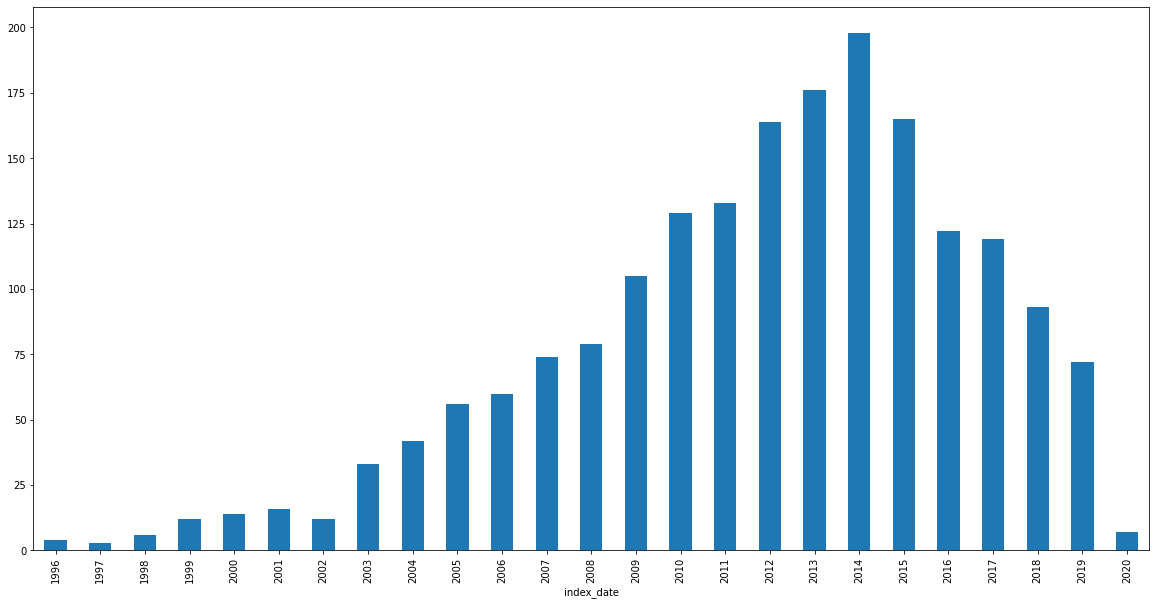

In [11]:
warfarin["index_date"].groupby([warfarin["index_date"].dt.year]).count().plot(
    kind="bar",
    figsize=(20,10)
)
plt.show()

# Incident Cohort

## Condition 1 Incidents
<b>Gastrointestinal Bleeding</b> <br> <br>
Description: Gastrointestinal bleeding events, defined by condition occurrences of Gastrointestinal hemorrhage GI bleeding conceptset occurring between start and end of inpatient or ER visit

In [12]:
# SQL for getting gastrointestinal hemorrhage conditions
# NOTE: source codes (ICD9 and ICD10) should be under condition_source_concept_id
# but there is an error in the database where it sometimes gets coded under condition_status_concept_id
# my solution has been to pull both columns
# use condition_source by default, but if its coded under condition_status, use that instead

cond1_codes = [ #SNOMED CODES
4138962, 4195231, 4147683, 4163865, 195584, 40482685, 28779, 4222896, 4296611, 200769, 4177387, 434400, 438795,
4204555, 24973, 23808, 2002608, 198798, 4198381, 4209746, 4112183, 2108900, 2108878, 4265600, 4248429, 192671,
4101104, 443530, 197925, 4027663, 4291028]
insert_cond1_sql0 = ",".join([f"('{x}')" for x in cond1_codes])
gi_incident_sql = f"""
-- temp SQL table for condition codes for faster lookup using join
CREATE TEMP TABLE temp
(
  condition_codes STRING
);
INSERT INTO temp (
    condition_codes
)
VALUES {insert_cond1_sql0};

-- create official table with correct integer cast
CREATE TEMP TABLE search_codes (
    condition_codes INT64
);

INSERT INTO search_codes
SELECT CAST(condition_codes as INT64) as condition_codes FROM temp;

SELECT * FROM search_codes;
        
-- get all condition occurrences with condition_status and condition_source
with co as (
    select condition_concept.concept_name as condition_name,
    condition_status.concept_name as condition_status_name,
    condition_status.concept_code as condition_status_code,
    condition_status.vocabulary_id as condition_status_vocabulary,
    condition_source.concept_name as condition_source_name,
    condition_source.concept_code as condition_source_code,
    condition_source.vocabulary_id as condition_source_vocabulary,
    a.person_id as person_id,
    a.condition_concept_id, 
    a.condition_start_date, 
    a.condition_end_date, 
    a.condition_type_concept_id, 
    a.visit_occurrence_id, 
    v.visit_occurrence_id as visit_occurrence_id_1, 
    v.person_id as person_id_1, 
    v.visit_concept_id,
    v.visit_start_date, 
    v.visit_start_datetime, 
    v.visit_end_date, 
    v.visit_end_datetime, 
    v.visit_type_concept_id, 
    v.visit_source_value, 
    v.visit_source_concept_id, 
    v.admitting_source_concept_id, 
    v.admitting_source_value, 
    v.discharge_to_concept_id, 
    v.discharge_to_source_value, 
    v.preceding_visit_occurrence_id,
    a.condition_source_concept_id,
    a.condition_status_concept_id
    from {os.environ["WORKSPACE_CDR"]}.condition_occurrence a
         
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept condition_concept 
        on a.condition_concept_id = condition_concept.concept_id   
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept condition_status
        on a.condition_status_concept_id = condition_status.concept_id 
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept condition_source
        on a.condition_source_concept_id = condition_source.concept_id 
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.visit_occurrence v
        on a.visit_occurrence_id = v.visit_occurrence_id
    where 
    (condition_status_concept_id is not null or 
    condition_source_concept_id is not null)
    and (condition_status_concept_id != 0 or 
    condition_source_concept_id != 0)
    --limit 100
),

-- combine status and source columns, refer to notes at top of this section
combine_status_and_source as (
    select
    person_id,
    condition_name, 
    condition_concept_id, 
    condition_start_date, 
    condition_end_date, 
    condition_type_concept_id, 
    visit_occurrence_id, 
    
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_concept_id
        else condition_source_concept_id
    END as source_concept_id,
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_name
        else condition_source_name
    END as source_name,
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_code
        else condition_source_code
    END as source_code,
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_vocabulary
        else condition_source_vocabulary
    END as source_vocab,
    
    visit_occurrence_id_1, 
    person_id_1, 
    visit_concept_id, 
    visit_start_date, 
    visit_start_datetime, 
    visit_end_date, 
    visit_end_datetime, 
    visit_type_concept_id, 
    visit_source_value, 
    visit_source_concept_id, 
    admitting_source_concept_id, 
    admitting_source_value, 
    discharge_to_concept_id, 
    discharge_to_source_value, 
    preceding_visit_occurrence_id
from co
),
-- use inner join to get only conditions that we care about
target_conditions as (
    select distinct a.* from combine_status_and_source a
    inner join search_codes
    on a.condition_concept_id = search_codes.condition_codes
)
select * from target_conditions;
"""

"""
-- get earliest condition_occurrence per patient for incident coohort
-- not using right now, because we want to keep all condition_occurrences 
-- in case earliest one doesn't fall after drug exposure
incidence_cohort as (
    select person_id, condition_name, condition_concept_id, condition_start_date, condition_end_date, 
    visit_occurrence_id, condition_type_concept_id, source_concept_id, source_name, source_code, 
    source_vocab from 
        (
            select *, ROW_NUMBER() over (PARTITION BY person_id order by condition_start_date asc) as time_order 
            from target_conditions
        )
        where time_order = 1
)
select * from target_conditions 
"""
gi_cond1 = pd.read_gbq(gi_incident_sql, dialect="standard")

In [13]:
gi_cond1

person_id                                     condition_name  \
0        1464293                        Bleeding esophageal varices   
1        2805416  Chronic peptic ulcer without hemorrhage, witho...   
2        1808455                                      Gastric ulcer   
3        1171942  Esophageal varices with bleeding, associated w...   
4        1415784                                      Gastric ulcer   
...          ...                                                ...   
85897    1414716                                       Hematochezia   
85898    2924935                                       Hematochezia   
85899    3484253                                       Hematochezia   
85900    3219289                                       Hematochezia   
85901    3324919                                       Hematochezia   

       condition_concept_id condition_start_date condition_end_date  \
0                     28779           2014-12-03                NaT   
1                     23808           2008-10-18         2008-10-18   
2                   4265600           2017-02-01         2017-02-01   
3                   4112183           2019-04-03                NaT   
4                   4265600           2019-05-16         2019-05-16   
...                     ...                  ...                ...   
85897                443530           2013-01-13         2013-01-13   
85898                443530           2014-10-29         2014-10-29   
85899                443530           2016-08-29         2016-08-29   
85900                443530           2009-12-23         2009-12-23   
85901                443530           2007-01-01         2007-01-01   

       condition_type_concept_id  visit_occurrence_id  source_concept_id  \
0                       44786627         1.100000e+16           44828998   
1                       44786629         1.500000e+16           44832457   
2                              0         3.700000e+16           44824313   
3                          32020         1.900000e+16           45538464   
4                              0         3.700000e+16           44837160   
...                          ...                  ...                ...   
85897                      32020                  NaN             443530   
85898                      32020         1.700000e+16             443530   
85899                      32020         1.700000e+16             443530   
85900                      32020         1.700000e+16             443530   
85901                      32020         1.700000e+16             443530   

                                             source_name source_code  ...  \
0                       Esophageal varices with bleeding       456.0  ...   
1      Chronic peptic ulcer of unspecified site witho...      533.70  ...   
2                                          Gastric ulcer         531  ...   
3             Secondary esophageal varices with bleeding      I85.11  ...   
4      Gastric ulcer, unspecified as acute or chronic...       531.9  ...   
...                                                  ...         ...  ...   
85897                                       Hematochezia   405729008  ...   
85898                                       Hematochezia   405729008  ...   
85899                                       Hematochezia   405729008  ...   
85900                                       Hematochezia   405729008  ...   
85901                                       Hematochezia   405729008  ...   

      visit_end_date               visit_end_datetime  visit_type_concept_id  \
0         2014-12-03 2014-12-03 22:00:00.100000+00:00             44818518.0   
1         2008-10-18        2008-10-18 00:00:00+00:00             44818518.0   
2         2017-02-01        2017-02-01 00:00:00+00:00             44818518.0   
3         2019-04-06        2019-04-06 15:28:00+00:00             44818518.0   
4         2019-05-18        2019-05-18 12:38:00+00:00          

## Condition 2 Incidents
<b>Gastrointestinal Hemorrhage</b>
Description: Gastrointestinal hemorrhage by Siontis Circulation, 2018

In [14]:
# SQL for getting gastrointestinal hemorrhage conditions
# NOTE: source codes (ICD9 and ICD10) should be under condition_source_concept_id
# but there is an error in the database where it sometimes gets coded under condition_status_concept_id
# my solution has been to pull both columns
# use condition_source by default, but if its coded under condition_status, use that instead


cond2_codes = [46273183, 46270529, 46270145, 46270025, 46269911, 46269907, 46269901, 45757783, 
    45757654, 45757543, 4336230, 4294973, 4291649, 4289830, 4274491, 4247008, 4232181, 
    4231580, 4217947, 4211001, 4174044, 4169592, 4164920, 4112183, 4103703, 4046500, 
    4031954, 4027729, 4006994, 443779, 443530, 442314, 442190, 441328, 441063, 441062, 
    440756, 438796, 438468, 437326, 437323, 437027, 437021, 436729, 436148, 435855, 
    434402, 433515, 316457, 201885, 199855, 198801, 198798, 198467, 197925, 197018, 
    196442, 195845, 194986, 193795, 193250, 193249, 192671, 31335, 30770, 28779, 27026, 
    26727, 26441, 24397, 24076, 23245, 23237, 22665]
insert_cond2_sql0 = ",".join([f"('{x}')" for x in cond2_codes])
gi_incident_sql = f"""
-- temp SQL table for condition codes for faster lookup using join
CREATE TEMP TABLE temp
(
  condition_codes STRING
);
INSERT INTO temp (
    condition_codes
)
VALUES {insert_cond2_sql0};

-- create official table with correct integer cast
CREATE TEMP TABLE search_codes (
    condition_codes INT64
);

INSERT INTO search_codes
SELECT CAST(condition_codes as INT64) as condition_codes FROM temp;

SELECT * FROM search_codes;
        
-- get all condition occurrences with condition_status and condition_source
with co as (
    select condition_concept.concept_name as condition_name,
    condition_status.concept_name as condition_status_name,
    condition_status.concept_code as condition_status_code,
    condition_status.vocabulary_id as condition_status_vocabulary,
    condition_source.concept_name as condition_source_name,
    condition_source.concept_code as condition_source_code,
    condition_source.vocabulary_id as condition_source_vocabulary,
    a.person_id as person_id,
    a.condition_concept_id, 
    a.condition_start_date, 
    a.condition_end_date, 
    a.condition_type_concept_id, 
    a.visit_occurrence_id, 
    v.visit_occurrence_id as visit_occurrence_id_1, 
    v.person_id as person_id_1, 
    v.visit_concept_id,
    v.visit_start_date, 
    v.visit_start_datetime, 
    v.visit_end_date, 
    v.visit_end_datetime, 
    v.visit_type_concept_id, 
    v.visit_source_value, 
    v.visit_source_concept_id, 
    v.admitting_source_concept_id, 
    v.admitting_source_value, 
    v.discharge_to_concept_id, 
    v.discharge_to_source_value, 
    v.preceding_visit_occurrence_id,
    a.condition_source_concept_id,
    a.condition_status_concept_id
    from {os.environ["WORKSPACE_CDR"]}.condition_occurrence a
         
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept condition_concept 
        on a.condition_concept_id = condition_concept.concept_id   
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept condition_status
        on a.condition_status_concept_id = condition_status.concept_id 
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept condition_source
        on a.condition_source_concept_id = condition_source.concept_id 
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.visit_occurrence v
        on a.visit_occurrence_id = v.visit_occurrence_id
    where 
    (condition_status_concept_id is not null or 
    condition_source_concept_id is not null)
    and (condition_status_concept_id != 0 or 
    condition_source_concept_id != 0)
    --limit 100
),

-- combine status and source columns, refer to notes at top of this section
combine_status_and_source as (
    select
    person_id,
    condition_name, 
    condition_concept_id, 
    condition_start_date, 
    condition_end_date, 
    condition_type_concept_id, 
    visit_occurrence_id, 
    
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_concept_id
        else condition_source_concept_id
    END as source_concept_id,
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_name
        else condition_source_name
    END as source_name,
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_code
        else condition_source_code
    END as source_code,
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_vocabulary
        else condition_source_vocabulary
    END as source_vocab,
    
    visit_occurrence_id_1, 
    person_id_1, 
    visit_concept_id, 
    visit_start_date, 
    visit_start_datetime, 
    visit_end_date, 
    visit_end_datetime, 
    visit_type_concept_id, 
    visit_source_value, 
    visit_source_concept_id, 
    admitting_source_concept_id, 
    admitting_source_value, 
    discharge_to_concept_id, 
    discharge_to_source_value, 
    preceding_visit_occurrence_id
from co
),
-- use inner join to get only conditions that we care about
target_conditions as (
    select distinct a.* from combine_status_and_source a
    inner join search_codes
    on a.condition_concept_id = search_codes.condition_codes
)
select * from target_conditions;
"""

"""
-- get earliest condition_occurrence per patient for incident coohort
-- not using right now, because we want to keep all condition_occurrences 
-- in case earliest one doesn't fall after drug exposure
incidence_cohort as (
    select person_id, condition_name, condition_concept_id, condition_start_date, condition_end_date, 
    visit_occurrence_id, condition_type_concept_id, source_concept_id, source_name, source_code, 
    source_vocab from 
        (
            select *, ROW_NUMBER() over (PARTITION BY person_id order by condition_start_date asc) as time_order 
            from target_conditions
        )
        where time_order = 1
)
select * from target_conditions 
"""
gi_cond2 = pd.read_gbq(gi_incident_sql, dialect="standard")

In [15]:
gi_cond2.where(gi_cond2['condition_concept_id'] == 192671.0).dropna()

person_id               condition_name  condition_concept_id  \
36820  1152610.0  Gastrointestinal hemorrhage              192671.0   
36856  1302348.0  Gastrointestinal hemorrhage              192671.0   
36887  1044723.0  Gastrointestinal hemorrhage              192671.0   
36922  1703725.0  Gastrointestinal hemorrhage              192671.0   
36926  1304995.0  Gastrointestinal hemorrhage              192671.0   
...          ...                          ...                   ...   
94844  2358005.0  Gastrointestinal hemorrhage              192671.0   
94850  2079441.0  Gastrointestinal hemorrhage              192671.0   
94885  2080671.0  Gastrointestinal hemorrhage              192671.0   
94894  2358005.0  Gastrointestinal hemorrhage              192671.0   
96106  1234243.0  Gastrointestinal hemorrhage              192671.0   

      condition_start_date condition_end_date  condition_type_concept_id  \
36820           2011-05-26         2011-05-26                 44786627.0   
36856           2019-09-23         2019-09-23                        0.0   
36887           2019-02-23         2019-02-23                        0.0   
36922           2012-09-19         2012-09-19                    32020.0   
36926           2007-02-11         2007-02-12                    32019.0   
...                    ...                ...                        ...   
94844           2015-12-27         2015-12-27                        0.0   
94850           2019-03-25         2019-03-30                 44786629.0   
94885           2018-01-04         2018-01-04                        0.0   
94894           2015-09-26         2015-09-26                        0.0   
96106           2017-09-23         2017-12-06                 38000245.0   

       visit_occurrence_id  source_concept_id  \
36820         3.700000e+16         44819812.0   
36856         3.700000e+16         44819812.0   
36887         3.700000e+16         44819812.0   
36922         4.500000e+16         44819812.0   
36926         3.600000e+16         44819812.0   
...                    ...                ...   
94844         2.600000e+16         35208414.0   
94850         3.700000e+16         35208414.0   
94885         2.600000e+16         35208414.0   
94894         2.600000e+16         35208414.0   
96106         4.000000e+15           192671.0   

                                             source_name source_code  ...  \
36820  Hemorrhage of gastrointestinal tract, unspecified       578.9  ...   
36856  Hemorrhage of gastrointestinal tract, unspecified       578.9  ...   
36887  Hemorrhage of gastrointestinal tract, unspecified       578.9  ...   
36922  Hemorrhage of gastrointestinal tract, unspecified       578.9  ...   
36926  Hemorrhage of gastrointestinal tract, unspecified       578.9  ...   
...                                                  ...         ...  ...   
94844           Gastrointestinal hemorrhage, unspecified       K92.2  ...   
94850           Gastrointestinal hemorrhage, unspecified       K92.2  ...   
94885           Gastrointestinal hemorrhage, unspecified       K92.2  ...   
94894           Gastrointestinal hemorrhage, unspecified       K92.2  ...   
96106                        Gastrointestinal hemorrhage    74474003  ...   

      visit_end_date        visit_end_datetime  visit_type_concept_id  \
36820     2011-05-26 2011-05-26 00:00:00+00:00             44818518.0   
36856     2019-09-23 2019-09-23 23:59:00+00:00             44818518.0   
36887     2019-02-23 2019-02-23 00:00:00+00:00             44818518.0   
36922     2012-09-19 2012-09-19 17:03:00+00:00             44818518.0   
36926     2007-02-12 2007-02-12 13:57:00+00:00             44818518.0   
...              ...                       ...                    ...   
94844     2015-12-27 2015-12-27 23:59:00+00:00             44818518.0   
94850     2019-03-25 2019-03-25 23:59:00+00:00             44818518.0   
94885     2018-01-04 2018-01-04 00:00:00+00:00             44818518.0 

In [16]:
gi_cond1.where(gi_cond1['condition_concept_id'] == 192671.0).dropna()

person_id               condition_name  condition_concept_id  \
30965  1625472.0  Gastrointestinal hemorrhage              192671.0   
31022  1047321.0  Gastrointestinal hemorrhage              192671.0   
31046  1315692.0  Gastrointestinal hemorrhage              192671.0   
31066  1044723.0  Gastrointestinal hemorrhage              192671.0   
31067  2463641.0  Gastrointestinal hemorrhage              192671.0   
...          ...                          ...                   ...   
82204  1360003.0  Gastrointestinal hemorrhage              192671.0   
82250  2851355.0  Gastrointestinal hemorrhage              192671.0   
82262  3088672.0  Gastrointestinal hemorrhage              192671.0   
82267  1750554.0  Gastrointestinal hemorrhage              192671.0   
82714  1234243.0  Gastrointestinal hemorrhage              192671.0   

      condition_start_date condition_end_date  condition_type_concept_id  \
30965           2014-07-03         2014-07-03                        0.0   
31022           2010-08-14         2010-08-14                        0.0   
31046           2016-02-23         2016-02-23                        0.0   
31066           2019-03-01         2019-03-01                        0.0   
31067           2013-12-19         2013-12-19                        0.0   
...                    ...                ...                        ...   
82204           2018-01-03         2018-01-03                        0.0   
82250           2015-07-15         2015-07-15                 44786629.0   
82262           2015-04-23         2015-04-23                        0.0   
82267           2019-02-04         2019-02-04                        0.0   
82714           2017-09-23         2017-12-06                 38000245.0   

       visit_occurrence_id  source_concept_id  \
30965         2.600000e+16         44819812.0   
31022         3.700000e+16         44819812.0   
31046         3.700000e+16         44819812.0   
31066         3.700000e+16         44819812.0   
31067         2.600000e+16         44819812.0   
...                    ...                ...   
82204         2.600000e+16         35208414.0   
82250         2.600000e+16         35208414.0   
82262         2.600000e+16         35208414.0   
82267         2.600000e+16         35208414.0   
82714         4.000000e+15           192671.0   

                                             source_name source_code  ...  \
30965  Hemorrhage of gastrointestinal tract, unspecified       578.9  ...   
31022  Hemorrhage of gastrointestinal tract, unspecified       578.9  ...   
31046  Hemorrhage of gastrointestinal tract, unspecified       578.9  ...   
31066  Hemorrhage of gastrointestinal tract, unspecified       578.9  ...   
31067  Hemorrhage of gastrointestinal tract, unspecified       578.9  ...   
...                                                  ...         ...  ...   
82204           Gastrointestinal hemorrhage, unspecified       K92.2  ...   
82250           Gastrointestinal hemorrhage, unspecified       K92.2  ...   
82262           Gastrointestinal hemorrhage, unspecified       K92.2  ...   
82267           Gastrointestinal hemorrhage, unspecified       K92.2  ...   
82714                        Gastrointestinal hemorrhage    74474003  ...   

      visit_end_date        visit_end_datetime  visit_type_concept_id  \
30965     2014-07-07 2014-07-07 11:25:00+00:00             44818518.0   
31022     2010-08-14 2010-08-14 00:00:00+00:00             44818518.0   
31046     2016-02-23 2016-02-23 00:00:00+00:00             44818518.0   
31066     2019-03-01 2019-03-01 00:00:00+00:00             44818518.0   
31067     2013-12-19 2013-12-19 00:00:00+00:00             44818518.0   
...              ...                       ...                    ...   
82204     2018-01-03 2018-01-03 08:08:00+00:00             44818518.0   
82250     2015-07-15 2015-07-15 00:00:00+00:00             44818518.0   
82262     2015-05-05 2015-05-05 11:40:00+00:00             44818518.0 

## Condition 3 Incidents
<b>Intracranial Hemorrhage</b> <br> <br>
Description: Hemorrhagic stroke events, defined by condition occurrences of intracranial bleed Hemorrhagic stroke conceptset occurring between start and end of inpatient or ER visit

In [17]:
# SQL for getting gastrointestinal hemorrhage conditions
# NOTE: source codes (ICD9 and ICD10) should be under condition_source_concept_id
# but there is an error in the database where it sometimes gets coded under condition_status_concept_id
# my solution has been to pull both columns
# use condition_source by default, but if its coded under condition_status, use that instead

cond3_codes = [ #SNOMED CODES
376713, 439847, 432923, 43530727, 4148906, 43530674, 42535425]
insert_cond3_sql0 = ",".join([f"('{x}')" for x in cond3_codes])
gi_incident_sql = f"""
-- temp SQL table for condition codes for faster lookup using join
CREATE TEMP TABLE temp
(
  condition_codes STRING
);
INSERT INTO temp (
    condition_codes
)
VALUES {insert_cond3_sql0};

-- create official table with correct integer cast
CREATE TEMP TABLE search_codes (
    condition_codes INT64
);

INSERT INTO search_codes
SELECT CAST(condition_codes as INT64) as condition_codes FROM temp;

SELECT * FROM search_codes;
        
-- get all condition occurrences with condition_status and condition_source
with co as (
    select condition_concept.concept_name as condition_name,
    condition_status.concept_name as condition_status_name,
    condition_status.concept_code as condition_status_code,
    condition_status.vocabulary_id as condition_status_vocabulary,
    condition_source.concept_name as condition_source_name,
    condition_source.concept_code as condition_source_code,
    condition_source.vocabulary_id as condition_source_vocabulary,
    a.person_id as person_id,
    a.condition_concept_id, 
    a.condition_start_date, 
    a.condition_end_date, 
    a.condition_type_concept_id, 
    a.visit_occurrence_id, 
    v.visit_occurrence_id as visit_occurrence_id_1, 
    v.person_id as person_id_1, 
    v.visit_concept_id,
    v.visit_start_date, 
    v.visit_start_datetime, 
    v.visit_end_date, 
    v.visit_end_datetime, 
    v.visit_type_concept_id, 
    v.visit_source_value, 
    v.visit_source_concept_id, 
    v.admitting_source_concept_id, 
    v.admitting_source_value, 
    v.discharge_to_concept_id, 
    v.discharge_to_source_value, 
    v.preceding_visit_occurrence_id,
    a.condition_source_concept_id,
    a.condition_status_concept_id
    from {os.environ["WORKSPACE_CDR"]}.condition_occurrence a
         
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept condition_concept 
        on a.condition_concept_id = condition_concept.concept_id   
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept condition_status
        on a.condition_status_concept_id = condition_status.concept_id 
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept condition_source
        on a.condition_source_concept_id = condition_source.concept_id 
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.visit_occurrence v
        on a.visit_occurrence_id = v.visit_occurrence_id
    where 
    (condition_status_concept_id is not null or 
    condition_source_concept_id is not null)
    and (condition_status_concept_id != 0 or 
    condition_source_concept_id != 0)
    --limit 100
),

-- combine status and source columns, refer to notes at top of this section
combine_status_and_source as (
    select
    person_id,
    condition_name, 
    condition_concept_id, 
    condition_start_date, 
    condition_end_date, 
    condition_type_concept_id, 
    visit_occurrence_id, 
    
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_concept_id
        else condition_source_concept_id
    END as source_concept_id,
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_name
        else condition_source_name
    END as source_name,
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_code
        else condition_source_code
    END as source_code,
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_vocabulary
        else condition_source_vocabulary
    END as source_vocab,
    
    visit_occurrence_id_1, 
    person_id_1, 
    visit_concept_id, 
    visit_start_date, 
    visit_start_datetime, 
    visit_end_date, 
    visit_end_datetime, 
    visit_type_concept_id, 
    visit_source_value, 
    visit_source_concept_id, 
    admitting_source_concept_id, 
    admitting_source_value, 
    discharge_to_concept_id, 
    discharge_to_source_value, 
    preceding_visit_occurrence_id
from co
),
-- use inner join to get only conditions that we care about
target_conditions as (
    select distinct a.* from combine_status_and_source a
    inner join search_codes
    on a.condition_concept_id = search_codes.condition_codes
)
select * from target_conditions;
"""

"""
-- get earliest condition_occurrence per patient for incident coohort
-- not using right now, because we want to keep all condition_occurrences 
-- in case earliest one doesn't fall after drug exposure
incidence_cohort as (
    select person_id, condition_name, condition_concept_id, condition_start_date, condition_end_date, 
    visit_occurrence_id, condition_type_concept_id, source_concept_id, source_name, source_code, 
    source_vocab from 
        (
            select *, ROW_NUMBER() over (PARTITION BY person_id order by condition_start_date asc) as time_order 
            from target_conditions
        )
        where time_order = 1
)
select * from target_conditions 
"""
gi_cond3 = pd.read_gbq(gi_incident_sql, dialect="standard")

In [18]:
gi_cond3[gi_cond3["condition_concept_id"] == 439847]

person_id           condition_name  condition_concept_id  \
321      1704543  Intracranial hemorrhage                439847   
322      1077315  Intracranial hemorrhage                439847   
323      1943783  Intracranial hemorrhage                439847   
324      2286056  Intracranial hemorrhage                439847   
325      1623424  Intracranial hemorrhage                439847   
...          ...                      ...                   ...   
11835    1146754  Intracranial hemorrhage                439847   
11837    1146754  Intracranial hemorrhage                439847   
11844    3047838  Intracranial hemorrhage                439847   
11870    1146754  Intracranial hemorrhage                439847   
11907    1146754  Intracranial hemorrhage                439847   

      condition_start_date condition_end_date  condition_type_concept_id  \
321             2007-09-20                NaT                   44786627   
322             1998-10-30                NaT                   44786627   
323             2012-02-28         2012-02-28                   44786627   
324             2004-12-25                NaT                   44786627   
325             2001-08-27         2001-08-27                   44786627   
...                    ...                ...                        ...   
11835           2019-02-11                NaT                       5086   
11837           2019-01-29                NaT                       5086   
11844           2019-02-13                NaT                       5086   
11870           2019-02-07                NaT                       5086   
11907           2019-02-09                NaT                       5086   

       visit_occurrence_id  source_concept_id  \
321           1.400000e+16           44826644   
322           3.201999e+16           44826644   
323           1.500000e+16           44826644   
324           3.202005e+16           44826644   
325           1.500000e+16           44826644   
...                    ...                ...   
11835         1.900000e+16           35207818   
11837         1.900000e+16           35207818   
11844         1.900000e+16           35207818   
11870         1.900000e+16           35207818   
11907         1.900000e+16           35207818   

                                             source_name source_code  ...  \
321                  Unspecified intracranial hemorrhage       432.9  ...   
322                  Unspecified intracranial hemorrhage       432.9  ...   
323                  Unspecified intracranial hemorrhage       432.9  ...   
324                  Unspecified intracranial hemorrhage       432.9  ...   
325                  Unspecified intracranial hemorrhage       432.9  ...   
...                                                  ...         ...  ...   
11835  Nontraumatic intracranial hemorrhage, unspecified       I62.9  ...   
11837  Nontraumatic intracranial hemorrhage, unspecified       I62.9  ...   
11844  Nontraumatic intracranial hemorrhage, unspecified       I62.9  ...   
11870  Nontraumatic intracranial hemorrhage, unspecified       I62.9  ...   
11907  Nontraumatic intracranial hemorrhage, unspecified       I62.9  ...   

      visit_end_date        visit_end_datetime  visit_type_concept_id  \
321       2007-09-20 2007-09-20 11:15:00+00:00             44818518.0   
322       1998-10-30 1998-10-30 00:00:00+00:00             44818518.0   
323       2012-02-28 2012-02-28 00:00:00+00:00             44818518.0   
324       2004-12-25 2004-12-25 00:00:00+00:00             44818518.0   
325       2001-08-27 2001-08-27 00:00:00+00:00             44818518.0   
...              ...                       ...                    ...   
11835     2019-02-12 2019-02-12 13:01:00+00:00             44818518.0   
11837     2019-02-12 2019-02-12 13:01:00+00:00             44818518.0   
11844     2019-02-13 2019-02-13 23:59:00+00:00             44818518.0   
11870     2019-02-12 2019-02-12 13:01:00+00:0

## Condition 4 Incidents
<b>Intracranial Hemorrhage Min</b> <br> <br>
Description: Hemorrhagic stroke events, defined by condition occurrences of intracranial bleed Hemorrhagic stroke conceptset occurring between start and end of inpatient or ER visit, with removal of concept_id = 4148906, 42535425, 43530674, 43530727

In [19]:
# SQL for getting gastrointestinal hemorrhage conditions
# NOTE: source codes (ICD9 and ICD10) should be under condition_source_concept_id
# but there is an error in the database where it sometimes gets coded under condition_status_concept_id
# my solution has been to pull both columns
# use condition_source by default, but if its coded under condition_status, use that instead


cond4_codes = [ #SNOMED CODES
376713, 439847, 432923]
insert_cond4_sql0 = ",".join([f"('{x}')" for x in cond4_codes])
gi_incident_sql = f"""
-- temp SQL table for condition codes for faster lookup using join
CREATE TEMP TABLE temp
(
  condition_codes STRING
);
INSERT INTO temp (
    condition_codes
)
VALUES {insert_cond4_sql0};

-- create official table with correct integer cast
CREATE TEMP TABLE search_codes (
    condition_codes INT64
);

INSERT INTO search_codes
SELECT CAST(condition_codes as INT64) as condition_codes FROM temp;

SELECT * FROM search_codes;
        
-- get all condition occurrences with condition_status and condition_source
with co as (
    select condition_concept.concept_name as condition_name,
    condition_status.concept_name as condition_status_name,
    condition_status.concept_code as condition_status_code,
    condition_status.vocabulary_id as condition_status_vocabulary,
    condition_source.concept_name as condition_source_name,
    condition_source.concept_code as condition_source_code,
    condition_source.vocabulary_id as condition_source_vocabulary,
    a.person_id as person_id,
    a.condition_concept_id, 
    a.condition_start_date, 
    a.condition_end_date, 
    a.condition_type_concept_id, 
    a.visit_occurrence_id, 
    v.visit_occurrence_id as visit_occurrence_id_1, 
    v.person_id as person_id_1, 
    v.visit_concept_id,
    v.visit_start_date, 
    v.visit_start_datetime, 
    v.visit_end_date, 
    v.visit_end_datetime, 
    v.visit_type_concept_id, 
    v.visit_source_value, 
    v.visit_source_concept_id, 
    v.admitting_source_concept_id, 
    v.admitting_source_value, 
    v.discharge_to_concept_id, 
    v.discharge_to_source_value, 
    v.preceding_visit_occurrence_id,
    a.condition_source_concept_id,
    a.condition_status_concept_id
    from {os.environ["WORKSPACE_CDR"]}.condition_occurrence a
         
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept condition_concept 
        on a.condition_concept_id = condition_concept.concept_id   
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept condition_status
        on a.condition_status_concept_id = condition_status.concept_id 
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept condition_source
        on a.condition_source_concept_id = condition_source.concept_id 
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.visit_occurrence v
        on a.visit_occurrence_id = v.visit_occurrence_id
    where 
    (condition_status_concept_id is not null or 
    condition_source_concept_id is not null)
    and (condition_status_concept_id != 0 or 
    condition_source_concept_id != 0)
    --limit 100
),

-- combine status and source columns, refer to notes at top of this section
combine_status_and_source as (
    select
    person_id,
    condition_name, 
    condition_concept_id, 
    condition_start_date, 
    condition_end_date, 
    condition_type_concept_id, 
    visit_occurrence_id, 
    
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_concept_id
        else condition_source_concept_id
    END as source_concept_id,
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_name
        else condition_source_name
    END as source_name,
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_code
        else condition_source_code
    END as source_code,
    CASE
        when (condition_source_concept_id is null or condition_source_concept_id = 0)
        then condition_status_vocabulary
        else condition_source_vocabulary
    END as source_vocab,
    
    visit_occurrence_id_1, 
    person_id_1, 
    visit_concept_id, 
    visit_start_date, 
    visit_start_datetime, 
    visit_end_date, 
    visit_end_datetime, 
    visit_type_concept_id, 
    visit_source_value, 
    visit_source_concept_id, 
    admitting_source_concept_id, 
    admitting_source_value, 
    discharge_to_concept_id, 
    discharge_to_source_value, 
    preceding_visit_occurrence_id
from co
),
-- use inner join to get only conditions that we care about
target_conditions as (
    select distinct a.* from combine_status_and_source a
    inner join search_codes
    on a.condition_concept_id = search_codes.condition_codes
)
select * from target_conditions;
"""

"""
-- get earliest condition_occurrence per patient for incident coohort
-- not using right now, because we want to keep all condition_occurrences 
-- in case earliest one doesn't fall after drug exposure
incidence_cohort as (
    select person_id, condition_name, condition_concept_id, condition_start_date, condition_end_date, 
    visit_occurrence_id, condition_type_concept_id, source_concept_id, source_name, source_code, 
    source_vocab from 
        (
            select *, ROW_NUMBER() over (PARTITION BY person_id order by condition_start_date asc) as time_order 
            from target_conditions
        )
        where time_order = 1
)
select * from target_conditions 
"""
gi_cond4 = pd.read_gbq(gi_incident_sql, dialect="standard")

## Condition 5 Incidents
<b>Vitamin K1</b>

In [20]:
# This query represents dataset "Vitamin K1" for domain "drug" and was generated for All of Us Dataset v4
vitamin_K1_SQL = """
    SELECT
        d_exposure.SIG,
        d_exposure.VERBATIM_END_DATE,
        d_exposure.ROUTE_SOURCE_VALUE,
        d_exposure.ROUTE_CONCEPT_ID,
        d_exposure.DRUG_CONCEPT_ID,
        d_exposure.DRUG_EXPOSURE_START_DATETIME,
        d_exposure.DRUG_TYPE_CONCEPT_ID,
        d_exposure.VISIT_OCCURRENCE_ID,
        d_exposure.DRUG_SOURCE_VALUE,
        d_exposure.DAYS_SUPPLY,
        d_exposure.QUANTITY,
        d_exposure.REFILLS,
        d_exposure.DOSE_UNIT_SOURCE_VALUE,
        d_exposure.LOT_NUMBER,
        d_exposure.DRUG_EXPOSURE_END_DATETIME,
        d_exposure.PERSON_ID,
        d_exposure.DRUG_SOURCE_CONCEPT_ID,
        d_exposure.STOP_REASON,
        d_route.concept_name as ROUTE_CONCEPT_NAME,
        d_type.concept_name as DRUG_TYPE_CONCEPT_NAME,
        d_standard_concept.concept_code as STANDARD_CONCEPT_CODE,
        d_standard_concept.vocabulary_id as STANDARD_VOCABULARY,
        d_standard_concept.concept_name as STANDARD_CONCEPT_NAME,
        d_source_concept.concept_code as SOURCE_CONCEPT_CODE,
        d_source_concept.concept_name as SOURCE_CONCEPT_NAME,
        d_source_concept.vocabulary_id as SOURCE_VOCABULARY,
        d_visit.concept_name as VISIT_OCCURRENCE_CONCEPT_NAME, 
        v.visit_concept_id
    from
        ( SELECT
            * 
        from
            `""" + os.environ["WORKSPACE_CDR"] + """.drug_exposure` d_exposure 
        WHERE
            (
                drug_concept_id in  (
                    select
                        distinct ca.descendant_id 
                    from
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria_ancestor` ca 
                    join
                        (
                            select
                                distinct c.concept_id 
                            from
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                            join
                                (
                                    select
                                        cast(cr.id as string) as id 
                                    from
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                    where
                                        domain_id = 'DRUG' 
                                        and is_standard = 1 
                                        and concept_id in (
                                            19044727
                                        ) 
                                        and is_selectable = 1 
                                        and full_text like '%[drug_rank1]%'
                                ) a 
                                    on (
                                        c.path like concat('%.',
                                    a.id,
                                    '.%') 
                                    or c.path like concat('%.',
                                    a.id)) 
                                where
                                    domain_id = 'DRUG' 
                                    and is_standard = 1 
                                    and is_selectable = 1
                                ) b 
                                    on (
                                        ca.ancestor_id = b.concept_id
                                    )
                            )
                        )
                ) d_exposure 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_route 
                on d_exposure.ROUTE_CONCEPT_ID = d_route.CONCEPT_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_type 
                on d_exposure.drug_type_concept_id = d_type.CONCEPT_ID 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_standard_concept 
                on d_exposure.DRUG_CONCEPT_ID = d_standard_concept.CONCEPT_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_source_concept 
                on d_exposure.DRUG_SOURCE_CONCEPT_ID = d_source_concept.CONCEPT_ID 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                on d_exposure.VISIT_OCCURRENCE_ID = v.VISIT_OCCURRENCE_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_visit 
                on v.VISIT_CONCEPT_ID = d_visit.CONCEPT_ID"""

vitamin_K1 = pd.read_gbq(vitamin_K1_SQL, dialect="standard")

vitamin_K1.head(5)

SIG VERBATIM_END_DATE   ROUTE_SOURCE_VALUE  ROUTE_CONCEPT_ID  \
0  None               NaT  No matching concept               0.0   
1  None               NaT             34206005         4142048.0   
2  None               NaT             26643006         4132161.0   
3  None               NaT  No matching concept               0.0   
4  None               NaT             26643006         4132161.0   

   DRUG_CONCEPT_ID DRUG_EXPOSURE_START_DATETIME  DRUG_TYPE_CONCEPT_ID  \
0         42874153    2011-03-19 05:00:00+00:00              38000175   
1         19044727    2007-01-07 05:00:00+00:00              38000180   
2         19036628    2011-04-15 05:00:00+00:00              38000177   
3         42874153    2014-03-03 05:00:00+00:00              38000175   
4         19036628    2017-04-29 05:00:00+00:00              38000177   

   VISIT_OCCURRENCE_ID DRUG_SOURCE_VALUE  DAYS_SUPPLY  ...  \
0                  NaN       54643564901          3.0  ...   
1                  NaN              8308          NaN  ...   
2                  NaN            207839          NaN  ...   
3                  NaN       54643564901          4.0  ...   
4                  NaN            207839          NaN  ...   

    ROUTE_CONCEPT_NAME              DRUG_TYPE_CONCEPT_NAME  \
0  No matching concept  Prescription dispensed in pharmacy   
1         Subcutaneous            Inpatient administration   
2                 Oral                Prescription written   
3  No matching concept  Prescription dispensed in pharmacy   
4                 Oral                Prescription written   

  STANDARD_CONCEPT_CODE STANDARD_VOCABULARY  \
0               1304564              RxNorm   
1                  8308              RxNorm   
2                207839              RxNorm   
3               1304564              RxNorm   
4                207839              RxNorm   

                               STANDARD_CONCEPT_NAME  SOURCE_CONCEPT_CODE  \
0  alpha-tocopherol acetate 1 UNT/ML / ascorbic a...          54643564901   
1                                         vitamin K1                 8308   
2             vitamin K1 5 MG Oral Tablet [Mephyton]               207839   
3  alpha-tocopherol acetate 1 UNT/ML / ascorbic a...          54643564901   
4             vitamin K1 5 MG Oral Tablet [Mephyton]               207839   

                                 SOURCE_CONCEPT_NAME SOURCE_VOCABULARY  \
0  alpha-tocopherol acetate 1 UNT/ML / ascorbic a...               NDC   
1                                         vitamin K1            RxNorm   
2             vitamin K1 5 MG Oral Tablet [Mephyton]            RxNorm   
3  alpha-tocopherol acetate 1 UNT/ML / ascorbic a...               NDC   
4             vitamin K1 5 MG Oral Tablet [Mephyton]            RxNorm   

  VISIT_OCCURRENCE_CONCEPT_NAME visit_concept_id  
0                          None              NaN  
1                          None              NaN  
2                          None              NaN  
3                          None              NaN  
4                          None              NaN  

[5 rows x 28 columns]

In [21]:
vitamin_K1.columns = [i.lower() for i in vitamin_K1.columns]
# anticoag_adr.observation_datetime = anticoag_adr.observation_datetime
vitamin_K1['drug_exposure_date'] = pd.to_datetime(vitamin_K1['drug_exposure_start_datetime']).dt.date

## Condition 6 Incidents
<b>Blood Coagulation Factors</b>

In [22]:
# This query represents dataset "Blood Coagulation Factors" for domain "drug" and was generated for All of Us Dataset v4
bcf_SQL = """
    SELECT
        d_exposure.SIG,
        d_exposure.VERBATIM_END_DATE,
        d_exposure.ROUTE_SOURCE_VALUE,
        d_exposure.ROUTE_CONCEPT_ID,
        d_exposure.DRUG_CONCEPT_ID,
        d_exposure.DRUG_EXPOSURE_START_DATETIME,
        d_exposure.DRUG_TYPE_CONCEPT_ID,
        d_exposure.VISIT_OCCURRENCE_ID,
        d_exposure.DRUG_SOURCE_VALUE,
        d_exposure.DAYS_SUPPLY,
        d_exposure.QUANTITY,
        d_exposure.REFILLS,
        d_exposure.DOSE_UNIT_SOURCE_VALUE,
        d_exposure.LOT_NUMBER,
        d_exposure.DRUG_EXPOSURE_END_DATETIME,
        d_exposure.PERSON_ID,
        d_exposure.DRUG_SOURCE_CONCEPT_ID,
        d_exposure.STOP_REASON,
        d_route.concept_name as ROUTE_CONCEPT_NAME,
        d_type.concept_name as DRUG_TYPE_CONCEPT_NAME,
        d_standard_concept.concept_code as STANDARD_CONCEPT_CODE,
        d_standard_concept.vocabulary_id as STANDARD_VOCABULARY,
        d_standard_concept.concept_name as STANDARD_CONCEPT_NAME,
        d_source_concept.concept_code as SOURCE_CONCEPT_CODE,
        d_source_concept.concept_name as SOURCE_CONCEPT_NAME,
        d_source_concept.vocabulary_id as SOURCE_VOCABULARY,
        d_visit.concept_name as VISIT_OCCURRENCE_CONCEPT_NAME,
        v.visit_concept_id
    from
        ( SELECT
            * 
        from
            `""" + os.environ["WORKSPACE_CDR"] + """.drug_exposure` d_exposure 
        WHERE
            (
                drug_concept_id in  (
                    select
                        distinct ca.descendant_id 
                    from
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria_ancestor` ca 
                    join
                        (
                            select
                                distinct c.concept_id 
                            from
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                            join
                                (
                                    select
                                        cast(cr.id as string) as id 
                                    from
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                    where
                                        domain_id = 'DRUG' 
                                        and is_standard = 1 
                                        and concept_id in (
                                            21601060
                                        ) 
                                        and is_selectable = 1 
                                        and full_text like '%[drug_rank1]%'
                                ) a 
                                    on (
                                        c.path like concat('%.',
                                    a.id,
                                    '.%') 
                                    or c.path like concat('%.',
                                    a.id)) 
                                where
                                    domain_id = 'DRUG' 
                                    and is_standard = 1 
                                    and is_selectable = 1
                                ) b 
                                    on (
                                        ca.ancestor_id = b.concept_id
                                    )
                            )
                        )
                ) d_exposure 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_route 
                on d_exposure.ROUTE_CONCEPT_ID = d_route.CONCEPT_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_type 
                on d_exposure.drug_type_concept_id = d_type.CONCEPT_ID 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_standard_concept 
                on d_exposure.DRUG_CONCEPT_ID = d_standard_concept.CONCEPT_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_source_concept 
                on d_exposure.DRUG_SOURCE_CONCEPT_ID = d_source_concept.CONCEPT_ID 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                on d_exposure.VISIT_OCCURRENCE_ID = v.VISIT_OCCURRENCE_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_visit 
                on v.VISIT_CONCEPT_ID = d_visit.CONCEPT_ID"""

bcf = pd.read_gbq(bcf_SQL, dialect="standard")

bcf.head(5)

SIG VERBATIM_END_DATE   ROUTE_SOURCE_VALUE  ROUTE_CONCEPT_ID  \
0  None               NaT                 None               NaN   
1  None        2018-07-15             47625008         4171047.0   
2  None               NaT              6064005         4263689.0   
3  None               NaT  No matching concept               0.0   
4  None        2018-08-19             47625008         4171047.0   

   DRUG_CONCEPT_ID DRUG_EXPOSURE_START_DATETIME  DRUG_TYPE_CONCEPT_ID  \
0         35603182    2009-05-21 05:00:00+00:00              38000179   
1         40238133    2018-05-16 05:00:00+00:00              38000177   
2         42873820    2005-01-31 05:00:00+00:00              38000175   
3         42544062    2004-04-11 05:00:00+00:00              38000175   
4         40238133    2018-07-15 05:00:00+00:00              38000177   

   VISIT_OCCURRENCE_ID DRUG_SOURCE_VALUE  DAYS_SUPPLY  ...  \
0                  NaN             J7190          NaN  ...   
1                  NaN           1095283          NaN  ...   
2                  NaN       00944300650          1.0  ...   
3                  NaN       00944300620          1.0  ...   
4                  NaN           1095283          NaN  ...   

    ROUTE_CONCEPT_NAME                             DRUG_TYPE_CONCEPT_NAME  \
0                 None  Physician administered drug (identified as pro...   
1          Intravenous                               Prescription written   
2        Topical route                 Prescription dispensed in pharmacy   
3  No matching concept                 Prescription dispensed in pharmacy   
4          Intravenous                               Prescription written   

  STANDARD_CONCEPT_CODE STANDARD_VOCABULARY  \
0               1719221              RxNorm   
1               1095283              RxNorm   
2               1305902              RxNorm   
3               2003664              RxNorm   
4               1095283              RxNorm   

                               STANDARD_CONCEPT_NAME  SOURCE_CONCEPT_CODE  \
0     antihemophilic factor, human recombinant 1 UNT                J7190   
1      factor XIII, human 1 UNT Injection [Corifact]              1095283   
2  fibrinogen concentrate (human) 115 MG/ML / Thr...          00944300650   
3  2 ML fibrinogen concentrate (human) 106 MG/ML ...          00944300620   
4      factor XIII, human 1 UNT Injection [Corifact]              1095283   

                                 SOURCE_CONCEPT_NAME SOURCE_VOCABULARY  \
0  Factor viii (antihemophilic factor, human) per...             HCPCS   
1      factor XIII, human 1 UNT Injection [Corifact]            RxNorm   
2  Calcium Chloride 0.0000048 MG/ML / Fibrinogen ...               NDC   
3  2 ML Calcium Chloride 0.00000488 MG/ML / Fibri...               NDC   
4      factor XIII, human 1 UNT Injection [Corifact]            RxNorm   

  VISIT_OCCURRENCE_CONCEPT_NAME visit_concept_id  
0                          None              NaN  
1                          None              NaN  
2                          None              NaN  
3                          None              NaN  
4                          None              NaN  

[5 rows x 28 columns]

In [23]:
bcf.columns = [i.lower() for i in bcf.columns]
# anticoag_adr.observation_datetime = anticoag_adr.observation_datetime
bcf['drug_exposure_date'] = pd.to_datetime(bcf['drug_exposure_start_datetime']).dt.date

## Condition 7 Incidents
<b>Plasma Protein Fraction</b>

In [24]:
# This query represents dataset "Plasma Protein Fraction" for domain "drug" and was generated for All of Us Dataset v4
ppf_SQL = """
    SELECT
        d_exposure.SIG,
        d_exposure.VERBATIM_END_DATE,
        d_exposure.ROUTE_SOURCE_VALUE,
        d_exposure.ROUTE_CONCEPT_ID,
        d_exposure.DRUG_CONCEPT_ID,
        d_exposure.DRUG_EXPOSURE_START_DATETIME,
        d_exposure.DRUG_TYPE_CONCEPT_ID,
        d_exposure.VISIT_OCCURRENCE_ID,
        d_exposure.DRUG_SOURCE_VALUE,
        d_exposure.DAYS_SUPPLY,
        d_exposure.QUANTITY,
        d_exposure.REFILLS,
        d_exposure.DOSE_UNIT_SOURCE_VALUE,
        d_exposure.LOT_NUMBER,
        d_exposure.DRUG_EXPOSURE_END_DATETIME,
        d_exposure.PERSON_ID,
        d_exposure.DRUG_SOURCE_CONCEPT_ID,
        d_exposure.STOP_REASON,
        d_route.concept_name as ROUTE_CONCEPT_NAME,
        d_type.concept_name as DRUG_TYPE_CONCEPT_NAME,
        d_standard_concept.concept_code as STANDARD_CONCEPT_CODE,
        d_standard_concept.vocabulary_id as STANDARD_VOCABULARY,
        d_standard_concept.concept_name as STANDARD_CONCEPT_NAME,
        d_source_concept.concept_code as SOURCE_CONCEPT_CODE,
        d_source_concept.concept_name as SOURCE_CONCEPT_NAME,
        d_source_concept.vocabulary_id as SOURCE_VOCABULARY,
        d_visit.concept_name as VISIT_OCCURRENCE_CONCEPT_NAME,
        v.visit_concept_id
    from
        ( SELECT
            * 
        from
            `""" + os.environ["WORKSPACE_CDR"] + """.drug_exposure` d_exposure 
        WHERE
            (
                drug_concept_id in  (
                    select
                        distinct ca.descendant_id 
                    from
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria_ancestor` ca 
                    join
                        (
                            select
                                distinct c.concept_id 
                            from
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                            join
                                (
                                    select
                                        cast(cr.id as string) as id 
                                    from
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                    where
                                        domain_id = 'DRUG' 
                                        and is_standard = 1 
                                        and concept_id in (
                                            19025693
                                        ) 
                                        and is_selectable = 1 
                                        and full_text like '%[drug_rank1]%'
                                ) a 
                                    on (
                                        c.path like concat('%.',
                                    a.id,
                                    '.%') 
                                    or c.path like concat('%.',
                                    a.id)) 
                                where
                                    domain_id = 'DRUG' 
                                    and is_standard = 1 
                                    and is_selectable = 1
                                ) b 
                                    on (
                                        ca.ancestor_id = b.concept_id
                                    )
                            )
                        )
                ) d_exposure 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_route 
                on d_exposure.ROUTE_CONCEPT_ID = d_route.CONCEPT_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_type 
                on d_exposure.drug_type_concept_id = d_type.CONCEPT_ID 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_standard_concept 
                on d_exposure.DRUG_CONCEPT_ID = d_standard_concept.CONCEPT_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_source_concept 
                on d_exposure.DRUG_SOURCE_CONCEPT_ID = d_source_concept.CONCEPT_ID 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                on d_exposure.VISIT_OCCURRENCE_ID = v.VISIT_OCCURRENCE_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` d_visit 
                on v.VISIT_CONCEPT_ID = d_visit.CONCEPT_ID"""

ppf = pd.read_gbq(ppf_SQL, dialect="standard")

ppf.head(5)

SIG VERBATIM_END_DATE ROUTE_SOURCE_VALUE  ROUTE_CONCEPT_ID  \
0  None        2013-12-12               None               NaN   
1  None        2013-04-11               None               NaN   
2  None        2013-07-20               None               NaN   
3  None        2013-01-24               None               NaN   
4  None        2012-09-12               None               NaN   

   DRUG_CONCEPT_ID DRUG_EXPOSURE_START_DATETIME  DRUG_TYPE_CONCEPT_ID  \
0         35605212    2013-12-12 13:51:00+00:00              38000177   
1         35605212    2013-04-10 10:47:00+00:00              38000177   
2         35605212    2013-07-20 09:39:00+00:00              38000177   
3         35605212    2013-01-23 10:49:00+00:00              38000177   
4         35605212    2012-09-12 04:17:00+00:00              38000177   

   VISIT_OCCURRENCE_ID DRUG_SOURCE_VALUE  DAYS_SUPPLY  ...  \
0    16000000069361505           1729445          NaN  ...   
1    16000000045021893           1729445          NaN  ...   
2    16000000024042570           1729445          NaN  ...   
3    16000000073263618           1729445          NaN  ...   
4    16000000023716773           1729445          NaN  ...   

   ROUTE_CONCEPT_NAME  DRUG_TYPE_CONCEPT_NAME STANDARD_CONCEPT_CODE  \
0                None    Prescription written               1729445   
1                None    Prescription written               1729445   
2                None    Prescription written               1729445   
3                None    Prescription written               1729445   
4                None    Prescription written               1729445   

  STANDARD_VOCABULARY                              STANDARD_CONCEPT_NAME  \
0              RxNorm  500 ML plasma protein fraction 50 MG/ML Injection   
1              RxNorm  500 ML plasma protein fraction 50 MG/ML Injection   
2              RxNorm  500 ML plasma protein fraction 50 MG/ML Injection   
3              RxNorm  500 ML plasma protein fraction 50 MG/ML Injection   
4              RxNorm  500 ML plasma protein fraction 50 MG/ML Injection   

   SOURCE_CONCEPT_CODE                                SOURCE_CONCEPT_NAME  \
0              1729445  500 ML plasma protein fraction 50 MG/ML Injection   
1              1729445  500 ML plasma protein fraction 50 MG/ML Injection   
2              1729445  500 ML plasma protein fraction 50 MG/ML Injection   
3              1729445  500 ML plasma protein fraction 50 MG/ML Injection   
4              1729445  500 ML plasma protein fraction 50 MG/ML Injection   

  SOURCE_VOCABULARY VISIT_OCCURRENCE_CONCEPT_NAME visit_concept_id  
0            RxNorm                          None              NaN  
1            RxNorm                          None              NaN  
2            RxNorm                          None              NaN  
3            RxNorm                          None              NaN  
4            RxNorm                          None              NaN  

[5 rows x 28 columns]

In [25]:
ppf.columns = [i.lower() for i in ppf.columns]
# anticoag_adr.observation_datetime = anticoag_adr.observation_datetime
ppf['drug_exposure_date'] = pd.to_datetime(ppf['drug_exposure_start_datetime']).dt.date

In [26]:
ppf

sig verbatim_end_date route_source_value  route_concept_id  \
0   None        2013-12-12               None               NaN   
1   None        2013-04-11               None               NaN   
2   None        2013-07-20               None               NaN   
3   None        2013-01-24               None               NaN   
4   None        2012-09-12               None               NaN   
5   None        2012-03-15               None               NaN   
6   None        2011-08-31               None               NaN   
7   None        2012-04-04               None               NaN   
8   None        2013-09-07               None               NaN   
9   None        2012-05-15               None               NaN   
10  None        2012-09-17               None               NaN   
11  None        2012-10-20               None               NaN   
12  None        2013-04-23               None               NaN   
13  None        2012-02-24               None               NaN   
14  None        2012-08-20               None               NaN   
15  None        2011-11-10               None               NaN   
16  None        2013-10-17               None               NaN   
17  None        2013-04-15               None               NaN   
18  None        2012-10-20               None               NaN   
19  None        2012-10-21               None               NaN   
20  None        2014-01-05               None               NaN   
21  None        2013-09-17               None               NaN   
22  None        2012-05-31               None               NaN   
23  None        2012-04-03               None               NaN   
24  None        2012-04-04               None               NaN   
25  None        2013-04-11               None               NaN   
26  None        2013-04-12               None               NaN   
27  None        2013-08-25               None               NaN   

    drug_concept_id drug_exposure_start_datetime  drug_type_concept_id  \
0          35605212    2013-12-12 13:51:00+00:00              38000177   
1          35605212    2013-04-10 10:47:00+00:00              38000177   
2          35605212    2013-07-20 09:39:00+00:00              38000177   
3          35605212    2013-01-23 10:49:00+00:00              38000177   
4          35605212    2012-09-12 04:17:00+00:00              38000177   
5          35605212    2012-03-15 15:49:00+00:00              38000177   
6          35605212    2011-08-31 11:03:00+00:00              38000177   
7          35605212    2012-04-03 09:27:00+00:00              38000177   
8          35605212    2013-09-07 09:38:00+00:00              38000177   
9          35605212    2012-05-15 11:15:00+00:00              38000177   
10         35605212    2012-09-16 18:17:00+00:00              38000177   
11         35605212    2012-10-20 09:53:00+00:00              38000177   
12         35605212    2013-04-23 10:06:00+00:00              38000177   
13         35605212    2012-02-24 12:07:00+00:00              38000177   
14         35605212    2012-08-19 14:06:00+00:00              38000177   
15         35605212    2011-11-10 14:33:00+00:00              38000177   
16         35605212    2013-10-17 09:49:00+00:00              38000177   
17         35605212    2013-04-15 07:16:00+00:00              38000177   
18         35605212    2012-10-20 11:10:00+00:00              38000177   
19         35605212    2012-10-21 13:09:00+00:00              38000177   
20         35605212    2014-01-04 21:19:00+00:00              38000177   
21         35605212    2013-09-17 09:08:00+00:00              38000177   
22         35605212    2012-05-31 22:30:00+00:00              38000177   
23         35605212    2012-04-03 22:35:00+00:00              38000177   
24         35605212    2012-04-03 22:31:00+00:00              38000177   
25         35605212    2013-04-11 17:18:00+00:00              38000177   
26         35605212    2013-04-11 17:09:00+00:00              3

## Condition 8 Incidents
<b>Vitamin K Supplement Therapy</b>

In [27]:
# SQL for getting gastrointestinal hemorrhage conditions
# NOTE: source codes (ICD9 and ICD10) should be under condition_source_concept_id
# but there is an error in the database where it sometimes gets coded under condition_status_concept_id
# my solution has been to pull both columns
# use condition_source by default, but if its coded under condition_status, use that instead



cond8_codes = [763347]
insert_cond8_sql0 = ",".join([f"('{x}')" for x in cond8_codes])
vkst_SQL = f"""
-- temp SQL table for procedure codes for faster lookup using join
CREATE TEMP TABLE temp
(
  procedure_codes STRING
);
INSERT INTO temp (
    procedure_codes
)
VALUES {insert_cond8_sql0};

-- create official table with correct integer cast
CREATE TEMP TABLE search_codes (
    procedure_codes INT64
);

INSERT INTO search_codes
SELECT CAST(procedure_codes as INT64) as procedure_codes FROM temp;

SELECT * FROM search_codes;
        
-- get procedure occurrences
with co as (
    select 
    concept.concept_name as procedure_name,
    a.person_id as person_id,
    a.procedure_concept_id, 
    a.procedure_date,
    a.procedure_type_concept_id, 
    a.visit_occurrence_id, 
    v.visit_occurrence_id as visit_occurrence_id_1, 
    v.person_id as person_id_1, 
    v.visit_concept_id,
    v.visit_start_date, 
    v.visit_start_datetime, 
    v.visit_end_date, 
    v.visit_end_datetime, 
    v.visit_type_concept_id, 
    v.visit_source_value, 
    v.visit_source_concept_id, 
    v.admitting_source_concept_id, 
    v.admitting_source_value, 
    v.discharge_to_concept_id, 
    v.discharge_to_source_value, 
    v.preceding_visit_occurrence_id,
    a.procedure_source_concept_id
    from {os.environ["WORKSPACE_CDR"]}.procedure_occurrence a
         
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept concept 
        on a.procedure_concept_id = concept.concept_id
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.visit_occurrence v
        on a.visit_occurrence_id = v.visit_occurrence_id
),

search_all as(
SELECT * 
FROM search_codes s
LEFT JOIN 
        {os.environ["WORKSPACE_CDR"]}.concept_ancestor ca 
        on s.procedure_codes = ca.ancestor_concept_id
),
-- use inner join to get only conditions that we care about
target_conditions as (
    select distinct a.* from co a
    inner join search_all
    on a.procedure_concept_id = search_all.descendant_concept_id
)
select * from target_conditions;
"""

vkst = pd.read_gbq(vkst_SQL, dialect="standard")

In [28]:

'''


**Five procedure concept IDs (SNOMED) tested, all resulted in 0 patients.**


'''





'\n\n\n**Five procedure concept IDs (SNOMED) tested, all resulted in 0 patients.**\n\n\n'

## Condition 9 Incidents
<b>Transfusion of Fresh Frozen Plasma</b>

In [29]:
# SQL for getting Transfusion of Fresh Frozen Plasma
# NOTE: source codes (ICD9 and ICD10) should be under condition_source_concept_id
# but there is an error in the database where it sometimes gets coded under condition_status_concept_id
# my solution has been to pull both columns
# use condition_source by default, but if its coded under condition_status, use that instead



cond9_codes = [4022171]
insert_cond9_sql0 = ",".join([f"('{x}')" for x in cond9_codes])
tffp_SQL = f"""
-- temp SQL table for procedure codes for faster lookup using join
CREATE TEMP TABLE temp
(
  procedure_codes STRING
);
INSERT INTO temp (
    procedure_codes
)
VALUES {insert_cond9_sql0};

-- create official table with correct integer cast
CREATE TEMP TABLE search_codes (
    procedure_codes INT64
);

INSERT INTO search_codes
SELECT CAST(procedure_codes as INT64) as procedure_codes FROM temp;

SELECT * FROM search_codes;
        
-- get procedure occurrences
with co as (
    select 
    concept.concept_name as procedure_name,
    a.person_id as person_id,
    a.procedure_concept_id, 
    a.procedure_date,
    a.procedure_type_concept_id, 
    a.visit_occurrence_id, 
    v.visit_occurrence_id as visit_occurrence_id_1, 
    v.person_id as person_id_1, 
    v.visit_concept_id,
    v.visit_start_date, 
    v.visit_start_datetime, 
    v.visit_end_date, 
    v.visit_end_datetime, 
    v.visit_type_concept_id, 
    v.visit_source_value, 
    v.visit_source_concept_id, 
    v.admitting_source_concept_id, 
    v.admitting_source_value, 
    v.discharge_to_concept_id, 
    v.discharge_to_source_value, 
    v.preceding_visit_occurrence_id,
    a.procedure_source_concept_id
    from {os.environ["WORKSPACE_CDR"]}.procedure_occurrence a
         
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.concept concept 
        on a.procedure_concept_id = concept.concept_id
    LEFT JOIN
        {os.environ["WORKSPACE_CDR"]}.visit_occurrence v
        on a.visit_occurrence_id = v.visit_occurrence_id
),

search_all as(
SELECT * 
FROM search_codes s
LEFT JOIN 
        {os.environ["WORKSPACE_CDR"]}.concept_ancestor ca 
        on s.procedure_codes = ca.ancestor_concept_id
),
-- use inner join to get only conditions that we care about
target_conditions as (
    select distinct a.* from co a
    inner join search_all
    on a.procedure_concept_id = search_all.descendant_concept_id
)
select * from target_conditions;
"""

tffp = pd.read_gbq(tffp_SQL, dialect="standard")

## Condition 10 Incidents
<b>Transfusion of Coagulation Factors</b>


SHOULD ANCESTORS BE INCLUDED

47 -> 282

IN COMPARISON TO PLATELET, ARE WE JOINING WITH DESCENDENT_ID OR ANCESTOR_ID OR BOTH

In [30]:
# This query represents dataset "Transfusion of Coagulation Factors" for domain "procedure" and was generated for All of Us Dataset v4
tcf_SQL = """
    SELECT
        procedure.QUANTITY,
        procedure.PROCEDURE_CONCEPT_ID,
        procedure.PROCEDURE_DATETIME,
        procedure.PROCEDURE_SOURCE_VALUE,
        procedure.MODIFIER_CONCEPT_ID,
        procedure.QUALIFIER_SOURCE_VALUE,
        procedure.VISIT_OCCURRENCE_ID,
        procedure.PROCEDURE_SOURCE_CONCEPT_ID,
        procedure.PROCEDURE_TYPE_CONCEPT_ID,
        procedure.PERSON_ID,
        p_type.concept_name as PROCEDURE_TYPE_CONCEPT_NAME,
        p_modifier.concept_name as MODIFIER_CONCEPT_NAME,
        p_standard_concept.concept_code as STANDARD_CONCEPT_CODE,
        p_standard_concept.concept_name as STANDARD_CONCEPT_NAME,
        p_standard_concept.vocabulary_id as STANDARD_VOCABULARY,
        p_source_concept.vocabulary_id as SOURCE_VOCABULARY,
        p_source_concept.concept_code as SOURCE_CONCEPT_CODE,
        p_source_concept.concept_name as SOURCE_CONCEPT_NAME,
        p_visit.concept_name as VISIT_OCCURRENCE_CONCEPT_NAME 
    from
        ( SELECT
            * 
        from
            `""" + os.environ["WORKSPACE_CDR"] + """.procedure_occurrence` procedure 
        
        WHERE
            (
                procedure_concept_id in  (
                    select
                        distinct c.concept_id 
                    from
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                    join
                        (
                            select
                                cast(cr.id as string) as id 
                            from
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                            where
                                domain_id = 'PROCEDURE' 
                                and is_standard = 1 
                                and concept_id in (
                                    4253788
                                ) 
                                and is_selectable = 1 
                                and full_text like '%[procedure_rank1]%'
                        ) a 
                            on (
                                c.path like concat('%.',
                            a.id,
                            '.%') 
                            or c.path like concat('%.',
                            a.id) 
                            or c.path like concat(a.id,
                            '.%')) 
                        where
                            domain_id = 'PROCEDURE' 
                            and is_standard = 1 
                            and is_selectable = 1
                        )
                )
            ) procedure 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_type 
                on procedure.PROCEDURE_TYPE_CONCEPT_ID = p_type.CONCEPT_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_modifier 
                on procedure.MODIFIER_CONCEPT_ID = p_modifier.CONCEPT_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_standard_concept 
                on procedure.PROCEDURE_CONCEPT_ID = p_standard_concept.CONCEPT_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_source_concept 
                on procedure.PROCEDURE_SOURCE_CONCEPT_ID = p_source_concept.CONCEPT_ID 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                on procedure.VISIT_OCCURRENCE_ID = v.VISIT_OCCURRENCE_ID 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_visit 
                on v.visit_concept_id = p_visit.concept_id
        LEFT JOIN 
            `""" + os.environ["WORKSPACE_CDR"] + """.concept_ancestor` ca 
                on procedure.PROCEDURE_CONCEPT_ID = ca.ancestor_concept_id
                

"""

tcf = pd.read_gbq(tcf_SQL, dialect="standard")

tcf.head(5)

QUANTITY  PROCEDURE_CONCEPT_ID        PROCEDURE_DATETIME  \
0       NaN               4253788 2013-05-01 05:00:00+00:00   
1       NaN               4253788 2013-05-01 05:00:00+00:00   
2       NaN               4253788 2013-05-01 05:00:00+00:00   
3       NaN               4253788 2013-05-01 05:00:00+00:00   
4       NaN               4253788 2013-05-01 05:00:00+00:00   

  PROCEDURE_SOURCE_VALUE  MODIFIER_CONCEPT_ID QUALIFIER_SOURCE_VALUE  \
0                  99.06                  0.0    No matching concept   
1                  99.06                  0.0    No matching concept   
2                  99.06                  0.0    No matching concept   
3                  99.06                  0.0    No matching concept   
4                  99.06                  0.0    No matching concept   

   VISIT_OCCURRENCE_ID  PROCEDURE_SOURCE_CONCEPT_ID  \
0                  NaN                      2008240   
1                  NaN                      2008240   
2                  NaN                      2008240   
3                  NaN                      2008240   
4                  NaN                      2008240   

   PROCEDURE_TYPE_CONCEPT_ID  PERSON_ID PROCEDURE_TYPE_CONCEPT_NAME  \
0                   38000275    1724568        EHR order list entry   
1                   38000275    1724568        EHR order list entry   
2                   38000275    1724568        EHR order list entry   
3                   38000275    1724568        EHR order list entry   
4                   38000275    1724568        EHR order list entry   

  MODIFIER_CONCEPT_NAME STANDARD_CONCEPT_CODE  \
0   No matching concept              74287006   
1   No matching concept              74287006   
2   No matching concept              74287006   
3   No matching concept              74287006   
4   No matching concept              74287006   

                STANDARD_CONCEPT_NAME STANDARD_VOCABULARY SOURCE_VOCABULARY  \
0  Transfusion of coagulation factors              SNOMED          ICD9Proc   
1  Transfusion of coagulation factors              SNOMED          ICD9Proc   
2  Transfusion of coagulation factors              SNOMED          ICD9Proc   
3  Transfusion of coagulation factors              SNOMED          ICD9Proc   
4  Transfusion of coagulation factors              SNOMED          ICD9Proc   

  SOURCE_CONCEPT_CODE                 SOURCE_CONCEPT_NAME  \
0               99.06  Transfusion of coagulation factors   
1               99.06  Transfusion of coagulation factors   
2               99.06  Transfusion of coagulation factors   
3               99.06  Transfusion of coagulation factors   
4               99.06  Transfusion of coagulation factors   

  VISIT_OCCURRENCE_CONCEPT_NAME  
0                          None  
1                          None  
2                          None  
3                          None  
4                          None

In [31]:
tcf

QUANTITY  PROCEDURE_CONCEPT_ID        PROCEDURE_DATETIME  \
0         NaN               4253788 2013-05-01 05:00:00+00:00   
1         NaN               4253788 2013-05-01 05:00:00+00:00   
2         NaN               4253788 2013-05-01 05:00:00+00:00   
3         NaN               4253788 2013-05-01 05:00:00+00:00   
4         NaN               4253788 2013-05-01 05:00:00+00:00   
..        ...                   ...                       ...   
277       NaN               4253788 2004-11-27 05:00:00+00:00   
278       NaN               4253788 2004-11-27 05:00:00+00:00   
279       NaN               4253788 2004-11-27 05:00:00+00:00   
280       NaN               4253788 2004-11-27 05:00:00+00:00   
281       NaN               4253788 2004-11-27 05:00:00+00:00   

    PROCEDURE_SOURCE_VALUE  MODIFIER_CONCEPT_ID QUALIFIER_SOURCE_VALUE  \
0                    99.06                  0.0    No matching concept   
1                    99.06                  0.0    No matching concept   
2                    99.06                  0.0    No matching concept   
3                    99.06                  0.0    No matching concept   
4                    99.06                  0.0    No matching concept   
..                     ...                  ...                    ...   
277                  99.06                  0.0    No matching concept   
278                  99.06                  0.0    No matching concept   
279                  99.06                  0.0    No matching concept   
280                  99.06                  0.0    No matching concept   
281                  99.06                  0.0    No matching concept   

     VISIT_OCCURRENCE_ID  PROCEDURE_SOURCE_CONCEPT_ID  \
0                    NaN                      2008240   
1                    NaN                      2008240   
2                    NaN                      2008240   
3                    NaN                      2008240   
4                    NaN                      2008240   
..                   ...                          ...   
277         7.095354e+15                      2008240   
278         7.095354e+15                      2008240   
279         7.095354e+15                      2008240   
280         7.095354e+15                      2008240   
281         7.095354e+15                      2008240   

     PROCEDURE_TYPE_CONCEPT_ID  PERSON_ID PROCEDURE_TYPE_CONCEPT_NAME  \
0                     38000275    1724568        EHR order list entry   
1                     38000275    1724568        EHR order list entry   
2                     38000275    1724568        EHR order list entry   
3                     38000275    1724568        EHR order list entry   
4                     38000275    1724568        EHR order list entry   
..                         ...        ...                         ...   
277                   44786631    1185155         Secondary Procedure   
278                   44786631    1185155         Secondary Procedure   
279                   44786631    1185155         Secondary Procedure   
280                   44786631    1185155         Secondary Procedure   
281                   44786631    1185155         Secondary Procedure   

    MODIFIER_CONCEPT_NAME STANDARD_CONCEPT_CODE  \
0     No matching concept              74287006   
1     No matching concept              74287006   
2     No matching concept              74287006   
3     No matching concept              74287006   
4     No matching concept              74287006   
..                    ...                   ...   
277   No matching concept              74287006   
278   No matching concept              74287006   
279   No matching concept              74287006   
280   No matching concept              74287006   
281   No matching concept              74287006   

                  STANDARD_CONCEPT_NAME STANDARD_VOCABULARY SOURCE_VOCABULARY  \
0    Transfusion of coagulation factors              SNOMED          ICD9Proc  

In [32]:
tcf.columns = [i.lower() for i in tcf.columns]
# anticoag_adr.observation_datetime = anticoag_adr.observation_datetime
tcf['procedure_date'] = pd.to_datetime(tcf['procedure_datetime']).dt.date

In [33]:
create_download_link(tcf, "Download Overlap CSV", "tcf.csv")

## Condition 11 Incidents
<b>Transfusion, blood or blood component</b>

SHOULD ANCESTORS BE INCLUDED

47 -> 282

IN COMPARISON TO PLATELET, ARE WE JOINING WITH DESCENDENT_ID OR ANCESTOR_ID OR BOTH

In [34]:
# This query represents dataset "Transfusion, blood or blood components" for domain "procedure" and was generated for All of Us Dataset v4
tbbc_SQL = """
    SELECT
        procedure.QUANTITY,
        procedure.PROCEDURE_CONCEPT_ID,
        procedure.PROCEDURE_DATETIME,
        procedure.PROCEDURE_SOURCE_VALUE,
        procedure.MODIFIER_CONCEPT_ID,
        procedure.QUALIFIER_SOURCE_VALUE,
        procedure.VISIT_OCCURRENCE_ID,
        procedure.PROCEDURE_SOURCE_CONCEPT_ID,
        procedure.PROCEDURE_TYPE_CONCEPT_ID,
        procedure.PERSON_ID,
        p_type.concept_name as PROCEDURE_TYPE_CONCEPT_NAME,
        p_modifier.concept_name as MODIFIER_CONCEPT_NAME,
        p_standard_concept.concept_code as STANDARD_CONCEPT_CODE,
        p_standard_concept.concept_name as STANDARD_CONCEPT_NAME,
        p_standard_concept.vocabulary_id as STANDARD_VOCABULARY,
        p_source_concept.vocabulary_id as SOURCE_VOCABULARY,
        p_source_concept.concept_code as SOURCE_CONCEPT_CODE,
        p_source_concept.concept_name as SOURCE_CONCEPT_NAME,
        p_visit.concept_name as VISIT_OCCURRENCE_CONCEPT_NAME,
        v.visit_concept_id
    from
        ( SELECT
            * 
        from
            `""" + os.environ["WORKSPACE_CDR"] + """.procedure_occurrence` procedure 
        WHERE
            (
                procedure_concept_id in  (
                    select
                        distinct c.concept_id 
                    from
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                    join
                        (
                            select
                                cast(cr.id as string) as id 
                            from
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                            where
                                domain_id = 'PROCEDURE' 
                                and is_standard = 1 
                                and concept_id in (
                                    2108119
                                ) 
                                and is_selectable = 1 
                                and full_text like '%[procedure_rank1]%'
                        ) a 
                            on (
                                c.path like concat('%.',
                            a.id,
                            '.%') 
                            or c.path like concat('%.',
                            a.id) 
                            or c.path like concat(a.id,
                            '.%')) 
                        where
                            domain_id = 'PROCEDURE' 
                            and is_standard = 1 
                            and is_selectable = 1
                        )
                )
            ) procedure 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_type 
                on procedure.PROCEDURE_TYPE_CONCEPT_ID = p_type.CONCEPT_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_modifier 
                on procedure.MODIFIER_CONCEPT_ID = p_modifier.CONCEPT_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_standard_concept 
                on procedure.PROCEDURE_CONCEPT_ID = p_standard_concept.CONCEPT_ID 
        LEFT JOIN
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_source_concept 
                on procedure.PROCEDURE_SOURCE_CONCEPT_ID = p_source_concept.CONCEPT_ID 
        LEFT JOIN 
            `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                on procedure.VISIT_OCCURRENCE_ID = v.VISIT_OCCURRENCE_ID 
        LEFT JOIN 
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_visit 
                on v.visit_concept_id = p_visit.concept_id
        LEFT JOIN 
            `""" + os.environ["WORKSPACE_CDR"] + """.concept_ancestor` ca 
                on procedure.PROCEDURE_CONCEPT_ID = ca.ancestor_concept_id
                
"""

tbbc = pd.read_gbq(tbbc_SQL, dialect="standard")

tbbc.head(5)

Empty DataFrame
Columns: [QUANTITY, PROCEDURE_CONCEPT_ID, PROCEDURE_DATETIME, PROCEDURE_SOURCE_VALUE, MODIFIER_CONCEPT_ID, QUALIFIER_SOURCE_VALUE, VISIT_OCCURRENCE_ID, PROCEDURE_SOURCE_CONCEPT_ID, PROCEDURE_TYPE_CONCEPT_ID, PERSON_ID, PROCEDURE_TYPE_CONCEPT_NAME, MODIFIER_CONCEPT_NAME, STANDARD_CONCEPT_CODE, STANDARD_CONCEPT_NAME, STANDARD_VOCABULARY, SOURCE_VOCABULARY, SOURCE_CONCEPT_CODE, SOURCE_CONCEPT_NAME, VISIT_OCCURRENCE_CONCEPT_NAME, visit_concept_id]
Index: []

In [35]:
tbbc.columns = [i.lower() for i in tbbc.columns]
# anticoag_adr.observation_datetime = anticoag_adr.observation_datetime
tbbc['procedure_date'] = pd.to_datetime(tbbc['procedure_datetime']).dt.date

In [36]:
tbbc

Empty DataFrame
Columns: [quantity, procedure_concept_id, procedure_datetime, procedure_source_value, modifier_concept_id, qualifier_source_value, visit_occurrence_id, procedure_source_concept_id, procedure_type_concept_id, person_id, procedure_type_concept_name, modifier_concept_name, standard_concept_code, standard_concept_name, standard_vocabulary, source_vocabulary, source_concept_code, source_concept_name, visit_occurrence_concept_name, visit_concept_id, procedure_date]
Index: []

[0 rows x 21 columns]

In [37]:
create_download_link(tbbc, "Download Overlap CSV", "tbbc.csv")

## Condition 12 Incidents
<b>Anticoagulant Adverse Reaction</b>

SHOULD ANCESTORS BE INCLUDED

47 -> 282

IN COMPARISON TO PLATELET, ARE WE JOINING WITH DESCENDENT_ID OR ANCESTOR_ID OR BOTH

In [38]:
# This query represents dataset "Anticoagulant Adverse Reaction Dataset" for domain "observation" and was generated for All of Us Dataset v4
aar_SQL = """
    SELECT
        observation.QUALIFIER_CONCEPT_ID,
        observation.OBSERVATION_CONCEPT_ID,
        observation.OBSERVATION_DATETIME,
        observation.person_id,
        observation.questionnaire_response_id,
        observation.VISIT_OCCURRENCE_ID,
        observation.VALUE_AS_STRING,
        observation.VALUE_AS_CONCEPT_ID,
        observation.value_source_value,
        observation.OBSERVATION_SOURCE_CONCEPT_ID,
        observation.QUALIFIER_SOURCE_VALUE,
        observation.VALUE_AS_NUMBER,
        observation.OBSERVATION_SOURCE_VALUE,
        observation.OBSERVATION_TYPE_CONCEPT_ID,
        observation.UNIT_CONCEPT_ID,
        observation.value_source_concept_id,
        observation.UNIT_SOURCE_VALUE,
        o_unit.concept_name as UNIT_CONCEPT_NAME,
        o_value.concept_name as VALUE_AS_CONCEPT_NAME,
        o_type.concept_name as OBSERVATION_TYPE_CONCEPT_NAME,
        o_qualifier.concept_name as QUALIFIER_CONCEPT_NAME,
        o_standard_concept.vocabulary_id as STANDARD_VOCABULARY,
        o_standard_concept.concept_name as STANDARD_CONCEPT_NAME,
        o_standard_concept.concept_code as STANDARD_CONCEPT_CODE,
        o_source_concept.vocabulary_id as SOURCE_VOCABULARY,
        o_source_concept.concept_name as SOURCE_CONCEPT_NAME,
        o_source_concept.concept_code as SOURCE_CONCEPT_CODE,
        o_visit.concept_name as VISIT_OCCURRENCE_CONCEPT_NAME,
        v.visit_concept_id
    from
        ( SELECT
            * 
        from
            `""" + os.environ["WORKSPACE_CDR"] + """.ds_observation` observation 
        WHERE
            (
                observation_concept_id in (
                    439996
                )
            )) observation 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_unit 
            on observation.unit_concept_id = o_unit.CONCEPT_ID 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_value 
            on observation.value_as_concept_id = o_value.CONCEPT_ID 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_type 
            on observation.OBSERVATION_TYPE_CONCEPT_ID = o_type.CONCEPT_ID 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_qualifier 
            on observation.qualifier_concept_id = o_qualifier.CONCEPT_ID 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_standard_concept 
            on observation.OBSERVATION_CONCEPT_ID = o_standard_concept.CONCEPT_ID 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_source_concept 
            on observation.OBSERVATION_SOURCE_CONCEPT_ID = o_source_concept.CONCEPT_ID 
    LEFT JOIN 
        `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
            on observation.VISIT_OCCURRENCE_ID = v.VISIT_OCCURRENCE_ID 
    LEFT JOIN 
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_visit 
            on v.visit_concept_id = o_visit.concept_id
    LEFT JOIN 
        `""" + os.environ["WORKSPACE_CDR"] + """.concept_ancestor` ca 
            on observation.OBSERVATION_CONCEPT_ID = ca.ancestor_concept_id

    """

aar = pd.read_gbq(aar_SQL, dialect="standard")

aar.head(5)

QUALIFIER_CONCEPT_ID  OBSERVATION_CONCEPT_ID      OBSERVATION_DATETIME  \
0                   NaN                  439996 2010-12-03 05:00:00+00:00   
1                   NaN                  439996 2010-12-03 05:00:00+00:00   
2                   NaN                  439996 2010-12-03 05:00:00+00:00   
3                   NaN                  439996 2010-12-03 05:00:00+00:00   
4                   NaN                  439996 2010-12-03 05:00:00+00:00   

   person_id  questionnaire_response_id  VISIT_OCCURRENCE_ID  \
0    1993568                        NaN         7.095518e+15   
1    1993568                        NaN         7.095518e+15   
2    1993568                        NaN         7.095518e+15   
3    1993568                        NaN         7.095518e+15   
4    1993568                        NaN         7.095518e+15   

       VALUE_AS_STRING  VALUE_AS_CONCEPT_ID value_source_value  \
0  No matching concept                  0.0               None   
1  No matching concept                  0.0               None   
2  No matching concept                  0.0               None   
3  No matching concept                  0.0               None   
4  No matching concept                  0.0               None   

   OBSERVATION_SOURCE_CONCEPT_ID  ...  OBSERVATION_TYPE_CONCEPT_NAME  \
0                     44836563.0  ...  Observation recorded from EHR   
1                     44836563.0  ...  Observation recorded from EHR   
2                     44836563.0  ...  Observation recorded from EHR   
3                     44836563.0  ...  Observation recorded from EHR   
4                     44836563.0  ...  Observation recorded from EHR   

   QUALIFIER_CONCEPT_NAME STANDARD_VOCABULARY           STANDARD_CONCEPT_NAME  \
0                    None              SNOMED  Anticoagulant adverse reaction   
1                    None              SNOMED  Anticoagulant adverse reaction   
2                    None              SNOMED  Anticoagulant adverse reaction   
3                    None              SNOMED  Anticoagulant adverse reaction   
4                    None              SNOMED  Anticoagulant adverse reaction   

   STANDARD_CONCEPT_CODE  SOURCE_VOCABULARY  \
0              293331003             ICD9CM   
1              293331003             ICD9CM   
2              293331003             ICD9CM   
3              293331003             ICD9CM   
4              293331003             ICD9CM   

                                 SOURCE_CONCEPT_NAME SOURCE_CONCEPT_CODE  \
0  Anticoagulants causing adverse effects in ther...              E934.2   
1  Anticoagulants causing adverse effects in ther...              E934.2   
2  Anticoagulants causing adverse effects in ther...              E934.2   
3  Anticoagulants causing adverse effects in ther...              E934.2   
4  Anticoagulants causing adverse effects in ther...              E934.2   

        VISIT_OCCURRENCE_CONCEPT_NAME visit_concept_id  
0  Emergency Room and Inpatient Visit            262.0  
1  Emergency Room and Inpatient Visit            262.0  
2  Emergency Room and Inpatient Visit            262.0  
3  Emergency Room and Inpatient Visit            262.0  
4  Emergency Room and Inpatient Visit            262.0  

[5 rows x 29 columns]

In [39]:
aar.columns = [i.lower() for i in aar.columns]
# anticoag_adr.observation_datetime = anticoag_adr.observation_datetime
aar['observation_date'] = pd.to_datetime(aar['observation_datetime']).dt.date

In [40]:
aar.shape

(8891, 30)

# Overlap between Drug Exposures and Condition Occurrences

## Instance Cohort
This records all patients who are both in the drug exposure and the condition tables, looking specifically for patients whose <code>condition_start_date</code> is before their <code>index_date</code> yet after the <code>follow_up_end_date</code>. Note that this table is only looking looking at the first time a patient has a visit in relation to a condition after their drug-exposure, not all visits.

### Overlap Condition 1

In [41]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(gi_cond1.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['condition_start_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['condition_start_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['condition_start_date']]
a = a[a['follow_up_end_date'] >= a['condition_start_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('condition_start_date', ascending=True).head(1))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]



overlap_df1 = b.set_index('person_id')
overlap_df1_er = overlap_df1[(overlap_df1['visit_concept_id'] == 262.0) | 
                             (overlap_df1['visit_concept_id'] == 9201.0)| 
                             (overlap_df1['visit_concept_id'] == 9203.0)]
display(overlap_df1.head(5))
create_download_link(overlap_df1, "Download Overlap CSV", "Overlap Warfarin 1.csv")

drug_name  \
person_id                                                  
1000042                 warfarin sodium 5 MG Oral Tablet   
1003498      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1005288    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
1008136                 warfarin sodium 5 MG Oral Tablet   
1016334     warfarin sodium 10 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1000042                2011-05-23 2011-05-24     2017-06-07                30   
1003498                2004-09-21 2004-09-23     2020-01-27                30   
1005288                2014-05-15 2014-05-16     2020-01-28                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1016334                2003-07-28 2003-08-01     2016-07-17                15   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1000042           2017-07-07              2236  2011-05-25   
1003498           2020-02-26              5634  2004-09-29   
1005288           2020-02-27              2113  2014-06-25   
1008136           2018-12-20              3478  2009-06-16   
1016334           2016-08-01              4749  2003-08-08   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1000042              26.902439               82  ...      2011-12-13   
1003498              69.185185               81  ...      2015-11-07   
1005288              20.421569              102  ...      2016-01-08   
1008136              31.063063              111  ...      2018-11-22   
1016334              17.277372              274  ...             NaT   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1000042   2011-12-13 14:30:00+00:00             44818518.0   
1003498   2015-11-07 10:00:00+00:00             44818518.0   
1005288   2016-01-08 00:00:00+00:00             44818518.0   
1008136   2018-11-22 14:27:00+00:00             44818518.0   
1016334                         NaT                    NaN   

           visit_source_value  visit_source_concept_id  \
person_id                                                
1000042                  None              820000144.0   
1003498                    IP                   9201.0   
1005288           OMOP4822458                 581477.0   
1008136                  None              820000133.0   
1016334                  None                      NaN   

          admitting_source_concept_id  admitting_source_value  \
person_id                                                       
1000042                           NaN                    None   
1003498                           NaN                    None   
1005288                           NaN                    None   
1008136                           NaN                    None   
1016334                           NaN                    None   

           discharge_to_concept_id  discharge_to_source_value  \
person_id                                                       
1000042                        NaN                       None   
1003498                     8536.0                         12   
1005288                        0.0        No matching concept   
1008136                        NaN                       None   
1016334                        NaN                       None   

           preceding_visit_occurrence_id  
person_id                                 
1000042                              NaN  
1003498                              NaN  
1005288                              NaN  
1008136                              NaN  
1016334                              NaN  

[5 rows x 61 columns]

In [42]:
overlap_df1

drug_name  \
person_id                                                  
1000042                 warfarin sodium 5 MG Oral Tablet   
1003498      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1005288    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
1008136                 warfarin sodium 5 MG Oral Tablet   
1016334     warfarin sodium 10 MG Oral Tablet [Coumadin]   
...                                                  ...   
3384959                 warfarin sodium 5 MG Oral Tablet   
3385052      warfarin sodium 5 MG Oral Tablet [Coumadin]   
3400375      warfarin sodium 5 MG Oral Tablet [Jantoven]   
3440860      warfarin sodium 5 MG Oral Tablet [Coumadin]   
3471352                                         warfarin   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1000042                2011-05-23 2011-05-24     2017-06-07                30   
1003498                2004-09-21 2004-09-23     2020-01-27                30   
1005288                2014-05-15 2014-05-16     2020-01-28                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1016334                2003-07-28 2003-08-01     2016-07-17                15   
...                           ...        ...            ...               ...   
3384959                2014-09-07 2014-09-09     2019-09-29                84   
3385052                2007-08-19 2007-08-23     2020-01-14                 0   
3400375                2012-03-28 2012-04-23     2017-01-20                90   
3440860                2001-08-18 2001-08-19     2009-04-22                30   
3471352                2011-07-26 2011-07-27     2019-10-16               180   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1000042           2017-07-07              2236  2011-05-25   
1003498           2020-02-26              5634  2004-09-29   
1005288           2020-02-27              2113  2014-06-25   
1008136           2018-12-20              3478  2009-06-16   
1016334           2016-08-01              4749  2003-08-08   
...                      ...               ...         ...   
3384959           2019-12-22              1930  2014-09-22   
3385052           2020-01-14              4527  2007-10-06   
3400375           2017-04-20              1823  2012-05-28   
3440860           2009-05-22              2833  2001-08-22   
3471352           2020-04-13              3183  2011-07-31   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1000042              26.902439               82  ...      2011-12-13   
1003498              69.185185               81  ...      2015-11-07   
1005288              20.421569              102  ...      2016-01-08   
1008136              31.063063              111  ...      2018-11-22   
1016334              17.277372              274  ...             NaT   
...                        ...              ...  ...             ...   
3384959              19.638298               94  ...      2015-01-01   
3385052              41.154545              110  ...             NaT   
3400375             288.833333                6  ...      2013-12-05   
3440860             934.333333                3  ...      2008-06-05   
3471352             750.750000                4  ...      2015-03-27   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1000042   2011-12-13 14:30:00+00:00             44818518.0   
1003498   2015-11-07 10:00:00+00:00             44818518.0   
1005288   2016-01-08 00:00:00+00:00             44818518.0   
1008136   2018-11-22 14:27:00+00:00             44818518.0   
1016334                         NaT                    NaN   
...                             ..

In [43]:
overlap_df1_er

drug_name  \
person_id                                                
1003498    warfarin sodium 5 MG Oral Tablet [Coumadin]   
1057622    warfarin sodium 2 MG Oral Tablet [Coumadin]   
1062342               warfarin sodium 5 MG Oral Tablet   
1079584    warfarin sodium 5 MG Oral Tablet [Coumadin]   
1111061             warfarin sodium 7.5 MG Oral Tablet   
...                                                ...   
3348838             warfarin sodium 7.5 MG Oral Tablet   
3359957               warfarin sodium 5 MG Oral Tablet   
3384959               warfarin sodium 5 MG Oral Tablet   
3400375    warfarin sodium 5 MG Oral Tablet [Jantoven]   
3471352                                       warfarin   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1003498                2004-09-21 2004-09-23     2020-01-27                30   
1057622                2011-02-08 2011-02-10     2019-05-18                90   
1062342                2014-05-10 2014-05-21     2014-08-01                30   
1079584                2007-09-18 2007-09-20     2019-07-20                90   
1111061                2014-07-21 2014-07-23     2018-08-08                 0   
...                           ...        ...            ...               ...   
3348838                2007-07-08 2007-07-09     2015-05-28                 0   
3359957                2015-08-13 2015-08-21     2020-04-10                90   
3384959                2014-09-07 2014-09-09     2019-09-29                84   
3400375                2012-03-28 2012-04-23     2017-01-20                90   
3471352                2011-07-26 2011-07-27     2019-10-16               180   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1003498           2020-02-26              5634  2004-09-29   
1057622           2019-08-16              3109  2011-03-29   
1062342           2014-08-31               102  2014-05-27   
1079584           2019-10-18              4411  2007-10-29   
1111061           2018-08-08              1477  2014-07-29   
...                      ...               ...         ...   
3348838           2015-05-28              2880  2007-11-10   
3359957           2020-07-09              1784  2015-08-25   
3384959           2019-12-22              1930  2014-09-22   
3400375           2017-04-20              1823  2012-05-28   
3471352           2020-04-13              3183  2011-07-31   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1003498              69.185185               81  ...      2015-11-07   
1057622              91.484848               33  ...      2013-01-25   
1062342               8.000000                9  ...      2014-07-20   
1079584              43.210000              100  ...      2009-10-14   
1111061             123.083333               12  ...      2017-12-19   
...                        ...              ...  ...             ...   
3348838             130.909091               22  ...      2015-05-15   
3359957             121.000000               14  ...      2016-03-25   
3384959              19.638298               94  ...      2015-01-01   
3400375             288.833333                6  ...      2013-12-05   
3471352             750.750000                4  ...      2015-03-27   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1003498   2015-11-07 10:00:00+00:00             44818518.0   
1057622   2013-01-25 06:28:00+00:00             44818518.0   
1062342   2014-07-20 17:30:00+00:00             44818518.0   
1079584   2009-10-14 17:45:00+00:00             44818518.0   
1111061   2017-12-19 02:17:00+00:00             44818518.0   
...                             ...                    ...

### Overlap Condition 2

In [44]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(gi_cond2.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['condition_start_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['condition_start_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['condition_start_date']]
a = a[a['follow_up_end_date'] >= a['condition_start_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('condition_start_date', ascending=True).head(1))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]

overlap_df2 = b.set_index('person_id')
overlap_df2_er = overlap_df2[(overlap_df2['visit_concept_id'] == 262.0) | 
                             (overlap_df2['visit_concept_id'] == 9201.0)| 
                             (overlap_df2['visit_concept_id'] == 9203.0)]
display(overlap_df2.head(5))
create_download_link(overlap_df2, "Download Overlap CSV", "Overlap Warfarin 2.csv")

drug_name  \
person_id                                                  
1000042                 warfarin sodium 5 MG Oral Tablet   
1003498      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1005288    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
1008136                 warfarin sodium 5 MG Oral Tablet   
1016334     warfarin sodium 10 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1000042                2011-05-23 2011-05-24     2017-06-07                30   
1003498                2004-09-21 2004-09-23     2020-01-27                30   
1005288                2014-05-15 2014-05-16     2020-01-28                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1016334                2003-07-28 2003-08-01     2016-07-17                15   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1000042           2017-07-07              2236  2011-05-25   
1003498           2020-02-26              5634  2004-09-29   
1005288           2020-02-27              2113  2014-06-25   
1008136           2018-12-20              3478  2009-06-16   
1016334           2016-08-01              4749  2003-08-08   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1000042              26.902439               82  ...      2011-12-13   
1003498              69.185185               81  ...      2015-11-07   
1005288              20.421569              102  ...      2016-01-08   
1008136              31.063063              111  ...      2018-11-22   
1016334              17.277372              274  ...      2006-07-01   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1000042   2011-12-13 14:30:00+00:00             44818518.0   
1003498   2015-11-07 10:00:00+00:00             44818518.0   
1005288   2016-01-08 00:00:00+00:00             44818518.0   
1008136   2018-11-22 14:27:00+00:00             44818518.0   
1016334   2006-07-01 06:11:00+00:00             44818518.0   

           visit_source_value  visit_source_concept_id  \
person_id                                                
1000042                  None              820000144.0   
1003498                    IP                   9201.0   
1005288           OMOP4822458                 581477.0   
1008136                  None              820000133.0   
1016334                    ER                   9203.0   

          admitting_source_concept_id  admitting_source_value  \
person_id                                                       
1000042                           NaN                    None   
1003498                           NaN                    None   
1005288                           NaN                    None   
1008136                           NaN                    None   
1016334                           NaN                    None   

           discharge_to_concept_id  discharge_to_source_value  \
person_id                                                       
1000042                        NaN                       None   
1003498                     8536.0                         12   
1005288                        0.0        No matching concept   
1008136                        NaN                       None   
1016334                        0.0        No matching concept   

           preceding_visit_occurrence_id  
person_id                                 
1000042                              NaN  
1003498                              NaN  
1005288                              NaN  
1008136                              NaN  
1016334                              NaN  

[5 rows x 61 columns]

In [45]:
overlap_df2

drug_name  \
person_id                                                  
1000042                 warfarin sodium 5 MG Oral Tablet   
1003498      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1005288    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
1008136                 warfarin sodium 5 MG Oral Tablet   
1016334     warfarin sodium 10 MG Oral Tablet [Coumadin]   
...                                                  ...   
3384959                 warfarin sodium 5 MG Oral Tablet   
3385052      warfarin sodium 5 MG Oral Tablet [Coumadin]   
3400375      warfarin sodium 5 MG Oral Tablet [Jantoven]   
3440860      warfarin sodium 5 MG Oral Tablet [Coumadin]   
3471352                                         warfarin   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1000042                2011-05-23 2011-05-24     2017-06-07                30   
1003498                2004-09-21 2004-09-23     2020-01-27                30   
1005288                2014-05-15 2014-05-16     2020-01-28                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1016334                2003-07-28 2003-08-01     2016-07-17                15   
...                           ...        ...            ...               ...   
3384959                2014-09-07 2014-09-09     2019-09-29                84   
3385052                2007-08-19 2007-08-23     2020-01-14                 0   
3400375                2012-03-28 2012-04-23     2017-01-20                90   
3440860                2001-08-18 2001-08-19     2009-04-22                30   
3471352                2011-07-26 2011-07-27     2019-10-16               180   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1000042           2017-07-07              2236  2011-05-25   
1003498           2020-02-26              5634  2004-09-29   
1005288           2020-02-27              2113  2014-06-25   
1008136           2018-12-20              3478  2009-06-16   
1016334           2016-08-01              4749  2003-08-08   
...                      ...               ...         ...   
3384959           2019-12-22              1930  2014-09-22   
3385052           2020-01-14              4527  2007-10-06   
3400375           2017-04-20              1823  2012-05-28   
3440860           2009-05-22              2833  2001-08-22   
3471352           2020-04-13              3183  2011-07-31   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1000042              26.902439               82  ...      2011-12-13   
1003498              69.185185               81  ...      2015-11-07   
1005288              20.421569              102  ...      2016-01-08   
1008136              31.063063              111  ...      2018-11-22   
1016334              17.277372              274  ...      2006-07-01   
...                        ...              ...  ...             ...   
3384959              19.638298               94  ...      2015-01-01   
3385052              41.154545              110  ...             NaT   
3400375             288.833333                6  ...      2012-08-05   
3440860             934.333333                3  ...      2008-06-05   
3471352             750.750000                4  ...      2015-03-27   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1000042   2011-12-13 14:30:00+00:00             44818518.0   
1003498   2015-11-07 10:00:00+00:00             44818518.0   
1005288   2016-01-08 00:00:00+00:00             44818518.0   
1008136   2018-11-22 14:27:00+00:00             44818518.0   
1016334   2006-07-01 06:11:00+00:00             44818518.0   
...                             ..

In [46]:
overlap_df2_er

drug_name  \
person_id                                                 
1003498     warfarin sodium 5 MG Oral Tablet [Coumadin]   
1016334    warfarin sodium 10 MG Oral Tablet [Coumadin]   
1057622     warfarin sodium 2 MG Oral Tablet [Coumadin]   
1060044               warfarin sodium 10 MG Oral Tablet   
1062342                warfarin sodium 5 MG Oral Tablet   
...                                                 ...   
3348838              warfarin sodium 7.5 MG Oral Tablet   
3359957                warfarin sodium 5 MG Oral Tablet   
3384959                warfarin sodium 5 MG Oral Tablet   
3400375     warfarin sodium 5 MG Oral Tablet [Jantoven]   
3471352                                        warfarin   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1003498                2004-09-21 2004-09-23     2020-01-27                30   
1016334                2003-07-28 2003-08-01     2016-07-17                15   
1057622                2011-02-08 2011-02-10     2019-05-18                90   
1060044                2014-03-13 2014-03-14     2014-06-04                90   
1062342                2014-05-10 2014-05-21     2014-08-01                30   
...                           ...        ...            ...               ...   
3348838                2007-07-08 2007-07-09     2015-05-28                 0   
3359957                2015-08-13 2015-08-21     2020-04-10                90   
3384959                2014-09-07 2014-09-09     2019-09-29                84   
3400375                2012-03-28 2012-04-23     2017-01-20                90   
3471352                2011-07-26 2011-07-27     2019-10-16               180   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1003498           2020-02-26              5634  2004-09-29   
1016334           2016-08-01              4749  2003-08-08   
1057622           2019-08-16              3109  2011-03-29   
1060044           2014-09-02               172  2014-03-19   
1062342           2014-08-31               102  2014-05-27   
...                      ...               ...         ...   
3348838           2015-05-28              2880  2007-11-10   
3359957           2020-07-09              1784  2015-08-25   
3384959           2019-12-22              1930  2014-09-22   
3400375           2017-04-20              1823  2012-05-28   
3471352           2020-04-13              3183  2011-07-31   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1003498              69.185185               81  ...      2015-11-07   
1016334              17.277372              274  ...      2006-07-01   
1057622              91.484848               33  ...      2013-01-25   
1060044              20.500000                4  ...      2014-03-24   
1062342               8.000000                9  ...      2014-07-20   
...                        ...              ...  ...             ...   
3348838             130.909091               22  ...      2015-05-15   
3359957             121.000000               14  ...      2016-03-25   
3384959              19.638298               94  ...      2015-01-01   
3400375             288.833333                6  ...      2012-08-05   
3471352             750.750000                4  ...      2015-03-27   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1003498   2015-11-07 10:00:00+00:00             44818518.0   
1016334   2006-07-01 06:11:00+00:00             44818518.0   
1057622   2013-01-25 06:28:00+00:00             44818518.0   
1060044   2014-03-24 07:42:00+00:00             44818518.0   
1062342   2014-07-20 17:30:00+00:00             44818518.0   
...                             ...           

### Overlap Condition 3

In [47]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(gi_cond3.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['condition_start_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['condition_start_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['condition_start_date']]
a = a[a['follow_up_end_date'] >= a['condition_start_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('condition_start_date', ascending=True).head(1))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]

overlap_df3 = b.set_index('person_id')
overlap_df3_er = overlap_df3[(overlap_df3['visit_concept_id'] == 262.0) | 
                             (overlap_df3['visit_concept_id'] == 9201.0)| 
                             (overlap_df3['visit_concept_id'] == 9203.0)]
display(overlap_df3.head(5))
create_download_link(overlap_df3, "Download Overlap CSV", "Overlap Warfarin 3.csv")

drug_name  \
person_id                                                
1019692              warfarin sodium 10 MG Oral Tablet   
1063359                                       warfarin   
1128180               warfarin sodium 5 MG Oral Tablet   
1154857    warfarin sodium 2 MG Oral Tablet [Coumadin]   
1247209               warfarin sodium 5 MG Oral Tablet   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1019692                2013-01-29 2013-02-13     2013-03-29                30   
1063359                2017-02-08 2017-04-01     2017-05-25               180   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1154857                2009-09-01 2009-09-02     2019-10-21                90   
1247209                2016-10-24 2016-11-04     2020-03-10                34   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1019692           2013-04-28                74  2013-02-20   
1063359           2017-11-21               234  2017-04-02   
1128180           2019-08-17              7110  2000-03-02   
1154857           2020-01-19              3791  2009-12-28   
1247209           2020-04-13              1256  2016-11-17   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1019692              14.666667                3  ...      2013-03-21   
1063359               1.741935               31  ...      2017-06-27   
1128180             250.714286               28  ...      2004-08-13   
1154857             112.151515               33  ...      2019-09-03   
1247209              29.095238               42  ...      2017-02-27   

                        visit_end_datetime  visit_type_concept_id  \
person_id                                                           
1019692   2013-03-21 15:54:00.100000+00:00             44818518.0   
1063359          2017-06-27 05:59:59+00:00             44818518.0   
1128180          2004-08-13 19:10:00+00:00             44818518.0   
1154857          2019-09-03 00:00:00+00:00             44818518.0   
1247209          2017-02-27 00:00:00+00:00             44818518.0   

            visit_source_value  visit_source_concept_id  \
person_id                                                 
1019692    No matching concept                      0.0   
1063359        814161000000106               44806889.0   
1128180    No matching concept                      0.0   
1154857            OMOP4822458                 581477.0   
1247209            OMOP4822458                 581477.0   

          admitting_source_concept_id  admitting_source_value  \
person_id                                                       
1019692                    38004207.0              261Q00000X   
1063359                     4266017.0               397764000   
1128180                           NaN                    None   
1154857                           NaN                    None   
1247209                           NaN                    None   

           discharge_to_concept_id  discharge_to_source_value  \
person_id                                                       
1019692                     8536.0                         12   
1063359                  4240723.0                   58000006   
1128180                        NaN                       None   
1154857                        0.0        No matching concept   
1247209                        0.0        No matching concept   

           preceding_visit_occurrence_id  
person_id                                 
1019692                              NaN  
1063359                              0.0  
1128180                        5763100.0  
1154857                              NaN  
1247209                              NaN  

[5 rows x 61 colum

In [48]:
overlap_df3

drug_name  \
person_id                                                  
1019692                warfarin sodium 10 MG Oral Tablet   
1063359                                         warfarin   
1128180                 warfarin sodium 5 MG Oral Tablet   
1154857      warfarin sodium 2 MG Oral Tablet [Coumadin]   
1247209                 warfarin sodium 5 MG Oral Tablet   
1253806                                         warfarin   
1657467    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
1687186      warfarin sodium 1 MG Oral Tablet [Coumadin]   
1698282                                         warfarin   
1737293                                         warfarin   
1779407      warfarin sodium 5 MG Oral Tablet [Jantoven]   
1887972    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
1891617    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
2031762                 warfarin sodium 2 MG Oral Tablet   
2344188     warfarin sodium 10 MG Oral Tablet [Coumadin]   
2795593               warfarin sodium 2.5 MG Oral Tablet   
2822333      warfarin sodium 4 MG Oral Tablet [Coumadin]   
2866360                 warfarin sodium 2 MG Oral Tablet   
3027666                 warfarin sodium 3 MG Oral Tablet   
3385052      warfarin sodium 5 MG Oral Tablet [Coumadin]   
3413945      warfarin sodium 2 MG Oral Tablet [Coumadin]   
3455722                 warfarin sodium 5 MG Oral Tablet   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1019692                2013-01-29 2013-02-13     2013-03-29                30   
1063359                2017-02-08 2017-04-01     2017-05-25               180   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1154857                2009-09-01 2009-09-02     2019-10-21                90   
1247209                2016-10-24 2016-11-04     2020-03-10                34   
1253806                2016-10-06 2016-10-12     2019-07-01               180   
1657467                2013-07-28 2013-08-02     2020-04-29                90   
1687186                2004-06-14 2004-06-18     2019-05-18                 0   
1698282                2012-05-31 2012-06-02     2019-08-08               180   
1737293                2017-08-23 2017-09-07     2020-02-27               180   
1779407                2014-09-29 2014-09-30     2019-01-27                90   
1887972                1997-10-09 1997-10-15     2006-09-23                50   
1891617                2011-10-09 2011-10-10     2019-07-15                90   
2031762                2001-08-16 2001-08-18     2020-03-24                90   
2344188                2007-07-16 2007-11-03     2012-02-20                90   
2795593                2015-09-14 2015-10-05     2015-10-28                90   
2822333                2005-05-01 2005-05-08     2019-11-28                90   
2866360                2009-06-17 2009-06-21     2019-09-05                90   
3027666                2013-06-25 2013-07-04     2020-02-23                90   
3385052                2007-08-19 2007-08-23     2020-01-14                 0   
3413945                1998-08-08 1998-08-10     2019-08-14                90   
3455722                2014-03-04 2014-03-16     2019-05-24                90   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1019692           2013-04-28                74  2013-02-20   
1063359           2017-11-21               234  2017-04-02   
1128180           2019-08-17              7110  2000-03-02   
1154857           2020-01-19              3791  2009-12-28   
1247209           2020-04-13              1256  2016-11-17   
1253806           2019-12-28              1172  2016-11-05   
1657467           2020-07-28              2552  2013-08-07   
1687186           2019-05-18              5447  2004-06-28   
1698282           2020-02-04             

In [49]:
overlap_df3_er

drug_name  \
person_id                                                  
1128180                 warfarin sodium 5 MG Oral Tablet   
1657467    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
1698282                                         warfarin   
1737293                                         warfarin   
1779407      warfarin sodium 5 MG Oral Tablet [Jantoven]   
1887972    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
1891617    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
2344188     warfarin sodium 10 MG Oral Tablet [Coumadin]   
2795593               warfarin sodium 2.5 MG Oral Tablet   
2822333      warfarin sodium 4 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1657467                2013-07-28 2013-08-02     2020-04-29                90   
1698282                2012-05-31 2012-06-02     2019-08-08               180   
1737293                2017-08-23 2017-09-07     2020-02-27               180   
1779407                2014-09-29 2014-09-30     2019-01-27                90   
1887972                1997-10-09 1997-10-15     2006-09-23                50   
1891617                2011-10-09 2011-10-10     2019-07-15                90   
2344188                2007-07-16 2007-11-03     2012-02-20                90   
2795593                2015-09-14 2015-10-05     2015-10-28                90   
2822333                2005-05-01 2005-05-08     2019-11-28                90   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1128180           2019-08-17              7110  2000-03-02   
1657467           2020-07-28              2552  2013-08-07   
1698282           2020-02-04              2803  2012-06-08   
1737293           2020-08-25              1083  2017-10-05   
1779407           2019-04-27              1670  2014-10-02   
1887972           2006-11-12              3315  1997-10-17   
1891617           2019-10-13              2925  2011-10-12   
2344188           2012-05-20              1660  2007-11-05   
2795593           2016-01-26               113  2015-10-06   
2822333           2020-02-26              5407  2005-05-18   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1128180             250.714286               28  ...      2004-08-13   
1657467              48.274510               51  ...      2017-03-12   
1698282              65.575000               40  ...      2015-05-27   
1737293              16.418182               55  ...      2019-11-03   
1779407             225.714286                7  ...      2018-09-02   
1887972             217.666667               15  ...      2001-02-28   
1891617              64.431818               44  ...      2018-08-19   
2344188              36.511628               43  ...      2012-04-27   
2795593               3.285714                7  ...      2015-11-06   
2822333              85.758065               62  ...      2008-04-24   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1128180   2004-08-13 19:10:00+00:00             44818518.0   
1657467   2017-03-12 15:25:00+00:00             44818518.0   
1698282   2015-05-27 01:12:00+00:00             44818518.0   
1737293   2019-11-03 21:50:00+00:00             44818518.0   
1779407   2018-09-02 06:00:00+00:00             44818518.0   
1887972   2001-02-28 00:00:00+00:00             44818518.0   
1891617   2018-08-19 21:14:00+00:00             44818518.0   
2344188   2012-04-27 19:47:00+00:00             44818518.0   
2795593   2015-11-06 21:47:00+00:00             44818518.0   
2822333   2008-04-24 13:16:00+00:00             44818518.0   

### Overlap Condition 4

In [50]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(gi_cond4.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['condition_start_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['condition_start_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['condition_start_date']]
a = a[a['follow_up_end_date'] >= a['condition_start_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('condition_start_date', ascending=True).head(1))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]

overlap_df4 = b.set_index('person_id')
overlap_df4_er = overlap_df4[(overlap_df4['visit_concept_id'] == 262.0) | 
                             (overlap_df4['visit_concept_id'] == 9201.0)| 
                             (overlap_df4['visit_concept_id'] == 9203.0)]
display(overlap_df4.head(5))
create_download_link(overlap_df4, "Download Overlap CSV", "Overlap Warfarin 4.csv")

drug_name  \
person_id                                                  
1019692                warfarin sodium 10 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1687186      warfarin sodium 1 MG Oral Tablet [Coumadin]   
1887972    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
2031762                 warfarin sodium 2 MG Oral Tablet   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1019692                2013-01-29 2013-02-13     2013-03-29                30   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1687186                2004-06-14 2004-06-18     2019-05-18                 0   
1887972                1997-10-09 1997-10-15     2006-09-23                50   
2031762                2001-08-16 2001-08-18     2020-03-24                90   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1019692           2013-04-28                74  2013-02-20   
1128180           2019-08-17              7110  2000-03-02   
1687186           2019-05-18              5447  2004-06-28   
1887972           2006-11-12              3315  1997-10-17   
2031762           2020-06-22              6883  2001-08-22   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1019692              14.666667                3  ...      2013-03-21   
1128180             250.714286               28  ...      2004-08-13   
1687186              36.072848              151  ...      2014-09-23   
1887972             217.666667               15  ...      2001-02-28   
2031762              46.210884              147  ...      2010-08-06   

                        visit_end_datetime  visit_type_concept_id  \
person_id                                                           
1019692   2013-03-21 15:54:00.100000+00:00             44818518.0   
1128180          2004-08-13 19:10:00+00:00             44818518.0   
1687186   2014-09-23 17:05:00.143000+00:00             44818518.0   
1887972          2001-02-28 00:00:00+00:00             44818518.0   
2031762          2010-08-06 09:39:00+00:00             44818518.0   

            visit_source_value  visit_source_concept_id  \
person_id                                                 
1019692    No matching concept                      0.0   
1128180    No matching concept                      0.0   
1687186    No matching concept                      0.0   
1887972                     ER                   9203.0   
2031762                   None              820000008.0   

          admitting_source_concept_id  admitting_source_value  \
person_id                                                       
1019692                    38004207.0              261Q00000X   
1128180                           NaN                    None   
1687186                    38004207.0              261Q00000X   
1887972                           0.0     No matching concept   
2031762                           NaN                    None   

           discharge_to_concept_id  discharge_to_source_value  \
person_id                                                       
1019692                     8536.0                         12   
1128180                        NaN                       None   
1687186                     8536.0                         12   
1887972                        0.0        No matching concept   
2031762                        NaN                       None   

           preceding_visit_occurrence_id  
person_id                                 
1019692                              NaN  
1128180                        5763100.0  
1687186                              NaN  
1887972                              0.0  
2031762                              NaN  

[5 row

In [51]:
overlap_df4

drug_name  \
person_id                                                  
1019692                warfarin sodium 10 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1687186      warfarin sodium 1 MG Oral Tablet [Coumadin]   
1887972    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
2031762                 warfarin sodium 2 MG Oral Tablet   
2344188     warfarin sodium 10 MG Oral Tablet [Coumadin]   
2822333      warfarin sodium 4 MG Oral Tablet [Coumadin]   
3385052      warfarin sodium 5 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1019692                2013-01-29 2013-02-13     2013-03-29                30   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1687186                2004-06-14 2004-06-18     2019-05-18                 0   
1887972                1997-10-09 1997-10-15     2006-09-23                50   
2031762                2001-08-16 2001-08-18     2020-03-24                90   
2344188                2007-07-16 2007-11-03     2012-02-20                90   
2822333                2005-05-01 2005-05-08     2019-11-28                90   
3385052                2007-08-19 2007-08-23     2020-01-14                 0   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1019692           2013-04-28                74  2013-02-20   
1128180           2019-08-17              7110  2000-03-02   
1687186           2019-05-18              5447  2004-06-28   
1887972           2006-11-12              3315  1997-10-17   
2031762           2020-06-22              6883  2001-08-22   
2344188           2012-05-20              1660  2007-11-05   
2822333           2020-02-26              5407  2005-05-18   
3385052           2020-01-14              4527  2007-10-06   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1019692              14.666667                3  ...      2013-03-21   
1128180             250.714286               28  ...      2004-08-13   
1687186              36.072848              151  ...      2014-09-23   
1887972             217.666667               15  ...      2001-02-28   
2031762              46.210884              147  ...      2010-08-06   
2344188              36.511628               43  ...      2012-05-02   
2822333              85.758065               62  ...      2008-04-24   
3385052              41.154545              110  ...             NaT   

                        visit_end_datetime  visit_type_concept_id  \
person_id                                                           
1019692   2013-03-21 15:54:00.100000+00:00             44818518.0   
1128180          2004-08-13 19:10:00+00:00             44818518.0   
1687186   2014-09-23 17:05:00.143000+00:00             44818518.0   
1887972          2001-02-28 00:00:00+00:00             44818518.0   
2031762          2010-08-06 09:39:00+00:00             44818518.0   
2344188          2012-05-02 07:21:00+00:00             44818518.0   
2822333          2008-04-24 13:16:00+00:00             44818518.0   
3385052                                NaT                    NaN   

            visit_source_value  visit_source_concept_id  \
person_id                                                 
1019692    No matching concept                      0.0   
1128180    No matching concept                      0.0   
1687186    No matching concept                      0.0   
1887972                     ER                   9203.0   
2031762                   None              820000008.0   
2344188                     IP                   9201.0   
2822333                     IP                   9201.0   
3385052                   None                      NaN   

          a

In [52]:
overlap_df4_er

drug_name  \
person_id                                                  
1128180                 warfarin sodium 5 MG Oral Tablet   
1887972    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
2344188     warfarin sodium 10 MG Oral Tablet [Coumadin]   
2822333      warfarin sodium 4 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1887972                1997-10-09 1997-10-15     2006-09-23                50   
2344188                2007-07-16 2007-11-03     2012-02-20                90   
2822333                2005-05-01 2005-05-08     2019-11-28                90   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1128180           2019-08-17              7110  2000-03-02   
1887972           2006-11-12              3315  1997-10-17   
2344188           2012-05-20              1660  2007-11-05   
2822333           2020-02-26              5407  2005-05-18   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1128180             250.714286               28  ...      2004-08-13   
1887972             217.666667               15  ...      2001-02-28   
2344188              36.511628               43  ...      2012-05-02   
2822333              85.758065               62  ...      2008-04-24   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1128180   2004-08-13 19:10:00+00:00             44818518.0   
1887972   2001-02-28 00:00:00+00:00             44818518.0   
2344188   2012-05-02 07:21:00+00:00             44818518.0   
2822333   2008-04-24 13:16:00+00:00             44818518.0   

            visit_source_value  visit_source_concept_id  \
person_id                                                 
1128180    No matching concept                      0.0   
1887972                     ER                   9203.0   
2344188                     IP                   9201.0   
2822333                     IP                   9201.0   

          admitting_source_concept_id  admitting_source_value  \
person_id                                                       
1128180                           NaN                    None   
1887972                           0.0     No matching concept   
2344188                           NaN                    None   
2822333                           NaN                    None   

           discharge_to_concept_id  discharge_to_source_value  \
person_id                                                       
1128180                        NaN                       None   
1887972                        0.0        No matching concept   
2344188                        0.0        No matching concept   
2822333                     8536.0                         12   

           preceding_visit_occurrence_id  
person_id                                 
1128180                        5763100.0  
1887972                              0.0  
2344188                              NaN  
2822333                              NaN  

[4 rows x 61 columns]

### Overlap Condition 5

In [53]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(vitamin_K1.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['drug_exposure_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['drug_exposure_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['drug_exposure_date']]
a = a[a['follow_up_end_date'] >= a['drug_exposure_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('drug_exposure_date', ascending=True).head(1))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]

overlap_df5 = b.set_index('person_id')
overlap_df5_er = overlap_df5[(overlap_df5['visit_concept_id'] == 262.0) | 
                             (overlap_df5['visit_concept_id'] == 9201.0)| 
                             (overlap_df5['visit_concept_id'] == 9203.0)]
display(overlap_df5.head(5))
create_download_link(overlap_df5, "Download Overlap CSV", "Overlap Warfarin 5.csv")

drug_name  \
person_id                                                 
1005000     warfarin sodium 2 MG Oral Tablet [Coumadin]   
1008136                warfarin sodium 5 MG Oral Tablet   
1008916                warfarin sodium 5 MG Oral Tablet   
1009330                warfarin sodium 5 MG Oral Tablet   
1016334    warfarin sodium 10 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1005000                2007-06-06 2007-06-07     2019-07-07                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008916                2011-09-11 2012-04-29     2019-09-23                52   
1009330                2018-10-30 2018-11-01     2020-07-02                 0   
1016334                2003-07-28 2003-08-01     2016-07-17                15   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1005000           2019-08-06              4443  2007-06-09   
1008136           2018-12-20              3478  2009-06-16   
1008916           2019-11-14              2755  2013-02-09   
1009330           2020-07-02               609  2018-11-12   
1016334           2016-08-01              4749  2003-08-08   

           avg_days_bw_records  dispensed_count  ...  \
person_id                                        ...   
1005000             133.727273               33  ...   
1008136              31.063063              111  ...   
1008916              23.710526              114  ...   
1009330             152.250000                4  ...   
1016334              17.277372              274  ...   

                       drug_type_concept_name  standard_concept_code  \
person_id                                                              
1005000              Inpatient administration                1670192   
1008136                            EHR Detail                 312423   
1008916                  Prescription written                 207839   
1009330              Inpatient administration                 198102   
1016334    Prescription dispensed in pharmacy                 207839   

           standard_vocabulary                    standard_concept_name  \
person_id                                                                 
1005000                 RxNorm       1 ML vitamin K1 10 MG/ML Injection   
1008136                 RxNorm  vitamin K1 10 MG/ML Injectable Solution   
1008916                 RxNorm   vitamin K1 5 MG Oral Tablet [Mephyton]   
1009330                 RxNorm              vitamin K1 5 MG Oral Tablet   
1016334                 RxNorm   vitamin K1 5 MG Oral Tablet [Mephyton]   

           source_concept_code                      source_concept_name  \
person_id                                                                 
1005000                   None                                     None   
1008136                4002263                 PHYTONADIONE 10MG/ML INJ   
1008916                 207839   vitamin K1 5 MG Oral Tablet [Mephyton]   
1009330                 198102              vitamin K1 5 MG Oral Tablet   
1016334            00006004368  Vitamin K 1 5 MG Oral Tablet [Mephyton]   

           source_vocabulary  visit_occurrence_concept_name  visit_concept_id  \
person_id                                                                       
1005000                 None                Inpatient Visit            9201.0   
1008136           VA Product                Inpatient Visit            9201.0   
1008916               RxNorm                           None               NaN   
1009330               RxNorm                Inpatient Visit            9201.0   
1016334                  NDC                           None               NaN   

           drug_exposure_date  
person_id                      
1005000            2007-06-13  
1008136        

In [54]:
overlap_df5

drug_name  \
person_id                                                 
1005000     warfarin sodium 2 MG Oral Tablet [Coumadin]   
1008136                warfarin sodium 5 MG Oral Tablet   
1008916                warfarin sodium 5 MG Oral Tablet   
1009330                warfarin sodium 5 MG Oral Tablet   
1016334    warfarin sodium 10 MG Oral Tablet [Coumadin]   
...                                                 ...   
3460337    warfarin sodium 10 MG Oral Tablet [Coumadin]   
3479484     warfarin sodium 5 MG Oral Tablet [Jantoven]   
3500826                                        warfarin   
3505921                warfarin sodium 5 MG Oral Tablet   
3516367                                        warfarin   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1005000                2007-06-06 2007-06-07     2019-07-07                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008916                2011-09-11 2012-04-29     2019-09-23                52   
1009330                2018-10-30 2018-11-01     2020-07-02                 0   
1016334                2003-07-28 2003-08-01     2016-07-17                15   
...                           ...        ...            ...               ...   
3460337                2007-08-06 2007-08-07     2019-10-14                 9   
3479484                2014-10-11 2014-12-06     2014-12-06                90   
3500826                2012-12-01 2012-12-04     2018-09-17               180   
3505921                2012-12-13 2012-12-15     2019-07-18                90   
3516367                2011-08-07 2012-08-02     2019-01-31               180   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1005000           2019-08-06              4443  2007-06-09   
1008136           2018-12-20              3478  2009-06-16   
1008916           2019-11-14              2755  2013-02-09   
1009330           2020-07-02               609  2018-11-12   
1016334           2016-08-01              4749  2003-08-08   
...                      ...               ...         ...   
3460337           2019-10-23              4460  2007-08-27   
3479484           2015-03-06                90  2014-12-30   
3500826           2019-03-16              2293  2012-12-08   
3505921           2019-10-16              2496  2012-12-21   
3516367           2019-07-30              2553  2012-08-21   

           avg_days_bw_records  dispensed_count  ...  \
person_id                                        ...   
1005000             133.727273               33  ...   
1008136              31.063063              111  ...   
1008916              23.710526              114  ...   
1009330             152.250000                4  ...   
1016334              17.277372              274  ...   
...                        ...              ...  ...   
3460337              43.213592              103  ...   
3479484               0.000000                1  ...   
3500826             100.619048               21  ...   
3505921              75.187500               32  ...   
3516367             148.312500               16  ...   

                       drug_type_concept_name  standard_concept_code  \
person_id                                                              
1005000              Inpatient administration                1670192   
1008136                            EHR Detail                 312423   
1008916                  Prescription written                 207839   
1009330              Inpatient administration                 198102   
1016334    Prescription dispensed in pharmacy                 207839   
...                                       ...                    ...   
3460337                  Prescription written                 207839   
3479484    Prescription dispensed in pha

In [55]:
overlap_df5_er

drug_name  \
person_id                                                  
1005000      warfarin sodium 2 MG Oral Tablet [Coumadin]   
1008136                 warfarin sodium 5 MG Oral Tablet   
1009330                 warfarin sodium 5 MG Oral Tablet   
1026794                 warfarin sodium 5 MG Oral Tablet   
1073487                 warfarin sodium 5 MG Oral Tablet   
1074306                 warfarin sodium 1 MG Oral Tablet   
1081917                 warfarin sodium 5 MG Oral Tablet   
1094762                 warfarin sodium 5 MG Oral Tablet   
1149318      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1219479      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1222137                 warfarin sodium 5 MG Oral Tablet   
1283903                                         warfarin   
1326703                 warfarin sodium 2 MG Oral Tablet   
1343123                 warfarin sodium 5 MG Oral Tablet   
1383111                 warfarin sodium 5 MG Oral Tablet   
1449643                                         warfarin   
1500131    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
1512709                 warfarin sodium 5 MG Oral Tablet   
1522384                                         warfarin   
1577968                                         warfarin   
1663442                 warfarin sodium 5 MG Oral Tablet   
1670968                 warfarin sodium 5 MG Oral Tablet   
1676132                 warfarin sodium 2 MG Oral Tablet   
1687186      warfarin sodium 1 MG Oral Tablet [Coumadin]   
1688387                 warfarin sodium 5 MG Oral Tablet   
1698336      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1698777                                         warfarin   
1736751                 warfarin sodium 5 MG Oral Tablet   
1751331                                         warfarin   
1763375                 warfarin sodium 5 MG Oral Tablet   
1840931                 warfarin sodium 5 MG Oral Tablet   
1883906      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1894254                 warfarin sodium 5 MG Oral Tablet   
1952811      warfarin sodium 5 MG Oral Tablet [Coumadin]   
2002519                 warfarin sodium 5 MG Oral Tablet   
2058378                 warfarin sodium 5 MG Oral Tablet   
2210255      warfarin sodium 5 MG Oral Tablet [Coumadin]   
2271135                 warfarin sodium 5 MG Oral Tablet   
2356456                 warfarin sodium 5 MG Oral Tablet   
2449897               warfarin sodium 2.5 MG Oral Tablet   
2453227                                         warfarin   
2614119      warfarin sodium 5 MG Oral Tablet [Coumadin]   
2629848                 warfarin sodium 3 MG Oral Tablet   
2635053      warfarin sodium 2 MG Oral Tablet [Coumadin]   
2739093               warfarin sodium 2.5 MG Oral Tablet   
2770415                 warfarin sodium 1 MG Oral Tablet   
3115315                                         warfarin   
3264385                 warfarin sodium 1 MG Oral Tablet   
3304607                 warfarin sodium 5 MG Oral Tablet   
3348838               warfarin sodium 7.5 MG Oral Tablet   
3500826                                         warfarin   
3516367                                         warfarin   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1005000                2007-06-06 2007-06-07     2019-07-07                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1009330                2018-10-30 2018-11-01     2020-07-02                 0   
1026794                2003-04-01 2003-04-03     2020-03-11                30   
1073487                2015-10-23 2015-10-24     2016-01-26                 0   
1074306                2015-03-25 2015-04-07     2019-01-12                 0   
1081917                2015-01-26 2015-02-02     2020-01-27                 0   
1094762                2013-12-24 2013-12-25     2019-11-05                90

### Overlap Condition 6

In [56]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(bcf.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['drug_exposure_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['drug_exposure_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['drug_exposure_date']]
a = a[a['follow_up_end_date'] >= a['drug_exposure_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('drug_exposure_date', ascending=True).head(1))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]

overlap_df6 = b.set_index('person_id')
overlap_df6_er = overlap_df6[(overlap_df6['visit_concept_id'] == 262.0) | 
                             (overlap_df6['visit_concept_id'] == 9201.0)| 
                             (overlap_df6['visit_concept_id'] == 9203.0)]
display(overlap_df6.head(5))
create_download_link(overlap_df6, "Download Overlap CSV", "Overlap Warfarin 6.csv")

drug_name  \
person_id                                                  
1020618               warfarin sodium 2.5 MG Oral Tablet   
1079584      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1096195                 warfarin sodium 5 MG Oral Tablet   
1122724    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
1128180                 warfarin sodium 5 MG Oral Tablet   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1020618                2009-07-23 2009-07-31     2015-01-31                 4   
1079584                2007-09-18 2007-09-20     2019-07-20                90   
1096195                2011-05-07 2011-05-22     2014-04-20                 0   
1122724                2009-11-28 2009-12-01     2015-03-06                30   
1128180                2000-02-27 2000-02-28     2019-05-19                90   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1020618           2015-02-04              2014  2009-09-07   
1079584           2019-10-18              4411  2007-10-29   
1096195           2014-04-20              1064  2011-06-04   
1122724           2015-04-05              1951  2009-12-03   
1128180           2019-08-17              7110  2000-03-02   

           avg_days_bw_records  dispensed_count  ...  \
person_id                                        ...   
1020618             223.333333                9  ...   
1079584              43.210000              100  ...   
1096195             212.800000                5  ...   
1122724              10.272727              187  ...   
1128180             250.714286               28  ...   

                       drug_type_concept_name  standard_concept_code  \
person_id                                                              
1020618    Prescription dispensed in pharmacy                1367420   
1079584    Prescription dispensed in pharmacy                 757665   
1096195                  Prescription written                1367418   
1122724              Inpatient administration                 757667   
1128180                 Medication list entry                  10528   

           standard_vocabulary  \
person_id                        
1020618                 RxNorm   
1079584                 RxNorm   
1096195                 RxNorm   
1122724                 RxNorm   
1128180                 RxNorm   

                                       standard_concept_name  \
person_id                                                      
1020618    thrombin alfa 1000 UNT/ML Topical Solution [Re...   
1079584         Bovine thrombin 2000 UNT/ML Topical Solution   
1096195           thrombin alfa 1000 UNT/ML Topical Solution   
1122724    Bovine thrombin 2000 UNT/ML Topical Solution [...   
1128180                                             thrombin   

           source_concept_code  \
person_id                        
1020618            28400012001   
1079584            52604710502   
1096195                1367418   
1122724                   None   
1128180    No matching concept   

                                         source_concept_name  \
person_id                                                      
1020618    thrombin alfa 1000 UNT/ML Topical Solution [Re...   
1079584    Thrombin 2000 UNT/ML Topical Solution [Thrombi...   
1096195           thrombin alfa 1000 UNT/ML Topical Solution   
1122724                                                 None   
1128180                                  No matching concept   

           source_vocabulary    visit_occurrence_concept_name  \
person_id                                                       
1020618                  NDC                             None   
1079584                  NDC                             None   
1096195               RxNorm  Ambulatory Rehabilitation Visit   
1122724                 

In [57]:
overlap_df6

drug_name  \
person_id                                                  
1020618               warfarin sodium 2.5 MG Oral Tablet   
1079584      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1096195                 warfarin sodium 5 MG Oral Tablet   
1122724    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
1128180                 warfarin sodium 5 MG Oral Tablet   
...                                                  ...   
3148597               warfarin sodium 2.5 MG Oral Tablet   
3292960                 warfarin sodium 5 MG Oral Tablet   
3316441               warfarin sodium 7.5 MG Oral Tablet   
3351813      warfarin sodium 5 MG Oral Tablet [Coumadin]   
3512728      warfarin sodium 5 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1020618                2009-07-23 2009-07-31     2015-01-31                 4   
1079584                2007-09-18 2007-09-20     2019-07-20                90   
1096195                2011-05-07 2011-05-22     2014-04-20                 0   
1122724                2009-11-28 2009-12-01     2015-03-06                30   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
...                           ...        ...            ...               ...   
3148597                2013-06-02 2013-06-03     2018-05-07                 0   
3292960                2015-04-24 2015-05-03     2020-04-28                 7   
3316441                2007-02-10 2007-02-11     2018-01-27                90   
3351813                2005-06-16 2005-06-21     2011-04-04                 0   
3512728                2010-05-17 2010-05-23     2019-10-28                90   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1020618           2015-02-04              2014  2009-09-07   
1079584           2019-10-18              4411  2007-10-29   
1096195           2014-04-20              1064  2011-06-04   
1122724           2015-04-05              1951  2009-12-03   
1128180           2019-08-17              7110  2000-03-02   
...                      ...               ...         ...   
3148597           2018-05-07              1799  2013-06-05   
3292960           2020-05-05              1829  2015-05-08   
3316441           2018-04-27              4093  2007-02-27   
3351813           2011-04-04              2113  2005-06-27   
3512728           2020-01-26              3535  2010-06-08   

           avg_days_bw_records  dispensed_count  ...  \
person_id                                        ...   
1020618             223.333333                9  ...   
1079584              43.210000              100  ...   
1096195             212.800000                5  ...   
1122724              10.272727              187  ...   
1128180             250.714286               28  ...   
...                        ...              ...  ...   
3148597             599.666667                3  ...   
3292960              30.366667               60  ...   
3316441             111.194444               36  ...   
3351813             150.928571               14  ...   
3512728              78.295455               44  ...   

                       drug_type_concept_name  standard_concept_code  \
person_id                                                              
1020618    Prescription dispensed in pharmacy                1367420   
1079584    Prescription dispensed in pharmacy                 757665   
1096195                  Prescription written                1367418   
1122724              Inpatient administration                 757667   
1128180                 Medication list entry                  10528   
...                                       ...                    ...   
3148597              Inpatient administration                 757665   
3292960    Prescription disp

In [58]:
overlap_df6_er

drug_name  \
person_id                                                  
1122724    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
1128180                 warfarin sodium 5 MG Oral Tablet   
1383111                 warfarin sodium 5 MG Oral Tablet   
1512270                 warfarin sodium 5 MG Oral Tablet   
1522384                                         warfarin   
1663442                 warfarin sodium 5 MG Oral Tablet   
1687186      warfarin sodium 1 MG Oral Tablet [Coumadin]   
1764787                 warfarin sodium 5 MG Oral Tablet   
1894254                 warfarin sodium 5 MG Oral Tablet   
1952811      warfarin sodium 5 MG Oral Tablet [Coumadin]   
2129994               warfarin sodium 7.5 MG Oral Tablet   
2431254                 warfarin sodium 5 MG Oral Tablet   
2449897               warfarin sodium 2.5 MG Oral Tablet   
2614119      warfarin sodium 5 MG Oral Tablet [Coumadin]   
3148597               warfarin sodium 2.5 MG Oral Tablet   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1122724                2009-11-28 2009-12-01     2015-03-06                30   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1383111                2019-05-17 2019-05-18     2020-01-01                 0   
1512270                2011-04-26 2011-05-07     2013-10-22                 0   
1522384                2018-08-23 2018-08-25     2020-07-15               180   
1663442                2014-07-13 2014-07-17     2015-02-15                 0   
1687186                2004-06-14 2004-06-18     2019-05-18                 0   
1764787                2011-01-27 2011-02-05     2020-02-29                90   
1894254                2014-02-17 2014-02-21     2017-08-18                 0   
1952811                2014-12-05 2014-12-10     2017-07-26                30   
2129994                2013-01-17 2013-02-06     2013-08-02                 0   
2431254                2013-10-16 2013-10-17     2017-03-07                 0   
2449897                2013-07-16 2013-07-17     2016-02-17                 0   
2614119                2018-07-23 2018-07-28     2018-09-20                30   
3148597                2013-06-02 2013-06-03     2018-05-07                 0   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1122724           2015-04-05              1951  2009-12-03   
1128180           2019-08-17              7110  2000-03-02   
1383111           2020-01-01               228  2019-05-23   
1512270           2013-10-22               899  2011-06-04   
1522384           2021-01-11               870  2018-08-29   
1663442           2015-02-15               213  2014-08-03   
1687186           2019-05-18              5447  2004-06-28   
1764787           2020-05-29              3401  2011-02-17   
1894254           2017-08-18              1274  2014-02-24   
1952811           2017-08-25               989  2014-12-25   
2129994           2013-08-02               177  2013-02-28   
2431254           2017-03-07              1237  2013-10-29   
2449897           2016-02-17               945  2013-07-18   
2614119           2018-10-20                84  2018-08-02   
3148597           2018-05-07              1799  2013-06-05   

           avg_days_bw_records  dispensed_count  ...  \
person_id                                        ...   
1122724              10.272727              187  ...   
1128180             250.714286               28  ...   
1383111              15.200000               15  ...   
1512270             179.800000                5  ...   
1522384              19.714286               35  ...   
1663442               9.260870               23  ...   
1687186              36.072848              151  ...   
1764787             183.944444               18  ...   
1894254              84.933333   

### Overlap Condition 7

In [59]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(ppf.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['drug_exposure_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['drug_exposure_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['drug_exposure_date']]
a = a[a['follow_up_end_date'] >= a['drug_exposure_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('drug_exposure_date', ascending=True).head(1))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]

overlap_df7 = b.set_index('person_id')
overlap_df7_er = overlap_df7[(overlap_df7['visit_concept_id'] == 262.0) | 
                             (overlap_df7['visit_concept_id'] == 9201.0)| 
                             (overlap_df7['visit_concept_id'] == 9203.0)]
display(overlap_df7.head(5))
create_download_link(overlap_df7, "Download Overlap CSV", "Overlap Warfarin 7.csv")



drug_name before_visit_start_date  \
person_id                                                              
3395422    warfarin sodium 10 MG Oral Tablet              2010-11-07   

          index_date last_dispensed  last_days_supply follow_up_end_date  \
person_id                                                                  
3395422   2010-11-15     2020-02-03                90         2020-05-03   

           follow_up_period visit_after  avg_days_bw_records  dispensed_count  \
person_id                                                                       
3395422                3457  2010-11-17            59.070175               57   

           ...  drug_type_concept_name  standard_concept_code  \
person_id  ...                                                  
3395422    ...    Prescription written                1729445   

           standard_vocabulary  \
person_id                        
3395422                 RxNorm   

                                       standard_concept_name  \
person_id                                                      
3395422    500 ML plasma protein fraction 50 MG/ML Injection   

           source_concept_code  \
person_id                        
3395422                1729445   

                                         source_concept_name  \
person_id                                                      
3395422    500 ML plasma protein fraction 50 MG/ML Injection   

           source_vocabulary  visit_occurrence_concept_name  visit_concept_id  \
person_id                                                                       
3395422               RxNorm                           None               NaN   

           drug_exposure_date  
person_id                      
3395422            2012-09-12  

[1 rows x 64 columns]

In [60]:
overlap_df7.visit_concept_id

person_id
3395422   NaN
Name: visit_concept_id, dtype: float64

In [61]:
overlap_df7_er

Empty DataFrame
Columns: [drug_name, before_visit_start_date, index_date, last_dispensed, last_days_supply, follow_up_end_date, follow_up_period, visit_after, avg_days_bw_records, dispensed_count, avg_days_supply, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, person_source_value, gender_source_value, gender_source_concept_id, race_source_value, race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, sex_at_birth_concept_id, sex_at_birth_source_concept_id, sex_at_birth_source_value, race, gender, ethnicity, sex_at_birth, care_sites, sig, verbatim_end_date, route_source_value, route_concept_id, drug_concept_id, drug_exposure_start_datetime, drug_type_concept_id, visit_occurrence_id, drug_source_value, days_supply, quantity, refills, dose_unit_source_value, lot_number, drug_exposure_end_datetime, drug_source_concept_id, stop_reason, route_concept_name, drug_type_concept_name, standard_concept_code, standard_vocabulary, standard_concept_name, source_concept_code, source_concept_name, source_vocabulary, visit_occurrence_concept_name, visit_concept_id, drug_exposure_date]
Index: []

[0 rows x 64 columns]

### Overlap Condition 8
No patients found in **condition**

In [62]:
# join drug warfarin with condition_occurrences
if vkst.shape[0] != 0:
    overlap = warfarin.set_index('person_id').join(vkst.set_index('person_id'), on='person_id', 
                                                   how='left', rsuffix="_incident").reset_index()

    # create dataframe of patients who experience condition within 365 days b4 index_date
    a2 = overlap[overlap['procedure_date'] < overlap['index_date']]
    a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['procedure_date']]
    a2['person_id'].drop_duplicates()

    # exclude patients who have start condition before index_date of after follow_up_end_date
    a = overlap[overlap['index_date'] < overlap['procedure_date']]
    a = a[a['follow_up_end_date'] >= a['procedure_date']]

    #get instance cohort
    b = a.groupby('person_id').apply(lambda x: x.sort_values('procedure_date', ascending=True).head(1))

    # remove patients in a2
    b = b[~b.person_id.isin(a2.person_id)]

    overlap_df8 = b.set_index('person_id')
    overlap_df8_er = overlap_df8[(overlap_df8['visit_concept_id'] == 262.0) | 
                             (overlap_df8['visit_concept_id'] == 9201.0)| 
                             (overlap_df8['visit_concept_id'] == 9203.0)]
    display(overlap_df8.head(5))
    create_download_link(overlap_df8, "Download Overlap CSV", "Overlap Warfarin 8.csv")
else:
    overlap_df8 = pd.merge(warfarin, vkst, on = "person_id")
    overlap_df8_er = overlap_df8[(overlap_df8['visit_concept_id'] == 262.0) | 
                             (overlap_df8['visit_concept_id'] == 9201.0)| 
                             (overlap_df8['visit_concept_id'] == 9203.0)]

In [63]:
overlap_df8_er

Empty DataFrame
Columns: [person_id, drug_name, before_visit_start_date, index_date, last_dispensed, last_days_supply, follow_up_end_date, follow_up_period, visit_after, avg_days_bw_records, dispensed_count, avg_days_supply, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, person_source_value, gender_source_value, gender_source_concept_id, race_source_value, race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, sex_at_birth_concept_id, sex_at_birth_source_concept_id, sex_at_birth_source_value, race, gender, ethnicity, sex_at_birth, care_sites, procedure_name, procedure_concept_id, procedure_date, procedure_type_concept_id, visit_occurrence_id, visit_occurrence_id_1, person_id_1, visit_concept_id, visit_start_date, visit_start_datetime, visit_end_date, visit_end_datetime, visit_type_concept_id, visit_source_value, visit_source_concept_id, admitting_source_concept_id, admitting_source_value, discharge_to_concept_id, discharge_to_source_value, preceding_visit_occurrence_id, procedure_source_concept_id]
Index: []

[0 rows x 58 columns]

### Overlap Condition 9
No patients found in **condition**

In [64]:
# join drug warfarin with condition_occurrences
if tffp.shape[0] != 0:
    overlap = warfarin.set_index('person_id').join(tffp.set_index('person_id'), on='person_id', 
                                                   how='left', rsuffix="_incident").reset_index()

    # create dataframe of patients who experience condition within 365 days b4 index_date
    a2 = overlap[overlap['procedure_date'] < overlap['index_date']]
    a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['procedure_date']]
    a2['person_id'].drop_duplicates()

    # exclude patients who have start condition before index_date of after follow_up_end_date
    a = overlap[overlap['index_date'] < overlap['procedure_date']]
    a = a[a['follow_up_end_date'] >= a['procedure_date']]

    #get instance cohort
    b = a.groupby('person_id').apply(lambda x: x.sort_values('procedure_date', ascending=True).head(1))

    # remove patients in a2
    b = b[~b.person_id.isin(a2.person_id)]

    overlap_df9 = b.set_index('person_id')
    overlap_df9_er = overlap_df9[(overlap_df9['visit_concept_id'] == 262.0) | 
                             (overlap_df9['visit_concept_id'] == 9201.0)| 
                             (overlap_df9['visit_concept_id'] == 9203.0)]
    display(overlap_df9.head(5))
    create_download_link(overlap_df9, "Download Overlap CSV", "Overlap Warfarin 9.csv")

else:
    overlap_df9 = pd.merge(warfarin, tffp, on = "person_id")
    overlap_df9_er = overlap_df9[(overlap_df9['visit_concept_id'] == 262.0) | 
                             (overlap_df9['visit_concept_id'] == 9201.0)| 
                             (overlap_df9['visit_concept_id'] == 9203.0)]


### Overlap Condition 10

No patients found in **overlap**

In [65]:
# join drug warfarin with condition_occurrences
# overlap = warfarin.set_index('person_id').join(tcf.set_index('person_id'), on='person_id', how='left', 
# rsuffix="_incident").reset_index()
overlap = pd.merge(warfarin, tcf, on = "person_id")

# get rows where condition starts before drug exposure index date
# NOTE: patient can only be in dataset once now
a = overlap[overlap['index_date'] < overlap['procedure_date']]


a = a[a['follow_up_end_date'] >= a['procedure_date']]
b = a.groupby('person_id').apply(lambda x: x.sort_values('procedure_date', ascending=True).head(1))

if a.shape[0] == 0:
    overlap_df10 = a
    overlap_df10_er = a
else:

    overlap_df10 = b.set_index('person_id')
    overlap_df10_er = overlap_df10[(overlap_df10['visit_concept_id'] == 262.0) | 
                             (overlap_df10['visit_concept_id'] == 9201.0)| 
                             (overlap_df10['visit_concept_id'] == 9203.0)]

    # overlap_df10 = b

    assert len(a.person_id.unique())==len(b.person_id.unique())
display(overlap_df10.head(5))
create_download_link(overlap_df10, "Download Overlap CSV", "Overlap Warfarin 10.csv")

Empty DataFrame
Columns: [person_id, drug_name, before_visit_start_date, index_date, last_dispensed, last_days_supply, follow_up_end_date, follow_up_period, visit_after, avg_days_bw_records, dispensed_count, avg_days_supply, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, person_source_value, gender_source_value, gender_source_concept_id, race_source_value, race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, sex_at_birth_concept_id, sex_at_birth_source_concept_id, sex_at_birth_source_value, race, gender, ethnicity, sex_at_birth, care_sites, quantity, procedure_concept_id, procedure_datetime, procedure_source_value, modifier_concept_id, qualifier_source_value, visit_occurrence_id, procedure_source_concept_id, procedure_type_concept_id, procedure_type_concept_name, modifier_concept_name, standard_concept_code, standard_concept_name, standard_vocabulary, source_vocabulary, source_concept_code, source_concept_name, visit_occurrence_concept_name, procedure_date]
Index: []

[0 rows x 56 columns]

In [66]:
overlap_df10_er

Empty DataFrame
Columns: [person_id, drug_name, before_visit_start_date, index_date, last_dispensed, last_days_supply, follow_up_end_date, follow_up_period, visit_after, avg_days_bw_records, dispensed_count, avg_days_supply, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, person_source_value, gender_source_value, gender_source_concept_id, race_source_value, race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, sex_at_birth_concept_id, sex_at_birth_source_concept_id, sex_at_birth_source_value, race, gender, ethnicity, sex_at_birth, care_sites, quantity, procedure_concept_id, procedure_datetime, procedure_source_value, modifier_concept_id, qualifier_source_value, visit_occurrence_id, procedure_source_concept_id, procedure_type_concept_id, procedure_type_concept_name, modifier_concept_name, standard_concept_code, standard_concept_name, standard_vocabulary, source_vocabulary, source_concept_code, source_concept_name, visit_occurrence_concept_name, procedure_date]
Index: []

[0 rows x 56 columns]

### Overlap Condition 11
No patients found in **condition**

In [67]:
# join drug exposures with condition_occurrences
if tbbc.shape[0] != 0:

    overlap = warfarin.set_index('person_id').join(
        tbbc.set_index('person_id'), on='person_id', how='left').reset_index()
    # get rows where condition starts before drug exposure index date
    # NOTE: patient can only be in dataset once now

    a = overlap[overlap['index_date'] < overlap['procedure_date']]
    a = a[a['follow_up_end_date'] > a['procedure_date']]

    b = a.groupby('person_id').apply(lambda x: x.sort_values('procedure_date', ascending=True).head(1))

    overlap_df11 = b.reset_index(drop = True).set_index("person_id")
    overlap_df11_er = overlap_df11[(overlap_df11['visit_concept_id'] == 262.0) | 
                             (overlap_df11['visit_concept_id'] == 9201.0)| 
                             (overlap_df11['visit_concept_id'] == 9203.0)]
    assert len(a.person_id.unique())==len(b.person_id.unique())
    display(overlap_df11.head(5))
    create_download_link(overlap_df11, "Download Overlap CSV", "Overlap Warfarin 11.csv")

else:
    overlap_df11 = pd.merge(warfarin, tbbc, on = "person_id")
    overlap_df11_er = overlap_df11[(overlap_df11['visit_concept_id'] == 262.0) | 
                             (overlap_df11['visit_concept_id'] == 9201.0)| 
                             (overlap_df11['visit_concept_id'] == 9203.0)]

### Overlap Condition 12

In [68]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(aar.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['observation_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['observation_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['observation_date']]
a = a[a['follow_up_end_date'] >= a['observation_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('observation_date', ascending=True).head(1))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]

overlap_df12 = b.set_index('person_id')
overlap_df12_er = overlap_df12[(overlap_df12['visit_concept_id'] == 262.0) | 
                             (overlap_df12['visit_concept_id'] == 9201.0)| 
                             (overlap_df12['visit_concept_id'] == 9203.0)]
display(overlap_df12.head(5))
create_download_link(overlap_df12, "Download Overlap CSV", "Overlap Warfarin 12.csv")

drug_name  \
person_id                                                 
1008136                warfarin sodium 5 MG Oral Tablet   
1016334    warfarin sodium 10 MG Oral Tablet [Coumadin]   
1020618              warfarin sodium 2.5 MG Oral Tablet   
1060044               warfarin sodium 10 MG Oral Tablet   
1079584     warfarin sodium 5 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1016334                2003-07-28 2003-08-01     2016-07-17                15   
1020618                2009-07-23 2009-07-31     2015-01-31                 4   
1060044                2014-03-13 2014-03-14     2014-06-04                90   
1079584                2007-09-18 2007-09-20     2019-07-20                90   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1008136           2018-12-20              3478  2009-06-16   
1016334           2016-08-01              4749  2003-08-08   
1020618           2015-02-04              2014  2009-09-07   
1060044           2014-09-02               172  2014-03-19   
1079584           2019-10-18              4411  2007-10-29   

           avg_days_bw_records  dispensed_count  ...  qualifier_concept_name  \
person_id                                        ...                           
1008136              31.063063              111  ...     No matching concept   
1016334              17.277372              274  ...                    None   
1020618             223.333333                9  ...                    None   
1060044              20.500000                4  ...                    None   
1079584              43.210000              100  ...                    None   

           standard_vocabulary           standard_concept_name  \
person_id                                                        
1008136                 SNOMED  Anticoagulant adverse reaction   
1016334                 SNOMED  Anticoagulant adverse reaction   
1020618                 SNOMED  Anticoagulant adverse reaction   
1060044                 SNOMED  Anticoagulant adverse reaction   
1079584                 SNOMED  Anticoagulant adverse reaction   

           standard_concept_code  source_vocabulary  \
person_id                                             
1008136                293331003            ICD10CM   
1016334                293331003             ICD9CM   
1020618                293331003             ICD9CM   
1060044                293331003             ICD9CM   
1079584                293331003             ICD9CM   

                                         source_concept_name  \
person_id                                                      
1008136    Adverse effect of anticoagulants, initial enco...   
1016334    Anticoagulants causing adverse effects in ther...   
1020618    Anticoagulants causing adverse effects in ther...   
1060044    Anticoagulants causing adverse effects in ther...   
1079584    Anticoagulants causing adverse effects in ther...   

           source_concept_code       visit_occurrence_concept_name  \
person_id                                                            
1008136               T45.515A                     Inpatient Visit   
1016334                 E934.2  Emergency Room and Inpatient Visit   
1020618                 E934.2                Emergency Room Visit   
1060044                 E934.2  Emergency Room and Inpatient Visit   
1079584                 E934.2                     Inpatient Visit   

           visit_concept_id  observation_date  
person_id                                      
1008136              9201.0        2018-12-19  
1016334               262.0        2006-05-14  
1020618              9203.0        2013-01-19  
1060044               262.0        2014

In [69]:
overlap_df12_er

drug_name  \
person_id                                                 
1008136                warfarin sodium 5 MG Oral Tablet   
1016334    warfarin sodium 10 MG Oral Tablet [Coumadin]   
1020618              warfarin sodium 2.5 MG Oral Tablet   
1060044               warfarin sodium 10 MG Oral Tablet   
1079584     warfarin sodium 5 MG Oral Tablet [Coumadin]   
...                                                 ...   
3316441              warfarin sodium 7.5 MG Oral Tablet   
3351813     warfarin sodium 5 MG Oral Tablet [Coumadin]   
3359957                warfarin sodium 5 MG Oral Tablet   
3385052     warfarin sodium 5 MG Oral Tablet [Coumadin]   
3460337    warfarin sodium 10 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1016334                2003-07-28 2003-08-01     2016-07-17                15   
1020618                2009-07-23 2009-07-31     2015-01-31                 4   
1060044                2014-03-13 2014-03-14     2014-06-04                90   
1079584                2007-09-18 2007-09-20     2019-07-20                90   
...                           ...        ...            ...               ...   
3316441                2007-02-10 2007-02-11     2018-01-27                90   
3351813                2005-06-16 2005-06-21     2011-04-04                 0   
3359957                2015-08-13 2015-08-21     2020-04-10                90   
3385052                2007-08-19 2007-08-23     2020-01-14                 0   
3460337                2007-08-06 2007-08-07     2019-10-14                 9   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1008136           2018-12-20              3478  2009-06-16   
1016334           2016-08-01              4749  2003-08-08   
1020618           2015-02-04              2014  2009-09-07   
1060044           2014-09-02               172  2014-03-19   
1079584           2019-10-18              4411  2007-10-29   
...                      ...               ...         ...   
3316441           2018-04-27              4093  2007-02-27   
3351813           2011-04-04              2113  2005-06-27   
3359957           2020-07-09              1784  2015-08-25   
3385052           2020-01-14              4527  2007-10-06   
3460337           2019-10-23              4460  2007-08-27   

           avg_days_bw_records  dispensed_count  ...  qualifier_concept_name  \
person_id                                        ...                           
1008136              31.063063              111  ...     No matching concept   
1016334              17.277372              274  ...                    None   
1020618             223.333333                9  ...                    None   
1060044              20.500000                4  ...                    None   
1079584              43.210000              100  ...                    None   
...                        ...              ...  ...                     ...   
3316441             111.194444               36  ...                    None   
3351813             150.928571               14  ...                    None   
3359957             121.000000               14  ...                    None   
3385052              41.154545              110  ...                    None   
3460337              43.213592              103  ...                    None   

           standard_vocabulary           standard_concept_name  \
person_id                                                        
1008136                 SNOMED  Anticoagulant adverse reaction   
1016334                 SNOMED  Anticoagulant adverse reaction   
1020618                 SNOMED  Anticoagulant adverse reaction   
1060044                 SNOMED  Anticoagulant 

### Patient Counts per Condition for Instance Cohort

In [70]:
d = {'Condition': ['1-GI Hemorrhage', '2-GI Hemorrhage', '3-ICH', '4-ICH', '5-Vitamin K1', 
                   '6-Blood Coagulation', '7-Plasma Protein', '8-Vitman K Suppl', '9-Transfusion Plasma',
                   '10-Transfusion Coagulation', '11-Transfusion Blood', '12-Anticoagulant AR'], 
     'Patient Count': [overlap_df1.shape[0], overlap_df2.shape[0], overlap_df3.shape[0], overlap_df4.shape[0], 
                       overlap_df5.shape[0], overlap_df6.shape[0], overlap_df7.shape[0], overlap_df8.shape[0], 
                       overlap_df9.shape[0], overlap_df10.shape[0], overlap_df11.shape[0], overlap_df12.shape[0]],
     'Patient Count (ER/Inpatient)': [overlap_df1_er.shape[0], overlap_df2_er.shape[0], overlap_df3_er.shape[0], overlap_df4_er.shape[0], 
                       overlap_df5_er.shape[0], overlap_df6_er.shape[0], overlap_df7_er.shape[0], overlap_df8_er.shape[0], 
                       overlap_df9_er.shape[0], overlap_df10_er.shape[0], overlap_df11_er.shape[0], overlap_df12_er.shape[0]]
    }
cond_counts_inst = pd.DataFrame(data=d)
cond_counts_inst

Condition  Patient Count  Patient Count (ER/Inpatient)
0              1-GI Hemorrhage            219                            85
1              2-GI Hemorrhage            237                           103
2                        3-ICH             22                            10
3                        4-ICH              8                             4
4                 5-Vitamin K1            191                            52
5          6-Blood Coagulation             72                            15
6             7-Plasma Protein              1                             0
7             8-Vitman K Suppl              0                             0
8         9-Transfusion Plasma              0                             0
9   10-Transfusion Coagulation              0                             0
10        11-Transfusion Blood              0                             0
11         12-Anticoagulant AR             82                            78

## Recurring Cohort
This table records all patients who are both in the drug exposure and the condition tables, looking specifically for patients whose <code>condition_start_date</code> is before their <code>index_date</code> yet after the <code>follow_up_end_date</code>. Note that this table, unlike that in section 4.1, is looking at every time a patient has a visit in relation to a condition after their drug-exposure, not just their first instance visit.

### Condition 1
Overlap for Recurring Cohort <br>
**Gastrointestinal Bleeding**

In [71]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(gi_cond1.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['condition_start_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['condition_start_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['condition_start_date']]
a = a[a['follow_up_end_date'] >= a['condition_start_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('condition_start_date', ascending=True))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]



overlap_df1_all = b.set_index('person_id')
overlap_df1_all_er = overlap_df1_all[(overlap_df1['visit_concept_id'] == 262.0) | 
                             (overlap_df1_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df1_all['visit_concept_id'] == 9203.0)]
display(overlap_df1_all.head(5))
create_download_link(overlap_df1_all, "Download Overlap CSV", "Overlap Warfarin 1(Recurring).csv")

drug_name  \
person_id                                                  
1000042                 warfarin sodium 5 MG Oral Tablet   
1000042                 warfarin sodium 5 MG Oral Tablet   
1003498      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1005288    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
1005288    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1000042                2011-05-23 2011-05-24     2017-06-07                30   
1000042                2011-05-23 2011-05-24     2017-06-07                30   
1003498                2004-09-21 2004-09-23     2020-01-27                30   
1005288                2014-05-15 2014-05-16     2020-01-28                30   
1005288                2014-05-15 2014-05-16     2020-01-28                30   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1000042           2017-07-07              2236  2011-05-25   
1000042           2017-07-07              2236  2011-05-25   
1003498           2020-02-26              5634  2004-09-29   
1005288           2020-02-27              2113  2014-06-25   
1005288           2020-02-27              2113  2014-06-25   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1000042              26.902439               82  ...      2011-12-13   
1000042              26.902439               82  ...      2013-02-27   
1003498              69.185185               81  ...      2015-11-07   
1005288              20.421569              102  ...      2016-01-08   
1005288              20.421569              102  ...             NaT   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1000042   2011-12-13 14:30:00+00:00             44818518.0   
1000042   2013-02-27 10:00:00+00:00             44818518.0   
1003498   2015-11-07 10:00:00+00:00             44818518.0   
1005288   2016-01-08 00:00:00+00:00             44818518.0   
1005288                         NaT                    NaN   

           visit_source_value  visit_source_concept_id  \
person_id                                                
1000042                  None              820000144.0   
1000042                  None              820000144.0   
1003498                    IP                   9201.0   
1005288           OMOP4822458                 581477.0   
1005288                  None                      NaN   

          admitting_source_concept_id  admitting_source_value  \
person_id                                                       
1000042                           NaN                    None   
1000042                           NaN                    None   
1003498                           NaN                    None   
1005288                           NaN                    None   
1005288                           NaN                    None   

           discharge_to_concept_id  discharge_to_source_value  \
person_id                                                       
1000042                        NaN                       None   
1000042                        NaN                       None   
1003498                     8536.0                         12   
1005288                        0.0        No matching concept   
1005288                        NaN                       None   

           preceding_visit_occurrence_id  
person_id                                 
1000042                              NaN  
1000042                              NaN  
1003498                              NaN  
1005288                              NaN  
1005288                              NaN  

[5 rows x 61 columns]

In [72]:
overlap_df1_all

drug_name  \
person_id                                                  
1000042                 warfarin sodium 5 MG Oral Tablet   
1000042                 warfarin sodium 5 MG Oral Tablet   
1003498      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1005288    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
1005288    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
...                                                  ...   
3471352                                         warfarin   
3471352                                         warfarin   
3471352                                         warfarin   
3471352                                         warfarin   
3471352                                         warfarin   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1000042                2011-05-23 2011-05-24     2017-06-07                30   
1000042                2011-05-23 2011-05-24     2017-06-07                30   
1003498                2004-09-21 2004-09-23     2020-01-27                30   
1005288                2014-05-15 2014-05-16     2020-01-28                30   
1005288                2014-05-15 2014-05-16     2020-01-28                30   
...                           ...        ...            ...               ...   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1000042           2017-07-07              2236  2011-05-25   
1000042           2017-07-07              2236  2011-05-25   
1003498           2020-02-26              5634  2004-09-29   
1005288           2020-02-27              2113  2014-06-25   
1005288           2020-02-27              2113  2014-06-25   
...                      ...               ...         ...   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1000042              26.902439               82  ...      2011-12-13   
1000042              26.902439               82  ...      2013-02-27   
1003498              69.185185               81  ...      2015-11-07   
1005288              20.421569              102  ...      2016-01-08   
1005288              20.421569              102  ...             NaT   
...                        ...              ...  ...             ...   
3471352             750.750000                4  ...      2015-03-27   
3471352             750.750000                4  ...      2015-03-27   
3471352             750.750000                4  ...             NaT   
3471352             750.750000                4  ...      2016-11-09   
3471352             750.750000                4  ...      2016-11-09   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1000042   2011-12-13 14:30:00+00:00             44818518.0   
1000042   2013-02-27 10:00:00+00:00             44818518.0   
1003498   2015-11-07 10:00:00+00:00             44818518.0   
1005288   2016-01-08 00:00:00+00:00             44818518.0   
1005288                         NaT                    NaN   
...                             ..

In [73]:
overlap_df1_all_er

drug_name  \
person_id                                                 
1003498     warfarin sodium 5 MG Oral Tablet [Coumadin]   
1016334    warfarin sodium 10 MG Oral Tablet [Coumadin]   
1016334    warfarin sodium 10 MG Oral Tablet [Coumadin]   
1016334    warfarin sodium 10 MG Oral Tablet [Coumadin]   
1016334    warfarin sodium 10 MG Oral Tablet [Coumadin]   
...                                                 ...   
3471352                                        warfarin   
3471352                                        warfarin   
3471352                                        warfarin   
3471352                                        warfarin   
3471352                                        warfarin   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1003498                2004-09-21 2004-09-23     2020-01-27                30   
1016334                2003-07-28 2003-08-01     2016-07-17                15   
1016334                2003-07-28 2003-08-01     2016-07-17                15   
1016334                2003-07-28 2003-08-01     2016-07-17                15   
1016334                2003-07-28 2003-08-01     2016-07-17                15   
...                           ...        ...            ...               ...   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1003498           2020-02-26              5634  2004-09-29   
1016334           2016-08-01              4749  2003-08-08   
1016334           2016-08-01              4749  2003-08-08   
1016334           2016-08-01              4749  2003-08-08   
1016334           2016-08-01              4749  2003-08-08   
...                      ...               ...         ...   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1003498              69.185185               81  ...      2015-11-07   
1016334              17.277372              274  ...      2006-07-01   
1016334              17.277372              274  ...      2006-07-06   
1016334              17.277372              274  ...      2006-12-06   
1016334              17.277372              274  ...      2007-06-17   
...                        ...              ...  ...             ...   
3471352             750.750000                4  ...      2015-03-27   
3471352             750.750000                4  ...      2015-03-27   
3471352             750.750000                4  ...             NaT   
3471352             750.750000                4  ...      2016-11-09   
3471352             750.750000                4  ...      2016-11-09   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1003498   2015-11-07 10:00:00+00:00             44818518.0   
1016334   2006-07-01 06:11:00+00:00             44818518.0   
1016334   2006-07-06 22:12:00+00:00             44818518.0   
1016334   2006-12-06 06:15:00+00:00             44818518.0   
1016334   2007-06-17 21:25:00+00:00             44818518.0   
...                             ...           

### Condition 2
Overlap for Recurring Cohort <br>
**Gastrointestinal Hemorrhage**

In [74]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(gi_cond2.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['condition_start_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['condition_start_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['condition_start_date']]
a = a[a['follow_up_end_date'] >= a['condition_start_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('condition_start_date', ascending=True))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]

overlap_df2_all = b.set_index('person_id')
overlap_df2_all_er = overlap_df2_all[(overlap_df2_all['visit_concept_id'] == 262.0) | 
                             (overlap_df2_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df2_all['visit_concept_id'] == 9203.0)]
display(overlap_df2_all.head(5))
create_download_link(overlap_df2_all, "Download Overlap CSV", "Overlap Warfarin 2(Recurring).csv")

drug_name  \
person_id                                                  
1000042                 warfarin sodium 5 MG Oral Tablet   
1000042                 warfarin sodium 5 MG Oral Tablet   
1003498      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1005288    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
1005288    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1000042                2011-05-23 2011-05-24     2017-06-07                30   
1000042                2011-05-23 2011-05-24     2017-06-07                30   
1003498                2004-09-21 2004-09-23     2020-01-27                30   
1005288                2014-05-15 2014-05-16     2020-01-28                30   
1005288                2014-05-15 2014-05-16     2020-01-28                30   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1000042           2017-07-07              2236  2011-05-25   
1000042           2017-07-07              2236  2011-05-25   
1003498           2020-02-26              5634  2004-09-29   
1005288           2020-02-27              2113  2014-06-25   
1005288           2020-02-27              2113  2014-06-25   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1000042              26.902439               82  ...      2011-12-13   
1000042              26.902439               82  ...      2013-02-27   
1003498              69.185185               81  ...      2015-11-07   
1005288              20.421569              102  ...      2016-01-08   
1005288              20.421569              102  ...             NaT   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1000042   2011-12-13 14:30:00+00:00             44818518.0   
1000042   2013-02-27 10:00:00+00:00             44818518.0   
1003498   2015-11-07 10:00:00+00:00             44818518.0   
1005288   2016-01-08 00:00:00+00:00             44818518.0   
1005288                         NaT                    NaN   

           visit_source_value  visit_source_concept_id  \
person_id                                                
1000042                  None              820000144.0   
1000042                  None              820000144.0   
1003498                    IP                   9201.0   
1005288           OMOP4822458                 581477.0   
1005288                  None                      NaN   

          admitting_source_concept_id  admitting_source_value  \
person_id                                                       
1000042                           NaN                    None   
1000042                           NaN                    None   
1003498                           NaN                    None   
1005288                           NaN                    None   
1005288                           NaN                    None   

           discharge_to_concept_id  discharge_to_source_value  \
person_id                                                       
1000042                        NaN                       None   
1000042                        NaN                       None   
1003498                     8536.0                         12   
1005288                        0.0        No matching concept   
1005288                        NaN                       None   

           preceding_visit_occurrence_id  
person_id                                 
1000042                              NaN  
1000042                              NaN  
1003498                              NaN  
1005288                              NaN  
1005288                              NaN  

[5 rows x 61 columns]

In [75]:
overlap_df2_all

drug_name  \
person_id                                                  
1000042                 warfarin sodium 5 MG Oral Tablet   
1000042                 warfarin sodium 5 MG Oral Tablet   
1003498      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1005288    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
1005288    warfarin sodium 7.5 MG Oral Tablet [Jantoven]   
...                                                  ...   
3471352                                         warfarin   
3471352                                         warfarin   
3471352                                         warfarin   
3471352                                         warfarin   
3471352                                         warfarin   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1000042                2011-05-23 2011-05-24     2017-06-07                30   
1000042                2011-05-23 2011-05-24     2017-06-07                30   
1003498                2004-09-21 2004-09-23     2020-01-27                30   
1005288                2014-05-15 2014-05-16     2020-01-28                30   
1005288                2014-05-15 2014-05-16     2020-01-28                30   
...                           ...        ...            ...               ...   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1000042           2017-07-07              2236  2011-05-25   
1000042           2017-07-07              2236  2011-05-25   
1003498           2020-02-26              5634  2004-09-29   
1005288           2020-02-27              2113  2014-06-25   
1005288           2020-02-27              2113  2014-06-25   
...                      ...               ...         ...   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1000042              26.902439               82  ...      2011-12-13   
1000042              26.902439               82  ...      2013-02-27   
1003498              69.185185               81  ...      2015-11-07   
1005288              20.421569              102  ...      2016-01-08   
1005288              20.421569              102  ...             NaT   
...                        ...              ...  ...             ...   
3471352             750.750000                4  ...      2015-03-27   
3471352             750.750000                4  ...      2015-03-27   
3471352             750.750000                4  ...      2016-11-09   
3471352             750.750000                4  ...      2016-11-09   
3471352             750.750000                4  ...      2016-11-09   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1000042   2011-12-13 14:30:00+00:00             44818518.0   
1000042   2013-02-27 10:00:00+00:00             44818518.0   
1003498   2015-11-07 10:00:00+00:00             44818518.0   
1005288   2016-01-08 00:00:00+00:00             44818518.0   
1005288                         NaT                    NaN   
...                             ..

In [76]:
overlap_df2_all_er

drug_name  \
person_id                                                 
1003498     warfarin sodium 5 MG Oral Tablet [Coumadin]   
1016334    warfarin sodium 10 MG Oral Tablet [Coumadin]   
1016334    warfarin sodium 10 MG Oral Tablet [Coumadin]   
1016334    warfarin sodium 10 MG Oral Tablet [Coumadin]   
1016334    warfarin sodium 10 MG Oral Tablet [Coumadin]   
...                                                 ...   
3471352                                        warfarin   
3471352                                        warfarin   
3471352                                        warfarin   
3471352                                        warfarin   
3471352                                        warfarin   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1003498                2004-09-21 2004-09-23     2020-01-27                30   
1016334                2003-07-28 2003-08-01     2016-07-17                15   
1016334                2003-07-28 2003-08-01     2016-07-17                15   
1016334                2003-07-28 2003-08-01     2016-07-17                15   
1016334                2003-07-28 2003-08-01     2016-07-17                15   
...                           ...        ...            ...               ...   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   
3471352                2011-07-26 2011-07-27     2019-10-16               180   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1003498           2020-02-26              5634  2004-09-29   
1016334           2016-08-01              4749  2003-08-08   
1016334           2016-08-01              4749  2003-08-08   
1016334           2016-08-01              4749  2003-08-08   
1016334           2016-08-01              4749  2003-08-08   
...                      ...               ...         ...   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   
3471352           2020-04-13              3183  2011-07-31   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1003498              69.185185               81  ...      2015-11-07   
1016334              17.277372              274  ...      2006-07-01   
1016334              17.277372              274  ...      2006-07-06   
1016334              17.277372              274  ...      2006-08-21   
1016334              17.277372              274  ...      2006-12-06   
...                        ...              ...  ...             ...   
3471352             750.750000                4  ...      2015-03-27   
3471352             750.750000                4  ...      2015-03-27   
3471352             750.750000                4  ...      2016-11-09   
3471352             750.750000                4  ...      2016-11-09   
3471352             750.750000                4  ...      2016-11-09   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1003498   2015-11-07 10:00:00+00:00             44818518.0   
1016334   2006-07-01 06:11:00+00:00             44818518.0   
1016334   2006-07-06 22:12:00+00:00             44818518.0   
1016334   2006-08-21 10:49:00+00:00             44818518.0   
1016334   2006-12-06 06:15:00+00:00             44818518.0   
...                             ...           

### Condition 3
Overlap for Recurring Cohort <br>
**Intracranial Hemorrhage**

In [77]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(gi_cond3.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['condition_start_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['condition_start_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['condition_start_date']]
a = a[a['follow_up_end_date'] >= a['condition_start_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('condition_start_date', ascending=True))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]

overlap_df3_all = b.set_index('person_id')
overlap_df3_all_er = overlap_df3_all[(overlap_df3_all['visit_concept_id'] == 262.0) | 
                             (overlap_df3_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df3_all['visit_concept_id'] == 9203.0)]
display(overlap_df3_all.head(5))
create_download_link(overlap_df3_all, "Download Overlap CSV", "Overlap Warfarin 3(Recurring).csv")

drug_name before_visit_start_date  \
person_id                                                              
1019692    warfarin sodium 10 MG Oral Tablet              2013-01-29   
1019692    warfarin sodium 10 MG Oral Tablet              2013-01-29   
1019692    warfarin sodium 10 MG Oral Tablet              2013-01-29   
1019692    warfarin sodium 10 MG Oral Tablet              2013-01-29   
1019692    warfarin sodium 10 MG Oral Tablet              2013-01-29   

          index_date last_dispensed  last_days_supply follow_up_end_date  \
person_id                                                                  
1019692   2013-02-13     2013-03-29                30         2013-04-28   
1019692   2013-02-13     2013-03-29                30         2013-04-28   
1019692   2013-02-13     2013-03-29                30         2013-04-28   
1019692   2013-02-13     2013-03-29                30         2013-04-28   
1019692   2013-02-13     2013-03-29                30         2013-04-28   

           follow_up_period visit_after  avg_days_bw_records  dispensed_count  \
person_id                                                                       
1019692                  74  2013-02-20            14.666667                3   
1019692                  74  2013-02-20            14.666667                3   
1019692                  74  2013-02-20            14.666667                3   
1019692                  74  2013-02-20            14.666667                3   
1019692                  74  2013-02-20            14.666667                3   

           ...  visit_end_date               visit_end_datetime  \
person_id  ...                                                    
1019692    ...      2013-03-21 2013-03-21 15:54:00.100000+00:00   
1019692    ...      2013-03-21        2013-03-21 20:30:00+00:00   
1019692    ...      2013-03-21        2013-03-21 20:30:00+00:00   
1019692    ...      2013-03-21        2013-03-21 20:30:00+00:00   
1019692    ...      2013-02-13        2013-02-13 19:30:00+00:00   

           visit_type_concept_id   visit_source_value  \
person_id                                               
1019692               44818518.0  No matching concept   
1019692               44818518.0                 None   
1019692               44818518.0                 None   
1019692               44818518.0                 None   
1019692               44818518.0                 None   

           visit_source_concept_id admitting_source_concept_id  \
person_id                                                        
1019692                        0.0                  38004207.0   
1019692                        NaN                         NaN   
1019692                        NaN                         NaN   
1019692                        NaN                         NaN   
1019692                        NaN                         NaN   

           admitting_source_value  discharge_to_concept_id  \
person_id                                                    
1019692                261Q00000X                   8536.0   
1019692                      None                      NaN   
1019692                      None                      NaN   
1019692                      None                      NaN   
1019692                      None                      NaN   

           discharge_to_source_value  preceding_visit_occurrence_id  
person_id                                                            
1019692                           12                            NaN  
1019692                         None                            NaN  
1019692                         None                            NaN  
1019692                         None                            NaN  
1019692                         None                            NaN  

[5 rows x 61 columns]

In [78]:
overlap_df3_all

drug_name  \
person_id                                                
1019692              warfarin sodium 10 MG Oral Tablet   
1019692              warfarin sodium 10 MG Oral Tablet   
1019692              warfarin sodium 10 MG Oral Tablet   
1019692              warfarin sodium 10 MG Oral Tablet   
1019692              warfarin sodium 10 MG Oral Tablet   
...                                                ...   
3413945    warfarin sodium 2 MG Oral Tablet [Coumadin]   
3413945    warfarin sodium 2 MG Oral Tablet [Coumadin]   
3413945    warfarin sodium 2 MG Oral Tablet [Coumadin]   
3413945    warfarin sodium 2 MG Oral Tablet [Coumadin]   
3455722               warfarin sodium 5 MG Oral Tablet   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1019692                2013-01-29 2013-02-13     2013-03-29                30   
1019692                2013-01-29 2013-02-13     2013-03-29                30   
1019692                2013-01-29 2013-02-13     2013-03-29                30   
1019692                2013-01-29 2013-02-13     2013-03-29                30   
1019692                2013-01-29 2013-02-13     2013-03-29                30   
...                           ...        ...            ...               ...   
3413945                1998-08-08 1998-08-10     2019-08-14                90   
3413945                1998-08-08 1998-08-10     2019-08-14                90   
3413945                1998-08-08 1998-08-10     2019-08-14                90   
3413945                1998-08-08 1998-08-10     2019-08-14                90   
3455722                2014-03-04 2014-03-16     2019-05-24                90   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1019692           2013-04-28                74  2013-02-20   
1019692           2013-04-28                74  2013-02-20   
1019692           2013-04-28                74  2013-02-20   
1019692           2013-04-28                74  2013-02-20   
1019692           2013-04-28                74  2013-02-20   
...                      ...               ...         ...   
3413945           2019-11-12              7764  1998-08-19   
3413945           2019-11-12              7764  1998-08-19   
3413945           2019-11-12              7764  1998-08-19   
3413945           2019-11-12              7764  1998-08-19   
3455722           2019-08-22              1985  2014-03-23   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1019692              14.666667                3  ...      2013-03-21   
1019692              14.666667                3  ...      2013-03-21   
1019692              14.666667                3  ...      2013-03-21   
1019692              14.666667                3  ...      2013-03-21   
1019692              14.666667                3  ...      2013-02-13   
...                        ...              ...  ...             ...   
3413945             511.600000               15  ...      2018-06-08   
3413945             511.600000               15  ...      2018-06-09   
3413945             511.600000               15  ...      2018-06-10   
3413945             511.600000               15  ...      2018-06-11   
3455722              44.069767               43  ...      2016-12-29   

                        visit_end_datetime  visit_type_concept_id  \
person_id                                                           
1019692   2013-03-21 15:54:00.100000+00:00             44818518.0   
1019692          2013-03-21 20:30:00+00:00             44818518.0   
1019692          2013-03-21 20:30:00+00:00             44818518.0   
1019692          2013-03-21 20:30:00+00:00             44818518.0   
1019692          2013-02-13 19:30:00+00:00             44818518.0   
...      

In [79]:
overlap_df3_all_er

drug_name  \
person_id                                                
1128180               warfarin sodium 5 MG Oral Tablet   
1128180               warfarin sodium 5 MG Oral Tablet   
1128180               warfarin sodium 5 MG Oral Tablet   
1128180               warfarin sodium 5 MG Oral Tablet   
1128180               warfarin sodium 5 MG Oral Tablet   
...                                                ...   
3413945    warfarin sodium 2 MG Oral Tablet [Coumadin]   
3413945    warfarin sodium 2 MG Oral Tablet [Coumadin]   
3413945    warfarin sodium 2 MG Oral Tablet [Coumadin]   
3413945    warfarin sodium 2 MG Oral Tablet [Coumadin]   
3413945    warfarin sodium 2 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
...                           ...        ...            ...               ...   
3413945                1998-08-08 1998-08-10     2019-08-14                90   
3413945                1998-08-08 1998-08-10     2019-08-14                90   
3413945                1998-08-08 1998-08-10     2019-08-14                90   
3413945                1998-08-08 1998-08-10     2019-08-14                90   
3413945                1998-08-08 1998-08-10     2019-08-14                90   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1128180           2019-08-17              7110  2000-03-02   
1128180           2019-08-17              7110  2000-03-02   
1128180           2019-08-17              7110  2000-03-02   
1128180           2019-08-17              7110  2000-03-02   
1128180           2019-08-17              7110  2000-03-02   
...                      ...               ...         ...   
3413945           2019-11-12              7764  1998-08-19   
3413945           2019-11-12              7764  1998-08-19   
3413945           2019-11-12              7764  1998-08-19   
3413945           2019-11-12              7764  1998-08-19   
3413945           2019-11-12              7764  1998-08-19   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1128180             250.714286               28  ...      2004-08-13   
1128180             250.714286               28  ...      2004-08-13   
1128180             250.714286               28  ...      2004-08-13   
1128180             250.714286               28  ...      2004-08-13   
1128180             250.714286               28  ...      2004-08-13   
...                        ...              ...  ...             ...   
3413945             511.600000               15  ...      2018-06-07   
3413945             511.600000               15  ...      2018-06-08   
3413945             511.600000               15  ...      2018-06-09   
3413945             511.600000               15  ...      2018-06-10   
3413945             511.600000               15  ...      2018-06-11   

                 visit_end_datetime  visit_type_concept_id  \
person_id                                                    
1128180   2004-08-13 19:10:00+00:00             44818518.0   
1128180   2004-08-13 19:10:00+00:00             44818518.0   
1128180   2004-08-13 19:10:00+00:00             44818518.0   
1128180   2004-08-13 19:10:00+00:00             44818518.0   
1128180   2004-08-13 19:10:00+00:00             44818518.0   
...                             ...                    ...

### Condition 4
Overlap for Recurring Cohort <br>
**Intracranial Hemorrhage (Minimized)**

In [80]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(gi_cond4.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['condition_start_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['condition_start_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['condition_start_date']]
a = a[a['follow_up_end_date'] >= a['condition_start_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('condition_start_date', ascending=True))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]

overlap_df4_all = b.set_index('person_id')
overlap_df4_all_er = overlap_df4_all[(overlap_df4_all['visit_concept_id'] == 262.0) | 
                             (overlap_df4_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df4_all['visit_concept_id'] == 9203.0)]
display(overlap_df4_all.head(5))
create_download_link(overlap_df4_all, "Download Overlap CSV", "Overlap Warfarin 4(Recurring).csv")

drug_name before_visit_start_date  \
person_id                                                              
1019692    warfarin sodium 10 MG Oral Tablet              2013-01-29   
1019692    warfarin sodium 10 MG Oral Tablet              2013-01-29   
1019692    warfarin sodium 10 MG Oral Tablet              2013-01-29   
1019692    warfarin sodium 10 MG Oral Tablet              2013-01-29   
1128180     warfarin sodium 5 MG Oral Tablet              2000-02-27   

          index_date last_dispensed  last_days_supply follow_up_end_date  \
person_id                                                                  
1019692   2013-02-13     2013-03-29                30         2013-04-28   
1019692   2013-02-13     2013-03-29                30         2013-04-28   
1019692   2013-02-13     2013-03-29                30         2013-04-28   
1019692   2013-02-13     2013-03-29                30         2013-04-28   
1128180   2000-02-28     2019-05-19                90         2019-08-17   

           follow_up_period visit_after  avg_days_bw_records  dispensed_count  \
person_id                                                                       
1019692                  74  2013-02-20            14.666667                3   
1019692                  74  2013-02-20            14.666667                3   
1019692                  74  2013-02-20            14.666667                3   
1019692                  74  2013-02-20            14.666667                3   
1128180                7110  2000-03-02           250.714286               28   

           ...  visit_end_date               visit_end_datetime  \
person_id  ...                                                    
1019692    ...      2013-03-21 2013-03-21 15:54:00.100000+00:00   
1019692    ...      2013-03-21        2013-03-21 20:30:00+00:00   
1019692    ...      2013-03-21        2013-03-21 20:30:00+00:00   
1019692    ...      2013-04-12 2013-04-12 20:55:00.100000+00:00   
1128180    ...      2004-08-13        2004-08-13 19:10:00+00:00   

           visit_type_concept_id   visit_source_value  \
person_id                                               
1019692               44818518.0  No matching concept   
1019692               44818518.0                 None   
1019692               44818518.0                 None   
1019692               44818518.0  No matching concept   
1128180               44818518.0  No matching concept   

           visit_source_concept_id admitting_source_concept_id  \
person_id                                                        
1019692                        0.0                  38004207.0   
1019692                        NaN                         NaN   
1019692                        NaN                         NaN   
1019692                        0.0                  38004207.0   
1128180                        0.0                         NaN   

           admitting_source_value  discharge_to_concept_id  \
person_id                                                    
1019692                261Q00000X                   8536.0   
1019692                      None                      NaN   
1019692                      None                      NaN   
1019692                261Q00000X                   8536.0   
1128180                      None                      NaN   

           discharge_to_source_value  preceding_visit_occurrence_id  
person_id                                                            
1019692                           12                            NaN  
1019692                         None                            NaN  
1019692                         None                            NaN  
1019692                           12                            NaN  
1128180                         None                      5763100.0  

[5 rows x 61 columns]

In [81]:
overlap_df4_all

drug_name  \
person_id                                                
1019692              warfarin sodium 10 MG Oral Tablet   
1019692              warfarin sodium 10 MG Oral Tablet   
1019692              warfarin sodium 10 MG Oral Tablet   
1019692              warfarin sodium 10 MG Oral Tablet   
1128180               warfarin sodium 5 MG Oral Tablet   
...                                                ...   
2822333    warfarin sodium 4 MG Oral Tablet [Coumadin]   
2822333    warfarin sodium 4 MG Oral Tablet [Coumadin]   
2822333    warfarin sodium 4 MG Oral Tablet [Coumadin]   
3385052    warfarin sodium 5 MG Oral Tablet [Coumadin]   
3385052    warfarin sodium 5 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1019692                2013-01-29 2013-02-13     2013-03-29                30   
1019692                2013-01-29 2013-02-13     2013-03-29                30   
1019692                2013-01-29 2013-02-13     2013-03-29                30   
1019692                2013-01-29 2013-02-13     2013-03-29                30   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
...                           ...        ...            ...               ...   
2822333                2005-05-01 2005-05-08     2019-11-28                90   
2822333                2005-05-01 2005-05-08     2019-11-28                90   
2822333                2005-05-01 2005-05-08     2019-11-28                90   
3385052                2007-08-19 2007-08-23     2020-01-14                 0   
3385052                2007-08-19 2007-08-23     2020-01-14                 0   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1019692           2013-04-28                74  2013-02-20   
1019692           2013-04-28                74  2013-02-20   
1019692           2013-04-28                74  2013-02-20   
1019692           2013-04-28                74  2013-02-20   
1128180           2019-08-17              7110  2000-03-02   
...                      ...               ...         ...   
2822333           2020-02-26              5407  2005-05-18   
2822333           2020-02-26              5407  2005-05-18   
2822333           2020-02-26              5407  2005-05-18   
3385052           2020-01-14              4527  2007-10-06   
3385052           2020-01-14              4527  2007-10-06   

           avg_days_bw_records  dispensed_count  ...  visit_end_date  \
person_id                                        ...                   
1019692              14.666667                3  ...      2013-03-21   
1019692              14.666667                3  ...      2013-03-21   
1019692              14.666667                3  ...      2013-03-21   
1019692              14.666667                3  ...      2013-04-12   
1128180             250.714286               28  ...      2004-08-13   
...                        ...              ...  ...             ...   
2822333              85.758065               62  ...      2008-06-06   
2822333              85.758065               62  ...      2008-09-26   
2822333              85.758065               62  ...      2008-11-21   
3385052              41.154545              110  ...             NaT   
3385052              41.154545              110  ...             NaT   

                        visit_end_datetime  visit_type_concept_id  \
person_id                                                           
1019692   2013-03-21 15:54:00.100000+00:00             44818518.0   
1019692          2013-03-21 20:30:00+00:00             44818518.0   
1019692          2013-03-21 20:30:00+00:00             44818518.0   
1019692   2013-04-12 20:55:00.100000+00:00             44818518.0   
1128180          2004-08-13 19:10:00+00:00             44818518.0   
...      

In [82]:
overlap_df4_all_er

drug_name  \
person_id                                                  
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1128180                 warfarin sodium 5 MG Oral Tablet   
1887972    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
1887972    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
1887972    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
1887972    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
2344188     warfarin sodium 10 MG Oral Tablet [Coumadin]   
2344188     warfarin sodium 10 MG Oral Tablet [Coumadin]   
2822333      warfarin sodium 4 MG Oral Tablet [Coumadin]   
2822333      warfarin sodium 4 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1128180                2000-02-27 2000-02-28     2

### Condition 5
Overlap for Recurring Cohort <br>
**Vitamin K1**

In [83]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(vitamin_K1.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['drug_exposure_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['drug_exposure_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['drug_exposure_date']]
a = a[a['follow_up_end_date'] >= a['drug_exposure_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('drug_exposure_date', ascending=True))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]

overlap_df5_all = b.set_index('person_id')
overlap_df5_all_er = overlap_df5_all[(overlap_df5_all['visit_concept_id'] == 262.0) | 
                             (overlap_df5_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df5_all['visit_concept_id'] == 9203.0)]
display(overlap_df5_all.head(5))
create_download_link(overlap_df5_all, "Download Overlap CSV", "Overlap Warfarin 5(Recurring).csv")

drug_name  \
person_id                                                
1005000    warfarin sodium 2 MG Oral Tablet [Coumadin]   
1008136               warfarin sodium 5 MG Oral Tablet   
1008136               warfarin sodium 5 MG Oral Tablet   
1008136               warfarin sodium 5 MG Oral Tablet   
1008136               warfarin sodium 5 MG Oral Tablet   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1005000                2007-06-06 2007-06-07     2019-07-07                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1005000           2019-08-06              4443  2007-06-09   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   

           avg_days_bw_records  dispensed_count  ...  \
person_id                                        ...   
1005000             133.727273               33  ...   
1008136              31.063063              111  ...   
1008136              31.063063              111  ...   
1008136              31.063063              111  ...   
1008136              31.063063              111  ...   

             drug_type_concept_name  standard_concept_code  \
person_id                                                    
1005000    Inpatient administration                1670192   
1008136                  EHR Detail                 312423   
1008136                  EHR Detail                 312423   
1008136                  EHR Detail                1304564   
1008136                  EHR Detail                1304564   

           standard_vocabulary  \
person_id                        
1005000                 RxNorm   
1008136                 RxNorm   
1008136                 RxNorm   
1008136                 RxNorm   
1008136                 RxNorm   

                                       standard_concept_name  \
person_id                                                      
1005000                   1 ML vitamin K1 10 MG/ML Injection   
1008136              vitamin K1 10 MG/ML Injectable Solution   
1008136              vitamin K1 10 MG/ML Injectable Solution   
1008136    alpha-tocopherol acetate 1 UNT/ML / ascorbic a...   
1008136    alpha-tocopherol acetate 1 UNT/ML / ascorbic a...   

           source_concept_code  \
person_id                        
1005000                   None   
1008136                4002263   
1008136                4002263   
1008136            54643564901   
1008136            54643564901   

                                         source_concept_name  \
person_id                                                      
1005000                                                 None   
1008136                             PHYTONADIONE 10MG/ML INJ   
1008136                             PHYTONADIONE 10MG/ML INJ   
1008136    alpha-tocopherol acetate 1 UNT/ML / ascorbic a...   
1008136    alpha-tocopherol acetate 1 UNT/ML / ascorbic a...   

           source_vocabulary  visit_occurrence_concept_name  visit_concept_id  \
person_id                                                                       
1005000                 None                Inpatient Visit            9201.0   
1008136           VA Product                Inpatient Visit            9201.0   
1008136           VA Product                Inpatient Visit            9201.0   
1008136                  N

In [84]:
overlap_df5_all

drug_name  \
person_id                                                
1005000    warfarin sodium 2 MG Oral Tablet [Coumadin]   
1008136               warfarin sodium 5 MG Oral Tablet   
1008136               warfarin sodium 5 MG Oral Tablet   
1008136               warfarin sodium 5 MG Oral Tablet   
1008136               warfarin sodium 5 MG Oral Tablet   
...                                                ...   
3500826                                       warfarin   
3505921               warfarin sodium 5 MG Oral Tablet   
3516367                                       warfarin   
3516367                                       warfarin   
3516367                                       warfarin   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1005000                2007-06-06 2007-06-07     2019-07-07                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
...                           ...        ...            ...               ...   
3500826                2012-12-01 2012-12-04     2018-09-17               180   
3505921                2012-12-13 2012-12-15     2019-07-18                90   
3516367                2011-08-07 2012-08-02     2019-01-31               180   
3516367                2011-08-07 2012-08-02     2019-01-31               180   
3516367                2011-08-07 2012-08-02     2019-01-31               180   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1005000           2019-08-06              4443  2007-06-09   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
...                      ...               ...         ...   
3500826           2019-03-16              2293  2012-12-08   
3505921           2019-10-16              2496  2012-12-21   
3516367           2019-07-30              2553  2012-08-21   
3516367           2019-07-30              2553  2012-08-21   
3516367           2019-07-30              2553  2012-08-21   

           avg_days_bw_records  dispensed_count  ...  \
person_id                                        ...   
1005000             133.727273               33  ...   
1008136              31.063063              111  ...   
1008136              31.063063              111  ...   
1008136              31.063063              111  ...   
1008136              31.063063              111  ...   
...                        ...              ...  ...   
3500826             100.619048               21  ...   
3505921              75.187500               32  ...   
3516367             148.312500               16  ...   
3516367             148.312500               16  ...   
3516367             148.312500               16  ...   

                       drug_type_concept_name  standard_concept_code  \
person_id                                                              
1005000              Inpatient administration                1670192   
1008136                            EHR Detail                 312423   
1008136                            EHR Detail                 312423   
1008136                            EHR Detail                1304564   
1008136                            EHR Detail                1304564   
...                                       ...                    ...   
3500826              Inpatient administration                   8308   
3505921    Prescription dispensed in pharmacy       

In [85]:
overlap_df5_all_er

drug_name  \
person_id                                                
1005000    warfarin sodium 2 MG Oral Tablet [Coumadin]   
1008136               warfarin sodium 5 MG Oral Tablet   
1008136               warfarin sodium 5 MG Oral Tablet   
1008136               warfarin sodium 5 MG Oral Tablet   
1008136               warfarin sodium 5 MG Oral Tablet   
...                                                ...   
3348838             warfarin sodium 7.5 MG Oral Tablet   
3500826                                       warfarin   
3516367                                       warfarin   
3516367                                       warfarin   
3516367                                       warfarin   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1005000                2007-06-06 2007-06-07     2019-07-07                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
...                           ...        ...            ...               ...   
3348838                2007-07-08 2007-07-09     2015-05-28                 0   
3500826                2012-12-01 2012-12-04     2018-09-17               180   
3516367                2011-08-07 2012-08-02     2019-01-31               180   
3516367                2011-08-07 2012-08-02     2019-01-31               180   
3516367                2011-08-07 2012-08-02     2019-01-31               180   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1005000           2019-08-06              4443  2007-06-09   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
...                      ...               ...         ...   
3348838           2015-05-28              2880  2007-11-10   
3500826           2019-03-16              2293  2012-12-08   
3516367           2019-07-30              2553  2012-08-21   
3516367           2019-07-30              2553  2012-08-21   
3516367           2019-07-30              2553  2012-08-21   

           avg_days_bw_records  dispensed_count  ...  \
person_id                                        ...   
1005000             133.727273               33  ...   
1008136              31.063063              111  ...   
1008136              31.063063              111  ...   
1008136              31.063063              111  ...   
1008136              31.063063              111  ...   
...                        ...              ...  ...   
3348838             130.909091               22  ...   
3500826             100.619048               21  ...   
3516367             148.312500               16  ...   
3516367             148.312500               16  ...   
3516367             148.312500               16  ...   

             drug_type_concept_name  standard_concept_code  \
person_id                                                    
1005000    Inpatient administration                1670192   
1008136                  EHR Detail                 312423   
1008136                  EHR Detail                 312423   
1008136                  EHR Detail                1304564   
1008136                  EHR Detail                1304564   
...                             ...                    ...   
3348838    Inpatient administration                 198102   
3500826    Inpatient administration                   8308   
3516367    Inpatient administration                   8308   
3516367    Inpatie

### Condition 6
Overlap for Recurring Cohort <br>
**Blood Coagulation Factors**

In [86]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(bcf.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['drug_exposure_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['drug_exposure_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['drug_exposure_date']]
a = a[a['follow_up_end_date'] >= a['drug_exposure_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('drug_exposure_date', ascending=True))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]

overlap_df6_all = b.set_index('person_id')
overlap_df6_all_er = overlap_df6_all[(overlap_df6_all['visit_concept_id'] == 262.0) | 
                             (overlap_df6_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df6_all['visit_concept_id'] == 9203.0)]
display(overlap_df6_all.head(5))
create_download_link(overlap_df6_all, "Download Overlap CSV", "Overlap Warfarin 6(Recurring).csv")

drug_name  \
person_id                                                  
1020618               warfarin sodium 2.5 MG Oral Tablet   
1079584      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1079584      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1096195                 warfarin sodium 5 MG Oral Tablet   
1122724    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1020618                2009-07-23 2009-07-31     2015-01-31                 4   
1079584                2007-09-18 2007-09-20     2019-07-20                90   
1079584                2007-09-18 2007-09-20     2019-07-20                90   
1096195                2011-05-07 2011-05-22     2014-04-20                 0   
1122724                2009-11-28 2009-12-01     2015-03-06                30   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1020618           2015-02-04              2014  2009-09-07   
1079584           2019-10-18              4411  2007-10-29   
1079584           2019-10-18              4411  2007-10-29   
1096195           2014-04-20              1064  2011-06-04   
1122724           2015-04-05              1951  2009-12-03   

           avg_days_bw_records  dispensed_count  ...  \
person_id                                        ...   
1020618             223.333333                9  ...   
1079584              43.210000              100  ...   
1079584              43.210000              100  ...   
1096195             212.800000                5  ...   
1122724              10.272727              187  ...   

                       drug_type_concept_name  standard_concept_code  \
person_id                                                              
1020618    Prescription dispensed in pharmacy                1367420   
1079584    Prescription dispensed in pharmacy                 757665   
1079584    Prescription dispensed in pharmacy                 757665   
1096195                  Prescription written                1367418   
1122724              Inpatient administration                 757667   

           standard_vocabulary  \
person_id                        
1020618                 RxNorm   
1079584                 RxNorm   
1079584                 RxNorm   
1096195                 RxNorm   
1122724                 RxNorm   

                                       standard_concept_name  \
person_id                                                      
1020618    thrombin alfa 1000 UNT/ML Topical Solution [Re...   
1079584         Bovine thrombin 2000 UNT/ML Topical Solution   
1079584         Bovine thrombin 2000 UNT/ML Topical Solution   
1096195           thrombin alfa 1000 UNT/ML Topical Solution   
1122724    Bovine thrombin 2000 UNT/ML Topical Solution [...   

           source_concept_code  \
person_id                        
1020618            28400012001   
1079584            52604710502   
1079584            52604710502   
1096195                1367418   
1122724                   None   

                                         source_concept_name  \
person_id                                                      
1020618    thrombin alfa 1000 UNT/ML Topical Solution [Re...   
1079584    Thrombin 2000 UNT/ML Topical Solution [Thrombi...   
1079584    Thrombin 2000 UNT/ML Topical Solution [Thrombi...   
1096195           thrombin alfa 1000 UNT/ML Topical Solution   
1122724                                                 None   

           source_vocabulary    visit_occurrence_concept_name  \
person_id                                                       
1020618                  NDC                             None   
1079584                  NDC                             None   
1079584                  NDC                             None   
1096195               Rx

In [87]:
overlap_df6_all

drug_name  \
person_id                                                  
1020618               warfarin sodium 2.5 MG Oral Tablet   
1079584      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1079584      warfarin sodium 5 MG Oral Tablet [Coumadin]   
1096195                 warfarin sodium 5 MG Oral Tablet   
1122724    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
...                                                  ...   
3316441               warfarin sodium 7.5 MG Oral Tablet   
3316441               warfarin sodium 7.5 MG Oral Tablet   
3316441               warfarin sodium 7.5 MG Oral Tablet   
3351813      warfarin sodium 5 MG Oral Tablet [Coumadin]   
3512728      warfarin sodium 5 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1020618                2009-07-23 2009-07-31     2015-01-31                 4   
1079584                2007-09-18 2007-09-20     2019-07-20                90   
1079584                2007-09-18 2007-09-20     2019-07-20                90   
1096195                2011-05-07 2011-05-22     2014-04-20                 0   
1122724                2009-11-28 2009-12-01     2015-03-06                30   
...                           ...        ...            ...               ...   
3316441                2007-02-10 2007-02-11     2018-01-27                90   
3316441                2007-02-10 2007-02-11     2018-01-27                90   
3316441                2007-02-10 2007-02-11     2018-01-27                90   
3351813                2005-06-16 2005-06-21     2011-04-04                 0   
3512728                2010-05-17 2010-05-23     2019-10-28                90   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1020618           2015-02-04              2014  2009-09-07   
1079584           2019-10-18              4411  2007-10-29   
1079584           2019-10-18              4411  2007-10-29   
1096195           2014-04-20              1064  2011-06-04   
1122724           2015-04-05              1951  2009-12-03   
...                      ...               ...         ...   
3316441           2018-04-27              4093  2007-02-27   
3316441           2018-04-27              4093  2007-02-27   
3316441           2018-04-27              4093  2007-02-27   
3351813           2011-04-04              2113  2005-06-27   
3512728           2020-01-26              3535  2010-06-08   

           avg_days_bw_records  dispensed_count  ...  \
person_id                                        ...   
1020618             223.333333                9  ...   
1079584              43.210000              100  ...   
1079584              43.210000              100  ...   
1096195             212.800000                5  ...   
1122724              10.272727              187  ...   
...                        ...              ...  ...   
3316441             111.194444               36  ...   
3316441             111.194444               36  ...   
3316441             111.194444               36  ...   
3351813             150.928571               14  ...   
3512728              78.295455               44  ...   

                       drug_type_concept_name  standard_concept_code  \
person_id                                                              
1020618    Prescription dispensed in pharmacy                1367420   
1079584    Prescription dispensed in pharmacy                 757665   
1079584    Prescription dispensed in pharmacy                 757665   
1096195                  Prescription written                1367418   
1122724              Inpatient administration                 757667   
...                                       ...                    ...   
3316441    Prescription dispensed in pharmacy                1367420   
3316441    Prescription disp

In [88]:
overlap_df6_all_er

drug_name  \
person_id                                                  
1122724    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
1122724    warfarin sodium 2.5 MG Oral Tablet [Coumadin]   
1128180                 warfarin sodium 5 MG Oral Tablet   
1383111                 warfarin sodium 5 MG Oral Tablet   
1512270                 warfarin sodium 5 MG Oral Tablet   
1522384                                         warfarin   
1522384                                         warfarin   
1663442                 warfarin sodium 5 MG Oral Tablet   
1687186      warfarin sodium 1 MG Oral Tablet [Coumadin]   
1687186      warfarin sodium 1 MG Oral Tablet [Coumadin]   
1764787                 warfarin sodium 5 MG Oral Tablet   
1894254                 warfarin sodium 5 MG Oral Tablet   
1894254                 warfarin sodium 5 MG Oral Tablet   
1952811      warfarin sodium 5 MG Oral Tablet [Coumadin]   
2129994               warfarin sodium 7.5 MG Oral Tablet   
2431254                 warfarin sodium 5 MG Oral Tablet   
2431254                 warfarin sodium 5 MG Oral Tablet   
2449897               warfarin sodium 2.5 MG Oral Tablet   
2614119      warfarin sodium 5 MG Oral Tablet [Coumadin]   
3148597               warfarin sodium 2.5 MG Oral Tablet   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1122724                2009-11-28 2009-12-01     2015-03-06                30   
1122724                2009-11-28 2009-12-01     2015-03-06                30   
1128180                2000-02-27 2000-02-28     2019-05-19                90   
1383111                2019-05-17 2019-05-18     2020-01-01                 0   
1512270                2011-04-26 2011-05-07     2013-10-22                 0   
1522384                2018-08-23 2018-08-25     2020-07-15               180   
1522384                2018-08-23 2018-08-25     2020-07-15               180   
1663442                2014-07-13 2014-07-17     2015-02-15                 0   
1687186                2004-06-14 2004-06-18     2019-05-18                 0   
1687186                2004-06-14 2004-06-18     2019-05-18                 0   
1764787                2011-01-27 2011-02-05     2020-02-29                90   
1894254                2014-02-17 2014-02-21     2017-08-18                 0   
1894254                2014-02-17 2014-02-21     2017-08-18                 0   
1952811                2014-12-05 2014-12-10     2017-07-26                30   
2129994                2013-01-17 2013-02-06     2013-08-02                 0   
2431254                2013-10-16 2013-10-17     2017-03-07                 0   
2431254                2013-10-16 2013-10-17     2017-03-07                 0   
2449897                2013-07-16 2013-07-17     2016-02-17                 0   
2614119                2018-07-23 2018-07-28     2018-09-20                30   
3148597                2013-06-02 2013-06-03     2018-05-07                 0   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1122724           2015-04-05              1951  2009-12-03   
1122724           2015-04-05              1951  2009-12-03   
1128180           2019-08-17              7110  2000-03-02   
1383111           2020-01-01               228  2019-05-23   
1512270           2013-10-22               899  2011-06-04   
1522384           2021-01-11               870  2018-08-29   
1522384           2021-01-11               870  2018-08-29   
1663442           2015-02-15               213  2014-08-03   
1687186           2019-05-18              5447  2004-06-28   
1687186           2019-05-18              5447  2004-06-28   
1764787           2020-05-29              3401  2011-02-17   
1894254           2017-08-18              1274  2014-02-24   
1894254           2017-08-18              1274  2014-02-24   
1952811      

### Condition 7
Overlap for Recurring Cohort <br>
**Plasma Protein Fraction**

In [89]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(ppf.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['drug_exposure_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['drug_exposure_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['drug_exposure_date']]
a = a[a['follow_up_end_date'] >= a['drug_exposure_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('drug_exposure_date', ascending=True))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]

overlap_df7_all = b.set_index('person_id')
overlap_df7_all_er = overlap_df7_all[(overlap_df7_all['visit_concept_id'] == 262.0) | 
                             (overlap_df7_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df7_all['visit_concept_id'] == 9203.0)]
display(overlap_df7_all.head(5))
create_download_link(overlap_df7_all, "Download Overlap CSV", "Overlap Warfarin 7(Recurring).csv")

drug_name before_visit_start_date  \
person_id                                                              
3395422    warfarin sodium 10 MG Oral Tablet              2010-11-07   

          index_date last_dispensed  last_days_supply follow_up_end_date  \
person_id                                                                  
3395422   2010-11-15     2020-02-03                90         2020-05-03   

           follow_up_period visit_after  avg_days_bw_records  dispensed_count  \
person_id                                                                       
3395422                3457  2010-11-17            59.070175               57   

           ...  drug_type_concept_name  standard_concept_code  \
person_id  ...                                                  
3395422    ...    Prescription written                1729445   

           standard_vocabulary  \
person_id                        
3395422                 RxNorm   

                                       standard_concept_name  \
person_id                                                      
3395422    500 ML plasma protein fraction 50 MG/ML Injection   

           source_concept_code  \
person_id                        
3395422                1729445   

                                         source_concept_name  \
person_id                                                      
3395422    500 ML plasma protein fraction 50 MG/ML Injection   

           source_vocabulary  visit_occurrence_concept_name  visit_concept_id  \
person_id                                                                       
3395422               RxNorm                           None               NaN   

           drug_exposure_date  
person_id                      
3395422            2012-09-12  

[1 rows x 64 columns]

In [90]:
overlap_df7_all

drug_name before_visit_start_date  \
person_id                                                              
3395422    warfarin sodium 10 MG Oral Tablet              2010-11-07   

          index_date last_dispensed  last_days_supply follow_up_end_date  \
person_id                                                                  
3395422   2010-11-15     2020-02-03                90         2020-05-03   

           follow_up_period visit_after  avg_days_bw_records  dispensed_count  \
person_id                                                                       
3395422                3457  2010-11-17            59.070175               57   

           ...  drug_type_concept_name  standard_concept_code  \
person_id  ...                                                  
3395422    ...    Prescription written                1729445   

           standard_vocabulary  \
person_id                        
3395422                 RxNorm   

                                       standard_concept_name  \
person_id                                                      
3395422    500 ML plasma protein fraction 50 MG/ML Injection   

           source_concept_code  \
person_id                        
3395422                1729445   

                                         source_concept_name  \
person_id                                                      
3395422    500 ML plasma protein fraction 50 MG/ML Injection   

           source_vocabulary  visit_occurrence_concept_name  visit_concept_id  \
person_id                                                                       
3395422               RxNorm                           None               NaN   

           drug_exposure_date  
person_id                      
3395422            2012-09-12  

[1 rows x 64 columns]

In [91]:
overlap_df7_all_er

Empty DataFrame
Columns: [drug_name, before_visit_start_date, index_date, last_dispensed, last_days_supply, follow_up_end_date, follow_up_period, visit_after, avg_days_bw_records, dispensed_count, avg_days_supply, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, person_source_value, gender_source_value, gender_source_concept_id, race_source_value, race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, sex_at_birth_concept_id, sex_at_birth_source_concept_id, sex_at_birth_source_value, race, gender, ethnicity, sex_at_birth, care_sites, sig, verbatim_end_date, route_source_value, route_concept_id, drug_concept_id, drug_exposure_start_datetime, drug_type_concept_id, visit_occurrence_id, drug_source_value, days_supply, quantity, refills, dose_unit_source_value, lot_number, drug_exposure_end_datetime, drug_source_concept_id, stop_reason, route_concept_name, drug_type_concept_name, standard_concept_code, standard_vocabulary, standard_concept_name, source_concept_code, source_concept_name, source_vocabulary, visit_occurrence_concept_name, visit_concept_id, drug_exposure_date]
Index: []

[0 rows x 64 columns]

### Condition 8
Overlap for Recurring Cohort <br>
**Vitamin K Supplement Therapy**

In [92]:
# join drug warfarin with condition_occurrences
if vkst.shape[0] != 0:
    overlap = warfarin.set_index('person_id').join(vkst.set_index('person_id'), on='person_id', 
                                                   how='left', rsuffix="_incident").reset_index()

    # create dataframe of patients who experience condition within 365 days b4 index_date
    a2 = overlap[overlap['procedure_date'] < overlap['index_date']]
    a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['procedure_date']]
    a2['person_id'].drop_duplicates()

    # exclude patients who have start condition before index_date of after follow_up_end_date
    a = overlap[overlap['index_date'] < overlap['procedure_date']]
    a = a[a['follow_up_end_date'] >= a['procedure_date']]

    #get instance cohort
    b = a.groupby('person_id').apply(lambda x: x.sort_values('procedure_date', ascending=True))

    # remove patients in a2
    b = b[~b.person_id.isin(a2.person_id)]

    overlap_df8_all = b.set_index('person_id')
    overlap_df8_all_er = overlap_df8_all[(overlap_df8_all['visit_concept_id'] == 262.0) | 
                             (overlap_df8_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df8_all['visit_concept_id'] == 9203.0)]
    display(overlap_df8_all.head(5))
    create_download_link(overlap_df8_all, "Download Overlap CSV", "Overlap Warfarin 8(Recurring).csv")
else:
    overlap_df8_all = pd.merge(warfarin, vkst, on = "person_id")
    overlap_df8_all_er = overlap_df8_all[(overlap_df8_all['visit_concept_id'] == 262.0) | 
                             (overlap_df8_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df8_all['visit_concept_id'] == 9203.0)]

In [93]:
overlap_df8_all

Empty DataFrame
Columns: [person_id, drug_name, before_visit_start_date, index_date, last_dispensed, last_days_supply, follow_up_end_date, follow_up_period, visit_after, avg_days_bw_records, dispensed_count, avg_days_supply, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, person_source_value, gender_source_value, gender_source_concept_id, race_source_value, race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, sex_at_birth_concept_id, sex_at_birth_source_concept_id, sex_at_birth_source_value, race, gender, ethnicity, sex_at_birth, care_sites, procedure_name, procedure_concept_id, procedure_date, procedure_type_concept_id, visit_occurrence_id, visit_occurrence_id_1, person_id_1, visit_concept_id, visit_start_date, visit_start_datetime, visit_end_date, visit_end_datetime, visit_type_concept_id, visit_source_value, visit_source_concept_id, admitting_source_concept_id, admitting_source_value, discharge_to_concept_id, discharge_to_source_value, preceding_visit_occurrence_id, procedure_source_concept_id]
Index: []

[0 rows x 58 columns]

In [94]:
overlap_df8_all_er

Empty DataFrame
Columns: [person_id, drug_name, before_visit_start_date, index_date, last_dispensed, last_days_supply, follow_up_end_date, follow_up_period, visit_after, avg_days_bw_records, dispensed_count, avg_days_supply, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, person_source_value, gender_source_value, gender_source_concept_id, race_source_value, race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, sex_at_birth_concept_id, sex_at_birth_source_concept_id, sex_at_birth_source_value, race, gender, ethnicity, sex_at_birth, care_sites, procedure_name, procedure_concept_id, procedure_date, procedure_type_concept_id, visit_occurrence_id, visit_occurrence_id_1, person_id_1, visit_concept_id, visit_start_date, visit_start_datetime, visit_end_date, visit_end_datetime, visit_type_concept_id, visit_source_value, visit_source_concept_id, admitting_source_concept_id, admitting_source_value, discharge_to_concept_id, discharge_to_source_value, preceding_visit_occurrence_id, procedure_source_concept_id]
Index: []

[0 rows x 58 columns]

### Condition 9
Overlap for Recurring Cohort <br>
**Transfusion of Fresh Frozen Plasma**

In [95]:
# join drug warfarin with condition_occurrences
if tffp.shape[0] != 0:
    overlap = warfarin.set_index('person_id').join(tffp.set_index('person_id'), on='person_id', 
                                                   how='left', rsuffix="_incident").reset_index()

    # create dataframe of patients who experience condition within 365 days b4 index_date
    a2 = overlap[overlap['procedure_date'] < overlap['index_date']]
    a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['procedure_date']]
    a2['person_id'].drop_duplicates()

    # exclude patients who have start condition before index_date of after follow_up_end_date
    a = overlap[overlap['index_date'] < overlap['procedure_date']]
    a = a[a['follow_up_end_date'] >= a['procedure_date']]

    #get instance cohort
    b = a.groupby('person_id').apply(lambda x: x.sort_values('procedure_date', ascending=True))

    # remove patients in a2
    b = b[~b.person_id.isin(a2.person_id)]

    overlap_df9_all = b.set_index('person_id')
    overlap_df9_all_er = overlap_df9_all[(overlap_df9_all['visit_concept_id'] == 262.0) | 
                             (overlap_df9_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df9_all['visit_concept_id'] == 9203.0)]
    display(overlap_df9_all.head(5))
    create_download_link(overlap_df9_all, "Download Overlap CSV", "Overlap Warfarin 9(Recurring).csv")

else:
    overlap_df9_all = pd.merge(warfarin, tffp, on = "person_id")
    overlap_df9_all_er = overlap_df9[(overlap_df9_all['visit_concept_id'] == 262.0) | 
                             (overlap_df9_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df9_all['visit_concept_id'] == 9203.0)]


In [96]:
overlap_df9_all

Empty DataFrame
Columns: [person_id, drug_name, before_visit_start_date, index_date, last_dispensed, last_days_supply, follow_up_end_date, follow_up_period, visit_after, avg_days_bw_records, dispensed_count, avg_days_supply, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, person_source_value, gender_source_value, gender_source_concept_id, race_source_value, race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, sex_at_birth_concept_id, sex_at_birth_source_concept_id, sex_at_birth_source_value, race, gender, ethnicity, sex_at_birth, care_sites, procedure_name, procedure_concept_id, procedure_date, procedure_type_concept_id, visit_occurrence_id, visit_occurrence_id_1, person_id_1, visit_concept_id, visit_start_date, visit_start_datetime, visit_end_date, visit_end_datetime, visit_type_concept_id, visit_source_value, visit_source_concept_id, admitting_source_concept_id, admitting_source_value, discharge_to_concept_id, discharge_to_source_value, preceding_visit_occurrence_id, procedure_source_concept_id]
Index: []

[0 rows x 58 columns]

In [97]:
overlap_df9_all_er

Empty DataFrame
Columns: [person_id, drug_name, before_visit_start_date, index_date, last_dispensed, last_days_supply, follow_up_end_date, follow_up_period, visit_after, avg_days_bw_records, dispensed_count, avg_days_supply, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, person_source_value, gender_source_value, gender_source_concept_id, race_source_value, race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, sex_at_birth_concept_id, sex_at_birth_source_concept_id, sex_at_birth_source_value, race, gender, ethnicity, sex_at_birth, care_sites, procedure_name, procedure_concept_id, procedure_date, procedure_type_concept_id, visit_occurrence_id, visit_occurrence_id_1, person_id_1, visit_concept_id, visit_start_date, visit_start_datetime, visit_end_date, visit_end_datetime, visit_type_concept_id, visit_source_value, visit_source_concept_id, admitting_source_concept_id, admitting_source_value, discharge_to_concept_id, discharge_to_source_value, preceding_visit_occurrence_id, procedure_source_concept_id]
Index: []

[0 rows x 58 columns]

### Condition 10
Overlap for Recurring Cohort <br>
**Transfusion of Coagulation Factors**

In [98]:
# join drug warfarin with condition_occurrences
# overlap = warfarin.set_index('person_id').join(tcf.set_index('person_id'), on='person_id', how='left', 
# rsuffix="_incident").reset_index()
overlap = pd.merge(warfarin, tcf, on = "person_id")

# get rows where condition starts before drug exposure index date
# NOTE: patient can only be in dataset once now
a = overlap[overlap['index_date'] < overlap['procedure_date']]


a = a[a['follow_up_end_date'] >= a['procedure_date']]
b = a.groupby('person_id').apply(lambda x: x.sort_values('procedure_date', ascending=True))

if a.shape[0] == 0:
    overlap_df10_all = a
    overlap_df10_all_er = a
else:

    overlap_df10_all = b.set_index('person_id')
    overlap_df10_all_er = overlap_df10_all[(overlap_df10_all['visit_concept_id'] == 262.0) | 
                             (overlap_df10_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df10_all['visit_concept_id'] == 9203.0)]

    # overlap_df10 = b

    assert len(a.person_id.unique())==len(b.person_id.unique())
display(overlap_df10_all.head(5))
create_download_link(overlap_df10_all, "Download Overlap CSV", "Overlap Warfarin 10.csv")

Empty DataFrame
Columns: [person_id, drug_name, before_visit_start_date, index_date, last_dispensed, last_days_supply, follow_up_end_date, follow_up_period, visit_after, avg_days_bw_records, dispensed_count, avg_days_supply, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, person_source_value, gender_source_value, gender_source_concept_id, race_source_value, race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, sex_at_birth_concept_id, sex_at_birth_source_concept_id, sex_at_birth_source_value, race, gender, ethnicity, sex_at_birth, care_sites, quantity, procedure_concept_id, procedure_datetime, procedure_source_value, modifier_concept_id, qualifier_source_value, visit_occurrence_id, procedure_source_concept_id, procedure_type_concept_id, procedure_type_concept_name, modifier_concept_name, standard_concept_code, standard_concept_name, standard_vocabulary, source_vocabulary, source_concept_code, source_concept_name, visit_occurrence_concept_name, procedure_date]
Index: []

[0 rows x 56 columns]

In [99]:
overlap_df10_all

Empty DataFrame
Columns: [person_id, drug_name, before_visit_start_date, index_date, last_dispensed, last_days_supply, follow_up_end_date, follow_up_period, visit_after, avg_days_bw_records, dispensed_count, avg_days_supply, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, person_source_value, gender_source_value, gender_source_concept_id, race_source_value, race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, sex_at_birth_concept_id, sex_at_birth_source_concept_id, sex_at_birth_source_value, race, gender, ethnicity, sex_at_birth, care_sites, quantity, procedure_concept_id, procedure_datetime, procedure_source_value, modifier_concept_id, qualifier_source_value, visit_occurrence_id, procedure_source_concept_id, procedure_type_concept_id, procedure_type_concept_name, modifier_concept_name, standard_concept_code, standard_concept_name, standard_vocabulary, source_vocabulary, source_concept_code, source_concept_name, visit_occurrence_concept_name, procedure_date]
Index: []

[0 rows x 56 columns]

In [100]:
overlap_df10_all_er

Empty DataFrame
Columns: [person_id, drug_name, before_visit_start_date, index_date, last_dispensed, last_days_supply, follow_up_end_date, follow_up_period, visit_after, avg_days_bw_records, dispensed_count, avg_days_supply, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, person_source_value, gender_source_value, gender_source_concept_id, race_source_value, race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, sex_at_birth_concept_id, sex_at_birth_source_concept_id, sex_at_birth_source_value, race, gender, ethnicity, sex_at_birth, care_sites, quantity, procedure_concept_id, procedure_datetime, procedure_source_value, modifier_concept_id, qualifier_source_value, visit_occurrence_id, procedure_source_concept_id, procedure_type_concept_id, procedure_type_concept_name, modifier_concept_name, standard_concept_code, standard_concept_name, standard_vocabulary, source_vocabulary, source_concept_code, source_concept_name, visit_occurrence_concept_name, procedure_date]
Index: []

[0 rows x 56 columns]

### Condition 11
Overlap for Recurring Cohort <br>
**Transfusion, blood or blood component**

In [101]:
# join drug exposures with condition_occurrences
if tbbc.shape[0] != 0:

    overlap = warfarin.set_index('person_id').join(
        tbbc.set_index('person_id'), on='person_id', how='left').reset_index()
    # get rows where condition starts before drug exposure index date
    # NOTE: patient can only be in dataset once now

    a = overlap[overlap['index_date'] < overlap['procedure_date']]
    a = a[a['follow_up_end_date'] > a['procedure_date']]

    b = a.groupby('person_id').apply(lambda x: x.sort_values('procedure_date', ascending=True))

    overlap_df11_all = b.reset_index(drop = True).set_index("person_id")
    overlap_df11_all_er = overlap_df11_all[(overlap_df11_all['visit_concept_id'] == 262.0) | 
                             (overlap_df11_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df11_all['visit_concept_id'] == 9203.0)]
    assert len(a.person_id.unique())==len(b.person_id.unique())
    display(overlap_df11_all.head(5))
    create_download_link(overlap_df11_all, "Download Overlap CSV", "Overlap Warfarin 11(Recurring).csv")

else:
    overlap_df11_all = pd.merge(warfarin, tbbc, on = "person_id")
    overlap_df11_all_er = overlap_df11_all[(overlap_df11_all['visit_concept_id'] == 262.0) | 
                             (overlap_df11_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df11_all['visit_concept_id'] == 9203.0)]

In [102]:
overlap_df11_all

Empty DataFrame
Columns: [person_id, drug_name, before_visit_start_date, index_date, last_dispensed, last_days_supply, follow_up_end_date, follow_up_period, visit_after, avg_days_bw_records, dispensed_count, avg_days_supply, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, person_source_value, gender_source_value, gender_source_concept_id, race_source_value, race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, sex_at_birth_concept_id, sex_at_birth_source_concept_id, sex_at_birth_source_value, race, gender, ethnicity, sex_at_birth, care_sites, quantity, procedure_concept_id, procedure_datetime, procedure_source_value, modifier_concept_id, qualifier_source_value, visit_occurrence_id, procedure_source_concept_id, procedure_type_concept_id, procedure_type_concept_name, modifier_concept_name, standard_concept_code, standard_concept_name, standard_vocabulary, source_vocabulary, source_concept_code, source_concept_name, visit_occurrence_concept_name, visit_concept_id, procedure_date]
Index: []

[0 rows x 57 columns]

In [103]:
overlap_df11_all_er

Empty DataFrame
Columns: [person_id, drug_name, before_visit_start_date, index_date, last_dispensed, last_days_supply, follow_up_end_date, follow_up_period, visit_after, avg_days_bw_records, dispensed_count, avg_days_supply, gender_concept_id, year_of_birth, month_of_birth, day_of_birth, birth_datetime, race_concept_id, ethnicity_concept_id, location_id, provider_id, care_site_id, person_source_value, gender_source_value, gender_source_concept_id, race_source_value, race_source_concept_id, ethnicity_source_value, ethnicity_source_concept_id, sex_at_birth_concept_id, sex_at_birth_source_concept_id, sex_at_birth_source_value, race, gender, ethnicity, sex_at_birth, care_sites, quantity, procedure_concept_id, procedure_datetime, procedure_source_value, modifier_concept_id, qualifier_source_value, visit_occurrence_id, procedure_source_concept_id, procedure_type_concept_id, procedure_type_concept_name, modifier_concept_name, standard_concept_code, standard_concept_name, standard_vocabulary, source_vocabulary, source_concept_code, source_concept_name, visit_occurrence_concept_name, visit_concept_id, procedure_date]
Index: []

[0 rows x 57 columns]

### Condition 12
Overlap for Recurring Cohort <br>
**Anticoagulant Adverse Reaction**

In [104]:
# join drug warfarin with condition_occurrences
overlap = warfarin.set_index('person_id').join(aar.set_index('person_id'), on='person_id', how='left', 
                                               rsuffix="_incident").reset_index()

# create dataframe of patients who experience condition within 365 days b4 index_date
a2 = overlap[overlap['observation_date'] < overlap['index_date']]
a2 = a2[a2['index_date'] - dt.timedelta(365) < a2['observation_date']]
a2['person_id'].drop_duplicates()

# exclude patients who have start condition before index_date of after follow_up_end_date
a = overlap[overlap['index_date'] < overlap['observation_date']]
a = a[a['follow_up_end_date'] >= a['observation_date']]

#get instance cohort
b = a.groupby('person_id').apply(lambda x: x.sort_values('observation_date', ascending=True))

# remove patients in a2
b = b[~b.person_id.isin(a2.person_id)]

overlap_df12_all = b.set_index('person_id')
overlap_df12_all_er = overlap_df12_all[(overlap_df12_all['visit_concept_id'] == 262.0) | 
                             (overlap_df12_all['visit_concept_id'] == 9201.0)| 
                             (overlap_df12_all['visit_concept_id'] == 9203.0)]
display(overlap_df12_all.head(5))
create_download_link(overlap_df12_all, "Download Overlap CSV", "Overlap Warfarin 12(Recurring).csv")

drug_name before_visit_start_date  \
person_id                                                             
1008136    warfarin sodium 5 MG Oral Tablet              2009-06-09   
1008136    warfarin sodium 5 MG Oral Tablet              2009-06-09   
1008136    warfarin sodium 5 MG Oral Tablet              2009-06-09   
1008136    warfarin sodium 5 MG Oral Tablet              2009-06-09   
1008136    warfarin sodium 5 MG Oral Tablet              2009-06-09   

          index_date last_dispensed  last_days_supply follow_up_end_date  \
person_id                                                                  
1008136   2009-06-12     2018-11-20                30         2018-12-20   
1008136   2009-06-12     2018-11-20                30         2018-12-20   
1008136   2009-06-12     2018-11-20                30         2018-12-20   
1008136   2009-06-12     2018-11-20                30         2018-12-20   
1008136   2009-06-12     2018-11-20                30         2018-12-20   

           follow_up_period visit_after  avg_days_bw_records  dispensed_count  \
person_id                                                                       
1008136                3478  2009-06-16            31.063063              111   
1008136                3478  2009-06-16            31.063063              111   
1008136                3478  2009-06-16            31.063063              111   
1008136                3478  2009-06-16            31.063063              111   
1008136                3478  2009-06-16            31.063063              111   

           ...  qualifier_concept_name  standard_vocabulary  \
person_id  ...                                                
1008136    ...     No matching concept               SNOMED   
1008136    ...     No matching concept               SNOMED   
1008136    ...     No matching concept               SNOMED   
1008136    ...     No matching concept               SNOMED   
1008136    ...     No matching concept               SNOMED   

                    standard_concept_name  standard_concept_code  \
person_id                                                          
1008136    Anticoagulant adverse reaction              293331003   
1008136    Anticoagulant adverse reaction              293331003   
1008136    Anticoagulant adverse reaction              293331003   
1008136    Anticoagulant adverse reaction              293331003   
1008136    Anticoagulant adverse reaction              293331003   

           source_vocabulary  \
person_id                      
1008136              ICD10CM   
1008136              ICD10CM   
1008136              ICD10CM   
1008136              ICD10CM   
1008136              ICD10CM   

                                         source_concept_name  \
person_id                                                      
1008136    Adverse effect of anticoagulants, initial enco...   
1008136    Adverse effect of anticoagulants, initial enco...   
1008136    Adverse effect of anticoagulants, initial enco...   
1008136    Adverse effect of anticoagulants, initial enco...   
1008136    Adverse effect of anticoagulants, initial enco...   

           source_concept_code  visit_occurrence_concept_name  \
person_id                                                       
1008136               T45.515A                Inpatient Visit   
1008136               T45.515A                Inpatient Visit   
1008136               T45.515A                Inpatient Visit   
1008136               T45.515A                Inpatient Visit   
1008136               T45.515A                Inpatient Visit   

           visit_concept_id  observation_date  
person_id                                      
1008136              9201.0        2018-12-19  
1008136              9201.0        2018-12-19  
1008136              9201.0        2018-12-19  
1008136              9201.0        2018-12-19  
1008136              9201.0        2018-12-19  

[5 rows x 65 columns]

In [105]:
overlap_df12_all

drug_name  \
person_id                                                 
1008136                warfarin sodium 5 MG Oral Tablet   
1008136                warfarin sodium 5 MG Oral Tablet   
1008136                warfarin sodium 5 MG Oral Tablet   
1008136                warfarin sodium 5 MG Oral Tablet   
1008136                warfarin sodium 5 MG Oral Tablet   
...                                                 ...   
3460337    warfarin sodium 10 MG Oral Tablet [Coumadin]   
3460337    warfarin sodium 10 MG Oral Tablet [Coumadin]   
3460337    warfarin sodium 10 MG Oral Tablet [Coumadin]   
3460337    warfarin sodium 10 MG Oral Tablet [Coumadin]   
3460337    warfarin sodium 10 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
...                           ...        ...            ...               ...   
3460337                2007-08-06 2007-08-07     2019-10-14                 9   
3460337                2007-08-06 2007-08-07     2019-10-14                 9   
3460337                2007-08-06 2007-08-07     2019-10-14                 9   
3460337                2007-08-06 2007-08-07     2019-10-14                 9   
3460337                2007-08-06 2007-08-07     2019-10-14                 9   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
...                      ...               ...         ...   
3460337           2019-10-23              4460  2007-08-27   
3460337           2019-10-23              4460  2007-08-27   
3460337           2019-10-23              4460  2007-08-27   
3460337           2019-10-23              4460  2007-08-27   
3460337           2019-10-23              4460  2007-08-27   

           avg_days_bw_records  dispensed_count  ...  qualifier_concept_name  \
person_id                                        ...                           
1008136              31.063063              111  ...     No matching concept   
1008136              31.063063              111  ...     No matching concept   
1008136              31.063063              111  ...     No matching concept   
1008136              31.063063              111  ...     No matching concept   
1008136              31.063063              111  ...     No matching concept   
...                        ...              ...  ...                     ...   
3460337              43.213592              103  ...                    None   
3460337              43.213592              103  ...                    None   
3460337              43.213592              103  ...                    None   
3460337              43.213592              103  ...                    None   
3460337              43.213592              103  ...                    None   

           standard_vocabulary           standard_concept_name  \
person_id                                                        
1008136                 SNOMED  Anticoagulant adverse reaction   
1008136                 SNOMED  Anticoagulant adverse reaction   
1008136                 SNOMED  Anticoagulant adverse reaction   
1008136                 SNOMED  Anticoagulant 

In [106]:
overlap_df12_all_er

drug_name  \
person_id                                                 
1008136                warfarin sodium 5 MG Oral Tablet   
1008136                warfarin sodium 5 MG Oral Tablet   
1008136                warfarin sodium 5 MG Oral Tablet   
1008136                warfarin sodium 5 MG Oral Tablet   
1008136                warfarin sodium 5 MG Oral Tablet   
...                                                 ...   
3460337    warfarin sodium 10 MG Oral Tablet [Coumadin]   
3460337    warfarin sodium 10 MG Oral Tablet [Coumadin]   
3460337    warfarin sodium 10 MG Oral Tablet [Coumadin]   
3460337    warfarin sodium 10 MG Oral Tablet [Coumadin]   
3460337    warfarin sodium 10 MG Oral Tablet [Coumadin]   

          before_visit_start_date index_date last_dispensed  last_days_supply  \
person_id                                                                       
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
1008136                2009-06-09 2009-06-12     2018-11-20                30   
...                           ...        ...            ...               ...   
3460337                2007-08-06 2007-08-07     2019-10-14                 9   
3460337                2007-08-06 2007-08-07     2019-10-14                 9   
3460337                2007-08-06 2007-08-07     2019-10-14                 9   
3460337                2007-08-06 2007-08-07     2019-10-14                 9   
3460337                2007-08-06 2007-08-07     2019-10-14                 9   

          follow_up_end_date  follow_up_period visit_after  \
person_id                                                    
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
1008136           2018-12-20              3478  2009-06-16   
...                      ...               ...         ...   
3460337           2019-10-23              4460  2007-08-27   
3460337           2019-10-23              4460  2007-08-27   
3460337           2019-10-23              4460  2007-08-27   
3460337           2019-10-23              4460  2007-08-27   
3460337           2019-10-23              4460  2007-08-27   

           avg_days_bw_records  dispensed_count  ...  qualifier_concept_name  \
person_id                                        ...                           
1008136              31.063063              111  ...     No matching concept   
1008136              31.063063              111  ...     No matching concept   
1008136              31.063063              111  ...     No matching concept   
1008136              31.063063              111  ...     No matching concept   
1008136              31.063063              111  ...     No matching concept   
...                        ...              ...  ...                     ...   
3460337              43.213592              103  ...                    None   
3460337              43.213592              103  ...                    None   
3460337              43.213592              103  ...                    None   
3460337              43.213592              103  ...                    None   
3460337              43.213592              103  ...                    None   

           standard_vocabulary           standard_concept_name  \
person_id                                                        
1008136                 SNOMED  Anticoagulant adverse reaction   
1008136                 SNOMED  Anticoagulant adverse reaction   
1008136                 SNOMED  Anticoagulant adverse reaction   
1008136                 SNOMED  Anticoagulant 

### Patient Counts per Condition for Recurring Cohort

In [107]:
#NON RECURRING

d = {'Condition': ['2-GI Hemorrhage', 
                   '3-ICH', 
                   '5-Vitamin K1', 
                   '6-Blood Coagulation', 
                   '7-Plasma Protein', 
                   '8-Vitman K Suppl', 
                   '9-Transfusion Plasma',
                   '10-Transfusion Coagulation', 
                   '11-Transfusion Blood', 
                   '12-Anticoagulant AR'], 
     'Patient Count': [overlap_df2.shape[0], 
                       overlap_df3.shape[0], 
                       overlap_df5.shape[0], 
                       overlap_df6.shape[0], 
                       overlap_df7.shape[0], 
                       overlap_df8.shape[0], 
                       overlap_df9.shape[0], 
                       overlap_df10.shape[0], 
                       overlap_df11.shape[0], 
                       overlap_df12.shape[0]],
     'Patient Count (ER/Inpatient)': [overlap_df2_er.shape[0], 
                                      overlap_df3_er.shape[0], 
                                      overlap_df5_er.shape[0], 
                                      overlap_df6_er.shape[0], 
                                      overlap_df7_er.shape[0], 
                                      overlap_df8_er.shape[0], 
                                      overlap_df9_er.shape[0], 
                                      overlap_df10_er.shape[0], 
                                      overlap_df11_er.shape[0], 
                                      overlap_df12_er.shape[0]]
    }
cond_counts_inst = pd.DataFrame(data=d)
cond_counts_inst

Condition  Patient Count  Patient Count (ER/Inpatient)
0             2-GI Hemorrhage            237                           103
1                       3-ICH             22                            10
2                5-Vitamin K1            191                            52
3         6-Blood Coagulation             72                            15
4            7-Plasma Protein              1                             0
5            8-Vitman K Suppl              0                             0
6        9-Transfusion Plasma              0                             0
7  10-Transfusion Coagulation              0                             0
8        11-Transfusion Blood              0                             0
9         12-Anticoagulant AR             82                            78

In [108]:
#NON RECURRING

d = {'Condition': ['2-GI Hemorrhage', 
                   '3-ICH', 
                   '5-Vitamin K1', 
                   '6-Blood Coagulation', 
                   '7-Plasma Protein', 
                   '12-Anticoagulant AR'], 
     'Patient Count': [overlap_df2.shape[0], 
                       overlap_df3.shape[0], 
                       overlap_df5.shape[0], 
                       overlap_df6.shape[0], 
                       overlap_df7.shape[0], 
                       overlap_df12.shape[0]],
     'Patient Count (ER/Inpatient)': [overlap_df2_er.shape[0], 
                                      overlap_df3_er.shape[0], 
                                      overlap_df5_er.shape[0], 
                                      overlap_df6_er.shape[0], 
                                      overlap_df7_er.shape[0], 
                                     overlap_df12_er.shape[0]]
    }
percent_counts_inst = pd.DataFrame(data=d)
percent_counts_inst

Condition  Patient Count  Patient Count (ER/Inpatient)
0      2-GI Hemorrhage            237                           103
1                3-ICH             22                            10
2         5-Vitamin K1            191                            52
3  6-Blood Coagulation             72                            15
4     7-Plasma Protein              1                             0
5  12-Anticoagulant AR             82                            78

In [109]:
d1 = {'Condition': ['2 (Hemorrhage)', 
                    '3 (ICH)', 
                    '5 (Vitamin K1)', 
                    "6 (Blood Coagulation Factors)", 
                    '7 (Plasma Protein Fraction)', 
                    '8 (Vitamin K Supplement Therapy)', 
                    '9(Transfusion of Fresh Frozen Plasma)', 
                    '10(Transfusion of Coagulation Factors)', 
                    '11(Transfusion, blood or blood component)', 
                    '12 (Anticoagulant Adverse Reaction)'], 
      'Patient Count': [overlap_df2.shape[0], 
                       overlap_df3.shape[0], 
                       overlap_df5.shape[0], 
                       overlap_df6.shape[0], 
                       overlap_df7.shape[0], 
                       overlap_df8.shape[0], 
                       overlap_df9.shape[0], 
                       overlap_df10.shape[0], 
                       overlap_df11.shape[0], 
                       overlap_df12.shape[0]],
     'Patient Count (ER/Inpatient)': [overlap_df2_er.shape[0], 
                                      overlap_df3_er.shape[0], 
                                      overlap_df5_er.shape[0], 
                                      overlap_df6_er.shape[0], 
                                      overlap_df7_er.shape[0], 
                                      overlap_df8_er.shape[0], 
                                      overlap_df9_er.shape[0], 
                                      overlap_df10_er.shape[0], 
                                      overlap_df11_er.shape[0], 
                                      overlap_df12_er.shape[0]],
     'Patient Count (Recurring)': [overlap_df2_all.shape[0], 
                       overlap_df3_all.shape[0], 
                       overlap_df5_all.shape[0], 
                       overlap_df6_all.shape[0],
                       overlap_df7_all.shape[0],
                       overlap_df8_all.shape[0],
                       overlap_df9_all.shape[0],
                       overlap_df10_all.shape[0],
                       overlap_df11_all.shape[0],
                       overlap_df12_all.shape[0],],
     'Patient Count (ER/Inpatient) (Recurring)': [overlap_df2_all_er.shape[0], 
                                      overlap_df3_all_er.shape[0], 
                                      overlap_df5_all_er.shape[0], 
                                      overlap_df6_all_er.shape[0], 
                                      overlap_df7_all_er.shape[0], 
                                      overlap_df8_all_er.shape[0], 
                                      overlap_df9_all_er.shape[0], 
                                      overlap_df10_all_er.shape[0], 
                                      overlap_df11_all_er.shape[0], 
                                      overlap_df12_all_er.shape[0]]}
cond_counts = pd.DataFrame(data=d1)
cond_counts

Condition  Patient Count  \
0                             2 (Hemorrhage)            237   
1                                    3 (ICH)             22   
2                             5 (Vitamin K1)            191   
3              6 (Blood Coagulation Factors)             72   
4                7 (Plasma Protein Fraction)              1   
5           8 (Vitamin K Supplement Therapy)              0   
6      9(Transfusion of Fresh Frozen Plasma)              0   
7     10(Transfusion of Coagulation Factors)              0   
8  11(Transfusion, blood or blood component)              0   
9        12 (Anticoagulant Adverse Reaction)             82   

   Patient Count (ER/Inpatient)  Patient Count (Recurring)  \
0                           103                       1040   
1                            10                        164   
2                            52                        417   
3                            15                         98   
4                             0                          1   
5                             0                          0   
6                             0                          0   
7                             0                          0   
8                             0                          0   
9                            78                       1853   

   Patient Count (ER/Inpatient) (Recurring)  
0                                       389  
1                                        72  
2                                       111  
3                                        20  
4                                         0  
5                                         0  
6                                         0  
7                                         0  
8                                         0  
9                                      1717

In [110]:
#RECURRING
d1 = {'Condition': ['2 (Hemorrhage)', 
                    '3 (ICH)', 
                    '5 (Vitamin K1)', 
                    "6 (Blood Coagulation Factors)", 
                    '7 (Plasma Protein Fraction)', 
                    '12 (Anticoagulant Adverse Reaction)'], 
      'Patient Count': [overlap_df2.shape[0], 
                       overlap_df3.shape[0], 
                       overlap_df5.shape[0], 
                       overlap_df6.shape[0], 
                       overlap_df7.shape[0], 
                       overlap_df12.shape[0]],
     'Patient Count (ER/Inpatient)': [overlap_df2_er.shape[0], 
                                      overlap_df3_er.shape[0], 
                                      overlap_df5_er.shape[0], 
                                      overlap_df6_er.shape[0], 
                                      overlap_df7_er.shape[0], 
                                      overlap_df12_er.shape[0]],
     'Patient Count (Recurring)': [overlap_df2_all.shape[0], 
                       overlap_df3_all.shape[0], 
                       overlap_df5_all.shape[0], 
                       overlap_df6_all.shape[0],
                       overlap_df7_all.shape[0],
                       overlap_df12_all.shape[0],],
     'Patient Count (ER/Inpatient) (Recurring)': [overlap_df2_all_er.shape[0], 
                                      overlap_df3_all_er.shape[0], 
                                      overlap_df5_all_er.shape[0], 
                                      overlap_df6_all_er.shape[0], 
                                      overlap_df7_all_er.shape[0], 
                                     overlap_df12_all_er.shape[0]]}
percent_counts = pd.DataFrame(data=d1)
percent_counts

Condition  Patient Count  \
0                       2 (Hemorrhage)            237   
1                              3 (ICH)             22   
2                       5 (Vitamin K1)            191   
3        6 (Blood Coagulation Factors)             72   
4          7 (Plasma Protein Fraction)              1   
5  12 (Anticoagulant Adverse Reaction)             82   

   Patient Count (ER/Inpatient)  Patient Count (Recurring)  \
0                           103                       1040   
1                            10                        164   
2                            52                        417   
3                            15                         98   
4                             0                          1   
5                            78                       1853   

   Patient Count (ER/Inpatient) (Recurring)  
0                                       389  
1                                        72  
2                                       111  
3                                        20  
4                                         0  
5                                      1717

# Visualizations

## Percent Patients with ADE Conditions

In [111]:
percent_counts_inst['Total'] = [warfarin.shape[0]]*6
percent_counts_inst['Percentage'] = 100*percent_counts_inst['Patient Count']/percent_counts_inst['Total']
percent_counts_inst

Condition  Patient Count  Patient Count (ER/Inpatient)  Total  \
0      2-GI Hemorrhage            237                           103   1894   
1                3-ICH             22                            10   1894   
2         5-Vitamin K1            191                            52   1894   
3  6-Blood Coagulation             72                            15   1894   
4     7-Plasma Protein              1                             0   1894   
5  12-Anticoagulant AR             82                            78   1894   

   Percentage  
0   12.513200  
1    1.161563  
2   10.084477  
3    3.801478  
4    0.052798  
5    4.329461

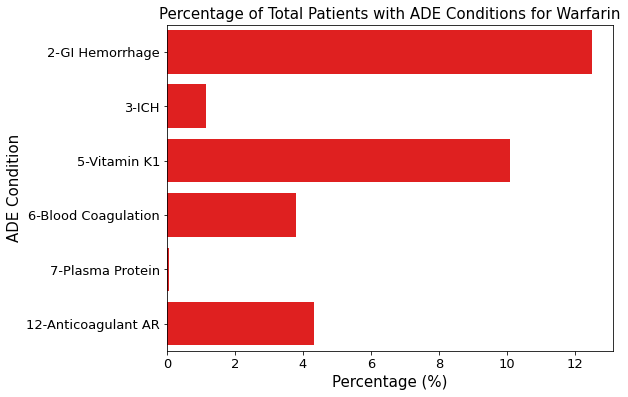

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

sns.barplot(ax = ax, data = percent_counts_inst, x='Percentage', y='Condition', color = 'red')
ax.set_title('Percentage of Total Patients with ADE Conditions for Warfarin', fontsize = 15)
ax.set_xlabel('Percentage (%)', fontsize = 15)
ax.set_ylabel('ADE Condition', fontsize = 15)
ax.tick_params(labelsize=13)


## Popular Condition Codes Frequency

### Data Wrangle

In [113]:
## condtions/procedures with 0 counts not included
## Only did Conditions 1-7, tried using observation id for condition 12, but only found one unique value 
# #Condition 1
# cond1allCount = overlap_df1.groupby([
#     'condition_concept_id', 'condition_name']).count().reset_index()[[
#     'condition_concept_id', 'condition_name', 'drug_name']].head(8)
# cond1allCount.columns = ['condition_concept_id', 'condition_name', 'count']
# cond1allCount.condition_concept_id[
#     :cond1allCount.shape[0]] = cond1allCount.condition_concept_id[:cond1allCount.shape[0]].astype(int)
# cond1allCount = cond1allCount.sort_values(by = ["count"], ascending = False)
# top8List1 = list(cond1allCount.condition_concept_id)

#Condition 2
cond2allCount = overlap_df2.groupby([
    'condition_concept_id', 'condition_name']).count().reset_index()[[
    'condition_concept_id', 'condition_name', 'drug_name']].head(8)

cond2allCountTable = cond2allCount = overlap_df2.groupby([
    'condition_concept_id', 'condition_name']).count().reset_index()[[
    'condition_concept_id', 'condition_name', 'drug_name']]

cond2allCount.columns = ['condition_concept_id', 'condition_name', 'count']
cond2allCount.condition_concept_id[
    :cond2allCount.shape[0]] = cond2allCount.condition_concept_id[:cond2allCount.shape[0]].astype(int)
cond2allCount = cond2allCount.sort_values(by = ["count"], ascending = False)
top8List2 = list(cond2allCount.condition_concept_id)

#Table Formating
cond2allCountTable.columns = ['condition_concept_id', 'condition_name', 'count']
cond2allCountTable.condition_concept_id[
    :cond2allCountTable.shape[0]] = cond2allCountTable.condition_concept_id[:cond2allCountTable.shape[0]].astype(int)
cond2allCountTable = cond2allCountTable.sort_values(by = ["count"], ascending = False)


# #Condition 3
cond3allCount = overlap_df3.groupby([
    'condition_concept_id', 'condition_name']).count().reset_index()[[
    'condition_concept_id', 'condition_name', 'drug_name']].head(8)

cond3allCountTable = cond3allCount = overlap_df3.groupby([
    'condition_concept_id', 'condition_name']).count().reset_index()[[
    'condition_concept_id', 'condition_name', 'drug_name']]

cond3allCount.columns = ['condition_concept_id', 'condition_name', 'count']
cond3allCount.condition_concept_id[
    :cond3allCount.shape[0]] = cond3allCount.condition_concept_id[:cond3allCount.shape[0]].astype(int)
cond3allCount = cond3allCount.sort_values(by = ["count"], ascending = False)
top8List3 = list(cond3allCount.condition_concept_id)

#Table Formating
cond3allCountTable.columns = ['condition_concept_id', 'condition_name', 'count']
cond3allCountTable.condition_concept_id[
    :cond3allCountTable.shape[0]] = cond3allCountTable.condition_concept_id[:cond3allCountTable.shape[0]].astype(int)
cond3allCountTable = cond3allCountTable.sort_values(by = ["count"], ascending = False)



# # #Condition 4
# # cond4allCount = overlap_df4.groupby([
# #     'condition_concept_id', 'condition_name']).count().reset_index()[[
# #     'condition_concept_id', 'condition_name', 'drug_name']].head(8)
# # cond4allCount.columns = ['condition_concept_id', 'condition_name', 'count']
# # cond4allCount.condition_concept_id[
# #     :cond4allCount.shape[0]] = cond4allCount.condition_concept_id[:cond4allCount.shape[0]].astype(int)

# # cond4allCount = cond4allCount.sort_values(by = ["count"], ascending = False)


# #Condition 5
cond5allCount = overlap_df5.groupby([
    'drug_concept_id', 'standard_concept_name']).count().reset_index()[[
    'drug_concept_id', 'standard_concept_name', 'drug_name']].head(8)
cond5allCountTable = overlap_df5.groupby([
    'drug_concept_id', 'standard_concept_name']).count().reset_index()[[
    'drug_concept_id', 'standard_concept_name', 'drug_name']]
cond5allCount.columns = ['drug_concept_id', 'standard_concept_name', 'count']
cond5allCount.drug_concept_id[
    :cond5allCount.shape[0]] = cond5allCount.drug_concept_id[:cond5allCount.shape[0]].astype(int)

cond5allCount = cond5allCount.sort_values(by = ["count"], ascending = False)

#Table Formating
cond5allCountTable.columns = ['drug_concept_id', 'standard_concept_name', 'count']
cond5allCountTable.drug_concept_id[
    :cond5allCountTable.shape[0]] = cond5allCountTable.drug_concept_id[:cond5allCountTable.shape[0]].astype(int)

cond5allCountTable = cond5allCountTable.sort_values(by = ["count"], ascending = False)



# #Condition 6
cond6allCount = overlap_df6.groupby([
    'drug_concept_id', 'standard_concept_name']).count().reset_index()[[
    'drug_concept_id', 'standard_concept_name', 'drug_name']].head(8)
cond6allCountTable = overlap_df6.groupby([
    'drug_concept_id', 'standard_concept_name']).count().reset_index()[[
    'drug_concept_id', 'standard_concept_name', 'drug_name']]
cond6allCount.columns = ['drug_concept_id', 'standard_concept_name', 'count']
cond6allCount.drug_concept_id[
    :cond6allCount.shape[0]] = cond6allCount.drug_concept_id[:cond6allCount.shape[0]].astype(int)

cond6allCount = cond6allCount.sort_values(by = ["count"], ascending = False)

#Table Formating
cond6allCountTable.columns = ['drug_concept_id', 'standard_concept_name', 'count']
cond6allCountTable.drug_concept_id[
    :cond6allCountTable.shape[0]] = cond6allCountTable.drug_concept_id[:cond6allCountTable.shape[0]].astype(int)

cond6allCountTable = cond6allCountTable.sort_values(by = ["count"], ascending = False)
cond6allCountTable

#Condition 7
cond7allCount = overlap_df7.groupby([
    'drug_concept_id', 'standard_concept_name']).count().reset_index()[[
    'drug_concept_id', 'standard_concept_name', 'drug_name']].head(8)
cond7allCount.columns = ['drug_concept_id', 'standard_concept_name', 'count']
cond7allCount.drug_concept_id[
    :cond7allCount.shape[0]] = cond7allCount.drug_concept_id[:cond7allCount.shape[0]].astype(int)

cond7allCount = cond7allCount.sort_values(by = ["count"], ascending = False)



#Condition 12
cond12allCount = overlap_df12.groupby([
    'observation_concept_id', 'standard_concept_name']).count().reset_index()[[
    'observation_concept_id', 'standard_concept_name', 'drug_name']].head(8)
cond12allCount.columns = ['observation_concept_id', 'standard_concept_name', 'count']
cond12allCount.observation_concept_id[
    :cond12allCount.shape[0]] = cond12allCount.observation_concept_id[:cond12allCount.shape[0]].astype(int)

cond12allCount = cond12allCount.sort_values(by = ["count"], ascending = False)
cond12allCount

observation_concept_id           standard_concept_name  count
0                  439996  Anticoagulant adverse reaction     82

### Plots

In [114]:
# fig, axes = plt.subplots(1, 1, figsize=(8,5))

# #Condition1 Plot
# a = sns.barplot(data = cond1allCount, x='condition_concept_id', y='count', 
#                 order = cond1allCount.condition_concept_id.tolist(), color = 'c')
# axes.set_title('Condition 1 (GI Hemmorhage) - Frequency of Common Codes', fontsize = 15)
# axes.set_xlabel('Condition Concept ID', fontsize = 15)
# axes.set_ylabel('Frequency', fontsize = 15)
# axes.tick_params(labelsize=13)

# axes.set(ylim = (0,100))


# for p in a.patches:
#     a.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points', fontsize = 12)

# plt.show()
# cond1allCount

In [115]:
# fig, axes = plt.subplots(1, 1, figsize=(8,5))

# #Condition2 Plot
# b = sns.barplot(data = cond2allCount, x='condition_concept_id', y='count', 
#                 order = cond2allCount.condition_concept_id.tolist(), color = 'c')
# axes.set_title('Condition 2 (GI Hemorrhage) - Frequency of Common Codes', fontsize = 15)
# axes.set_xlabel('Condition Concept ID', fontsize = 15 )
# axes.set_ylabel('Frequency', fontsize = 15)
# axes.tick_params(labelsize=13)
# axes.set(ylim = (0,100))


# for p in b.patches:
#     b.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points', fontsize = 12)
    
# plt.show()
# cond2allCount

In [116]:
# fig, axes = plt.subplots(1, 1, figsize=(8,5))

# #Condition3 Plot
# c = sns.barplot(data = cond3allCount, x='condition_concept_id', y='count', 
#                 order = cond3allCount.condition_concept_id.tolist(), color = 'c')
# axes.set_title('Condition 3 (ICH) - Frequency of Common Codes', fontsize = 15)
# axes.set_xlabel('Condition Concept ID', fontsize = 15 )
# axes.set_ylabel('Frequency', fontsize = 15)
# axes.tick_params(labelsize = 13)
# axes.set_ylim(0,8)


# for p in c.patches:
#     c.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points', fontsize = 12)
# plt.show()
# cond3allCount

In [117]:
# fig, axes = plt.subplots(1, 1, figsize=(5,4))

# #Condition4 Plot
# d = sns.barplot(data = cond4allCount, x='condition_concept_id', y='count',
#                 order = cond4allCount.condition_concept_id.tolist(), color = 'c')
# axes.set_title('Condition 4 (ICH) - Frequency of Common Codes', fontsize = 15)
# axes.set_xlabel('Condition Concept ID', fontsize = 15 )
# axes.set_ylabel('Frequency', fontsize = 15 )
# axes.tick_params(labelsize = 13)
# axes.set_ylim(0,6)

# for p in d.patches:
#     d.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points', fontsize = 12)
# plt.show()
# cond4allCount

In [118]:
# fig, axes = plt.subplots(1, 1, figsize=(10,5))

# # Condition5 Plot
# d = sns.barplot(data = cond5allCount, x='drug_concept_id', y='count',
#                 order = cond5allCount.drug_concept_id.tolist(), color = 'c')
# axes.set_title('Condition 5 (Vitamin K1) - Frequency of Common Codes', fontsize = 15)
# axes.set_xlabel('Drug Concept ID', fontsize = 15 )
# axes.set_ylabel('Frequency', fontsize = 15)
# axes.tick_params(labelsize = 13)
# axes.set_ylim(0,70)

# for p in d.patches:
#     d.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points', fontsize = 12)
# plt.show()
# cond5allCount

In [119]:
# fig, axes = plt.subplots(1, 1, figsize=(10,5))

# # Condition6 Plot
# d = sns.barplot(data = cond6allCount, x='drug_concept_id', y='count',
#                 order = cond6allCount.drug_concept_id.tolist(), color = 'c')
# axes.set_title('Condition 6 (Blood Coagulation) - Frequency of Common Codes', fontsize = 15)
# axes.set_xlabel('Drug Concept ID', fontsize = 15 )
# axes.set_ylabel('Frequency', fontsize = 15)
# axes.tick_params(labelsize = 13)
# axes.set_ylim(0,10)

# for p in d.patches:
#     d.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points', fontsize = 12)
# plt.show()
# cond6allCount

In [120]:
# fig, axes = plt.subplots(1, 1, figsize=(10,6))

# # Condition12 Plot
# d = sns.barplot(data = cond12allCount, x='observation_concept_id', y='count',
#                 order = cond12allCount.observation_concept_id.tolist(), color = 'c')
# axes.set_title('Condition 12 (Anticoagulant Adverse Reaction) - Frequency of Common Codes', fontsize = 15)
# axes.set_xlabel('Observation Concept ID', fontsize = 15 )
# axes.set_ylabel('Frequency', fontsize = 15)
# axes.tick_params(labelsize = 13)
# axes.set_ylim(0,90)

# for p in d.patches:
#     d.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points', fontsize = 12)
# plt.show()
# cond12allCount

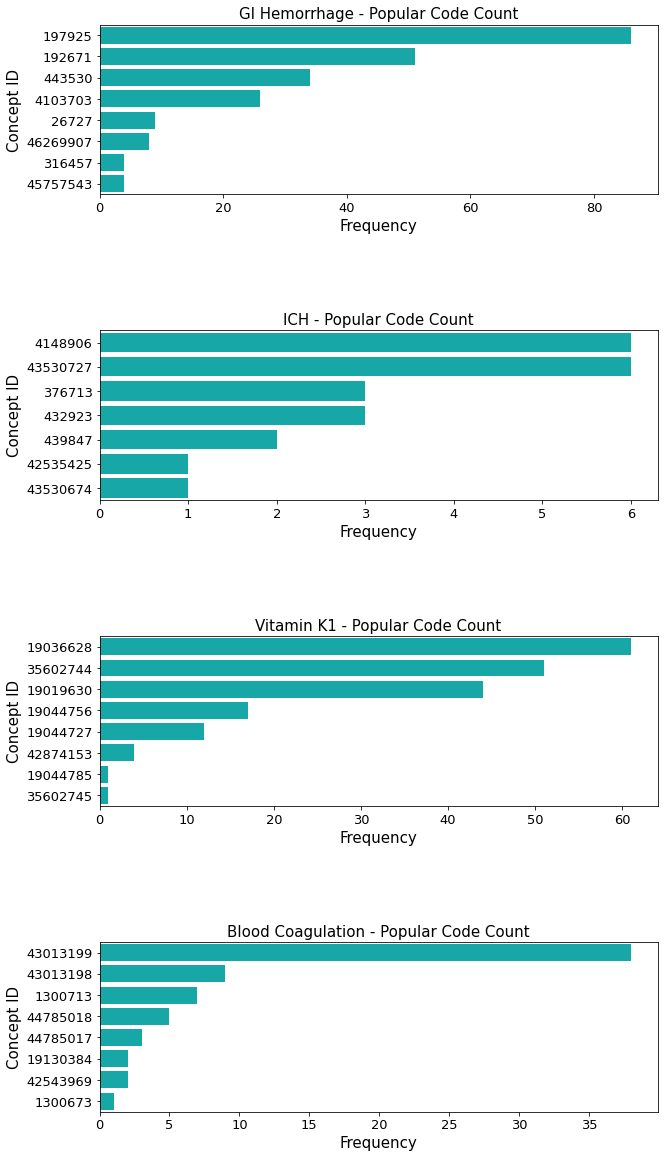

In [121]:
overlaps = [overlap_df2, overlap_df3, overlap_df5, overlap_df6]
cond_all_ct = []
cond_show_tbl = []

for ov in overlaps:
    if 'condition_concept_id' in ov.columns:
        cond_ct = ov.groupby([
            'condition_concept_id', 'condition_name']).count().reset_index()[[
            'condition_concept_id', 'condition_name', 'drug_name']]
        cond_ct.columns = ['condition_concept_id', 'condition_name', 'count']
        cond_ct.condition_concept_id[:cond_ct.shape[0]] = (
            cond_ct.condition_concept_id[:cond_ct.shape[0]].astype(int).map(str))
    else:
        cond_ct = ov.groupby([
            'drug_concept_id', 'standard_concept_name']).count().reset_index()[[
            'drug_concept_id', 'standard_concept_name', 'drug_name']]
        cond_ct.columns = ['drug_concept_id', 'standard_concept_name', 'count']
        cond_ct.drug_concept_id[:cond_ct.shape[0]] = (
            cond_ct.drug_concept_id[:cond_ct.shape[0]].astype(int).map(str))
    cond_ct = cond_ct.sort_values(by = ["count"], ascending = False)
    cond_show_tbl.append(cond_ct.reset_index(drop = True))
    cond_ct = cond_ct.head(8)
    cond_all_ct.append(cond_ct)
    
fig, axes = plt.subplots(4, 1, figsize=(10,20))
fig.subplots_adjust(hspace=0.8, wspace = 1)

titles = ['GI Hemorrhage - Popular Code Count', 
          'ICH - Popular Code Count',
          'Vitamin K1 - Popular Code Count',
         'Blood Coagulation - Popular Code Count']

for i in range(len(overlaps)):
    if 'condition_concept_id' in cond_all_ct[i]:
        sns.barplot(ax = axes[i], data = cond_all_ct[i], x='count', y='condition_concept_id',
                        order = cond_all_ct[i].condition_concept_id.tolist(), color = 'c')
        axes[i].set_title(titles[i], fontsize = 15)
        axes[i].set_xlabel('Frequency', fontsize = 15 )
        axes[i].set_ylabel('Concept ID', fontsize = 15)
        axes[i].tick_params(labelsize=13)
    else:
        sns.barplot(ax = axes[i], data = cond_all_ct[i], x='count', y='drug_concept_id',
                        order = cond_all_ct[i].drug_concept_id.tolist(), color = 'c')
        axes[i].set_title(titles[i], fontsize = 15)
        axes[i].set_xlabel('Frequency', fontsize = 15 )
        axes[i].set_ylabel('Concept ID', fontsize = 15)
        axes[i].tick_params(labelsize=13)

plt.show()

## Visit Type Frequency (2 plots)

### Subplots of Visit Type Frequency

Create visit count table for each condition

In [122]:
# # Condition 1
# vis_id_cts1 = overlap_df1.groupby('visit_concept_id').count().reset_index()[['visit_concept_id', 'drug_name']]
# vis_id_cts1.columns = ['visit_concept_id', 'count']
# vis_id_cts1.sort_values('count', ascending = False, inplace = True)
# vis_id_cts1.reset_index(drop = True, inplace = True)
# vis_id_cts1[:vis_id_cts1.shape[0]] = vis_id_cts1[:vis_id_cts1.shape[0]].astype(int)

# Condition 2
vis_id_cts2 = overlap_df2.groupby('visit_concept_id').count().reset_index()[['visit_concept_id', 'drug_name']]
vis_id_cts2.columns = ['visit_concept_id', 'count']
vis_id_cts2.sort_values('count', ascending = False, inplace = True)
vis_id_cts2.reset_index(drop = True, inplace = True)
vis_id_cts2[:vis_id_cts2.shape[0]] = vis_id_cts2[:vis_id_cts2.shape[0]].astype(int)

# Condition 3
vis_id_cts3 = overlap_df3.groupby('visit_concept_id').count().reset_index()[['visit_concept_id', 'drug_name']]
vis_id_cts3.columns = ['visit_concept_id', 'count']
vis_id_cts3.sort_values('count', ascending = False, inplace = True)
vis_id_cts3.reset_index(drop = True, inplace = True)
vis_id_cts3[:vis_id_cts3.shape[0]] = vis_id_cts3[:vis_id_cts3.shape[0]].astype(int)

# # Condition 4
# vis_id_cts4 = overlap_df4.groupby('visit_concept_id').count().reset_index()[['visit_concept_id', 'drug_name']]
# vis_id_cts4.columns = ['visit_concept_id', 'count']
# vis_id_cts4.sort_values('count', ascending = False, inplace = True)
# vis_id_cts4.reset_index(drop = True, inplace = True)
# vis_id_cts4[:vis_id_cts4.shape[0]] = vis_id_cts4[:vis_id_cts4.shape[0]].astype(int)

# Condition 5
vis_id_cts5 = overlap_df5.groupby('visit_concept_id').count().reset_index()[['visit_concept_id', 'drug_name']]
vis_id_cts5.columns = ['visit_concept_id', 'count']
vis_id_cts5.sort_values('count', ascending = False, inplace = True)
vis_id_cts5.reset_index(drop = True, inplace = True)
vis_id_cts5[:vis_id_cts5.shape[0]] = vis_id_cts5[:vis_id_cts5.shape[0]].astype(int)

# Condition 6
vis_id_cts6 = overlap_df6.groupby('visit_concept_id').count().reset_index()[['visit_concept_id', 'drug_name']]
vis_id_cts6.columns = ['visit_concept_id', 'count']
vis_id_cts6.sort_values('count', ascending = False, inplace = True)
vis_id_cts6.reset_index(drop = True, inplace = True)
vis_id_cts6[:vis_id_cts6.shape[0]] = vis_id_cts6[:vis_id_cts6.shape[0]].astype(int)

# Condition 7
vis_id_cts7 = overlap_df7.groupby('visit_concept_id').count().reset_index()[['visit_concept_id', 'drug_name']]
vis_id_cts7.columns = ['visit_concept_id', 'count']
vis_id_cts7.sort_values('count', ascending = False, inplace = True)
vis_id_cts7.reset_index(drop = True, inplace = True)
vis_id_cts7[:vis_id_cts7.shape[0]] = vis_id_cts7[:vis_id_cts7.shape[0]].astype(int)

# Condition 12
vis_id_cts12 = overlap_df12.groupby('visit_concept_id').count().reset_index()[['visit_concept_id', 'drug_name']]
vis_id_cts12.columns = ['visit_concept_id', 'count']
vis_id_cts12.sort_values('count', ascending = False, inplace = True)
vis_id_cts12.reset_index(drop = True, inplace = True)
vis_id_cts12[:vis_id_cts12.shape[0]] = vis_id_cts12[:vis_id_cts12.shape[0]].astype(int)

Create dictionary to convert visit_concept_id to visit_type

In [123]:
vis_id_lst = pd.concat([
#     overlap_df1.visit_concept_id, 
                        overlap_df2.visit_concept_id, 
                        overlap_df3.visit_concept_id, 
#                         overlap_df4.visit_concept_id,
                        overlap_df5.visit_concept_id,
                        overlap_df6.visit_concept_id,
                        overlap_df7.visit_concept_id,
                        overlap_df12.visit_concept_id
                       ]).drop_duplicates().dropna().astype(int).tolist()

insert_visid = ",".join([f"('{x}')" for x in vis_id_lst])

vis_conv_sql = f"""
-- temp SQL table for condition codes for faster lookup using join
CREATE TEMP TABLE temp
(
  visit_concept_id STRING
);
INSERT INTO temp (
    visit_concept_id
)
VALUES {insert_visid};

-- create official table with correct integer cast
CREATE TEMP TABLE search_codes (
    visit_concept_id INT64
);

INSERT INTO search_codes
SELECT CAST(visit_concept_id as INT64) as visit_concept_id FROM temp;

--SELECT * FROM search_codes;

SELECT s.visit_concept_id, c.concept_name 
FROM search_codes s
LEFT JOIN {os.environ["WORKSPACE_CDR"]}.concept c 
        on s.visit_concept_id = c.concept_id ;
"""
vis_id_conv = pd.read_gbq(vis_conv_sql, dialect="standard")

Add visit type to vis_id_cts tables and groupby visit type

In [124]:
# vis_type_ct1 = vis_id_cts1.join(
#     vis_id_conv.set_index('visit_concept_id'), on = 'visit_concept_id')[['concept_name', 'count']]
# vis_type_ct1 = vis_type_ct1.groupby('concept_name', dropna=False).sum().reset_index().fillna('Unknown')
# vis_type_ct1.sort_values('count', ascending = False, inplace = True)

vis_type_ct2 = vis_id_cts2.join(
    vis_id_conv.set_index('visit_concept_id'), on = 'visit_concept_id')[['concept_name', 'count']]
vis_type_ct2 = vis_type_ct2.groupby('concept_name', dropna=False).sum().reset_index().fillna('Unknown')
vis_type_ct2.sort_values('count', ascending = False, inplace = True)

vis_type_ct3 = vis_id_cts3.join(
    vis_id_conv.set_index('visit_concept_id'), on = 'visit_concept_id')[['concept_name', 'count']]
vis_type_ct3 = vis_type_ct3.groupby('concept_name', dropna=False).sum().reset_index().fillna('Unknown')
vis_type_ct3.sort_values('count', ascending = False, inplace = True)

# vis_type_ct4 = vis_id_cts4.join(
#     vis_id_conv.set_index('visit_concept_id'), on = 'visit_concept_id')[['concept_name', 'count']]
# vis_type_ct4 = vis_type_ct4.groupby('concept_name', dropna=False).sum().reset_index().fillna('Unknown')
# vis_type_ct4.sort_values('count', ascending = False, inplace = True)

vis_type_ct5 = vis_id_cts5.join(
    vis_id_conv.set_index('visit_concept_id'), on = 'visit_concept_id')[['concept_name', 'count']]
vis_type_ct5 = vis_type_ct5.groupby('concept_name', dropna=False).sum().reset_index().fillna('Unknown')
vis_type_ct5.sort_values('count', ascending = False, inplace = True)

vis_type_ct6 = vis_id_cts6.join(
    vis_id_conv.set_index('visit_concept_id'), on = 'visit_concept_id')[['concept_name', 'count']]
vis_type_ct6 = vis_type_ct6.groupby('concept_name', dropna=False).sum().reset_index().fillna('Unknown')
vis_type_ct6.sort_values('count', ascending = False, inplace = True)

vis_type_ct7 = vis_id_cts7.join(
    vis_id_conv.set_index('visit_concept_id'), on = 'visit_concept_id')[['concept_name', 'count']]
vis_type_ct7 = vis_type_ct7.groupby('concept_name', dropna=False).sum().reset_index().fillna('Unknown')
vis_type_ct7.sort_values('count', ascending = False, inplace = True)

vis_type_ct12 = vis_id_cts12.join(
    vis_id_conv.set_index('visit_concept_id'), on = 'visit_concept_id')[['concept_name', 'count']]
vis_type_ct12 = vis_type_ct12.groupby('concept_name', dropna=False).sum().reset_index().fillna('Unknown')
vis_type_ct12.sort_values('count', ascending = False, inplace = True)

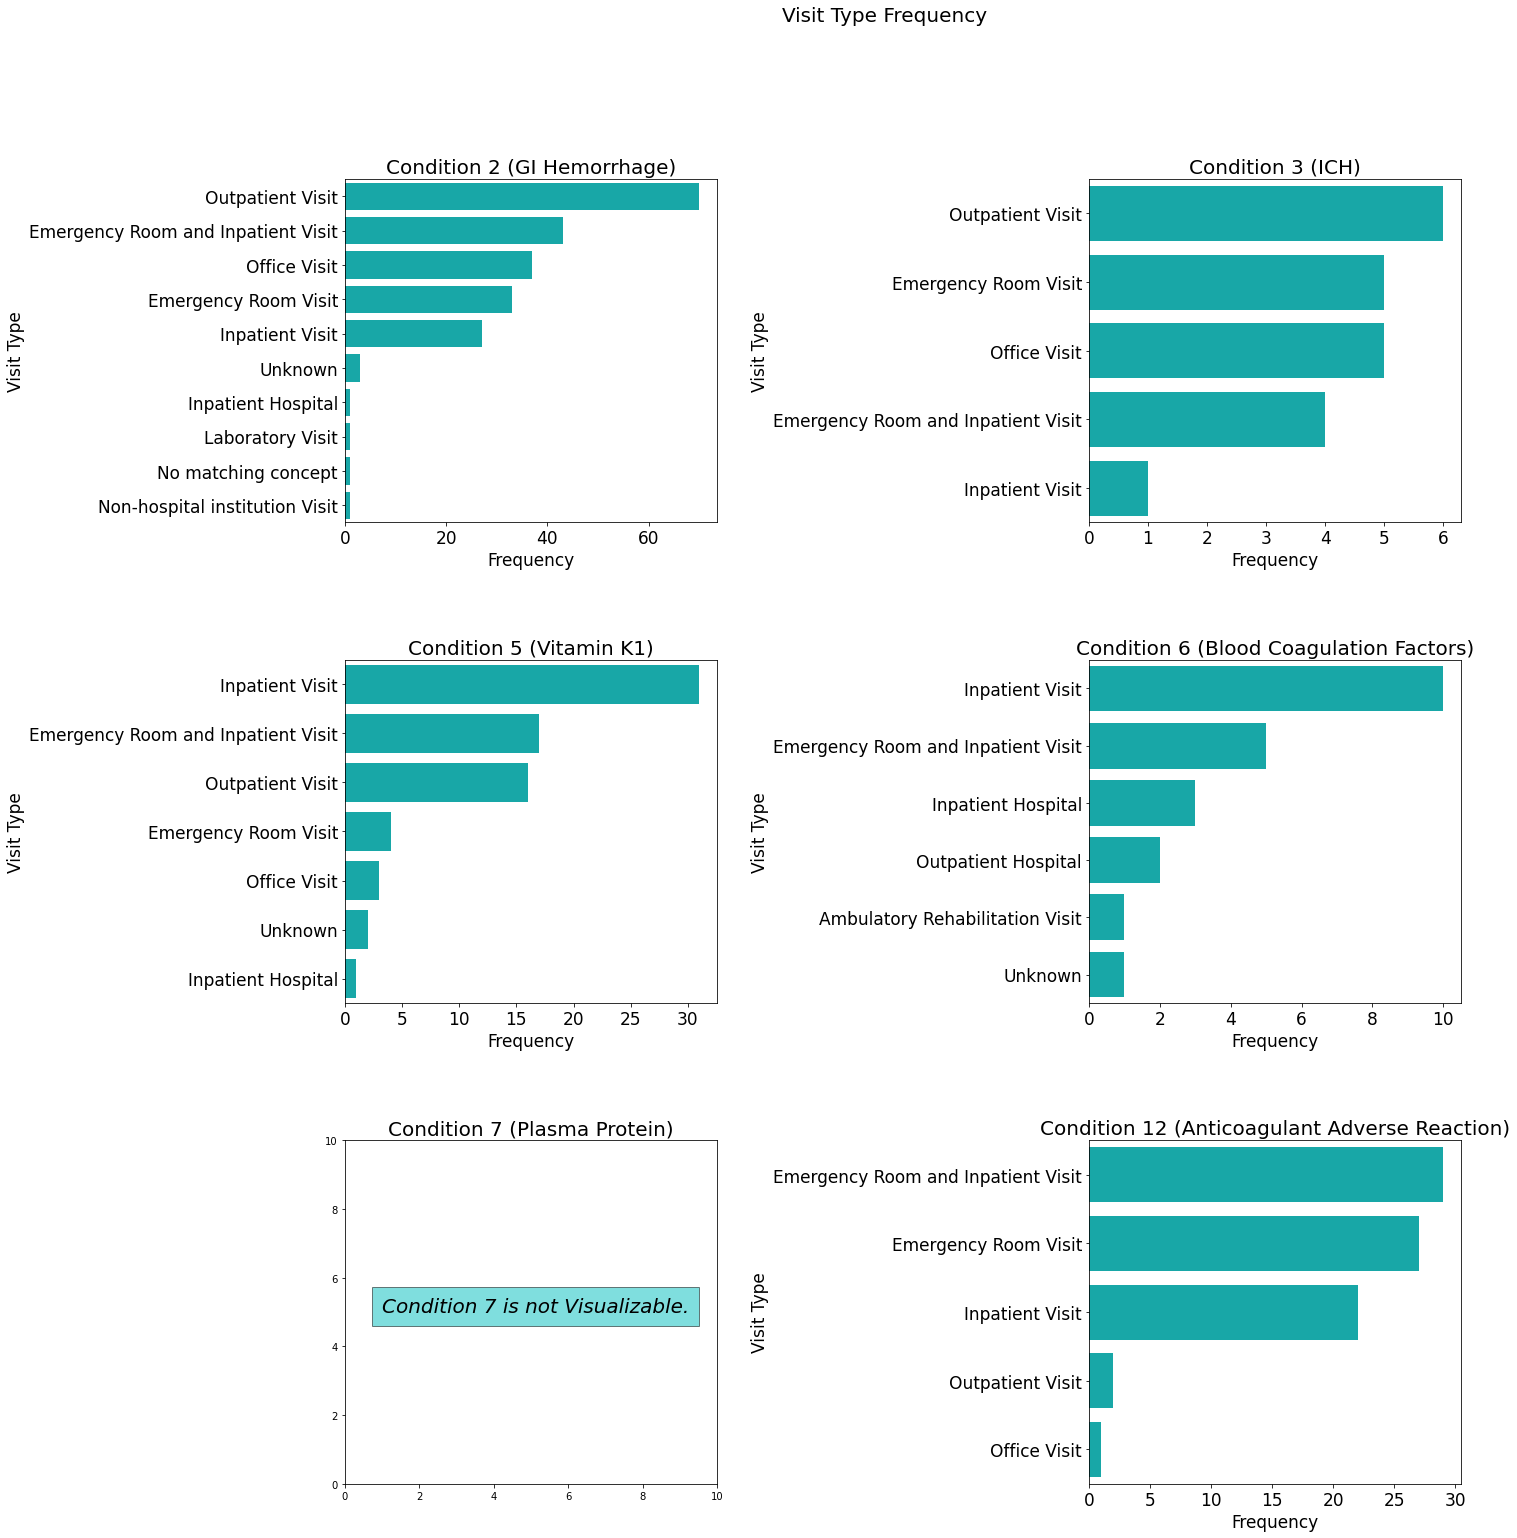

In [125]:
fig, axes = plt.subplots(3, 2, figsize=(20,24))
fig.suptitle('Visit Type Frequency', fontsize = 20)
fig.subplots_adjust(hspace = 0.4, wspace = 1)


# # Condition 1
# sns.barplot(ax = axes[0,0], data = vis_type_ct1, x='count', y='concept_name', color = 'c')
# axes[0,0].set_xlabel('Frequency', fontsize = 17)
# axes[0,0].set_ylabel('Visit Type', fontsize = 17)
# axes[0,0].set_title( 'Condition 1 (GI Hemorrhage)', fontsize = 20)
# axes[0,0].tick_params(labelsize=17)

# Condition 2
sns.barplot(ax = axes[0,0], data = vis_type_ct2, x='count', y='concept_name', color = 'c')
axes[0,0].set_xlabel('Frequency', fontsize = 17)
axes[0,0].set_ylabel('Visit Type', fontsize = 17)
axes[0,0].set_title( 'Condition 2 (GI Hemorrhage)', fontsize = 20)
axes[0,0].tick_params(labelsize=17)

# Condition 3
sns.barplot(ax = axes[0,1], data = vis_type_ct3, x='count', y='concept_name', color = 'c')
axes[0,1].set_xlabel('Frequency', fontsize = 17)
axes[0,1].set_ylabel('Visit Type', fontsize = 17)
axes[0,1].set_title( 'Condition 3 (ICH)', fontsize = 20)
axes[0,1].tick_params(labelsize=17)

# # Condition 4
# sns.barplot(ax = axes[1,1], data = vis_type_ct4, x='count', y='concept_name', color = 'c')
# axes[1,1].set_xlabel('Frequency', fontsize = 17)
# axes[1,1].set_ylabel('Visit Type', fontsize = 17)
# axes[1,1].set_title( 'Condition 4 (ICH Min)', fontsize = 20)
# axes[1,1].tick_params(labelsize=17)

# Condition 5
sns.barplot(ax = axes[1,0], data = vis_type_ct5, x='count', y='concept_name', color = 'c')
axes[1,0].set_xlabel('Frequency', fontsize = 17)
axes[1,0].set_ylabel('Visit Type', fontsize = 17)
axes[1,0].set_title( 'Condition 5 (Vitamin K1)', fontsize = 20)
axes[1,0].tick_params(labelsize=17)

# Condition 6
sns.barplot(ax = axes[1,1], data = vis_type_ct6, x='count', y='concept_name', color = 'c')
axes[1,1].set_xlabel('Frequency', fontsize = 17)
axes[1,1].set_ylabel('Visit Type', fontsize = 17)
axes[1,1].set_title('Condition 6 (Blood Coagulation Factors)', fontsize = 20)
axes[1,1].tick_params(labelsize=17)

# Condition 7
axes[2,0].set_title('Condition 7 (Plasma Protein)', fontsize = 20)
axes[2,0].axis([0, 10, 0, 10])
axes[2,0].text(1, 5, 'Condition 7 is not Visualizable.', style='italic',
        bbox={'facecolor': 'c', 'alpha': 0.5, 'pad': 10}, fontsize = 20)

#Condition 12
sns.barplot(ax = axes[2,1], data = vis_type_ct12, x='count', y='concept_name', color = 'c')
axes[2,1].set_xlabel('Frequency', fontsize = 17)
axes[2,1].set_ylabel('Visit Type', fontsize = 17)
axes[2,1].set_title('Condition 12 (Anticoagulant Adverse Reaction)', fontsize = 20)
axes[2,1].tick_params(labelsize=17)

plt.show()

In [126]:
# # wrangle data to suit a join
# vis_type_jn1 = vis_type_ct1.copy()
vis_type_jn2 = vis_type_ct2.copy()
vis_type_jn3 = vis_type_ct3.copy()
# vis_type_jn4 = vis_type_ct4.copy()
vis_type_jn5 = vis_type_ct5.copy()
vis_type_jn6 = vis_type_ct6.copy()
vis_type_jn7 = vis_type_ct7.copy()
vis_type_jn12 = vis_type_ct12.copy()


# vis_type_jn1.columns = ['concept_name', 'cond_1_count']
vis_type_jn2.columns = ['concept_name', 'cond_2_count']
vis_type_jn3.columns = ['concept_name', 'cond_3_count']
# vis_type_jn4.columns = ['concept_name', 'cond_4_count']
vis_type_jn5.columns = ['concept_name', 'cond_5_count']
vis_type_jn6.columns = ['concept_name', 'cond_6_count']
vis_type_jn7.columns = ['concept_name', 'cond_7_count']
vis_type_jn12.columns = ['concept_name', 'cond_12_count']


# join all 4 conditions by visit type
vis_type_cts_all = vis_type_jn2.join(
    vis_type_jn3.set_index('concept_name'), on = 'concept_name').join(
#     vis_type_jn4.set_index('concept_name'), on = 'concept_name').join(
    vis_type_jn5.set_index('concept_name'), on = 'concept_name').join(
    vis_type_jn6.set_index('concept_name'), on = 'concept_name').join(
    vis_type_jn7.set_index('concept_name'), on = 'concept_name').join(
    vis_type_jn12.set_index('concept_name'), on = 'concept_name')


# convert all columns to integers
vis_type_cts_all = vis_type_cts_all.fillna(0)
vis_type_cts_all.cond_3_count[
    :vis_type_cts_all.shape[0]] = vis_type_cts_all.cond_3_count[:vis_type_cts_all.shape[0]].astype(int)
# vis_type_cts_all.cond_4_count[
#     :vis_type_cts_all.shape[0]] = vis_type_cts_all.cond_4_count[:vis_type_cts_all.shape[0]].astype(int)
vis_type_cts_all.cond_5_count[
    :vis_type_cts_all.shape[0]] = vis_type_cts_all.cond_5_count[:vis_type_cts_all.shape[0]].astype(int)
vis_type_cts_all.cond_6_count[
    :vis_type_cts_all.shape[0]] = vis_type_cts_all.cond_6_count[:vis_type_cts_all.shape[0]].astype(int)
vis_type_cts_all.cond_7_count[
    :vis_type_cts_all.shape[0]] = vis_type_cts_all.cond_7_count[:vis_type_cts_all.shape[0]].astype(int)
vis_type_cts_all.cond_12_count[
    :vis_type_cts_all.shape[0]] = vis_type_cts_all.cond_12_count[:vis_type_cts_all.shape[0]].astype(int)
vis_type_cts_all.columns = ['Visit Type', 'GI Hemorrhage', 'ICH', 
                            'Vitamin K1', 'Blood Coagulation Factors', 
                            'Plasma Protein Fraction', 'Anticoagulant Adverse Reaction']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to b

In [127]:
vis_type_cts_all

Visit Type  GI Hemorrhage  ICH  Vitamin K1  \
8                    Outpatient Visit             70    6          16   
1  Emergency Room and Inpatient Visit             43    4          17   
7                        Office Visit             37    5           3   
0                Emergency Room Visit             33    5           4   
3                     Inpatient Visit             27    1          31   
9                             Unknown              3    0           2   
2                  Inpatient Hospital              1    0           1   
4                    Laboratory Visit              1    0           0   
5                 No matching concept              1    0           0   
6      Non-hospital institution Visit              1    0           0   

   Blood Coagulation Factors  Plasma Protein Fraction  \
8                          0                        0   
1                          5                        0   
7                          0                        0   
0                          0                        0   
3                         10                        0   
9                          1                        0   
2                          3                        0   
4                          0                        0   
5                          0                        0   
6                          0                        0   

   Anticoagulant Adverse Reaction  
8                               2  
1                              29  
7                               1  
0                              27  
3                              22  
9                               0  
2                               0  
4                               0  
5                               0  
6                               0

### Recurring 

In [128]:
overlap_dfs = [overlap_df2_all, overlap_df3_all, overlap_df5_all, overlap_df6_all, overlap_df7_all, overlap_df12_all]

vis_id_dfs = []
for i in range(len(overlap_dfs)):
    vis_id_cts = overlap_dfs[i].groupby('visit_concept_id').count().reset_index()[['visit_concept_id', 'drug_name']]
    vis_id_cts.columns = ['visit_concept_id', 'count']
    vis_id_cts.sort_values('count', ascending = False, inplace = True)
    vis_id_cts.reset_index(drop = True, inplace = True)
    vis_id_cts[:vis_id_cts.shape[0]] = vis_id_cts[:vis_id_cts.shape[0]].astype(int)
    vis_id_dfs.append(vis_id_cts)

In [129]:
vis_type_dfs = []
for i in range(len(vis_id_dfs)):
    vis_type_ct = vis_id_dfs[i].join(
        vis_id_conv.set_index('visit_concept_id'), on = 'visit_concept_id')[['concept_name', 'count']]
    vis_type_ct = vis_type_ct.groupby('concept_name', dropna=False).sum().reset_index().fillna('Unknown')
    vis_type_ct.sort_values('count', ascending = False, inplace = True)
    vis_type_ct['concept_name'][
        vis_type_ct['concept_name'] == 'Emergency Room and Inpatient Visit'] = [
        'ER and Inpatient Visit']*vis_type_ct[vis_type_ct[
        'concept_name'] == 'Emergency Room and Inpatient Visit'].shape[0]
    vis_type_dfs.append(vis_type_ct)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [130]:
len(vis_type_dfs)

6

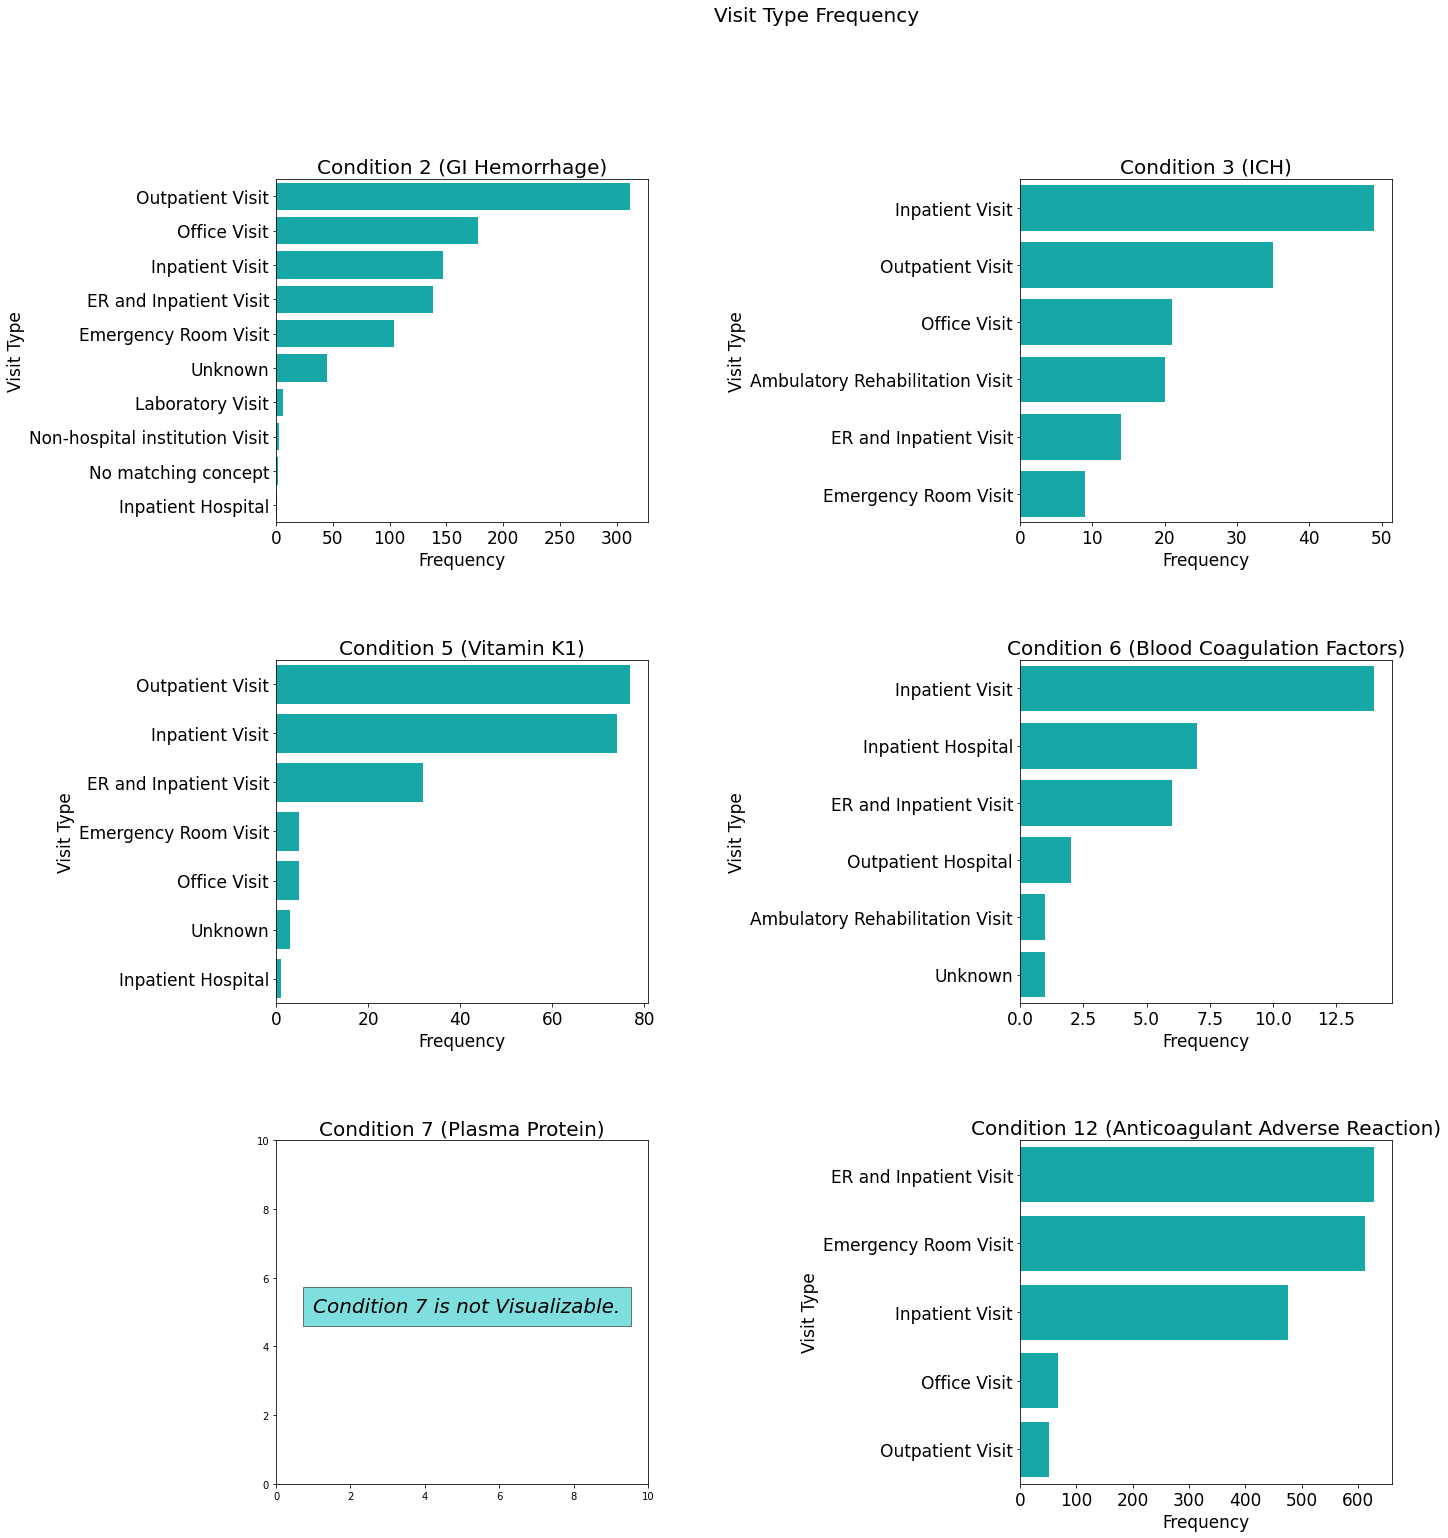

In [131]:
fig, axes = plt.subplots(3, 2, figsize=(20,24))
fig.suptitle('Visit Type Frequency', fontsize = 20)
fig.subplots_adjust(hspace = 0.4, wspace = 1)


# Condition 2
sns.barplot(ax = axes[0,0], data = vis_type_dfs[0], x='count', y='concept_name', color = 'c')
axes[0,0].set_xlabel('Frequency', fontsize = 17)
axes[0,0].set_ylabel('Visit Type', fontsize = 17)
axes[0,0].set_title( 'Condition 2 (GI Hemorrhage)', fontsize = 20)
axes[0,0].tick_params(labelsize=17)

# Condition 3
sns.barplot(ax = axes[0,1], data = vis_type_dfs[1], x='count', y='concept_name', color = 'c')
axes[0,1].set_xlabel('Frequency', fontsize = 17)
axes[0,1].set_ylabel('Visit Type', fontsize = 17)
axes[0,1].set_title( 'Condition 3 (ICH)', fontsize = 20)
axes[0,1].tick_params(labelsize=17)

# Condition 5
sns.barplot(ax = axes[1,0], data = vis_type_dfs[2], x='count', y='concept_name', color = 'c')
axes[1,0].set_xlabel('Frequency', fontsize = 17)
axes[1,0].set_ylabel('Visit Type', fontsize = 17)
axes[1,0].set_title( 'Condition 5 (Vitamin K1)', fontsize = 20)
axes[1,0].tick_params(labelsize=17)

# Condition 6
sns.barplot(ax = axes[1,1], data = vis_type_dfs[3], x='count', y='concept_name', color = 'c')
axes[1,1].set_xlabel('Frequency', fontsize = 17)
axes[1,1].set_ylabel('Visit Type', fontsize = 17)
axes[1,1].set_title('Condition 6 (Blood Coagulation Factors)', fontsize = 20)
axes[1,1].tick_params(labelsize=17)

# Condition 7
axes[2,0].set_title('Condition 7 (Plasma Protein)', fontsize = 20)
axes[2,0].axis([0, 10, 0, 10])
axes[2,0].text(1, 5, 'Condition 7 is not Visualizable.', style='italic',
        bbox={'facecolor': 'c', 'alpha': 0.5, 'pad': 10}, fontsize = 20)

#Condition 12
sns.barplot(ax = axes[2,1], data = vis_type_dfs[5], x='count', y='concept_name', color = 'c')
axes[2,1].set_xlabel('Frequency', fontsize = 17)
axes[2,1].set_ylabel('Visit Type', fontsize = 17)
axes[2,1].set_title('Condition 12 (Anticoagulant Adverse Reaction)', fontsize = 20)
axes[2,1].tick_params(labelsize=17)

plt.show()

In [132]:
# # wrangle data to suit a join
vis_type_jn2 = vis_type_dfs[0].copy()
vis_type_jn3 = vis_type_dfs[1].copy()
vis_type_jn5 = vis_type_dfs[2].copy()
vis_type_jn6 = vis_type_dfs[3].copy()
vis_type_jn7 = vis_type_dfs[4].copy()
vis_type_jn12 = vis_type_dfs[5].copy()


# vis_type_jn1.columns = ['concept_name', 'cond_1_count']
vis_type_jn2.columns = ['concept_name', 'cond_2_count']
vis_type_jn3.columns = ['concept_name', 'cond_3_count']
# vis_type_jn4.columns = ['concept_name', 'cond_4_count']
vis_type_jn5.columns = ['concept_name', 'cond_5_count']
vis_type_jn6.columns = ['concept_name', 'cond_6_count']
vis_type_jn7.columns = ['concept_name', 'cond_7_count']
vis_type_jn12.columns = ['concept_name', 'cond_12_count']


# join all 4 conditions by visit type
vis_type_cts_all = vis_type_jn2.join(
    vis_type_jn3.set_index('concept_name'), on = 'concept_name').join(
#     vis_type_jn4.set_index('concept_name'), on = 'concept_name').join(
    vis_type_jn5.set_index('concept_name'), on = 'concept_name').join(
    vis_type_jn6.set_index('concept_name'), on = 'concept_name').join(
    vis_type_jn7.set_index('concept_name'), on = 'concept_name').join(
    vis_type_jn12.set_index('concept_name'), on = 'concept_name')


# convert all columns to integers
vis_type_cts_all = vis_type_cts_all.fillna(0)
vis_type_cts_all.cond_3_count[
    :vis_type_cts_all.shape[0]] = vis_type_cts_all.cond_3_count[:vis_type_cts_all.shape[0]].astype(int)
# vis_type_cts_all.cond_4_count[
#     :vis_type_cts_all.shape[0]] = vis_type_cts_all.cond_4_count[:vis_type_cts_all.shape[0]].astype(int)
vis_type_cts_all.cond_5_count[
    :vis_type_cts_all.shape[0]] = vis_type_cts_all.cond_5_count[:vis_type_cts_all.shape[0]].astype(int)
vis_type_cts_all.cond_6_count[
    :vis_type_cts_all.shape[0]] = vis_type_cts_all.cond_6_count[:vis_type_cts_all.shape[0]].astype(int)
vis_type_cts_all.cond_7_count[
    :vis_type_cts_all.shape[0]] = vis_type_cts_all.cond_7_count[:vis_type_cts_all.shape[0]].astype(int)
vis_type_cts_all.cond_12_count[
    :vis_type_cts_all.shape[0]] = vis_type_cts_all.cond_12_count[:vis_type_cts_all.shape[0]].astype(int)
vis_type_cts_all.columns = ['Visit Type', 'GI Hemorrhage', 'ICH', 
                            'Vitamin K1', 'Blood Coagulation Factors', 
                            'Plasma Protein Fraction', 'Anticoagulant Adverse Reaction']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to b

In [133]:
vis_type_cts_all

Visit Type  GI Hemorrhage  ICH  Vitamin K1  \
8                Outpatient Visit            312   35          77   
7                    Office Visit            178   21           5   
3                 Inpatient Visit            147   49          74   
1          ER and Inpatient Visit            138   14          32   
0            Emergency Room Visit            104    9           5   
9                         Unknown             45    0           3   
4                Laboratory Visit              6    0           0   
6  Non-hospital institution Visit              3    0           0   
5             No matching concept              2    0           0   
2              Inpatient Hospital              1    0           1   

   Blood Coagulation Factors  Plasma Protein Fraction  \
8                          0                        0   
7                          0                        0   
3                         14                        0   
1                          6                        0   
0                          0                        0   
9                          1                        0   
4                          0                        0   
6                          0                        0   
5                          0                        0   
2                          7                        0   

   Anticoagulant Adverse Reaction  
8                              51  
7                              68  
3                             476  
1                             629  
0                             612  
9                               0  
4                               0  
6                               0  
5                               0  
2                               0

## Cohort Overlap Visualization (Percent)

### All Visit Types

In [134]:
# temp1 = overlap_df1.reset_index()
temp2 = overlap_df2.reset_index()
temp3 = overlap_df3.reset_index()
# temp4 = overlap_df4.reset_index()
temp5 = overlap_df5.reset_index()
temp6 = overlap_df6.reset_index()
temp7 = overlap_df7.reset_index()
temp12 = overlap_df12.reset_index()

# temp1_er = overlap_df1_er.reset_index()
# temp2_er = overlap_df2_er.reset_index()
# temp3_er = overlap_df3_er.reset_index()
# temp4_er = overlap_df4_er.reset_index()
# temp5_er = overlap_df5_er.reset_index()
# temp6_er = overlap_df6_er.reset_index()
# temp7_er = overlap_df7_er.reset_index()
# temp12_er = overlap_df12_er.reset_index()


cond = ['2 - GI Hemorrhage', '3 - ICH', 
        '5 - Vitamin K1', '6 - Blood Coagulation Factors', '7 - Plasma Protein Fraction', 
        '12 - Anticoagulant Adverse Reaction']
# cond_er = ['1 - GI Bleed', '2 - GI Hemorrhage', '3 - ICH', '4 - ICH Min', 
#         '5 - Vitamin K1', '6 - Blood Coagulation Factors', '12 - Anticoagulant Adverse Reaction']
temps = [temp2, temp3, temp5, temp6, temp7, temp12]
# temps_er = [temp1_er, temp2_er, temp3_er, temp4_er, temp5_er, temp6_er, temp12_er]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


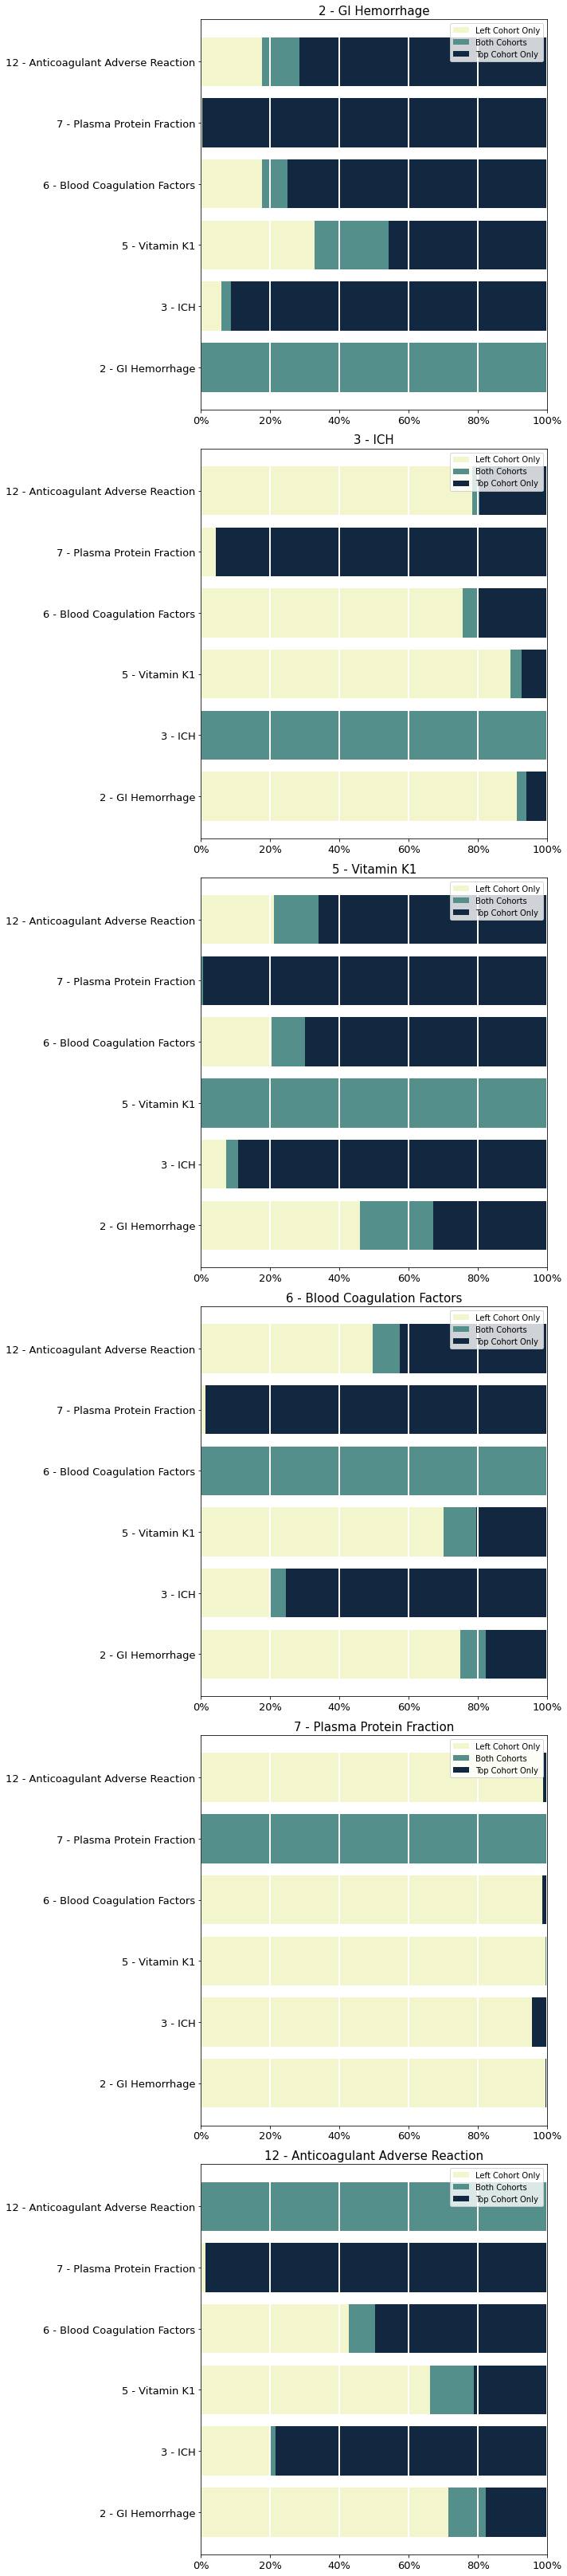

In [135]:
# Condition 1
fig, axes = plt.subplots(len(cond),1, figsize = (10,45))

for i in range(len(cond)):
    top_list, left_list, both_list = [], [], []
    for j in range(len(cond)):
        x_y = list(temps[i]['person_id'].isin(temps[j]['person_id']).value_counts())
        y_x = list(temps[j]['person_id'].isin(temps[i]['person_id']).value_counts())

        total = sum(set(x_y + y_x))
        if len(set(x_y).intersection(y_x)) != 0:
            both = set(x_y).intersection(y_x).pop()
            x_y.remove(both)
            y_x.remove(both)
        else:
            both = 0
        both = round(both/total*100,2)
        top = 0.00 if len(x_y) == 0 else round(x_y[0]/total*100,2)
        left = 0.00 if len(y_x) == 0 else round(y_x[0]/total*100,2)

        top_list.append(top)
        left_list.append(left)
        both_list.append(both)
    
    left_both = np.add(left_list, both_list).tolist()
    
    # Left Cohort
    axes[i].barh(cond, left_list, color='#F3F6CC')
    
    # Both Cohort
    axes[i].barh(cond, both_list, left=left_list, color='#558F8B')
    
    # Top Co
    axes[i].barh(cond, top_list, left=left_both, color='#122740')
    
    axes[i].grid(True, axis='x', linewidth=2, color='white')
    axes[i].set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    axes[i].tick_params('y', labelsize= 13)
    axes[i].set_title(cond[i], fontsize= 15)
    axes[i].tick_params('x', labelsize = 13)
    axes[i].legend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', 
                   fontsize = 'medium')
    #plt.figlegend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', 
    #fontsize = 'xx-large')
    
#fig.suptitle('Cohort Overlap', fontsize=30, verticalalignment='top')    
fig.tight_layout()
plt.show()

### Plots - Individual

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


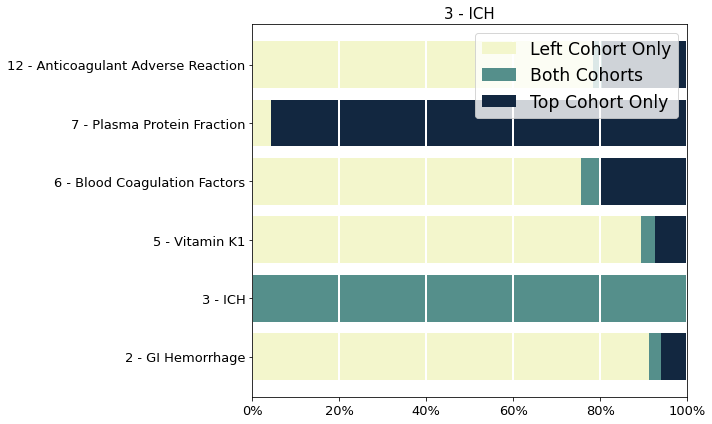

In [136]:
# Condition 2
fig, axes = plt.subplots(1,1, figsize = (10,6))

for i in range(1,2):
    top_list, left_list, both_list = [], [], []
    for j in range(len(cond)):
        x_y = list(temps[i]['person_id'].isin(temps[j]['person_id']).value_counts())
        y_x = list(temps[j]['person_id'].isin(temps[i]['person_id']).value_counts())

        total = sum(set(x_y + y_x))
        if len(set(x_y).intersection(y_x)) != 0:
            both = set(x_y).intersection(y_x).pop()
            x_y.remove(both)
            y_x.remove(both)
        else:
            both = 0
        both = round(both/total*100,2)
        top = 0.00 if len(x_y) == 0 else round(x_y[0]/total*100,2)
        left = 0.00 if len(y_x) == 0 else round(y_x[0]/total*100,2)

        top_list.append(top)
        left_list.append(left)
        both_list.append(both)
    
    left_both = np.add(left_list, both_list).tolist()
    
    # Left Cohort
    axes.barh(cond, left_list, color='#F3F6CC')
    
    # Both Cohort
    axes.barh(cond, both_list, left=left_list, color='#558F8B')
    
    # Top Co
    axes.barh(cond, top_list, left=left_both, color='#122740')
    
    axes.grid(True, axis='x', linewidth=2, color='white')
    axes.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    axes.tick_params('y', labelsize=13)
    axes.set_title(cond[i], fontsize=15)
    axes.tick_params('x', labelsize = 13)
    axes.legend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', fontsize = 'xx-large')
    #plt.figlegend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', fontsize = 'xx-large')
    
#fig.suptitle('Cohort Overlap', fontsize=30, verticalalignment='top')    
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


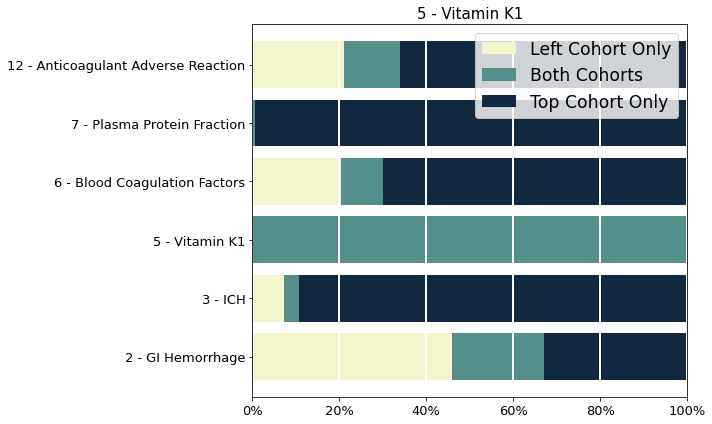

In [137]:
# Condition 3
fig, axes = plt.subplots(1,1, figsize = (10,6))

for i in range(2,3):
    top_list, left_list, both_list = [], [], []
    for j in range(len(cond)):
        x_y = list(temps[i]['person_id'].isin(temps[j]['person_id']).value_counts())
        y_x = list(temps[j]['person_id'].isin(temps[i]['person_id']).value_counts())

        total = sum(set(x_y + y_x))
        if len(set(x_y).intersection(y_x)) != 0:
            both = set(x_y).intersection(y_x).pop()
            x_y.remove(both)
            y_x.remove(both)
        else:
            both = 0
        both = round(both/total*100,2)
        top = 0.00 if len(x_y) == 0 else round(x_y[0]/total*100,2)
        left = 0.00 if len(y_x) == 0 else round(y_x[0]/total*100,2)

        top_list.append(top)
        left_list.append(left)
        both_list.append(both)
    
    left_both = np.add(left_list, both_list).tolist()
    
    # Left Cohort
    axes.barh(cond, left_list, color='#F3F6CC')
    
    # Both Cohort
    axes.barh(cond, both_list, left=left_list, color='#558F8B')
    
    # Top Co
    axes.barh(cond, top_list, left=left_both, color='#122740')
    
    axes.grid(True, axis='x', linewidth=2, color='white')
    axes.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    axes.tick_params('y', labelsize=13)
    axes.set_title(cond[i], fontsize=15)
    axes.tick_params('x', labelsize = 13)
    axes.legend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', fontsize = 'xx-large')
    #plt.figlegend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', fontsize = 'xx-large')
    
#fig.suptitle('Cohort Overlap', fontsize=30, verticalalignment='top')    
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


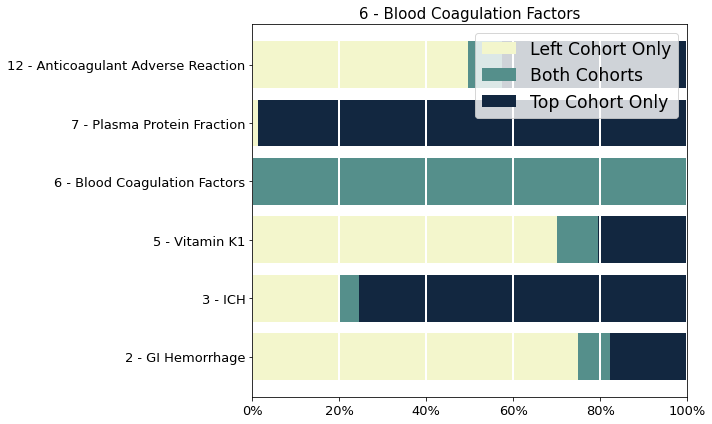

In [138]:
# Condition 4
fig, axes = plt.subplots(1,1, figsize = (10,6))

for i in range(3,4):
    top_list, left_list, both_list = [], [], []
    for j in range(len(cond)):
        x_y = list(temps[i]['person_id'].isin(temps[j]['person_id']).value_counts())
        y_x = list(temps[j]['person_id'].isin(temps[i]['person_id']).value_counts())

        total = sum(set(x_y + y_x))
        if len(set(x_y).intersection(y_x)) != 0:
            both = set(x_y).intersection(y_x).pop()
            x_y.remove(both)
            y_x.remove(both)
        else:
            both = 0
        both = round(both/total*100,2)
        top = 0.00 if len(x_y) == 0 else round(x_y[0]/total*100,2)
        left = 0.00 if len(y_x) == 0 else round(y_x[0]/total*100,2)

        top_list.append(top)
        left_list.append(left)
        both_list.append(both)
    
    left_both = np.add(left_list, both_list).tolist()
    
    # Left Cohort
    axes.barh(cond, left_list, color='#F3F6CC')
    
    # Both Cohort
    axes.barh(cond, both_list, left=left_list, color='#558F8B')
    
    # Top Co
    axes.barh(cond, top_list, left=left_both, color='#122740')
    
    axes.grid(True, axis='x', linewidth=2, color='white')
    axes.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    axes.tick_params('y', labelsize=13)
    axes.set_title(cond[i], fontsize=15)
    axes.tick_params('x', labelsize = 13)
    axes.legend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', fontsize = 'xx-large')
    #plt.figlegend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', fontsize = 'xx-large')
    
#fig.suptitle('Cohort Overlap', fontsize=30, verticalalignment='top')    
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


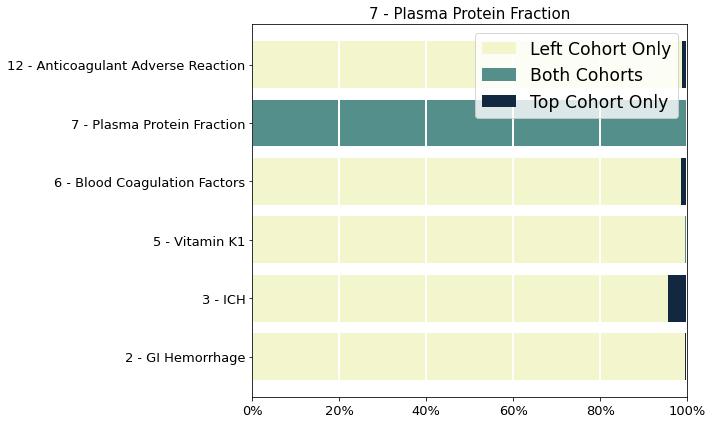

In [139]:
# Condition 5
fig, axes = plt.subplots(1,1, figsize = (10,6))

for i in range(4,5):
    top_list, left_list, both_list = [], [], []
    for j in range(len(cond)):
        x_y = list(temps[i]['person_id'].isin(temps[j]['person_id']).value_counts())
        y_x = list(temps[j]['person_id'].isin(temps[i]['person_id']).value_counts())

        total = sum(set(x_y + y_x))
        if len(set(x_y).intersection(y_x)) != 0:
            both = set(x_y).intersection(y_x).pop()
            x_y.remove(both)
            y_x.remove(both)
        else:
            both = 0
        both = round(both/total*100,2)
        top = 0.00 if len(x_y) == 0 else round(x_y[0]/total*100,2)
        left = 0.00 if len(y_x) == 0 else round(y_x[0]/total*100,2)

        top_list.append(top)
        left_list.append(left)
        both_list.append(both)
    
    left_both = np.add(left_list, both_list).tolist()
    
    # Left Cohort
    axes.barh(cond, left_list, color='#F3F6CC')
    
    # Both Cohort
    axes.barh(cond, both_list, left=left_list, color='#558F8B')
    
    # Top Co
    axes.barh(cond, top_list, left=left_both, color='#122740')
    
    axes.grid(True, axis='x', linewidth=2, color='white')
    axes.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    axes.tick_params('y', labelsize=13)
    axes.set_title(cond[i], fontsize=15)
    axes.tick_params('x', labelsize = 13)
    axes.legend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', fontsize = 'xx-large')
    #plt.figlegend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', fontsize = 'xx-large')
    
#fig.suptitle('Cohort Overlap', fontsize=30, verticalalignment='top')    
fig.tight_layout()
plt.show()

#### Condition 5 vs Condition2

In [140]:
overlap_df2 = overlap_df2.reset_index()
cond2short = overlap_df2[["person_id", "index_date", "condition_start_date"]]

In [141]:
overlap_df5 = overlap_df5.reset_index()
cond5short = overlap_df5[["person_id", "index_date", "drug_exposure_date"]]

In [142]:
x = pd.merge(cond2short, cond5short, on = "person_id")

In [143]:
x.columns = ["person_id", "GI-Hem Index Date", "GI-Hem Cond Start Date", "Vit-K1 Index Date", "Vit-K1 Cond Start Date"]

In [144]:
create_download_link(x, 'cond2Vscond5', 'cond2Vscond5.csv')

In [145]:
x["tlf"] = x["GI-Hem Cond Start Date"] < x["Vit-K1 Cond Start Date"]

In [146]:
x["flt"] =x["Vit-K1 Cond Start Date"] < x["GI-Hem Cond Start Date"]

In [147]:
x["fet"] =x["Vit-K1 Cond Start Date"] == x["GI-Hem Cond Start Date"]

In [148]:
x

person_id GI-Hem Index Date GI-Hem Cond Start Date Vit-K1 Index Date  \
0     1008136        2009-06-12             2018-11-22        2009-06-12   
1     1016334        2003-08-01             2006-06-30        2003-08-01   
2     1026794        2003-04-03             2005-10-23        2003-04-03   
3     1033996        2019-01-17             2019-01-30        2019-01-17   
4     1057622        2011-02-10             2013-01-20        2011-02-10   
..        ...               ...                    ...               ...   
70    3309755        2012-10-28             2014-04-25        2012-10-28   
71    3316441        2007-02-11             2007-12-12        2007-02-11   
72    3348838        2007-07-09             2015-03-12        2007-07-09   
73    3384959        2014-09-09             2014-12-01        2014-09-09   
74    3400375        2012-04-23             2012-08-01        2012-04-23   

   Vit-K1 Cond Start Date    tlf    flt    fet  
0              2018-11-22  False  False   True  
1              2003-12-21  False   True  False  
2              2009-10-20   True  False  False  
3              2019-04-27   True  False  False  
4              2013-01-20  False  False   True  
..                    ...    ...    ...    ...  
70             2012-11-28  False   True  False  
71             2010-08-31   True  False  False  
72             2015-03-12  False  False   True  
73             2017-11-15   True  False  False  
74             2017-02-20   True  False  False  

[75 rows x 8 columns]

In [149]:
a = x.tlf.value_counts()

In [150]:
a[0]

39

In [151]:
b = x.flt.value_counts()

In [152]:
c = x.fet.value_counts()

In [153]:
yearDiff = pd.DataFrame()

In [154]:
dt = {
    "ConditionComparison" : ["GI-Hem < Vit-K1", "GI-Hem > Vit-K1", "GI-Hem = Vit-K1"],
"F" : [a[0],b[0],c[0]],
"T" : [a[1],b[1],c[1]] 
}


In [155]:
yearDiff = pd.DataFrame(dt)

In [156]:
yearDiff = yearDiff.set_index("ConditionComparison")

<AxesSubplot:ylabel='ConditionComparison'>

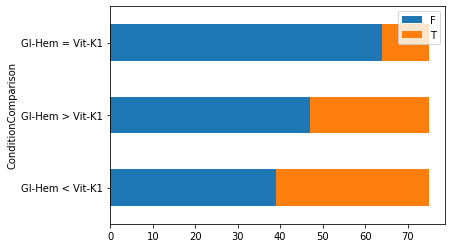

In [157]:
yearDiff.plot.barh(stacked = True)

In [158]:
yearDiff

F   T
ConditionComparison        
GI-Hem < Vit-K1      39  36
GI-Hem > Vit-K1      47  28
GI-Hem = Vit-K1      64  11

### Age Distr

In [159]:
age_condition1 = overlap_df2.reset_index()
age_condition1['age'] = pd.DatetimeIndex(age_condition1.condition_start_date).year - age_condition1.year_of_birth
age_condition1['condition'] = 'GI Hemorrhage'
age_condition1 = age_condition1[['age', 'condition']]

In [160]:
age_condition2 = overlap_df3.reset_index()
age_condition2['age'] = pd.DatetimeIndex(age_condition2.condition_start_date).year - age_condition2.year_of_birth
age_condition2['condition'] = 'ICH'
age_condition2 = age_condition2[['age', 'condition']]

In [161]:
overlap_df5.columns

Index(['person_id', 'drug_name', 'before_visit_start_date', 'index_date',
       'last_dispensed', 'last_days_supply', 'follow_up_end_date',
       'follow_up_period', 'visit_after', 'avg_days_bw_records',
       'dispensed_count', 'avg_days_supply', 'gender_concept_id',
       'year_of_birth', 'month_of_birth', 'day_of_birth', 'birth_datetime',
       'race_concept_id', 'ethnicity_concept_id', 'location_id', 'provider_id',
       'care_site_id', 'person_source_value', 'gender_source_value',
       'gender_source_concept_id', 'race_source_value',
       'race_source_concept_id', 'ethnicity_source_value',
       'ethnicity_source_concept_id', 'sex_at_birth_concept_id',
       'sex_at_birth_source_concept_id', 'sex_at_birth_source_value', 'race',
       'gender', 'ethnicity', 'sex_at_birth', 'care_sites', 'sig',
       'verbatim_end_date', 'route_source_value', 'route_concept_id',
       'drug_concept_id', 'drug_exposure_start_datetime',
       'drug_type_concept_id', 'visit_occurrence_i

In [162]:
age_condition3 = overlap_df5.reset_index()
age_condition3['age'] = pd.DatetimeIndex(age_condition3.drug_exposure_date).year - age_condition3.year_of_birth
age_condition3['condition'] = 'Vitamin K1'
age_condition3 = age_condition3[['age', 'condition']]

In [163]:
age_condition4 = overlap_df6.reset_index()
age_condition4['age'] = pd.DatetimeIndex(age_condition4.drug_exposure_date).year - age_condition4.year_of_birth
age_condition4['condition'] = 'Blood Coagulation Factors'
age_condition4 = age_condition4[['age', 'condition']]

In [164]:
age_condition = age_condition1.append(age_condition2, ignore_index = True).append(age_condition3, ignore_index = True).append(age_condition4, ignore_index=True)

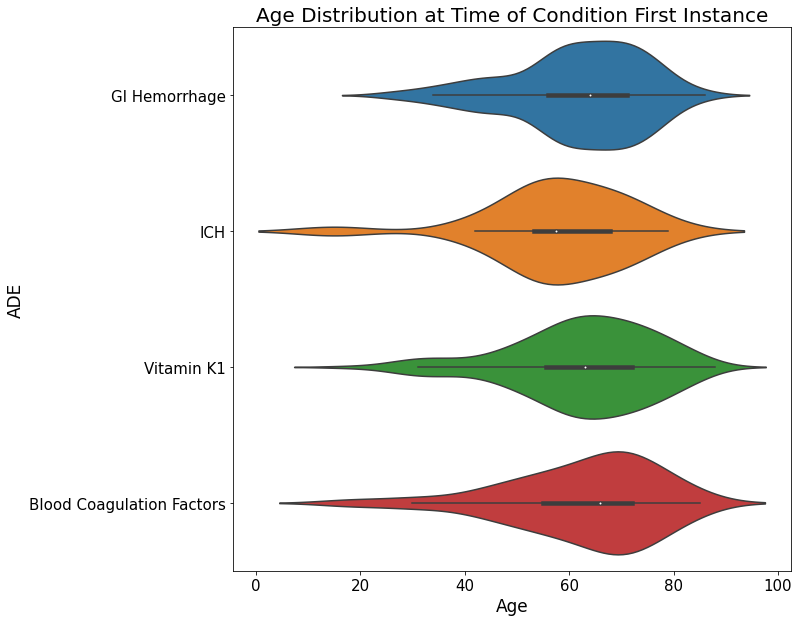

In [165]:
fig,ax = plt.subplots(1,1, figsize = (10,10))
sns.violinplot(x="age", y="condition", data=age_condition)
ax.set_title('Age Distribution at Time of Condition First Instance', fontsize = 20)
ax.set_ylabel('ADE', fontsize = 17)
ax.set_xlabel('Age', fontsize = 17)
ax.tick_params(labelsize = 15)

### Only ER and Inpatient Visit Types

In [167]:
# # Condition 1
# fig, axes = plt.subplots(len(temps_er),1, figsize = (10,45))

# for i in range(len(temps_er)):
#     top_list, left_list, both_list = [], [], []
#     for j in range(len(temps_er)):
#         x_y = list(temps_er[i]['person_id'].isin(temps_er[j]['person_id']).value_counts())
#         y_x = list(temps_er[j]['person_id'].isin(temps_er[i]['person_id']).value_counts())
        
#         if len(set(x_y).intersection(y_x)) != 0:
#             both = set(x_y).intersection(y_x).pop()
#             x_y.remove(both)
#             y_x.remove(both)
#         else: 
#             both = 0
#         top = 0.00 if len(x_y) == 0 else x_y[0]
#         left = 0.00 if len(y_x) == 0 else y_x[0]
#         total = both + left + top
        
#         both = round(both/total*100,2)
#         top = round(top/total*100,2)
#         left = round(left/total*100,2)
        
#         top_list.append(top)
#         left_list.append(left)
#         both_list.append(both)
    
#     left_both = np.add(left_list, both_list).tolist()
    
#     # Left Cohort
#     axes[i].barh(cond_er, left_list, color='#F3F6CC')
    
#     # Both Cohort
#     axes[i].barh(cond_er, both_list, left=left_list, color='#558F8B')
    
#     # Top Co
#     axes[i].barh(cond_er, top_list, left=left_both, color='#122740')
    
#     axes[i].grid(True, axis='x', linewidth=2, color='white')
#     axes[i].set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
#     axes[i].tick_params('y', labelsize=13)
#     axes[i].set_title(cond_er[i], fontsize=15)
#     axes[i].tick_params('x', labelsize = 13)
#     axes[i].legend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', 
#                    fontsize = 'xx-large')

#     #fig.suptitle('Cohort Overlap (Inpatient/ER Only)', fontsize=25)
    
# fig.tight_layout()
# plt.show()

### Individual Plots

In [173]:
# # Condition 2
# fig, axes = plt.subplots(1,1, figsize = (10,6))

# for i in range(1,2):
#     top_list, left_list, both_list = [], [], []
#     for j in range(len(cond)):
#         x_y = list(temps_er[i]['person_id'].isin(temps_er[j]['person_id']).value_counts())
#         y_x = list(temps_er[j]['person_id'].isin(temps_er[i]['person_id']).value_counts())
        
#         if len(set(x_y).intersection(y_x)) != 0:
#             both = set(x_y).intersection(y_x).pop()
#             x_y.remove(both)
#             y_x.remove(both)
#         else: 
#             both = 0
#         top = 0.00 if len(x_y) == 0 else x_y[0]
#         left = 0.00 if len(y_x) == 0 else y_x[0]
#         total = both + left + top
        
#         both = round(both/total*100,2)
#         top = round(top/total*100,2)
#         left = round(left/total*100,2)
        
#         top_list.append(top)
#         left_list.append(left)
#         both_list.append(both)
    
#     left_both = np.add(left_list, both_list).tolist()
    
#     # Left Cohort
#     axes.barh(cond, left_list, color='#F3F6CC')
    
#     # Both Cohort
#     axes.barh(cond, both_list, left=left_list, color='#558F8B')
    
#     # Top Co
#     axes.barh(cond, top_list, left=left_both, color='#122740')
    
#     axes.grid(True, axis='x', linewidth=2, color='white')
#     axes.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
#     axes.tick_params('y', labelsize=13)
#     axes.set_title(cond[i], fontsize=15)
#     axes.tick_params('x', labelsize = 13)
#     axes.legend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', fontsize = 'xx-large')

#     #fig.suptitle('Cohort Overlap (Inpatient/ER Only)', fontsize=25)
    
# fig.tight_layout()
# plt.show()

In [175]:
# # Condition 3
# fig, axes = plt.subplots(1,1, figsize = (10,6))

# for i in range(2,3):
#     top_list, left_list, both_list = [], [], []
#     for j in range(len(cond)):
#         x_y = list(temps_er[i]['person_id'].isin(temps_er[j]['person_id']).value_counts())
#         y_x = list(temps_er[j]['person_id'].isin(temps_er[i]['person_id']).value_counts())
        
#         if len(set(x_y).intersection(y_x)) != 0:
#             both = set(x_y).intersection(y_x).pop()
#             x_y.remove(both)
#             y_x.remove(both)
#         else: 
#             both = 0
#         top = 0.00 if len(x_y) == 0 else x_y[0]
#         left = 0.00 if len(y_x) == 0 else y_x[0]
#         total = both + left + top
        
#         both = round(both/total*100,2)
#         top = round(top/total*100,2)
#         left = round(left/total*100,2)
        
#         top_list.append(top)
#         left_list.append(left)
#         both_list.append(both)
    
#     left_both = np.add(left_list, both_list).tolist()
    
#     # Left Cohort
#     axes.barh(cond, left_list, color='#F3F6CC')
    
#     # Both Cohort
#     axes.barh(cond, both_list, left=left_list, color='#558F8B')
    
#     # Top Co
#     axes.barh(cond, top_list, left=left_both, color='#122740')
    
#     axes.grid(True, axis='x', linewidth=2, color='white')
#     axes.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
#     axes.tick_params('y', labelsize=13)
#     axes.set_title(cond[i], fontsize=15)
#     axes.tick_params('x', labelsize = 13)
#     axes.legend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', fontsize = 'xx-large')

#     #fig.suptitle('Cohort Overlap (Inpatient/ER Only)', fontsize=25)
    
# fig.tight_layout()
# plt.show()

In [176]:
# # Condition 4
# fig, axes = plt.subplots(1,1, figsize = (10,6))

# for i in range(3,4):
#     top_list, left_list, both_list = [], [], []
#     for j in range(len(cond)):
#         x_y = list(temps_er[i]['person_id'].isin(temps_er[j]['person_id']).value_counts())
#         y_x = list(temps_er[j]['person_id'].isin(temps_er[i]['person_id']).value_counts())
        
#         if len(set(x_y).intersection(y_x)) != 0:
#             both = set(x_y).intersection(y_x).pop()
#             x_y.remove(both)
#             y_x.remove(both)
#         else: 
#             both = 0
#         top = 0.00 if len(x_y) == 0 else x_y[0]
#         left = 0.00 if len(y_x) == 0 else y_x[0]
#         total = both + left + top
        
#         both = round(both/total*100,2)
#         top = round(top/total*100,2)
#         left = round(left/total*100,2)
        
#         top_list.append(top)
#         left_list.append(left)
#         both_list.append(both)
    
#     left_both = np.add(left_list, both_list).tolist()
    
#     # Left Cohort
#     axes.barh(cond, left_list, color='#F3F6CC')
    
#     # Both Cohort
#     axes.barh(cond, both_list, left=left_list, color='#558F8B')
    
#     # Top Co
#     axes.barh(cond, top_list, left=left_both, color='#122740')
    
#     axes.grid(True, axis='x', linewidth=2, color='white')
#     axes.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
#     axes.tick_params('y', labelsize=13)
#     axes.set_title(cond[i], fontsize=15)
#     axes.tick_params('x', labelsize = 13)
#     axes.legend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', fontsize = 'xx-large')

#     #fig.suptitle('Cohort Overlap (Inpatient/ER Only)', fontsize=25)
    
# fig.tight_layout()
# plt.show()

In [177]:
# # Condition 5
# fig, axes = plt.subplots(1,1, figsize = (10,6))

# for i in range(4,5):
#     top_list, left_list, both_list = [], [], []
#     for j in range(len(cond)):
#         x_y = list(temps_er[i]['person_id'].isin(temps_er[j]['person_id']).value_counts())
#         y_x = list(temps_er[j]['person_id'].isin(temps_er[i]['person_id']).value_counts())
        
#         if len(set(x_y).intersection(y_x)) != 0:
#             both = set(x_y).intersection(y_x).pop()
#             x_y.remove(both)
#             y_x.remove(both)
#         else: 
#             both = 0
#         top = 0.00 if len(x_y) == 0 else x_y[0]
#         left = 0.00 if len(y_x) == 0 else y_x[0]
#         total = both + left + top
        
#         both = round(both/total*100,2)
#         top = round(top/total*100,2)
#         left = round(left/total*100,2)
        
#         top_list.append(top)
#         left_list.append(left)
#         both_list.append(both)
    
#     left_both = np.add(left_list, both_list).tolist()
    
#     # Left Cohort
#     axes.barh(cond, left_list, color='#F3F6CC')
    
#     # Both Cohort
#     axes.barh(cond, both_list, left=left_list, color='#558F8B')
    
#     # Top Co
#     axes.barh(cond, top_list, left=left_both, color='#122740')
    
#     axes.grid(True, axis='x', linewidth=2, color='white')
#     axes.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
#     axes.tick_params('y', labelsize=13)
#     axes.set_title(cond[i], fontsize=15)
#     axes.tick_params('x', labelsize = 13)
#     axes.legend(['Left Cohort Only', 'Both Cohorts', 'Top Cohort Only'], loc = 'upper right', fontsize = 'xx-large')

#     #fig.suptitle('Cohort Overlap (Inpatient/ER Only)', fontsize=25)
    
# fig.tight_layout()
# plt.show()

In [ ]:
# l = []
# for i in range(len(cond)):
    
#     for j in range(len(cond)):
#         x_y = list(temps[i]['person_id'].isin(temps[j]['person_id']).value_counts())
#         y_x = list(temps[j]['person_id'].isin(temps[i]['person_id']).value_counts())

#         total = sum(set(x_y + y_x))
#         if len(set(x_y).intersection(y_x)) != 0:
#             both = set(x_y).intersection(y_x).pop()
#             x_y.remove(both)
#             y_x.remove(both)
#         else:
#             both = 0
#         both_count = both
#         top_count = 0 if len(x_y) == 0 else x_y[0]
#         left_count = 0 if len(y_x) == 0 else y_x[0]
#         both = round(both/total*100,2)
#         top = 0.00 if len(x_y) == 0 else round(x_y[0]/total*100,2)
#         left = 0.00 if len(y_x) == 0 else round(y_x[0]/total*100,2)
        
#         l.append({'Top Cohort': cond[i], 'Left Cohort': cond[j], 'count': top_count, 'percent': top, 'label': 'Top Cohort Only'})
#         l.append({'Top Cohort': cond[i], 'Left Cohort': cond[j], 'count': both_count, 'percent': both, 'label': 'Both Cohorts'})
#         l.append({'Top Cohort': cond[i], 'Left Cohort': cond[j], 'count': left_count, 'percent': left, 'label': 'Left Cohort Only'})

In [ ]:
# cohort_overlap = pd.DataFrame(l)
# create_download_link(cohort_overlap, "Download cohort_overlap CSV", "cohort_overlap.csv")

In [ ]:
# l_er = []
# for i in range(len(cond)):

#     for j in range(len(cond)):
#         x_y = list(temps_er[i]['person_id'].isin(temps_er[j]['person_id']).value_counts())
#         y_x = list(temps_er[j]['person_id'].isin(temps_er[i]['person_id']).value_counts())
        
#         if len(set(x_y).intersection(y_x)) != 0:
#             both = set(x_y).intersection(y_x).pop()
#             x_y.remove(both)
#             y_x.remove(both)
#         else: 
#             both = 0
        
#         both_count = both
#         top_count = 0.00 if len(x_y) == 0 else x_y[0]
#         left_count = 0.00 if len(y_x) == 0 else y_x[0]
#         total = both + left + top
        
#         both = round(both/total*100,2)
#         top = round(top_count/total*100,2)
#         left = round(left_count/total*100,2)
        
#         l_er.append({'Top Cohort': cond[i], 'Left Cohort': cond[j], 'count': top_count, 'percent': top, 'label': 'Top Cohort Only'})
#         l_er.append({'Top Cohort': cond[i], 'Left Cohort': cond[j], 'count': both_count, 'percent': both, 'label': 'Both Cohorts'})
#         l_er.append({'Top Cohort': cond[i], 'Left Cohort': cond[j], 'count': left_count, 'percent': left, 'label': 'Left Cohort Only'})

In [ ]:
# cohort_overlap_er = pd.DataFrame(l_er)
# create_download_link(cohort_overlap_er, "Download cohort_overlap_er CSV", "cohort_overlap_er.csv")

## Multidimensional Plots

### Condition 2 - GI Hemorrhage
**Race, Sex, Age and Dispension Count Distribution by ADE Classification**

In [178]:
ade2_min = overlap_df2.reset_index()[overlap_df2.reset_index().columns[:39]]
warfarin['ADE_Classification'] = pd.Series(['No']*warfarin.shape[0])
ade2_min['ADE_Classification'] = pd.Series(['Yes']*overlap_df2.shape[0])


In [179]:
warf_ade = pd.concat([warfarin, ade2_min], ignore_index=True).groupby(
    'person_id', as_index = False).apply(lambda x: x.sort_values(
    'ADE_Classification', ascending = False).head(1)).reset_index(drop = True)

In [180]:
race_dic = {'Another single population': 'Other',
            'I prefer not to answer': 'Unknown',
            'No matching concept': 'Unknown',
            'None of these': 'Other',
            'None Indicated': 'Unknown',
            'PMI: Skip' : 'Unknown',
            'More than one population': 'Other'}
warf_ade.race = warf_ade.race.replace(race_dic)
race_grp = warf_ade.groupby(['race', 'ADE_Classification']).count().reset_index()[[
    'race', 'ADE_Classification', 'person_id']]
race_grp = race_grp.append({'race': 'Asian', 'ADE_Classification': 'Yes', 'person_id': 0}, ignore_index=True)
race_grp.sort_values('race', inplace = True)

race_tot = race_grp.groupby('race').sum('person_id').reset_index()['person_id'].tolist()

len(race_tot)
race_dbl = [0]*len(race_tot)*2
for i in range(len(race_dbl)):
    race_dbl[i] = race_tot[i//2]
    
race_grp['total'] = race_dbl
race_grp['percentage'] = 100*race_grp['person_id']/race_grp['total']
race_grp

race ADE_Classification  person_id  total  percentage
0                      Asian                 No          5      5  100.000000
9                      Asian                Yes          0      5    0.000000
1  Black or African American                 No        252    300   84.000000
2  Black or African American                Yes         48    300   16.000000
3                      Other                 No         40     48   83.333333
4                      Other                Yes          8     48   16.666667
5                    Unknown                 No         85     96   88.541667
6                    Unknown                Yes         11     96   11.458333
7                      White                 No       1275   1445   88.235294
8                      White                Yes        170   1445   11.764706

In [181]:
sex_dic = {'Not male, not female, prefer not to answer, or skipped': 'Other',
           'No matching concept': 'Other'}
warf_ade.sex_at_birth = warf_ade.sex_at_birth.replace(sex_dic)
sex_grp = warf_ade.groupby(['sex_at_birth', 'ADE_Classification']).count().reset_index()[[
    'sex_at_birth', 'ADE_Classification', 'person_id']]
sex_tot = sex_grp.groupby('sex_at_birth').sum('person_id').reset_index()['person_id'].tolist()

len(sex_tot)
sex_dbl = [0]*len(sex_tot)*2
for i in range(len(sex_dbl)):
    sex_dbl[i] = sex_tot[i//2]

sex_grp['total'] = sex_dbl
sex_grp['percentage'] = 100*sex_grp['person_id']/sex_grp['total']
sex_grp

sex_at_birth ADE_Classification  person_id  total  percentage
0       Female                 No        816    933   87.459807
1       Female                Yes        117    933   12.540193
2         Male                 No        811    926   87.580994
3         Male                Yes        115    926   12.419006
4        Other                 No         30     35   85.714286
5        Other                Yes          5     35   14.285714

In [182]:
warf_ade['age'] = pd.DatetimeIndex(warf_ade.index_date).year - warf_ade.year_of_birth
age_grp = warf_ade[['age', 'ADE_Classification']]

In [183]:
warf_ade.dispensed_count

0       82
1       81
2        9
3        2
4       33
        ..
1889    53
1890    88
1891     1
1892    27
1893    35
Name: dispensed_count, Length: 1894, dtype: int64

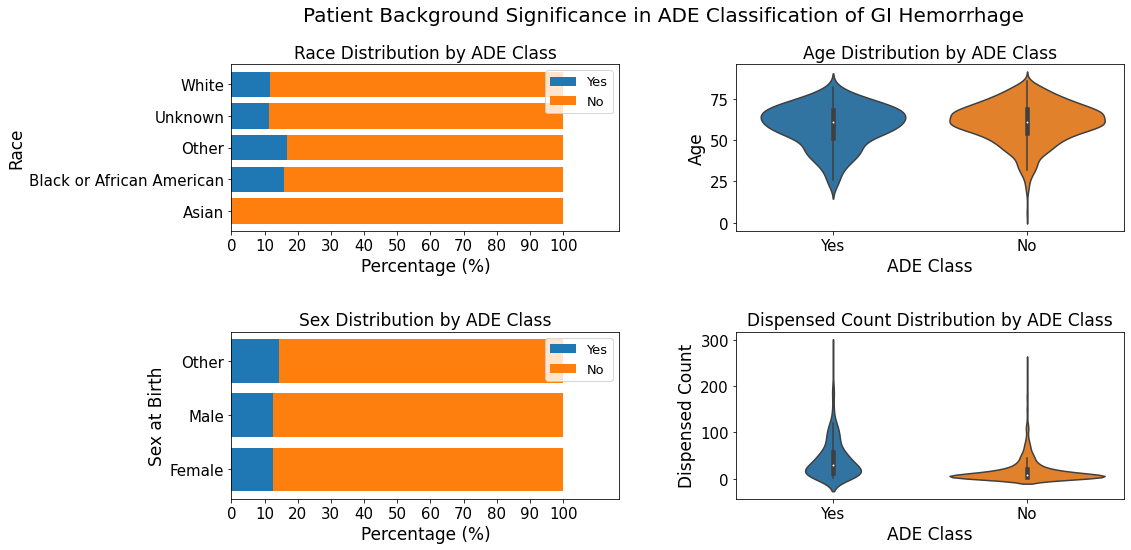

In [184]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))
fig.suptitle('Patient Background Significance in ADE Classification of GI Hemorrhage', fontsize = 20)
fig.subplots_adjust(hspace=0.6, wspace = 0.3)

# race
axes[0,0].barh(race_grp['race'].drop_duplicates().tolist(), 
               race_grp[race_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
              label = 'Yes')
axes[0,0].barh(race_grp['race'].drop_duplicates().tolist(), 
               race_grp[race_grp['ADE_Classification'] == 'No']['percentage'].tolist(), 
               left = race_grp[race_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
              label = 'No')
axes[0, 0].set_title('Race Distribution by ADE Class', fontsize = 17)
axes[0, 0].set_xlabel('Percentage (%)', fontsize = 17)
axes[0, 0].set_ylabel('Race', fontsize = 17)
axes[0, 0].tick_params(labelsize = 15)
axes[0, 0].set_xticks(range(0,110,10))
axes[0, 0].set_xlim(0,117)
axes[0, 0].legend(fontsize=13) 

# sex
axes[1, 0].barh(sex_grp['sex_at_birth'].drop_duplicates().tolist(), 
               sex_grp[sex_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
               label = 'Yes')
axes[1, 0].barh(sex_grp['sex_at_birth'].drop_duplicates().tolist(), 
               sex_grp[sex_grp['ADE_Classification'] == 'No']['percentage'].tolist(), 
               left = sex_grp[sex_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
               label = 'No')
axes[1, 0].set_title('Sex Distribution by ADE Class', fontsize = 17)
axes[1, 0].set_xlabel('Percentage (%)', fontsize = 17)
axes[1, 0].set_ylabel('Sex at Birth', fontsize = 17)
axes[1, 0].tick_params(labelsize = 15)
axes[1, 0].set_xlim(0,117)
axes[1, 0].set_xticks(range(0,110,10))
axes[1, 0].legend(fontsize=13)

# age
sns.violinplot(ax = axes[0, 1], x="ADE_Classification", y="age", data=age_grp, order = ['Yes', 'No'])
axes[0, 1].set_title('Age Distribution by ADE Class', fontsize = 17)
axes[0, 1].set_xlabel('ADE Class', fontsize = 17)
axes[0, 1].set_ylabel('Age', fontsize = 17)
axes[0, 1].tick_params(labelsize = 15)

# dispensed amount
sns.violinplot(ax = axes[1, 1], x = 'ADE_Classification', y = 'dispensed_count', 
               data = warf_ade, order = ['Yes', 'No'])
axes[1, 1].set_title('Dispensed Count Distribution by ADE Class', fontsize = 17)
axes[1, 1].set_xlabel('ADE Class', fontsize = 17)
axes[1, 1].set_ylabel('Dispensed Count', fontsize = 17)
axes[1, 1].tick_params(labelsize = 15)
plt.show()

### Condition 5 - Vitamin K1
**Race, Sex, Age and Dispension Count Distribution by ADE Classification**

In [185]:
ade5_min = overlap_df5.reset_index()[overlap_df5.reset_index().columns[:39]]
warfarin['ADE_Classification'] = pd.Series(['No']*warfarin.shape[0])
ade5_min['ADE_Classification'] = pd.Series(['Yes']*overlap_df5.shape[0])

In [186]:
warf_ade = pd.concat([warfarin, ade5_min], ignore_index=True).groupby(
    'person_id', as_index = False).apply(lambda x: x.sort_values(
    'ADE_Classification', ascending = False).head(1)).reset_index(drop = True)

In [187]:
race_dic = {'Another single population': 'Other',
            'I prefer not to answer': 'Unknown',
            'No matching concept': 'Unknown',
            'None of these': 'Other',
            'None Indicated': 'Unknown',
            'PMI: Skip' : 'Unknown',
            'More than one population': 'Other'}
warf_ade.race = warf_ade.race.replace(race_dic)
race_grp = warf_ade.groupby(['race', 'ADE_Classification']).count().reset_index()[[
    'race', 'ADE_Classification', 'person_id']]
race_grp = race_grp.append({'race': 'Asian', 'ADE_Classification': 'Yes', 'person_id': 0}, ignore_index=True)
race_grp.sort_values('race', inplace = True)

race_tot = race_grp.groupby('race').sum('person_id').reset_index()['person_id'].tolist()

len(race_tot)
race_dbl = [0]*len(race_tot)*2
for i in range(len(race_dbl)):
    race_dbl[i] = race_tot[i//2]
    
race_grp['total'] = race_dbl
race_grp['percentage'] = 100*race_grp['person_id']/race_grp['total']
race_grp

race ADE_Classification  person_id  total  percentage
0                      Asian                 No          5      5  100.000000
9                      Asian                Yes          0      5    0.000000
1  Black or African American                 No        268    300   89.333333
2  Black or African American                Yes         32    300   10.666667
3                      Other                 No         43     48   89.583333
4                      Other                Yes          5     48   10.416667
5                    Unknown                 No         82     96   85.416667
6                    Unknown                Yes         14     96   14.583333
7                      White                 No       1305   1445   90.311419
8                      White                Yes        140   1445    9.688581

In [188]:
sex_dic = {'Not male, not female, prefer not to answer, or skipped': 'Other',
           'No matching concept': 'Other'}
warf_ade.sex_at_birth = warf_ade.sex_at_birth.replace(sex_dic)
sex_grp = warf_ade.groupby(['sex_at_birth', 'ADE_Classification']).count().reset_index()[[
    'sex_at_birth', 'ADE_Classification', 'person_id']]
sex_tot = sex_grp.groupby('sex_at_birth').sum('person_id').reset_index()['person_id'].tolist()

len(sex_tot)
sex_dbl = [0]*len(sex_tot)*2
for i in range(len(sex_dbl)):
    sex_dbl[i] = sex_tot[i//2]

sex_grp['total'] = sex_dbl
sex_grp['percentage'] = 100*sex_grp['person_id']/sex_grp['total']
sex_grp

sex_at_birth ADE_Classification  person_id  total  percentage
0       Female                 No        852    933   91.318328
1       Female                Yes         81    933    8.681672
2         Male                 No        818    926   88.336933
3         Male                Yes        108    926   11.663067
4        Other                 No         33     35   94.285714
5        Other                Yes          2     35    5.714286

In [189]:
warf_ade['age'] = pd.DatetimeIndex(warf_ade.index_date).year - warf_ade.year_of_birth
age_grp = warf_ade[['age', 'ADE_Classification']]

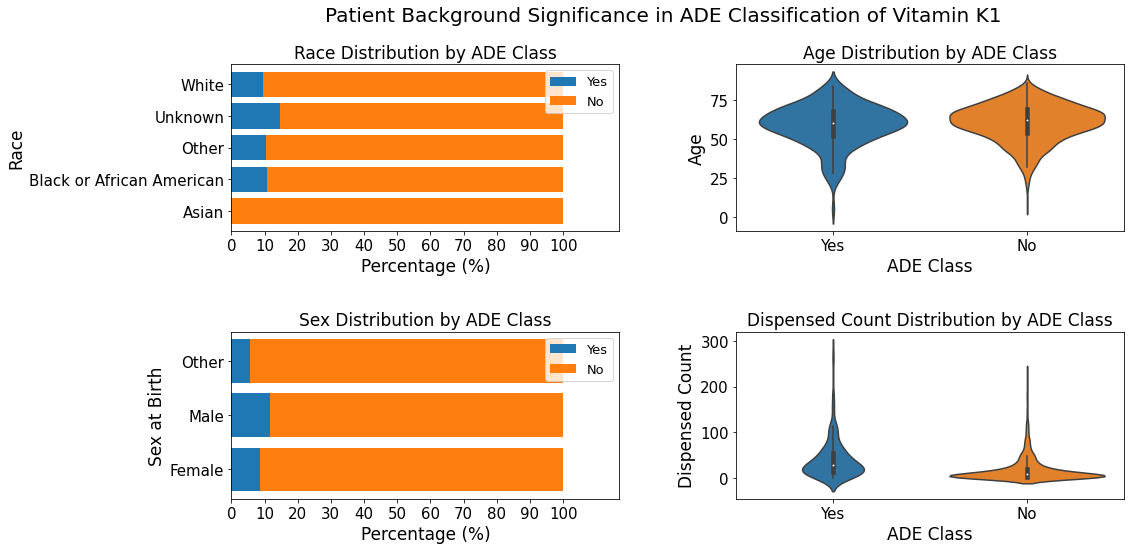

In [190]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))
fig.suptitle('Patient Background Significance in ADE Classification of Vitamin K1', fontsize = 20)
fig.subplots_adjust(hspace=0.6, wspace = 0.3)

# race
axes[0,0].barh(race_grp['race'].drop_duplicates().tolist(), 
               race_grp[race_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
              label = 'Yes')
axes[0,0].barh(race_grp['race'].drop_duplicates().tolist(), 
               race_grp[race_grp['ADE_Classification'] == 'No']['percentage'].tolist(), 
               left = race_grp[race_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
              label = 'No')
axes[0, 0].set_title('Race Distribution by ADE Class', fontsize = 17)
axes[0, 0].set_xlabel('Percentage (%)', fontsize = 17)
axes[0, 0].set_ylabel('Race', fontsize = 17)
axes[0, 0].tick_params(labelsize = 15)
axes[0, 0].set_xticks(range(0,110,10))
axes[0, 0].set_xlim(0,117)
axes[0, 0].legend(fontsize=13) 

# sex
axes[1, 0].barh(sex_grp['sex_at_birth'].drop_duplicates().tolist(), 
               sex_grp[sex_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
               label = 'Yes')
axes[1, 0].barh(sex_grp['sex_at_birth'].drop_duplicates().tolist(), 
               sex_grp[sex_grp['ADE_Classification'] == 'No']['percentage'].tolist(), 
               left = sex_grp[sex_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
               label = 'No')
axes[1, 0].set_title('Sex Distribution by ADE Class', fontsize = 17)
axes[1, 0].set_xlabel('Percentage (%)', fontsize = 17)
axes[1, 0].set_ylabel('Sex at Birth', fontsize = 17)
axes[1, 0].tick_params(labelsize = 15)
axes[1, 0].set_xlim(0,117)
axes[1, 0].set_xticks(range(0,110,10))
axes[1, 0].legend(fontsize=13)

# age
sns.violinplot(ax = axes[0, 1], x="ADE_Classification", y="age", data=age_grp, order = ['Yes', 'No'])
axes[0, 1].set_title('Age Distribution by ADE Class', fontsize = 17)
axes[0, 1].set_xlabel('ADE Class', fontsize = 17)
axes[0, 1].set_ylabel('Age', fontsize = 17)
axes[0, 1].tick_params(labelsize = 15)

# dispensed amount
sns.violinplot(ax = axes[1, 1], x = 'ADE_Classification', y = 'dispensed_count', 
               data = warf_ade, order = ['Yes', 'No'])
axes[1, 1].set_title('Dispensed Count Distribution by ADE Class', fontsize = 17)
axes[1, 1].set_xlabel('ADE Class', fontsize = 17)
axes[1, 1].set_ylabel('Dispensed Count', fontsize = 17)
axes[1, 1].tick_params(labelsize = 15)
plt.show()

### Condition 6 - Blood Coagulation Factors
**Race, Sex, Age and Dispension Count Distribution by ADE Classification**

In [191]:
ade6_min = overlap_df6.reset_index()[overlap_df6.reset_index().columns[:39]]
warfarin['ADE_Classification'] = pd.Series(['No']*warfarin.shape[0])
ade6_min['ADE_Classification'] = pd.Series(['Yes']*overlap_df6.shape[0])

In [192]:
warf_ade = pd.concat([warfarin, ade6_min], ignore_index=True).groupby(
    'person_id', as_index = False).apply(lambda x: x.sort_values(
    'ADE_Classification', ascending = False).head(1)).reset_index(drop = True)

In [193]:
race_dic = {'Another single population': 'Other',
            'I prefer not to answer': 'Unknown',
            'No matching concept': 'Unknown',
            'None of these': 'Other',
            'None Indicated': 'Unknown',
            'PMI: Skip' : 'Unknown',
            'More than one population': 'Other'}
warf_ade.race = warf_ade.race.replace(race_dic)
race_grp = warf_ade.groupby(['race', 'ADE_Classification']).count().reset_index()[[
    'race', 'ADE_Classification', 'person_id']]
race_grp = race_grp.append({'race': 'Asian', 'ADE_Classification': 'Yes', 'person_id': 0}, ignore_index=True)
race_grp.sort_values('race', inplace = True)

race_tot = race_grp.groupby('race').sum('person_id').reset_index()['person_id'].tolist()

len(race_tot)
race_dbl = [0]*len(race_tot)*2
for i in range(len(race_dbl)):
    race_dbl[i] = race_tot[i//2]
    
race_grp['total'] = race_dbl
race_grp['percentage'] = 100*race_grp['person_id']/race_grp['total']
race_grp

race ADE_Classification  person_id  total  percentage
0                      Asian                 No          5      5  100.000000
9                      Asian                Yes          0      5    0.000000
1  Black or African American                 No        292    300   97.333333
2  Black or African American                Yes          8    300    2.666667
3                      Other                 No         47     48   97.916667
4                      Other                Yes          1     48    2.083333
5                    Unknown                 No         91     96   94.791667
6                    Unknown                Yes          5     96    5.208333
7                      White                 No       1387   1445   95.986159
8                      White                Yes         58   1445    4.013841

In [194]:
sex_dic = {'Not male, not female, prefer not to answer, or skipped': 'Other',
           'No matching concept': 'Other'}
warf_ade.sex_at_birth = warf_ade.sex_at_birth.replace(sex_dic)
sex_grp = warf_ade.groupby(['sex_at_birth', 'ADE_Classification']).count().reset_index()[[
    'sex_at_birth', 'ADE_Classification', 'person_id']]
sex_tot = sex_grp.groupby('sex_at_birth').sum('person_id').reset_index()['person_id'].tolist()

len(sex_tot)
sex_dbl = [0]*len(sex_tot)*2
for i in range(len(sex_dbl)):
    sex_dbl[i] = sex_tot[i//2]

sex_grp['total'] = sex_dbl
sex_grp['percentage'] = 100*sex_grp['person_id']/sex_grp['total']
sex_grp

sex_at_birth ADE_Classification  person_id  total  percentage
0       Female                 No        894    933   95.819936
1       Female                Yes         39    933    4.180064
2         Male                 No        894    926   96.544276
3         Male                Yes         32    926    3.455724
4        Other                 No         34     35   97.142857
5        Other                Yes          1     35    2.857143

In [195]:
warf_ade['age'] = pd.DatetimeIndex(warf_ade.index_date).year - warf_ade.year_of_birth
age_grp = warf_ade[['age', 'ADE_Classification']]

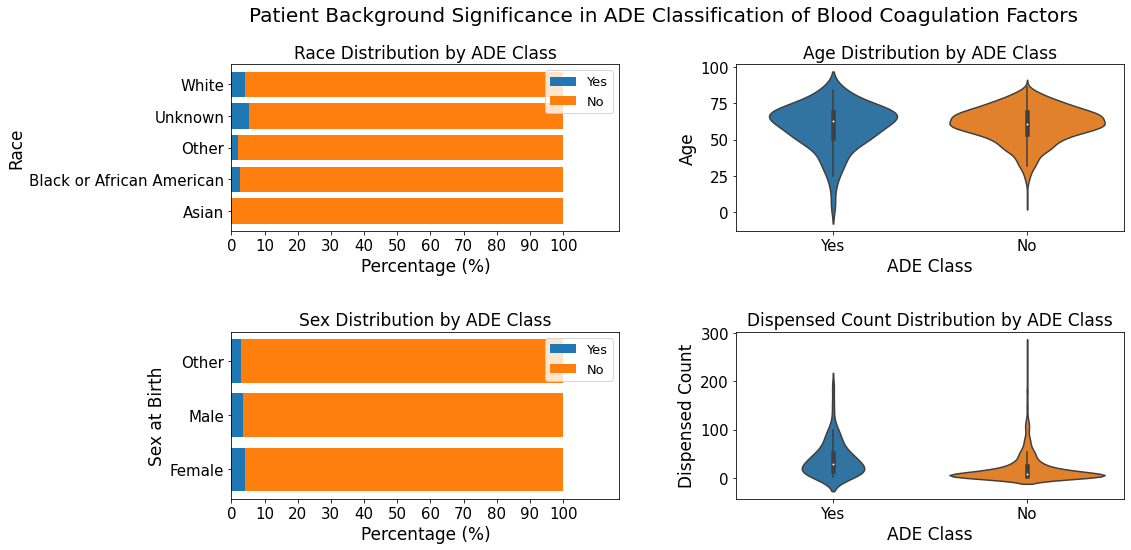

In [196]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))
fig.suptitle('Patient Background Significance in ADE Classification of Blood Coagulation Factors', fontsize = 20)
fig.subplots_adjust(hspace=0.6, wspace = 0.3)

# race
axes[0,0].barh(race_grp['race'].drop_duplicates().tolist(), 
               race_grp[race_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
              label = 'Yes')
axes[0,0].barh(race_grp['race'].drop_duplicates().tolist(), 
               race_grp[race_grp['ADE_Classification'] == 'No']['percentage'].tolist(), 
               left = race_grp[race_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
              label = 'No')
axes[0, 0].set_title('Race Distribution by ADE Class', fontsize = 17)
axes[0, 0].set_xlabel('Percentage (%)', fontsize = 17)
axes[0, 0].set_ylabel('Race', fontsize = 17)
axes[0, 0].tick_params(labelsize = 15)
axes[0, 0].set_xticks(range(0,110,10))
axes[0, 0].set_xlim(0,117)
axes[0, 0].legend(fontsize=13) 

# sex
axes[1, 0].barh(sex_grp['sex_at_birth'].drop_duplicates().tolist(), 
               sex_grp[sex_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
               label = 'Yes')
axes[1, 0].barh(sex_grp['sex_at_birth'].drop_duplicates().tolist(), 
               sex_grp[sex_grp['ADE_Classification'] == 'No']['percentage'].tolist(), 
               left = sex_grp[sex_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
               label = 'No')
axes[1, 0].set_title('Sex Distribution by ADE Class', fontsize = 17)
axes[1, 0].set_xlabel('Percentage (%)', fontsize = 17)
axes[1, 0].set_ylabel('Sex at Birth', fontsize = 17)
axes[1, 0].tick_params(labelsize = 15)
axes[1, 0].set_xlim(0,117)
axes[1, 0].set_xticks(range(0,110,10))
axes[1, 0].legend(fontsize=13)

# age
sns.violinplot(ax = axes[0, 1], x="ADE_Classification", y="age", data=age_grp, order = ['Yes', 'No'])
axes[0, 1].set_title('Age Distribution by ADE Class', fontsize = 17)
axes[0, 1].set_xlabel('ADE Class', fontsize = 17)
axes[0, 1].set_ylabel('Age', fontsize = 17)
axes[0, 1].tick_params(labelsize = 15)

# dispensed amount
sns.violinplot(ax = axes[1, 1], x = 'ADE_Classification', y = 'dispensed_count', 
               data = warf_ade, order = ['Yes', 'No'])
axes[1, 1].set_title('Dispensed Count Distribution by ADE Class', fontsize = 17)
axes[1, 1].set_xlabel('ADE Class', fontsize = 17)
axes[1, 1].set_ylabel('Dispensed Count', fontsize = 17)
axes[1, 1].tick_params(labelsize = 15)
plt.show()

### Condition 12 - Anticoagulant Adverse Reaction
**Race, Sex, Age and Dispension Count Distribution by ADE Classification**

In [197]:
ade12_min = overlap_df12.reset_index()[overlap_df12.reset_index().columns[:39]]
warfarin['ADE_Classification'] = pd.Series(['No']*warfarin.shape[0])
ade12_min['ADE_Classification'] = pd.Series(['Yes']*overlap_df12.shape[0])

In [198]:
warf_ade = pd.concat([warfarin, ade12_min], ignore_index=True).groupby(
    'person_id', as_index = False).apply(lambda x: x.sort_values(
    'ADE_Classification', ascending = False).head(1)).reset_index(drop = True)

In [199]:
race_dic = {'Another single population': 'Other',
            'I prefer not to answer': 'Unknown',
            'No matching concept': 'Unknown',
            'None of these': 'Other',
            'None Indicated': 'Unknown',
            'PMI: Skip' : 'Unknown',
            'More than one population': 'Other'}
warf_ade.race = warf_ade.race.replace(race_dic)
race_grp = warf_ade.groupby(['race', 'ADE_Classification']).count().reset_index()[[
    'race', 'ADE_Classification', 'person_id']]
race_grp = race_grp.append({'race': 'Asian', 'ADE_Classification': 'Yes', 'person_id': 0}, ignore_index=True)
race_grp.sort_values('race', inplace = True)

race_tot = race_grp.groupby('race').sum('person_id').reset_index()['person_id'].tolist()

len(race_tot)
race_dbl = [0]*len(race_tot)*2
for i in range(len(race_dbl)):
    race_dbl[i] = race_tot[i//2]
    
race_grp['total'] = race_dbl
race_grp['percentage'] = 100*race_grp['person_id']/race_grp['total']
race_grp

race ADE_Classification  person_id  total  percentage
0                      Asian                 No          5      5  100.000000
9                      Asian                Yes          0      5    0.000000
1  Black or African American                 No        282    300   94.000000
2  Black or African American                Yes         18    300    6.000000
3                      Other                 No         45     48   93.750000
4                      Other                Yes          3     48    6.250000
5                    Unknown                 No         94     96   97.916667
6                    Unknown                Yes          2     96    2.083333
7                      White                 No       1386   1445   95.916955
8                      White                Yes         59   1445    4.083045

In [200]:
sex_dic = {'Not male, not female, prefer not to answer, or skipped': 'Other',
           'No matching concept': 'Other'}
warf_ade.sex_at_birth = warf_ade.sex_at_birth.replace(sex_dic)
sex_grp = warf_ade.groupby(['sex_at_birth', 'ADE_Classification']).count().reset_index()[[
    'sex_at_birth', 'ADE_Classification', 'person_id']]
sex_tot = sex_grp.groupby('sex_at_birth').sum('person_id').reset_index()['person_id'].tolist()

len(sex_tot)
sex_dbl = [0]*len(sex_tot)*2
for i in range(len(sex_dbl)):
    sex_dbl[i] = sex_tot[i//2]

sex_grp['total'] = sex_dbl
sex_grp['percentage'] = 100*sex_grp['person_id']/sex_grp['total']
sex_grp

sex_at_birth ADE_Classification  person_id  total  percentage
0       Female                 No        891    933   95.498392
1       Female                Yes         42    933    4.501608
2         Male                 No        890    926   96.112311
3         Male                Yes         36    926    3.887689
4        Other                 No         31     35   88.571429
5        Other                Yes          4     35   11.428571

In [201]:
warf_ade['age'] = pd.DatetimeIndex(warf_ade.index_date).year - warf_ade.year_of_birth
age_grp = warf_ade[['age', 'ADE_Classification']]

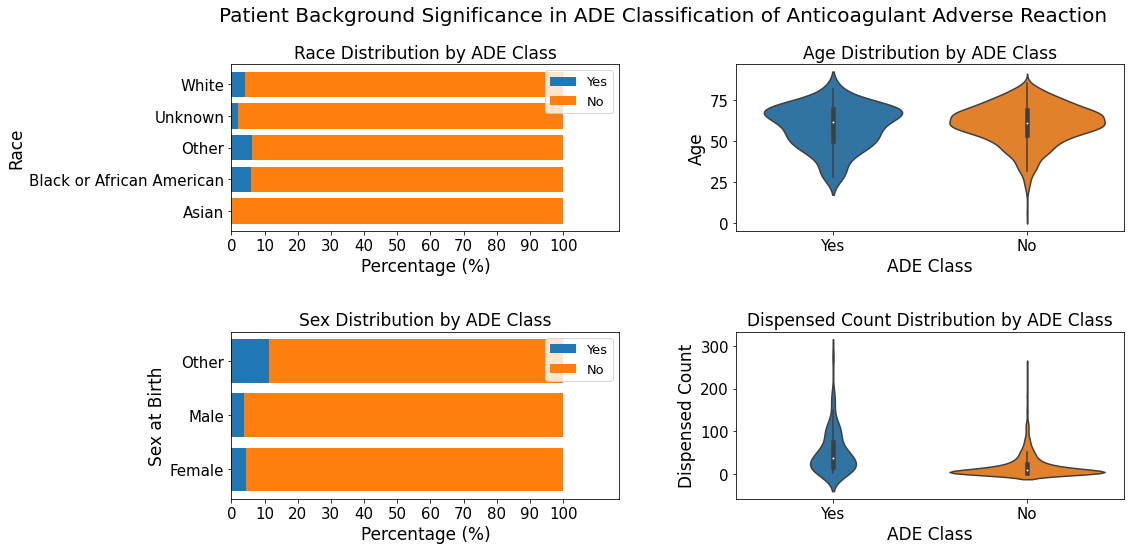

In [202]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))
fig.suptitle('Patient Background Significance in ADE Classification of Anticoagulant Adverse Reaction', 
             fontsize = 20)
fig.subplots_adjust(hspace=0.6, wspace = 0.3)

# race
axes[0,0].barh(race_grp['race'].drop_duplicates().tolist(), 
               race_grp[race_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
              label = 'Yes')
axes[0,0].barh(race_grp['race'].drop_duplicates().tolist(), 
               race_grp[race_grp['ADE_Classification'] == 'No']['percentage'].tolist(), 
               left = race_grp[race_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
              label = 'No')
axes[0, 0].set_title('Race Distribution by ADE Class', fontsize = 17)
axes[0, 0].set_xlabel('Percentage (%)', fontsize = 17)
axes[0, 0].set_ylabel('Race', fontsize = 17)
axes[0, 0].tick_params(labelsize = 15)
axes[0, 0].set_xticks(range(0,110,10))
axes[0, 0].set_xlim(0,117)
axes[0, 0].legend(fontsize=13) 

# sex
axes[1, 0].barh(sex_grp['sex_at_birth'].drop_duplicates().tolist(), 
               sex_grp[sex_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
               label = 'Yes')
axes[1, 0].barh(sex_grp['sex_at_birth'].drop_duplicates().tolist(), 
               sex_grp[sex_grp['ADE_Classification'] == 'No']['percentage'].tolist(), 
               left = sex_grp[sex_grp['ADE_Classification'] == 'Yes']['percentage'].tolist(),
               label = 'No')
axes[1, 0].set_title('Sex Distribution by ADE Class', fontsize = 17)
axes[1, 0].set_xlabel('Percentage (%)', fontsize = 17)
axes[1, 0].set_ylabel('Sex at Birth', fontsize = 17)
axes[1, 0].tick_params(labelsize = 15)
axes[1, 0].set_xlim(0,117)
axes[1, 0].set_xticks(range(0,110,10))
axes[1, 0].legend(fontsize=13)

# age
sns.violinplot(ax = axes[0, 1], x="ADE_Classification", y="age", data=age_grp, order = ['Yes', 'No'])
axes[0, 1].set_title('Age Distribution by ADE Class', fontsize = 17)
axes[0, 1].set_xlabel('ADE Class', fontsize = 17)
axes[0, 1].set_ylabel('Age', fontsize = 17)
axes[0, 1].tick_params(labelsize = 15)

# dispensed amount
sns.violinplot(ax = axes[1, 1], x = 'ADE_Classification', y = 'dispensed_count', 
               data = warf_ade, order = ['Yes', 'No'])
axes[1, 1].set_title('Dispensed Count Distribution by ADE Class', fontsize = 17)
axes[1, 1].set_xlabel('ADE Class', fontsize = 17)
axes[1, 1].set_ylabel('Dispensed Count', fontsize = 17)
axes[1, 1].tick_params(labelsize = 15)
plt.show()

### Chi-Squared p-values

In [203]:
# ade1_min = overlap_df1.reset_index()[overlap_df1.reset_index().columns[:39]]
# warfarin['ADE_Classification'] = pd.Series(['No']*warfarin.shape[0])
# ade1_min['ADE_Classification'] = pd.Series(['Yes']*overlap_df1.shape[0])

ade2_min = overlap_df2.reset_index()[overlap_df2.reset_index().columns[:39]]
warfarin['ADE_Classification'] = pd.Series(['No']*warfarin.shape[0])
ade2_min['ADE_Classification'] = pd.Series(['Yes']*overlap_df2.shape[0])

ade3_min = overlap_df3.reset_index()[overlap_df3.reset_index().columns[:39]]
warfarin['ADE_Classification'] = pd.Series(['No']*warfarin.shape[0])
ade3_min['ADE_Classification'] = pd.Series(['Yes']*overlap_df3.shape[0])

# ade4_min = overlap_df4.reset_index()[overlap_df4.reset_index().columns[:39]]
# warfarin['ADE_Classification'] = pd.Series(['No']*warfarin.shape[0])
# ade4_min['ADE_Classification'] = pd.Series(['Yes']*overlap_df4.shape[0])

ade5_min = overlap_df5.reset_index()[overlap_df5.reset_index().columns[:39]]
warfarin['ADE_Classification'] = pd.Series(['No']*warfarin.shape[0])
ade5_min['ADE_Classification'] = pd.Series(['Yes']*overlap_df5.shape[0])

ade6_min = overlap_df6.reset_index()[overlap_df6.reset_index().columns[:39]]
warfarin['ADE_Classification'] = pd.Series(['No']*warfarin.shape[0])
ade6_min['ADE_Classification'] = pd.Series(['Yes']*overlap_df6.shape[0])

ade7_min = overlap_df7.reset_index()[overlap_df7.reset_index().columns[:39]]
warfarin['ADE_Classification'] = pd.Series(['No']*warfarin.shape[0])
ade7_min['ADE_Classification'] = pd.Series(['Yes']*overlap_df7.shape[0])

ade12_min = overlap_df12.reset_index()[overlap_df12.reset_index().columns[:39]]
warfarin['ADE_Classification'] = pd.Series(['No']*warfarin.shape[0])
ade12_min['ADE_Classification'] = pd.Series(['Yes']*overlap_df12.shape[0])


# warf_ade1 = pd.concat([warfarin, ade1_min], ignore_index=True).groupby(
#     'person_id', as_index = False).apply(lambda x: x.sort_values(
#     'ADE_Classification', ascending = False).head(1)).reset_index(drop = True)

warf_ade2 = pd.concat([warfarin, ade2_min], ignore_index=True).groupby(
    'person_id', as_index = False).apply(lambda x: x.sort_values(
    'ADE_Classification', ascending = False).head(1)).reset_index(drop = True)

warf_ade3 = pd.concat([warfarin, ade3_min], ignore_index=True).groupby(
    'person_id', as_index = False).apply(lambda x: x.sort_values(
    'ADE_Classification', ascending = False).head(1)).reset_index(drop = True)

# warf_ade4 = pd.concat([warfarin, ade4_min], ignore_index=True).groupby(
#     'person_id', as_index = False).apply(lambda x: x.sort_values(
#     'ADE_Classification', ascending = False).head(1)).reset_index(drop = True)

warf_ade5 = pd.concat([warfarin, ade5_min], ignore_index=True).groupby(
    'person_id', as_index = False).apply(lambda x: x.sort_values(
    'ADE_Classification', ascending = False).head(1)).reset_index(drop = True)

warf_ade6 = pd.concat([warfarin, ade6_min], ignore_index=True).groupby(
    'person_id', as_index = False).apply(lambda x: x.sort_values(
    'ADE_Classification', ascending = False).head(1)).reset_index(drop = True)

warf_ade7 = pd.concat([warfarin, ade7_min], ignore_index=True).groupby(
    'person_id', as_index = False).apply(lambda x: x.sort_values(
    'ADE_Classification', ascending = False).head(1)).reset_index(drop = True)

warf_ade12 = pd.concat([warfarin, ade12_min], ignore_index=True).groupby(
    'person_id', as_index = False).apply(lambda x: x.sort_values(
    'ADE_Classification', ascending = False).head(1)).reset_index(drop = True)

warf_ades = [warf_ade2, warf_ade3, warf_ade5, warf_ade6, warf_ade7, warf_ade12]

In [204]:
'''
Age Bins Classification:
0-17: 0
18-24: 1
25-34: 2
35-44: 3
45-54: 4
55-64: 5
65+: 6
'''
for i in range(len(warf_ades)):
    warf_ades[i]['age'] = pd.DatetimeIndex(warf_ades[i].index_date).year - warf_ades[i].year_of_birth
    warf_ades[i]['age_bins'] = (warf_ades[i]['age'] - 5)//10

In [206]:
# pval_dfs = []
# pvalTitles = ['GI Hemorrhage', 'ICH', 'Vitamin K1', 'Blood Coagulation Factors', 'Plasma Protein Fraction', 'Anticoagulant Adverse Reaction']
# for i in range(len(warf_ades)):
#     ft_lst = ['care_sites', 'state_of_residence_concept_id', 'race', 
#           'sex_at_birth', 'gender', 'ADE_Classification', 'age_bins', 'ethnicity']
#     p_vals = [
#         chi2_contingency(pd.crosstab(warf_ades[i]['care_sites'],
#                                      warf_ades[i]['ADE_Classification'], 
#                                      margins = False))[1],
    
#         chi2_contingency(pd.crosstab(warf_ades[i]['state_of_residence_concept_id'],
#                                      warf_ades[i]['ADE_Classification'], 
#                                      margins = False))[1],
    
#         chi2_contingency(pd.crosstab(warf_ades[i]['race'],
#                                      warf_ades[i]['ADE_Classification'], 
#                                      margins = False))[1],
    
#         chi2_contingency(pd.crosstab(warf_ades[i]['sex_at_birth'],
#                                      warf_ades[i]['ADE_Classification'], 
#                                      margins = False))[1],
    
#         chi2_contingency(pd.crosstab(warf_ades[i]['gender'],
#                                      warf_ades[i]['ADE_Classification'], 
#                                      margins = False))[1],
    
#         chi2_contingency(pd.crosstab(warf_ades[i]['ADE_Classification'],
#                                      warf_ades[i]['ADE_Classification'], 
#                                      margins = False))[1],
    
#         chi2_contingency(pd.crosstab(warf_ades[i]['age_bins'],
#                                      warf_ades[i]['ADE_Classification'], 
#                                      margins = False))[1],
    
#         chi2_contingency(pd.crosstab(warf_ades[i]['ethnicity'],
#                                      warf_ades[i]['ADE_Classification'], 
#                                      margins = False))[1],
    
#     ]
#     if i == len(warf_ades) - 1:
#         p_str = pvalTitles[-1]
#     else:
#         p_str = pvalTitles[i]
#     pval_df = pd.DataFrame({'Feature': ft_lst, p_str: p_vals})
#     pval_dfs.append(pval_df)

In [208]:
# adf = pval_dfs[0].merge(pval_dfs[1], left_on ='Feature', right_on = 'Feature'
#                  ).merge(pval_dfs[2], left_on ='Feature', right_on = 'Feature'
#                  ).merge(pval_dfs[3], left_on ='Feature', right_on = 'Feature'
#                  ).merge(pval_dfs[4], left_on ='Feature', right_on = 'Feature'
#                  ).merge(pval_dfs[5], left_on ='Feature', right_on = 'Feature'
# #                  ).merge(pval_dfs[6], left_on ='Feature', right_on = 'Feature'
# #                  ).merge(pval_dfs[7], left_on ='Feature', right_on = 'Feature'
#                  )

In [210]:
# create_download_link(adf, 'psqwarf', 'psqwarf.csv')

## ADE Classification Rate

In [211]:
overlap_df12.columns

Index(['drug_name', 'before_visit_start_date', 'index_date', 'last_dispensed',
       'last_days_supply', 'follow_up_end_date', 'follow_up_period',
       'visit_after', 'avg_days_bw_records', 'dispensed_count',
       'avg_days_supply', 'gender_concept_id', 'year_of_birth',
       'month_of_birth', 'day_of_birth', 'birth_datetime', 'race_concept_id',
       'ethnicity_concept_id', 'location_id', 'provider_id', 'care_site_id',
       'person_source_value', 'gender_source_value',
       'gender_source_concept_id', 'race_source_value',
       'race_source_concept_id', 'ethnicity_source_value',
       'ethnicity_source_concept_id', 'sex_at_birth_concept_id',
       'sex_at_birth_source_concept_id', 'sex_at_birth_source_value', 'race',
       'gender', 'ethnicity', 'sex_at_birth', 'care_sites',
       'qualifier_concept_id', 'observation_concept_id',
       'observation_datetime', 'questionnaire_response_id',
       'visit_occurrence_id', 'value_as_string', 'value_as_concept_id',
       'v

In [212]:
overlap_dfs = [overlap_df2, overlap_df3, overlap_df5, overlap_df6, overlap_df7, 
               overlap_df12]
period_ct_dfs = []
for i in range(len(overlap_dfs)):
    if i in [0, 1]:
        overlap_dfs[i]['period'] = (overlap_dfs[i]['condition_start_date'] - overlap_dfs[i]['index_date']
                                   )/np.timedelta64(1, 'M')

        period_cts = overlap_dfs[i].groupby('period').count().reset_index()[['period', 'drug_name']]
        period_cts['cum_cts'] = overlap_dfs[i].groupby('period').count().reset_index()['drug_name'].cumsum().tolist()
        period_cts.columns = ['period', 'count', 'cum_cts']
        period_ct_dfs.append(period_cts)
    elif i in [2,3,4]:
        overlap_dfs[i]['period'] = (pd.to_datetime(overlap_dfs[i]['drug_exposure_date'], format='%Y-%m-%d'
                                                  ) - overlap_dfs[i]['index_date']
                                   )/np.timedelta64(1, 'M')

        period_cts = overlap_dfs[i].groupby('period').count().reset_index()[['period', 'drug_name']]
        period_cts['cum_cts'] = overlap_dfs[i].groupby('period').count().reset_index()['drug_name'].cumsum().tolist()
        period_cts.columns = ['period', 'count', 'cum_cts']
        period_ct_dfs.append(period_cts)
    else:
        overlap_dfs[i]['period'] = (pd.to_datetime(overlap_dfs[i]['observation_date'], format='%Y-%m-%d'
                                                  ) - overlap_dfs[i]['index_date']
                                   )/np.timedelta64(1, 'M')

        period_cts = overlap_dfs[i].groupby('period').count().reset_index()[['period', 'drug_name']]
        period_cts['cum_cts'] = overlap_dfs[i].groupby('period').count().reset_index()['drug_name'].cumsum().tolist()
        period_cts.columns = ['period', 'count', 'cum_cts']
        period_ct_dfs.append(period_cts)

In [213]:
period_ct_dfs


[         period  count  cum_cts
 0      0.065710      1        1
 1      0.098565      1        2
 2      0.131420      1        3
 3      0.229984      3        6
 4      0.295694      1        7
 ..          ...    ...      ...
 214  151.723855      1      233
 215  154.812214      1      234
 216  172.948110      1      235
 217  174.065176      1      236
 218  189.047003      1      237
 
 [219 rows x 3 columns],
         period  count  cum_cts
 0     0.952792      1        1
 1     1.182776      1        2
 2     2.858375      1        3
 3     2.989794      1        4
 4     3.778312      1        5
 5     6.702396      1        6
 6    25.232551      1        7
 7    29.339411      1        8
 8    33.479127      1        9
 9    35.516130      1       10
 10   35.778969      1       11
 11   40.477217      1       12
 12   43.105608      1       13
 13   47.081049      1       14
 14   52.436395      1       15
 15   53.783445      1       16
 16   82.301485      1       17
 

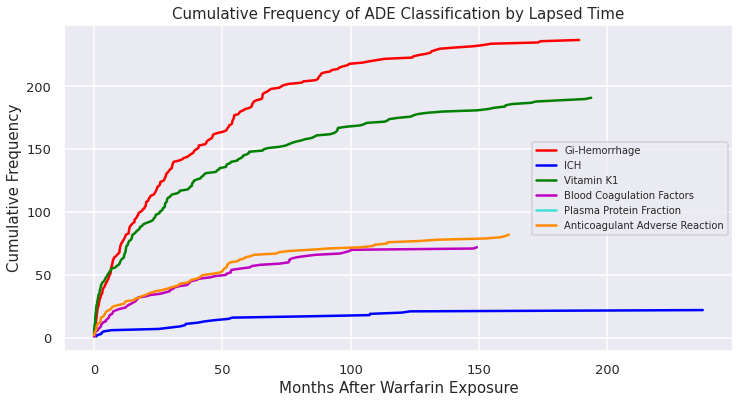

In [214]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig, ax = plt.subplots(1, 1, figsize=(12,6))

sns.lineplot(ax = ax, data=period_ct_dfs[0], x="period", y="cum_cts", linewidth=2.5, color='red')
sns.lineplot(ax = ax, data=period_ct_dfs[1], x="period", y="cum_cts", linewidth=2.5, color='blue')
sns.lineplot(ax = ax, data=period_ct_dfs[2], x="period", y="cum_cts", linewidth=2.5, color='g')
sns.lineplot(ax = ax, data=period_ct_dfs[3], x="period", y="cum_cts", linewidth=2.5, color='m')
# sns.lineplot(ax = ax, data=period_ct_dfs[4], x="period", y="cum_cts", linewidth=2.5, color='tab:brown')
sns.lineplot(ax = ax, data=period_ct_dfs[4], x="period", y="cum_cts", linewidth=2.5, color='turquoise')
# sns.lineplot(ax = ax, data=period_ct_dfs[6], x="period", y="cum_cts", linewidth=2.5, color='black')
sns.lineplot(ax = ax, data=period_ct_dfs[5], x="period", y="cum_cts", linewidth=2.5, color='darkorange')

ax.set_xlabel('Months After Warfarin Exposure', fontsize = 15)
ax.set_ylabel('Cumulative Frequency', fontsize = 15)
ax.set_title('Cumulative Frequency of ADE Classification by Lapsed Time', fontsize = 15)
ax.tick_params(labelsize = 13)
ax.legend(["Gi-Hemorrhage", "ICH", "Vitamin K1", "Blood Coagulation Factors", "Plasma Protein Fraction", "Anticoagulant Adverse Reaction"], fontsize = "10")
# plt.setp(l,linewidth=5)

plt.show()

In [215]:
giHem = period_ct_dfs[0].describe()[['cum_cts']]
giHem.reset_index(inplace = True)
giHem.columns = ['Statistic', 'GI Hemorrhage']

ich = period_ct_dfs[1].describe()[['cum_cts']]
ich.reset_index(inplace = True)
ich.columns = ['Statistic', 'ICH']


vitk1 = period_ct_dfs[2].describe()[['cum_cts']]
vitk1.reset_index(inplace = True)
vitk1.columns = ['Statistic', 'Vitamin K1']

bloodcoag = period_ct_dfs[3].describe()[['cum_cts']]
bloodcoag.reset_index(inplace = True)
bloodcoag.columns = ['Statistic', 'Blood Coagulation Factors']

anticoag = period_ct_dfs[5].describe()[['cum_cts']]
anticoag.reset_index(inplace = True)
anticoag.columns = ['Statistic', 'Anticoagulant Adverse Events']

month_stats = giHem.join(ich.set_index('Statistic'), on = 'Statistic').join(
    vitk1.set_index('Statistic'), on = 'Statistic').join(
    bloodcoag.set_index('Statistic'), on = 'Statistic').join(
    anticoag.set_index('Statistic'), on = 'Statistic')

month_stats.set_index('Statistic')

GI Hemorrhage        ICH  Vitamin K1  Blood Coagulation Factors  \
Statistic                                                                    
count         219.000000  22.000000  173.000000                  71.000000   
mean          123.525114  11.500000  102.687861                  36.394366   
std            67.859495   6.493587   53.097384                  21.058069   
min             1.000000   1.000000    3.000000                   1.000000   
25%            66.500000   6.250000   59.000000                  18.500000   
50%           126.000000  11.500000  105.000000                  36.000000   
75%           181.500000  16.750000  148.000000                  54.500000   
max           237.000000  22.000000  191.000000                  72.000000   

           Anticoagulant Adverse Events  
Statistic                                
count                         79.000000  
mean                          41.962025  
std                           23.695419  
min                            2.000000  
25%                           21.500000  
50%                           42.000000  
75%                           62.500000  
max                           82.000000

# INR For Vitamin K1

In [216]:
# This query represents dataset "INR Data" for domain "measurement" and was generated for All of Us Registered Tier Dataset v4
dataset_40627273_measurement_sql = """
    SELECT
        measurement.RANGE_HIGH,
        measurement.RANGE_LOW,
        measurement.VALUE_SOURCE_VALUE,
        measurement.VALUE_AS_CONCEPT_ID,
        measurement.UNIT_CONCEPT_ID,
        measurement.MEASUREMENT_SOURCE_CONCEPT_ID,
        measurement.MEASUREMENT_SOURCE_VALUE,
        measurement.MEASUREMENT_CONCEPT_ID,
        measurement.MEASUREMENT_DATETIME,
        measurement.MEASUREMENT_TYPE_CONCEPT_ID,
        measurement.PERSON_ID,
        measurement.UNIT_SOURCE_VALUE,
        measurement.VISIT_OCCURRENCE_ID,
        measurement.VALUE_AS_NUMBER,
        measurement.OPERATOR_CONCEPT_ID,
        m_unit.concept_name as UNIT_CONCEPT_NAME,
        m_value.concept_name as VALUE_AS_CONCEPT_NAME,
        m_operator.concept_name as OPERATOR_CONCEPT_NAME,
        m_type.concept_name as MEASUREMENT_TYPE_CONCEPT_NAME,
        m_standard_concept.concept_code as STANDARD_CONCEPT_CODE,
        m_standard_concept.concept_name as STANDARD_CONCEPT_NAME,
        m_standard_concept.vocabulary_id as STANDARD_VOCABULARY,
        m_source_concept.vocabulary_id as SOURCE_VOCABULARY,
        m_source_concept.concept_name as SOURCE_CONCEPT_NAME,
        m_source_concept.concept_code as SOURCE_CONCEPT_CODE,
        m_visit.concept_name as VISIT_OCCURRENCE_CONCEPT_NAME 
    from
        ( SELECT
            * 
        from
            `""" + os.environ["WORKSPACE_CDR"] + """.measurement` measurement 
        WHERE
            (
                measurement_concept_id in  (
                    select
                        distinct c.concept_id 
                    from
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                    join
                        (
                            select
                                cast(cr.id as string) as id 
                            from
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                            where
                                domain_id = 'MEASUREMENT' 
                                and is_standard = 1 
                                and concept_id in (
                                    40779364
                                ) 
                                and is_selectable = 1 
                                and full_text like '%[measurement_rank1]%'
                        ) a 
                            on (
                                c.path like concat('%.',
                            a.id,
                            '.%') 
                            or c.path like concat('%.',
                            a.id) 
                            or c.path like concat(a.id,
                            '.%')) 
                        where
                            domain_id = 'MEASUREMENT' 
                            and is_standard = 1 
                            and is_selectable = 1
                        )
                )
            ) measurement 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_unit 
                on measurement.unit_concept_id = m_unit.concept_id 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_value 
                on measurement.value_as_concept_id = m_value.concept_id 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_operator 
                on measurement.operator_concept_id = m_operator.concept_id 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_type 
                on measurement.measurement_type_concept_id = m_type.concept_id 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_standard_concept 
                on measurement.measurement_concept_id = m_standard_concept.concept_id 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_source_concept 
                on measurement.measurement_source_concept_id = m_source_concept.concept_id 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                on measurement.visit_occurrence_id = v.visit_occurrence_id 
        left join
            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_visit 
                on v.visit_concept_id = m_visit.concept_id"""

inr_df = pd.read_gbq(dataset_40627273_measurement_sql, dialect="standard", progress_bar_type="tqdm_notebook")

inr_df.head(5)

RANGE_HIGH  RANGE_LOW VALUE_SOURCE_VALUE  VALUE_AS_CONCEPT_ID  \
0        1.10       0.90               None                  NaN   
1        1.16       0.87               None                  NaN   
2        1.10       0.90               None                  NaN   
3        1.20       0.90               None                  NaN   
4        1.10       0.90               None                  NaN   

   UNIT_CONCEPT_ID  MEASUREMENT_SOURCE_CONCEPT_ID MEASUREMENT_SOURCE_VALUE  \
0              NaN                            0.0      No matching concept   
1              NaN                            0.0      No matching concept   
2              NaN                            0.0      No matching concept   
3              NaN                            0.0      No matching concept   
4              NaN                            0.0      No matching concept   

   MEASUREMENT_CONCEPT_ID      MEASUREMENT_DATETIME  \
0                 3022217 2016-11-19 17:12:00+00:00   
1                 3022217 2009-01-17 14:35:00+00:00   
2                 3022217 2019-05-13 12:08:00+00:00   
3                 3022217 2014-04-09 11:31:00+00:00   
4                 3022217 2017-05-08 04:35:00+00:00   

   MEASUREMENT_TYPE_CONCEPT_ID  ...  VALUE_AS_CONCEPT_NAME  \
0                     44818702  ...                   None   
1                     44818702  ...                   None   
2                     44818702  ...                   None   
3                     44818702  ...                   None   
4                     44818702  ...                   None   

  OPERATOR_CONCEPT_NAME  MEASUREMENT_TYPE_CONCEPT_NAME  STANDARD_CONCEPT_CODE  \
0                  None                     Lab result                 6301-6   
1                  None                     Lab result                 6301-6   
2                  None                     Lab result                 6301-6   
3                  None                     Lab result                 6301-6   
4                  None                     Lab result                 6301-6   

                              STANDARD_CONCEPT_NAME STANDARD_VOCABULARY  \
0  INR in Platelet poor plasma by Coagulation assay               LOINC   
1  INR in Platelet poor plasma by Coagulation assay               LOINC   
2  INR in Platelet poor plasma by Coagulation assay               LOINC   
3  INR in Platelet poor plasma by Coagulation assay               LOINC   
4  INR in Platelet poor plasma by Coagulation assay               LOINC   

  SOURCE_VOCABULARY  SOURCE_CONCEPT_NAME  SOURCE_CONCEPT_CODE  \
0              None  No matching concept  No matching concept   
1              None  No matching concept  No matching concept   
2              None  No matching concept  No matching concept   
3              None  No matching concept  No matching concept   
4              None  No matching concept  No matching concept   

  VISIT_OCCURRENCE_CONCEPT_NAME  
0                          None  
1                          None  
2                          None  
3                          None  
4                          None  

[5 rows x 26 columns]

In [217]:
inr_df.columns = [i.lower() for i in inr_df.columns]

In [218]:
vitamink_inr = pd.merge(overlap_df5, inr_df, how='inner', on='person_id')

In [219]:
vitamink_inr = vitamink_inr[vitamink_inr['drug_exposure_start_datetime'] >= vitamink_inr['measurement_datetime']]

In [220]:
vitamink_inr = vitamink_inr.sort_values('measurement_datetime').groupby('person_id').tail(1)

In [221]:
delta = timedelta(days=7)

In [222]:
vitamink_inr = vitamink_inr[vitamink_inr['measurement_datetime'] > (vitamink_inr['drug_exposure_start_datetime'] - delta)]

In [223]:
vitamink_inr.columns

Index(['person_id', 'drug_name', 'before_visit_start_date', 'index_date',
       'last_dispensed', 'last_days_supply', 'follow_up_end_date',
       'follow_up_period', 'visit_after', 'avg_days_bw_records',
       'dispensed_count', 'avg_days_supply', 'gender_concept_id',
       'year_of_birth', 'month_of_birth', 'day_of_birth', 'birth_datetime',
       'race_concept_id', 'ethnicity_concept_id', 'location_id', 'provider_id',
       'care_site_id', 'person_source_value', 'gender_source_value',
       'gender_source_concept_id', 'race_source_value',
       'race_source_concept_id', 'ethnicity_source_value',
       'ethnicity_source_concept_id', 'sex_at_birth_concept_id',
       'sex_at_birth_source_concept_id', 'sex_at_birth_source_value', 'race',
       'gender', 'ethnicity', 'sex_at_birth', 'care_sites', 'sig',
       'verbatim_end_date', 'route_source_value', 'route_concept_id',
       'drug_concept_id', 'drug_exposure_start_datetime',
       'drug_type_concept_id', 'visit_occurrence_i

In [224]:
vitamink_inr[vitamink_inr['value_as_number'] >= 5.0]

person_id                                      drug_name  \
14549    1763375               warfarin sodium 5 MG Oral Tablet   
15363    1802572    warfarin sodium 2 MG Oral Tablet [Coumadin]   
24873    2640796    warfarin sodium 5 MG Oral Tablet [Coumadin]   
19188    2022390               warfarin sodium 5 MG Oral Tablet   
7491     1316906    warfarin sodium 5 MG Oral Tablet [Coumadin]   
6629     1149984  warfarin sodium 7.5 MG Oral Tablet [Coumadin]   
22246    2356456               warfarin sodium 5 MG Oral Tablet   
2275     1057622    warfarin sodium 2 MG Oral Tablet [Coumadin]   
5461     1144030  warfarin sodium 7.5 MG Oral Tablet [Coumadin]   
25751    2739093             warfarin sodium 2.5 MG Oral Tablet   
9607     1512709               warfarin sodium 5 MG Oral Tablet   
4182     1094762               warfarin sodium 5 MG Oral Tablet   
2344     1060044              warfarin sodium 10 MG Oral Tablet   
19855    2037010               warfarin sodium 2 MG Oral Tablet   
25851    2770415               warfarin sodium 1 MG Oral Tablet   
26907    2862824    warfarin sodium 5 MG Oral Tablet [Jantoven]   
13752    1751331                                       warfarin   
16175    1840931               warfarin sodium 5 MG Oral Tablet   
20362    2058378               warfarin sodium 5 MG Oral Tablet   
7975     1343123               warfarin sodium 5 MG Oral Tablet   
13058    1688623               warfarin sodium 3 MG Oral Tablet   
15258    1790839               warfarin sodium 5 MG Oral Tablet   
2563     1068284               warfarin sodium 5 MG Oral Tablet   
30753    3264385               warfarin sodium 1 MG Oral Tablet   
19329    2026975    warfarin sodium 6 MG Oral Tablet [Jantoven]   
10534    1610281    warfarin sodium 5 MG Oral Tablet [Jantoven]   
23733    2583655    warfarin sodium 1 MG Oral Tablet [Coumadin]   
9745     1522384                                       warfarin   
30522    3138898               warfarin sodium 4 MG Oral Tablet   

      before_visit_start_date index_date last_dispensed  last_days_supply  \
14549              2007-06-18 2007-06-22     2015-09-11                60   
15363              1998-09-03 1998-09-18     2008-07-24                60   
24873              2008-12-17 2009-04-04     2012-01-19                 4   
19188              2004-10-24 2004-10-26     2019-11-17                30   
7491               2010-07-24 2010-07-27     2013-09-01                10   
6629               2011-10-01 2011-10-04     2013-01-25                 1   
22246              2005-04-20 2005-04-22     2019-09-28                30   
2275               2011-02-08 2011-02-10     2019-05-18                90   
5461               2008-10-31 2008-11-09     2018-08-22                 7   
25751              2012-10-15 2012-10-16     2017-01-26                90   
9607               2012-10-28 2012-10-31     2019-04-28                90   
4182               2013-12-24 2013-12-25     2019-11-05                90   
2344               2014-03-13 2014-03-14     2014-06-04                90   
19855              2009-12-15 2009-12-28     2020-01-17                88   
25851              2002-03-07 2002-03-22     2019-11-05                90   
26907              2014-07-29 2014-07-30     2020-05-01                 9   
13752              2014-02-27 2014-03-08     2017-06-14                 0   
16175              1999-09-08 1999-09-14     2020-06-08                30   
20362              2015-06-02 2015-06-19     2016-07-16                30   
7975               2016-07-21 2016-07-22     2019-08-29                 0   
13058              2008-05-10 2008-05-14     2020-02-14                30   
15258              2016-05-20 2016-06-11     2017-03-23                30   
2563               2012-08-24 2013-03-25     2020-06-18                60   
30753              2002-07-25 2002-08-02     2019-12-10                30   
19329              2016-08-02 2016-08-05     2020-04-21                

In [225]:
#vitamink_inr['measurement_to_administer'] = vitamink_inr['drug_exposure_start_datetime'] - vitamink_inr['measurement_datetime']

In [226]:
#vitamink_inr[['person_id', 'measurement_datetime', 'drug_exposure_start_datetime', 'measurement_to_administer']]

In [227]:
#vitamink_inr['measurement_to_administer'].median()

# Survey Data

In [228]:
# create test cohort to test functions
test_cohort_sql = f"""
    with cohort as (
        select * from {os.environ["WORKSPACE_CDR"]}.person limit 1000
    )
    select distinct person_id from cohort
    """
test_cohort = list(pd.read_gbq(test_cohort_sql, dialect="standard")['person_id'].values)
#     insert_values_sql0 = ",".join([f"({x})" for x in test_cohort])

# insert_values_sql1 = ",".join([f"({x})" for x in all_comorbidities_condition_codes[1200:]])
# cohort_sql = f"""
# CREATE TEMP TABLE cohort
# (
#   person_id INT64
# );
# INSERT INTO cohort
# VALUES {insert_values_sql0};


# SELECT * FROM cohort;

# """
# cohort = pd.read_gbq(cohort_sql, dialect="standard")

# test_cohort

In [229]:
p_id = warfarin.person_id.to_list()

In [230]:
# Define PROMIS_health_concept_set_sql
questions_concept_set_sql = f"""
    question_concept_id IN (
               1585723, 1585741, 1585747, 1585748 -- Physical Health
               , 1585760, 1585729, 1585717, 1585735 -- Mental Health
               , 1585711
               , 1585811, 1585784 -- Menstrual/Pregnant
               , 1585803, 1585806
               --Lifestyle Qs
               , 1585857, 1585860, 1585864, 1585867, 1585870 
               , 1585873, 1586159, 1586162, 1586166, 1586174
               , 1586177, 1586182, 1586185, 1586190, 1586193 -- smoking
               , 1586198, 1586201, 1586207, 1586213, 1585636
               , 1585650, 1585656, 1585662, 1585668, 1585674
               , 1585680, 1585686, 1585692, 1585698, 1585704
               --Basics
               , 1585940, 1585892, 1585386
            )
"""

In [231]:
# Define SQL query for add Overall Health survey
add_health_survey_sql = f"""
    with_health_survey as (
        select a.person_id, answer, 
        cast(cast(question_concept_id as int64) as string) as question_concept_id,  
        survey_date,
        cast(cast(answer_concept_id as int64) as string) as answer_concept_id, 
        question from cohort a
        inner join (
            SELECT
                answer.person_id, answer.answer,
                answer.question_concept_id, extract(date from answer.survey_datetime) as survey_date,
                answer.answer_concept_id, answer.question    
            FROM {os.environ["WORKSPACE_CDR"]}.ds_survey answer 
            WHERE
                (
                    {questions_concept_set_sql}
                )
            )  b
            on a.person_id = b.person_id
    )
"""

In [232]:
# cohort is list of person_ids 
def get_survey_data_for_cohort(cohort):
    insert_values_sql0 = ",".join([f"({x})" for x in cohort])
    health_sql = f"""
    CREATE TEMP TABLE cohort
    (
      person_id INT64
    );
    INSERT INTO cohort
    VALUES {insert_values_sql0};


    SELECT * FROM cohort;
    with
    {add_health_survey_sql}
    select * from with_health_survey
    """
    health = pd.read_gbq(health_sql, dialect="standard")
    return health

In [233]:
survey_data1 = get_survey_data_for_cohort(p_id[:1000])
survey_data2 = get_survey_data_for_cohort(p_id[1000:])

In [234]:
survey_data2.shape

(22718, 6)

In [235]:
# 25752 + 23286 = 49038
survey_data = survey_data1.append(survey_data2)

In [236]:
# define helper functions
def get_questions(df):
    questions = list(df['question'].unique())
    this_df = df[['person_id','question']][df[['person_id','question']].duplicated()].sort_values('person_id')
    multiple_choice = list(this_df['question'].unique())
    single_choice = [x for x in questions if x not in multiple_choice]
    return (multiple_choice, single_choice)

def create_single_choice_columns(df, single_choice):
    this_df = df.copy()
    this_df = this_df[['person_id','question', 'answer']]
    this_df = this_df[this_df['question'].isin(single_choice)]
    this_df = this_df.pivot(index='person_id', columns="question", values="answer")
    return this_df

def create_multiple_choice_columns(df, multiple_choice):
    this_df = df.copy()
    this_df = this_df[['person_id','question', 'answer']]
    this_df = this_df[this_df['question'].isin(multiple_choice)]
    this_df['question (answer)'] = this_df['question'] + " = " + this_df['answer']
#     this_df['question (answer)'] = this_df['answer']
    this_df = this_df[['person_id','question (answer)']]
    this_df['indicator'] = 1
    this_df = this_df.pivot(index='person_id', columns="question (answer)", values="indicator")
    this_df = this_df.fillna(0)
    this_df = this_df.astype(int)
    return(this_df)

def create_indicator_df(df):
    mult_choice, sing_choice = get_questions(df)
    sing_df = create_single_choice_columns(df, sing_choice)
    mult_df = create_multiple_choice_columns(df, mult_choice)
    output_df = sing_df.join(mult_df, on='person_id', how='outer')
    return(output_df)
    

In [237]:
health = create_indicator_df(survey_data)
health.columns

Index(['Alcohol: 6 or More Drinks Occurrence', 'Alcohol: Alcohol Participant',
       'Alcohol: Average Daily Drink Count',
       'Alcohol: Drink Frequency Past Year',
       'Attempt Quit Smoking: Completely Quit Age',
       'Cigar Smoking: Cigar Smoke Participant',
       'Cigar Smoking: Current Cigar Frequency',
       'Education Level: Highest Grade',
       'Electronic Smoking: Electric Smoke Participant',
       'Hookah Smoking: Current Hookah Frequency',
       'Hookah Smoking: Hookah Smoke Participant',
       'Insurance: Health Insurance', 'Marital Status: Current Marital Status',
       'Overall Health: Average Fatigue 7 Days',
       'Overall Health: Average Pain 7 Days',
       'Overall Health: Emotional Problem 7 Days',
       'Overall Health: Everyday Activities', 'Overall Health: General Health',
       'Overall Health: General Mental Health',
       'Overall Health: General Physical Health',
       'Overall Health: General Quality', 'Overall Health: Menstrual Stopped'

In [238]:
# Combine 'Recreational Drug Use: Which Drugs Used = PMI: Prefer Not To Answer' and 
# 'Recreational Drug Use: Which Drugs Used = PMI: Skip'
health['Recreational Drug Use: Which Drugs Used = Null'
      ] = health['Recreational Drug Use: Which Drugs Used = PMI: Prefer Not To Answer'
                ] + health['Recreational Drug Use: Which Drugs Used = PMI: Skip']
health[['Recreational Drug Use: Which Drugs Used = Null', 
        'Recreational Drug Use: Which Drugs Used = PMI: Prefer Not To Answer', 
        'Recreational Drug Use: Which Drugs Used = PMI: Skip']]
health.drop(columns = 'Recreational Drug Use: Which Drugs Used = PMI: Prefer Not To Answer', inplace = True)
health.drop(columns = 'Recreational Drug Use: Which Drugs Used = PMI: Skip', inplace = True)

# Column: 'Cigar Smoking: Current Cigar Frequency'
health.drop(columns = 'Cigar Smoking: Current Cigar Frequency', inplace = True)

def binaryConv(colName, health = health):
    bin_dic = {}
    y_str = health[health[colName].str.contains("Yes")
                  ][colName].tolist()[1]
    n_str = health[health[colName].str.contains("No")
                  ][colName].tolist()[1]
    for i in health[colName].unique():
        if i != y_str and i!= n_str:
            bin_dic[i] = -1
    bin_dic[y_str] = 1
    bin_dic[n_str] = 0
    health = health.replace({colName: bin_dic})
    return health

# Column: 'Cigar Smoking: Cigar Smoke Participant'
health = binaryConv('Cigar Smoking: Cigar Smoke Participant', health)

# # Column: 'Overall Health: Average Pain 7 Days'
# health = health.replace({'Overall Health: Average Pain 7 Days': {'PMI: Skip': -1}})

dict1 = {'PMI: Skip': -1}
health = health.replace({'Overall Health: Average Pain 7 Days': dict1})

# Column: 'Overall Health: Everyday Activities'
health = health.replace({'Overall Health: Everyday Activities': 
                {'Everyday Activities: Completely': 4, 
                 'Everyday Activities: Mostly': 3,
                 'Everyday Activities: Moderately': 2, 
                 'Everyday Activities: A Little': 1, 
                 'Everyday Activities: Not At All': 0,
                 'PMI: Skip': -1}})

# Column: 'Overall Health: General Physical Health'
health = health.replace({
    'Overall Health: General Physical Health': {
        'General Physical Health: Very Good': 3,
        'General Physical Health: Good': 2, 
        'PMI: Skip': -1,
        'General Physical Health: Fair': 1, 
        'General Physical Health: Poor': 0,
        'General Physical Health: Excellent': 4}
})

# Column: 'Past 3 Month Use Frequency: Sedative 3 Month Use'
health.drop(columns = 'Past 3 Month Use Frequency: Sedative 3 Month Use', inplace = True)

# Column: 'Smoking: '100 Cigs Lifetime'
health = binaryConv('Smoking: 100 Cigs Lifetime', health)

# Column: 'Smoking: 'Average Daily Cigarette Number'
health.drop(columns = 'Smoking: Average Daily Cigarette Number', inplace = True)

# Column: 'Smoking: 'Daily Smoke Starting Age'
health.drop(columns = 'Smoking: Daily Smoke Starting Age', inplace = True)

# Column: 'Smoking: 'Smoking: Number Of Years'
health.drop(columns = 'Smoking: Number Of Years', inplace = True)

# Column: 'Smoking: 'Smoking: Smoke Frequency'
health.drop(columns = 'Smoking: Smoke Frequency', inplace = True)

In [239]:
# Delete given columns
health = health.drop(['Overall Health: Menstrual Stopped', 
              'Hookah Smoking: Current Hookah Frequency', 
              'Attempt Quit Smoking: Completely Quit Age',
              'Alcohol: 6 or More Drinks Occurrence', 
              'Alcohol: Average Daily Drink Count'], axis=1)

# fill NaN values as NA
health = health.fillna('NA')

# Replace: Alcohol: Alcohol Participant
dict1 = {'Alcohol Participant: Yes': 1,
      'Alcohol Participant: No': 0,
      'PMI: Skip': -1,
      'PMI: Prefer Not To Answer': -1}
health = health.replace({'Alcohol: Alcohol Participant': dict1})

# Replace: Alcohol: Drink Frequency Past Year
dict1 = {'PMI: Skip': -1, 'PMI: Prefer Not To Answer': -1, 'NA': -1,
         'Drink Frequency Past Year: Never':0, 'Drink Frequency Past Year: Monthly Or Less': 1,
         'Drink Frequency Past Year: 2 to 4 Per Month': 2, 'Drink Frequency Past Year: 2 to 3 Per Week': 3,
         'Drink Frequency Past Year: 4 or More Per Week': 4
        }
health = health.replace({'Alcohol: Drink Frequency Past Year': dict1})

# Replace: Education Level: Highest Grade
dict1 = {'PMI: Skip': -1, 'PMI: Prefer Not To Answer': -1,
         'Less than a high school degree or equivalent':0, 'Highest Grade: Twelve Or GED': 1,
         'Highest Grade: College One to Three': 2, 'College graduate or advanced degree': 3,
        }
health = health.replace({'Education Level: Highest Grade': dict1})

# Replace: Electronic Smoking: Electric Smoke Participant
dict1 = {'Electric Smoke Participant: Yes': 1,
      'Electric Smoke Participant: No': 0,
      'PMI: Skip': -1,
      'PMI: Prefer Not To Answer': -1,
        'PMI: Dont Know':-1}
health = health.replace({'Electronic Smoking: Electric Smoke Participant': dict1})

# Replace: Hookah Smoking: Hookah Smoke Participant'
dict1 = {'Hookah Smoke Participant: Yes': 1,
      'Hookah Smoke Participant: No': 0,
      'PMI: Skip': -1,
      'PMI: Prefer Not To Answer': -1,
        'PMI: Dont Know':-1}
health = health.replace({'Hookah Smoking: Hookah Smoke Participant': dict1})

# Replace: Insurance: Health Insurance
dict1 = {'Health Insurance: Yes': 1,
      'Health Insurance: No': 0,
      'PMI: Skip': -1,
      'PMI: Prefer Not To Answer': -1,
        'PMI: Dont Know':-1,
        'NA':-1}
health = health.replace({'Insurance: Health Insurance': dict1})

# Replace: Marital Status: Current Marital Status
dict1 = {'Current Marital Status: Married': 'Married',
      'Current Marital Status: Widowed': 'Widowed',
      'Current Marital Status: Divorced': 'Divorced',
      'Current Marital Status: Living With Partner': 'Living With Partner',
        'Current Marital Status: Never Married': 'Never Married',
        'Current Marital Status: Separated':'Separated',
        'PMI: Prefer Not To Answer': 'Null',
        'PMI: Skip': 'Null'}
health = health.replace({'Marital Status: Current Marital Status': dict1})

# Replace: Overall Health: Average Fatigue 7 Days
dict1 = {'PMI: Skip': -1, 'Average Fatigue 7 Days: None': 0, 'Average Fatigue 7 Days: Mild': 1,
         'Average Fatigue 7 Days: Moderate':2, 'Average Fatigue 7 Days: Severe': 3,
         'Average Fatigue 7 Days: Very Severe': 4
        }
health = health.replace({'Overall Health: Average Fatigue 7 Days': dict1})

# Replace: Overall Health: Emotional Problem 7 Days
dict1 = {'PMI: Skip': -1, 'Emotional Problem 7 Days: Never': 0, 'Emotional Problem 7 Days: Rarely': 1,
         'Emotional Problem 7 Days: Sometimes': 2, 'Emotional Problem 7 Days: Often': 3,
         'Emotional Problem 7 Days: Always': 4
        }
health = health.replace({'Overall Health: Emotional Problem 7 Days': dict1})

# Replace: Overall Health: General Health
dict1 = {'PMI: Skip': -1, 'General Health: Poor': 0, 'General Health: Fair': 1,
         'General Health: Good': 2, 'General Health: Very Good': 3,
         'General Health: Excellent': 4
        }
health = health.replace({'Overall Health: General Health': dict1})

# Replace: Overall Health: General Mental Health
dict1 = {'PMI: Skip': -1, 'General Mental Health: Poor': 0, 'General Mental Health: Fair': 1,
         'General Mental Health: Good': 2, 'General Mental Health: Very Good': 3,
         'General Mental Health: Excllent': 4, 'General Mental Health: Excellent':4
        }
health = health.replace({'Overall Health: General Mental Health': dict1})

# Replace: Overall Health: General Quality
dict1 = {'PMI: Skip': -1, 'General Quality: Poor': 0, 'General Quality: Fair': 1,
         'General Quality: Good': 2, 'General Quality: Very Good': 3,
         'General Quality: Excellent': 4
        }
health = health.replace({'Overall Health: General Quality': dict1})

In [240]:
# *'Overall Health: Organ Transplant'*

xdict = {
    "Organ Transplant: No" : 0,
    "Organ Transplant: Yes" : 1,
    "PMI: Skip" : -1,
    "PMI: Dont Know" : -1,
    'NA': -1
}

health = health.replace({"Overall Health: Organ Transplant": xdict})



#### * 'Overall Health: Social Satisfaction'*

xdict1 = {
    "Social Satisfaction: Very Good" : 4,
    "Social Satisfaction: Good" : 3,
    "Social Satisfaction: Excellent" : 2,
    "Social Satisfaction: Fair" : 1,
    "Social Satisfaction: Poor" : 0,
    "PMI: Skip" : -1,
    'NA': -1
}

health = health.replace({"Overall Health: Social Satisfaction": xdict1})



#### * 'Smokeless Tobacco: Smokeless Tobacco Participant' *

xdict1 = {
    "Smokeless Tobacco Participant: No" : 0,
    "Smokeless Tobacco Participant: Yes" : 1,
    "PMI: Skip" : -1,
    "PMI: Prefer Not To Answer" : -1,
    "PMI: Dont Know" : -1,
    'NA': -1
}

health = health.replace({'Smokeless Tobacco: Smokeless Tobacco Participant': xdict1})



#### * 'Smoking: Serious Quit Attempt'*

xdict1 = {
    "Serious Quit Attempt: Attempt Quit Smoking" : 1,
    "Serious Quit Attempt: No Attempt Quit Smoking" : 0,
    "PMI: Dont Know" : -1,
    "PMI: Prefer Not To Answer" : -1,
    "PMI: Skip" : -1,
    'NA': -1
}

health = health.replace({'Smoking: Serious Quit Attempt': xdict1})

#DELETES
del health[ 'Past 3 Month Use Frequency: Cocaine 3 Month Use']
del health[ 'Past 3 Month Use Frequency: Inhalant 3 Month Use']
del health[ 'Past 3 Month Use Frequency: Marijuana 3 Month Use']
del health[ 'Past 3 Month Use Frequency: Other 3 Month Use']
del health["Past 3 Month Use Frequency: Other Stimulant 3 Month Use"]
del health["Past 3 Month Use Frequency: Prescription Opioid 3 Month Use"]
del health[ 'Pregnancy: 1 Pregnancy Status']
del health['Smokeless Tobacco: Smokeless Tobacco Frequency']
del health['Smoking: Current Daily Cigarette Number']
del health['Past 3 Month Use Frequency: Street Opioid 3 Month Use']

In [241]:
health.reset_index(inplace=True)

In [242]:
# Convert all -1, and Null to np.nan
health = health.replace({-1: np.nan, 'Null': np.nan})
h_col = list(health.columns)

In [243]:
health.columns

Index(['person_id', 'Alcohol: Alcohol Participant',
       'Alcohol: Drink Frequency Past Year',
       'Cigar Smoking: Cigar Smoke Participant',
       'Education Level: Highest Grade',
       'Electronic Smoking: Electric Smoke Participant',
       'Hookah Smoking: Hookah Smoke Participant',
       'Insurance: Health Insurance', 'Marital Status: Current Marital Status',
       'Overall Health: Average Fatigue 7 Days',
       'Overall Health: Average Pain 7 Days',
       'Overall Health: Emotional Problem 7 Days',
       'Overall Health: Everyday Activities', 'Overall Health: General Health',
       'Overall Health: General Mental Health',
       'Overall Health: General Physical Health',
       'Overall Health: General Quality', 'Overall Health: Organ Transplant',
       'Overall Health: Social Satisfaction',
       'Smokeless Tobacco: Smokeless Tobacco Participant',
       'Smoking: 100 Cigs Lifetime', 'Smoking: Serious Quit Attempt',
       'Organ Transplant: Organ Transplant Descr

In [244]:
# import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=1000, random_state=0)
imp.fit(health.drop(columns = 'Marital Status: Current Marital Status'))
IterativeImputer(random_state=0)
health_np = np.round(imp.transform(health.drop(columns = 'Marital Status: Current Marital Status')))

In [245]:
h_col.remove('Marital Status: Current Marital Status')

hlth_filled = pd.DataFrame(health_np, columns = h_col)

In [246]:
for i in hlth_filled.columns:
    print(sum(hlth_filled[i].isnull()))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [247]:
hlth_filled.person_id = hlth_filled.person_id.astype(int)

# Machine Learning

In [248]:
ade2_min = overlap_df2.reset_index()[overlap_df2.reset_index().columns[:39]]
warfarin['ADE_Classification'] = pd.Series(['No']*1894)
ade2_min['ADE_Classification'] = pd.Series(['Yes']*overlap_df2.shape[0])

war_ade = pd.concat([warfarin, ade2_min], ignore_index=True).groupby(
    'person_id', as_index = False).apply(lambda x: x.sort_values(
    'ADE_Classification', ascending = False).head(1)).reset_index(drop = True)

In [249]:
war_ade.ADE_Classification = war_ade.ADE_Classification.replace({'Yes': 1, 'No': 0})

In [250]:
war_ade['age'] = pd.DatetimeIndex(war_ade.index_date).year - war_ade.year_of_birth

In [251]:
# follow_up_period,
# avg_days_bw_records,
# dispensed_count,
# avg_days_supply,
# race,
# ethnicity,
# sex_at_birth,
# ADE_Classification,
# age

In [252]:
war_ade.sex_at_birth = war_ade.sex_at_birth.replace({'Male': 'Male', 'Female': 'Female', 
                                                       'Not male, not female, prefer not to answer, or skipped': 'Other',
                                                       'No matching concept': 'Other'})

In [253]:
war_ade.race = war_ade.race.replace({'White': 'White', 'Asian': 'Asian', 
                                                       'Black or African American': 'Black or African American',
                                                       'PMI: Skip': 'Unknown',
                                       'None of these': 'Other',
                                       'I prefer not to answer': 'Unknown',
                                       'None Indicated': 'Unknown',
                                       'More than one population': 'More than one population',
                                       'No matching concept': 'Unknown',
                                       'Another single population': 'Another single population'})

In [254]:
war_ade.ethnicity = war_ade.ethnicity.replace({'Not Hispanic or Latino': 'Not Hispanic or Latino',
                                       'Hispanic or Latino': 'Hispanic or Latino',
                                       'PMI: Skip': 'Unknown',
                                       'What Race Ethnicity: Race Ethnicity None Of These': 'Other',
                                       'PMI: Prefer Not To Answer': 'Unknown'})

In [255]:
X = war_ade[['person_id', 'follow_up_period', 'avg_days_bw_records', 'dispensed_count', 'avg_days_supply',
          'race', 'ethnicity', 'sex_at_birth', 'age']]

In [256]:
X = X.merge(hlth_filled, on='person_id')

In [257]:
del X['person_id']

In [258]:
Y = war_ade[['person_id', 'ADE_Classification']]
Y = Y.merge(hlth_filled, on = 'person_id')

In [259]:
Y = Y['ADE_Classification']

In [260]:
X = pd.get_dummies(X, columns=['race', 'ethnicity', 'sex_at_birth'])

## Logisitc Regression

In [261]:
#splits = [0.25, 0.33, 0.4]
thresh = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
beta = [0.1,0.25,0.5,1,1.25,1.5,2,5]
fbeta = [[0]*len(thresh)]*len(beta)
fbeta_df = pd.DataFrame(columns = ['Beta', 'Thresh', 'fbeta'])

In [262]:
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.33, random_state=0)
w = {0:(len(Ytr)-sum(Ytr)), 1:sum(Ytr)}
clf = LogisticRegression(solver='lbfgs', max_iter=5000, random_state=0, multi_class='ovr', class_weight=w).fit(Xtr, Ytr)
Yhat = clf.predict_proba(Xte)

# Ypred = (Yhat[:,1] > 0.3).astype(int)

In [263]:
for i in range(len(beta)):
    for j in range(len(thresh)):
#         Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.33, random_state=0)
#         clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0, 
        # multi_class='multinomial').fit(Xtr, Ytr)
#         Yhat = clf.predict_proba(Xte)
        Ypred = (Yhat[:,1] > thresh[j]).astype(int)
#         fbeta_score(Yte, Ypred, beta[i])
        
#         fbeta[i][j] = Ypred
        fbeta[i][j] = fbeta_score(Yte, Ypred, beta[i])
        fbeta_df = fbeta_df.append({'Beta' : beta[i], 'Thresh' : thresh[j], 'fbeta' : 
                                    fbeta_score(Yte, Ypred, beta[i])}, 
                ignore_index = True)
    
#average_precision = average_precision_score(Yte, Yhat)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass beta=0.1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass beta=0.1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass beta=0.1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass beta=0.1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will 

In [264]:
fbeta_piv = fbeta_df.pivot(index='Thresh', columns='Beta', values='fbeta')
fbeta_piv.columns.name = None
fbeta_piv.reset_index(inplace = True)
fbeta_piv

Thresh       0.1      0.25       0.5       1.0      1.25       1.5  \
0      0.0  0.117642  0.123005  0.141638  0.208870  0.252766  0.300221   
1      0.1  0.329975  0.314330  0.276498  0.220183  0.204915  0.194757   
2      0.2  0.385251  0.325879  0.225564  0.136364  0.119128  0.108787   
3      0.3  0.311408  0.235023  0.137615  0.073171  0.062468  0.056277   
4      0.4  0.213531  0.124088  0.056180  0.025974  0.021705  0.019316   
5      0.5  0.270777  0.140496  0.058824  0.026316  0.021890  0.019432   
6      0.6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7      0.7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8      0.8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9      0.9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10     1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         2.0       5.0  
0   0.397603  0.774378  
1   0.182927  0.167652  
2   0.097720  0.084783  
3   0.049834  0.042530  
4   0.016892  0.014215  
5   0.016949  0.014223  
6   0.000000  0.000000  
7   0.000000  0.000000  
8   0.000000  0.000000  
9   0.000000  0.000000  
10  0.000000  0.000000

In [265]:
fbeta_df.drop_duplicates(inplace=True)

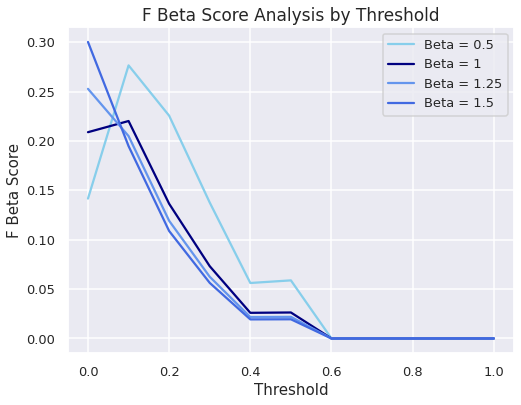

In [266]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

ax.plot(fbeta_piv['Thresh'], fbeta_piv[0.5], color = "skyblue")
ax.plot(fbeta_piv['Thresh'], fbeta_piv[1], color = 'navy')
ax.plot(fbeta_piv['Thresh'], fbeta_piv[1.25], color = 'cornflowerblue')
ax.plot(fbeta_piv['Thresh'], fbeta_piv[1.5], color = 'royalblue')
#ax.plot(fbeta_piv['Thresh'], fbeta_piv[2], color = 'blue')
ax.legend(['Beta = 0.5', 'Beta = 1', 'Beta = 1.25', 'Beta = 1.5', 'Beta = 2'], fontsize = 13)
ax.tick_params(labelsize = 13)
ax.set_xlabel('Threshold', fontsize = 15)
ax.set_ylabel('F Beta Score', fontsize = 15)
ax.set_title('F Beta Score Analysis by Threshold', fontsize = 17)
plt.show()

In [267]:
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.33, random_state=0)
#w = {1:(len(Ytr)-sum(Ytr)), 0:sum(Ytr)}
clf = LogisticRegression(solver='lbfgs', max_iter=5000, random_state=0, multi_class='ovr', class_weight=w
                         ).fit(Xtr, Ytr)
Yhat = clf.predict_proba(Xte)

Ypred = (Yhat[:,1] > 0.15).astype(int)

print(classification_report(Yte.to_numpy(), Ypred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       553
           1       0.39      0.12      0.19        73

    accuracy                           0.88       626
   macro avg       0.64      0.55      0.56       626
weighted avg       0.84      0.88      0.85       626



In [268]:
sum((Yte.to_numpy()) == Ypred)/len(Ypred)

0.8753993610223643

In [269]:
# ## Representation of Confusion Matrix:
# [TN, FP]
# [FN, TP]
# ([[416, 158], thresh = 0.1
#     [ 23,  33]])
Ypred = (Yhat[:,1] > 0.15).astype(int)
confusion_matrix(Yte.to_numpy(), Ypred)

array([[539,  14],
       [ 64,   9]])

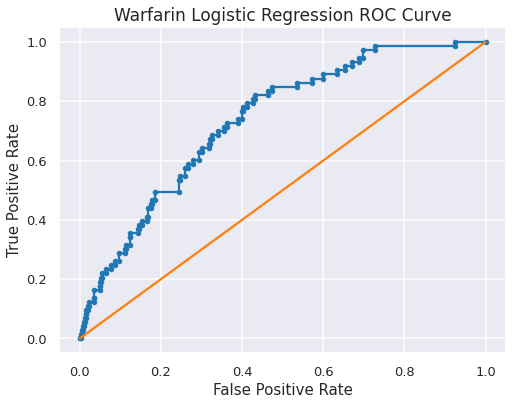

In [270]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fpr, tpr, thresholds = metrics.roc_curve(Yte.to_numpy(), Yhat[:, 1])
x = np.linspace(0,1,100)
ax.plot(fpr, tpr, marker='.')
ax.plot(x, x)
ax.set_xlabel('False Positive Rate', fontsize = 15)
ax.set_ylabel('True Positive Rate', fontsize = 15)
ax.tick_params(labelsize = 13)
ax.set_title('Warfarin Logistic Regression ROC Curve', fontsize = 17)
plt.show()

In [271]:
metrics.auc(fpr, tpr)

0.735886447521613

In [272]:
X[['follow_up_period', 'avg_days_bw_records', 'dispensed_count', 'avg_days_supply', 'age']].corr()

follow_up_period  avg_days_bw_records  dispensed_count  \
follow_up_period             1.000000             0.402616         0.645750   
avg_days_bw_records          0.402616             1.000000        -0.084854   
dispensed_count              0.645750            -0.084854         1.000000   
avg_days_supply              0.137191             0.046928        -0.014355   
age                         -0.094295            -0.026513        -0.124082   

                     avg_days_supply       age  
follow_up_period            0.137191 -0.094295  
avg_days_bw_records         0.046928 -0.026513  
dispensed_count            -0.014355 -0.124082  
avg_days_supply             1.000000  0.029661  
age                         0.029661  1.000000

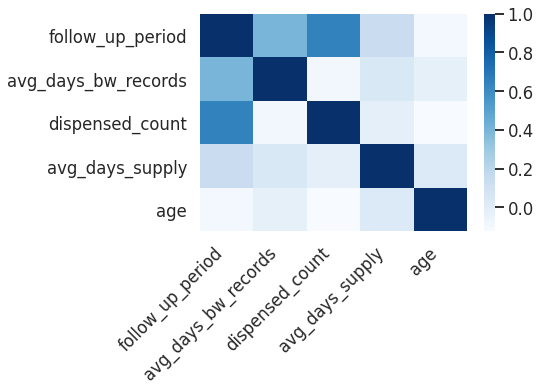

In [273]:
chart = sns.heatmap(X[['follow_up_period', 'avg_days_bw_records', 'dispensed_count', 'avg_days_supply', 'age']].corr(), 
            annot=False, cmap = "Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
# import statsmodels.api as sm

# model = sm.Logit(Ytr, Xtr)
# result = model.fit(method='newton', maxiter=10000)
# result.predict(Xte)

In [ ]:
# result.summary2()

In [ ]:
# X.dtypes

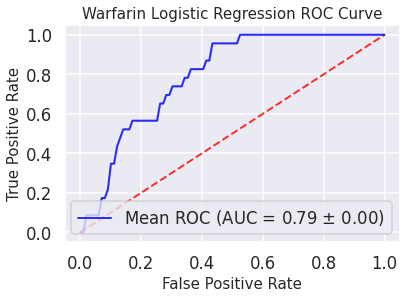

In [296]:


cv = StratifiedKFold(n_splits=10)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, Y)):
    clf.fit(X.loc[train], Y.loc[train])
    #viz = plot_roc_curve(clf, X.loc[test], Y.loc[test],alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2)
ax.legend(loc="lower right")
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
ax.set_xlabel("False Positive Rate", size = 15)
ax.set_ylabel("True Positive Rate", size = 15)
ax.set_title("Warfarin Logistic Regression ROC Curve", size=15)
plt.show()

### Cross Validation

In [279]:
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.33, random_state=0)
#w = {1:(len(Ytr)-sum(Ytr)), 0:sum(Ytr)}
clf = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=0, multi_class='ovr'
                         ).fit(Xtr, Ytr)

scores = cross_val_score(clf, X, Y, scoring="roc_auc", cv=10)

In [280]:
scores.mean()

0.7497030943272431

## Random Forest

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [282]:
regressor = RandomForestClassifier(n_estimators=20, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

regressor.fit(X_train, y_train)

# class_weight = dict({0:0.52, 1:4.27})
rdf = RandomForestClassifier(bootstrap=True,
            class_weight='balanced_subsample', 
            criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=500,
            oob_score=False,
            random_state=175,
            verbose=0, warm_start=False)
rdf.fit(X_train, y_train)
y_pred = rdf.predict_proba(X_test)

In [283]:
# [TN, FP]
# [FN, TP]
print(confusion_matrix(y_test,y_pred[:, 1] > .45))

[[349  64]
 [ 35  26]]


In [284]:
scores = cross_val_score(rdf, X, Y, cv=10, scoring = 'roc_auc')

In [285]:
scores.mean()

0.7872938129328909

In [286]:
y_pred

array([[0.54870947, 0.45129053],
       [0.91718109, 0.08281891],
       [0.86965011, 0.13034989],
       [0.69586412, 0.30413588],
       [0.86200246, 0.13799754],
       [0.54518289, 0.45481711],
       [0.60346309, 0.39653691],
       [0.84759889, 0.15240111],
       [0.84020946, 0.15979054],
       [0.96868842, 0.03131158],
       [0.49058008, 0.50941992],
       [0.46418775, 0.53581225],
       [0.59182366, 0.40817634],
       [0.61273749, 0.38726251],
       [0.90860464, 0.09139536],
       [0.93296867, 0.06703133],
       [0.64020105, 0.35979895],
       [0.88569379, 0.11430621],
       [0.97284863, 0.02715137],
       [0.82894084, 0.17105916],
       [0.92843292, 0.07156708],
       [0.86890679, 0.13109321],
       [0.86759752, 0.13240248],
       [0.62307558, 0.37692442],
       [0.82745031, 0.17254969],
       [0.9719428 , 0.0280572 ],
       [0.91316052, 0.08683948],
       [0.43566801, 0.56433199],
       [0.96436205, 0.03563795],
       [0.71416318, 0.28583682],
       [0.

In [287]:
# print(classification_report(y_test,y_pred))

In [288]:
print(accuracy_score(y_test,y_pred[:, 1] > .45))

0.7911392405063291


In [289]:
# average_precision = average_precision_score(y_test, y_pred)

# print(average_precision)

In [290]:
y_pred.shape

(474, 2)

In [291]:
# fig, ax = plt.subplots(1, 1, figsize = (8, 6))
# fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), y_pred[:, 1] > .4)
# x = np.linspace(0,1,100)
# ax.plot(fpr, tpr, marker='.')
# ax.plot(x, x)
# ax.set_xlabel('False Positive Rate', fontsize = 15)
# ax.set_ylabel('True Positive Rate', fontsize = 15)
# ax.tick_params(labelsize = 13)
# ax.set_title('ROC - Logistic Regression', fontsize = 17)
# plt.show()

In [292]:
# metrics.auc(fpr, tpr)

In [293]:
X1 = X.reset_index(drop=True)

In [294]:
Y1 = pd.DataFrame(Y)
Y1.reset_index(drop = True)

ADE_Classification
0                      1
1                      1
2                      0
3                      0
4                      0
...                  ...
1889                   0
1890                   0
1891                   0
1892                   0
1893                   0

[1894 rows x 1 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

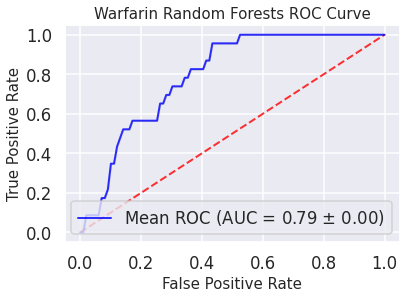

In [295]:
cv = StratifiedKFold(n_splits=10)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, Y1)):
    rdf.fit(X1.loc[train], Y1.loc[train])
#     viz = plot_roc_curve(rdf, X1.loc[test], Y1.loc[test],               
#                           alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2)
ax.legend(loc="lower right")
ax.legend(loc="lower right")
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
ax.set_xlabel("False Positive Rate", size = 15)
ax.set_ylabel("True Positive Rate", size = 15)
ax.set_title("Warfarin Random Forests ROC Curve", size=15)
plt.show()